In [ ]:
# --------------------------------------------------------------------
# CELDA 1: CONFIGURACIÓN DEL ENTORNO (Iteración 9 - lsq-ellipse)
# --------------------------------------------------------------------
import os
import sys
import subprocess
import pkg_resources

print("--- Iniciando Configuración del Entorno (Iteración 9) ---")

# --- 1. Definir Directorios ---
BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
DATA_DIR = os.path.join(BASE_PROJECT_DIR, "data")
SOCCERNET_DATASET_DIR = os.path.join(DATA_DIR, "soccernet_calibration_data")
SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
MODELS_CHECKPOINTS_DIR = os.path.join(BASE_PROJECT_DIR, "model_checkpoints")

print("\n--- Verificando/Creando estructura de directorios ---")
# (Misma lógica de creación de directorios que antes)
os.makedirs(BASE_PROJECT_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(SOCCERNET_DATASET_DIR, exist_ok=True)
os.makedirs(SRC_DIR, exist_ok=True)
os.makedirs(MODELS_CHECKPOINTS_DIR, exist_ok=True)
os.chdir(BASE_PROJECT_DIR)
print(f"Directorio de trabajo actual: {os.getcwd()}")

# --- 2. Instalar Dependencias ---
print("\n--- Instalando dependencias (Iteración 9) ---")
try:
    print("Actualizando pip...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip'], check=True, capture_output=True, text=True)

    packages_to_reinstall = ["SoccerNet", "numpy", "torch", "torchvision", "opencv-python-headless", "ellipse", "lsq-ellipse", "scikit-image"]
    print(f"Desinstalando {', '.join(packages_to_reinstall)} (si existen)...")
    subprocess.run([sys.executable, '-m', 'pip', 'uninstall', '-y'] + packages_to_reinstall, capture_output=True, text=True)
    print("Desinstalación completada.")

    numpy_target_version = "numpy==1.26.4"
    print(f"Intentando instalar {numpy_target_version}...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', numpy_target_version], check=True, capture_output=True, text=True)
    print(f"{numpy_target_version} instalado.")

    soccernet_target_version = "SoccerNet==0.1.55"
    print(f"Intentando instalar {soccernet_target_version}...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', soccernet_target_version], check=True, capture_output=True, text=True)
    print(f"{soccernet_target_version} instalado.")

    # Instalar lsq-ellipse explícitamente con la versión del repo ganador
    lsq_ellipse_target_version = "lsq-ellipse==2.2.1"
    print(f"Intentando instalar {lsq_ellipse_target_version}...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', lsq_ellipse_target_version], check=True, capture_output=True, text=True)
    print(f"{lsq_ellipse_target_version} instalado.")


    pytorch_dependencies = "torch torchvision torchaudio"
    print(f"Instalando {pytorch_dependencies}...")
    subprocess.run(f"{sys.executable} -m pip install {pytorch_dependencies}", shell=True, check=True, capture_output=True, text=True)
    print(f"{pytorch_dependencies} instalados.")

    other_critical_dependencies = [
        "opencv-python-headless",
        "scikit-image",
        "scikit-learn",
        "matplotlib",
        "tqdm",
        "PyYAML"
        # "ellipse" ya no es necesario aquí si lsq-ellipse lo provee o si no lo usamos directamente
    ]
    for dep in other_critical_dependencies:
        print(f"Instalando {dep}...")
        subprocess.run([sys.executable, '-m', 'pip', 'install', dep], check=True, capture_output=True, text=True)
    print("Otras dependencias críticas instaladas.")

except subprocess.CalledProcessError as e:
    print(f"ERROR instalando dependencias: {e}\nComando: {e.cmd}\nstderr: {e.stderr}\nstdout: {e.stdout}")

# --- 3. Verificaciones del Entorno ---
print("\n--- Verificando entorno ---")
# (Misma sección de verificación que en Celda 1 Iteración 8, incluyendo las importaciones directas)
import torch as current_torch
import numpy as current_numpy
import cv2 as current_cv2
import SoccerNet as current_SoccerNet
# Intentar importar LsqEllipse para verificar
try:
    from ellipse import LsqEllipse as current_LsqEllipse
    print("ellipse.LsqEllipse importado correctamente para verificación.")
except ImportError:
    print("ADVERTENCIA: ellipse.LsqEllipse NO se pudo importar después de la instalación.")
    current_LsqEllipse = None


print(f"Python version: {sys.version.split()[0]}")
print(f"PyTorch version: {current_torch.__version__}")
cuda_available = current_torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")
if cuda_available:
    try:
        smi_output = subprocess.check_output(['nvidia-smi', '-L'], universal_newlines=True)
        print(f"nvidia-smi -L output:\n{smi_output.strip()}")
        gpu_name = current_torch.cuda.get_device_name(0)
        print(f"GPU detectada por PyTorch: {gpu_name}")
    except Exception as e_smi:
        print(f"Error al obtener info de GPU: {e_smi}")

print(f"NumPy version: {current_numpy.__version__}")
print(f"OpenCV version: {current_cv2.__version__}")
print(f"SoccerNet version: {current_SoccerNet.__version__}")
try:
    lsq_ellipse_version = pkg_resources.get_distribution("lsq-ellipse").version
    print(f"lsq-ellipse version: {lsq_ellipse_version}")
except pkg_resources.DistributionNotFound:
    print("lsq-ellipse no encontrado por pkg_resources.")


# --- 4. Configurar PYTHONPATH ---
# (Misma sección que antes)
print("\n--- Configurando PYTHONPATH ---")
abs_src_dir = os.path.abspath(SRC_DIR)
if abs_src_dir not in sys.path:
    sys.path.insert(0, abs_src_dir)
    print(f"Ruta '{abs_src_dir}' añadida al inicio de sys.path.")
else:
    print(f"Ruta '{abs_src_dir}' ya estaba en sys.path.")

print("\n--- Configuración de Celda 1 (Iteración 9) Finalizada ---")
print("POR FAVOR, REINICIA EL ENTORNO DE EJECUCIÓN AHORA ANTES DE CONTINUAR CON OTRAS CELDAS.")

--- Iniciando Configuración del Entorno (Iteración 9) ---

--- Verificando/Creando estructura de directorios ---
Directorio de trabajo actual: /content/futbol_keypoints_colab

--- Instalando dependencias (Iteración 9) ---
Actualizando pip...
Desinstalando SoccerNet, numpy, torch, torchvision, opencv-python-headless, ellipse, lsq-ellipse, scikit-image (si existen)...
Desinstalación completada.
Intentando instalar numpy==1.26.4...
numpy==1.26.4 instalado.
Intentando instalar SoccerNet==0.1.55...
SoccerNet==0.1.55 instalado.
Intentando instalar lsq-ellipse==2.2.1...
lsq-ellipse==2.2.1 instalado.
Instalando torch torchvision torchaudio...
torch torchvision torchaudio instalados.
Instalando opencv-python-headless...
Instalando scikit-image...
Instalando scikit-learn...
Instalando matplotlib...
Instalando tqdm...
Instalando PyYAML...
Otras dependencias críticas instaladas.

--- Verificando entorno ---
ellipse.LsqEllipse importado correctamente para verificación.
Python version: 3.11.12
PyTor

FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/METADATA'

In [ ]:
# --------------------------------------------------------------------
# CELDA 2: DESCARGA DE DATOS (Iteración 4 con SoccerNet 0.1.55)
# --------------------------------------------------------------------
import os
import sys
from SoccerNet.Downloader import SoccerNetDownloader
import SoccerNet # Para verificar la versión explícitamente

# Variables de Celda 1
if 'SOCCERNET_DATASET_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab" # Asegurar que coincida con Celda 1
    DATA_DIR = os.path.join(BASE_PROJECT_DIR, "data")
    SOCCERNET_DATASET_DIR = os.path.join(DATA_DIR, "soccernet_calibration_data")
    print("SOCCERNET_DATASET_DIR no estaba definida, se ha establecido a:", SOCCERNET_DATASET_DIR)


print(f"Directorio de destino para los datos: {SOCCERNET_DATASET_DIR}")
print(f"Usando SoccerNet version: {SoccerNet.__version__ if hasattr(SoccerNet, '__version__') else 'No detectada'}")

downloader = SoccerNetDownloader(LocalDirectory=SOCCERNET_DATASET_DIR)
splits_to_download = ["train", "valid", "test", "challenge"]
task_name = "calibration-2023" # Este es el nombre de la tarea que buscamos

print(f"\nIniciando descarga de la tarea '{task_name}' con los splits: {splits_to_download}...")
download_error_occurred = False
error_message = "" # Para almacenar el mensaje de error si ocurre

try:
    downloader.downloadDataTask(task=task_name, split=splits_to_download)
    print("Descarga completada (o los datos ya existían y no dio error 'Unknown Task').")
except Exception as e:
    print(f"Ocurrió un error durante la descarga: {type(e).__name__} - {e}")
    download_error_occurred = True
    error_message = str(e) # Guardar el mensaje de error
    if hasattr(e, 'code'):
        print(f"  Código HTTP: {e.code}")
        if hasattr(e, 'url'): # Si es un error HTTP de urllib
            print(f"  URL: {e.url}")
    if "Unknown task" in error_message:
        print("  El error es 'Unknown task'. Esta versión de SoccerNet no reconoce la tarea.")
    elif "404" in error_message or (hasattr(e, 'code') and e.code == 404):
        print("  El error es 404 (Not Found). La tarea es reconocida pero los archivos no se encuentran en el servidor.")
        print("  Esto podría ser un problema con las URLs internas de SoccerNetDownloader para esta versión/tarea.")
    else:
        print(f"  Error inesperado durante la descarga: {error_message}")


# --- Verificar la estructura de datos descargada ---
print("\n--- Verificando la estructura de directorios descargada ---")
ACTUAL_DATA_ROOT = None

# Solo proceder a verificar si no hubo un error de "Unknown task"
# Si hubo un 404, los directorios podrían no haberse creado o estar vacíos.
# La verificación de todas formas nos dirá si se crearon los directorios base.

if os.path.exists(SOCCERNET_DATASET_DIR):
    path_check_option1 = os.path.join(SOCCERNET_DATASET_DIR, task_name, "train")
    path_check_option2 = os.path.join(SOCCERNET_DATASET_DIR, "train")

    if os.path.exists(path_check_option1) and os.path.isdir(path_check_option1):
        ACTUAL_DATA_ROOT = os.path.join(SOCCERNET_DATASET_DIR, task_name)
        print(f"Los datos de los splits se encuentran en: {ACTUAL_DATA_ROOT}")
    elif os.path.exists(path_check_option2) and os.path.isdir(path_check_option2):
        ACTUAL_DATA_ROOT = SOCCERNET_DATASET_DIR
        print(f"Los datos de los splits se encuentran directamente en: {ACTUAL_DATA_ROOT}")
    else:
        # Si no se encuentra 'train', es un problema serio a menos que la descarga haya fallado con un error conocido
        if not download_error_occurred:
             print(f"ADVERTENCIA: No se encontró el directorio 'train' para la tarea '{task_name}' en {SOCCERNET_DATASET_DIR}, aunque no hubo error de descarga explícito.")
        elif "Unknown task" not in error_message : # Si hubo error, pero no fue "Unknown task"
             print(f"ADVERTENCIA: No se encontró el directorio 'train' para la tarea '{task_name}' después de un error de descarga ({error_message[:100]}...).")

    if ACTUAL_DATA_ROOT:
        for split_name in splits_to_download:
            actual_split_path = os.path.join(ACTUAL_DATA_ROOT, split_name)
            if os.path.exists(actual_split_path) and os.path.isdir(actual_split_path):
                print(f"Directorio '{actual_split_path}' encontrado.")
                try:
                    files_in_split = os.listdir(actual_split_path)
                    if files_in_split:
                        print(f"  Contiene {len(files_in_split)} archivos/carpetas. Ejemplo: {files_in_split[:5]}")
                        jpg_files = [f for f in files_in_split if f.endswith(".jpg")]
                        json_files = [f for f in files_in_split if f.endswith(".json")]
                        print(f"  Archivos .jpg: {len(jpg_files)}, Archivos .json: {len(json_files)}")
                        # ... (más validaciones de jpg/json como en la celda anterior) ...
                    else:
                        print(f"  ADVERTENCIA: Directorio '{actual_split_path}' vacío.")
                except Exception as e_list:
                    print(f"  No se pudo listar el contenido de '{actual_split_path}': {e_list}")
            else:
                 # Solo reportar como advertencia si no esperábamos un fallo de descarga
                 if not download_error_occurred or ("Unknown task" not in error_message and "404" not in error_message):
                    print(f"ADVERTENCIA: Split '{split_name}' NO encontrado en '{actual_split_path}'.")
else:
    print(f"ADVERTENCIA: Directorio base '{SOCCERNET_DATASET_DIR}' no existe.")

if ACTUAL_DATA_ROOT:
    TRAIN_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "train")
    VALID_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "valid")
    TEST_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "test")
    CHALLENGE_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "challenge")
    print(f"\nRuta TRAIN: {TRAIN_IMAGES_DIR if os.path.exists(TRAIN_IMAGES_DIR) and os.path.isdir(TRAIN_IMAGES_DIR) else 'No Válida'}")
    print(f"Ruta VALID: {VALID_IMAGES_DIR if os.path.exists(VALID_IMAGES_DIR) and os.path.isdir(VALID_IMAGES_DIR) else 'No Válida'}")
    print(f"Ruta TEST: {TEST_IMAGES_DIR if os.path.exists(TEST_IMAGES_DIR) and os.path.isdir(TEST_IMAGES_DIR) else 'No Válida'}")
    print(f"Ruta CHALLENGE: {CHALLENGE_IMAGES_DIR if os.path.exists(CHALLENGE_IMAGES_DIR) and os.path.isdir(CHALLENGE_IMAGES_DIR) else 'No Válida'}")
else:
    print("\nACTUAL_DATA_ROOT no definido. Rutas a splits no establecidas.")

print("\n--- Descarga y Verificación de Datos (Celda 2 - Iteración 4) Finalizada ---")

Directorio de destino para los datos: /content/futbol_keypoints_colab/data/soccernet_calibration_data
Usando SoccerNet version: 0.1.55

Iniciando descarga de la tarea 'calibration-2023' con los splits: ['train', 'valid', 'test', 'challenge']...


Descarga completada (o los datos ya existían y no dio error 'Unknown Task').

--- Verificando la estructura de directorios descargada ---
ADVERTENCIA: No se encontró el directorio 'train' para la tarea 'calibration-2023' en /content/futbol_keypoints_colab/data/soccernet_calibration_data, aunque no hubo error de descarga explícito.

ACTUAL_DATA_ROOT no definido. Rutas a splits no establecidas.

--- Descarga y Verificación de Datos (Celda 2 - Iteración 4) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA 2: DESCARGA Y DESCOMPRESIÓN DE DATOS (Iteración 6)
# --------------------------------------------------------------------
import os
import sys
import zipfile
import shutil # Para mover directorios si es necesario
from SoccerNet.Downloader import SoccerNetDownloader
import SoccerNet

# Variables de Celda 1
if 'SOCCERNET_DATASET_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    DATA_DIR = os.path.join(BASE_PROJECT_DIR, "data")
    SOCCERNET_DATASET_DIR = os.path.join(DATA_DIR, "soccernet_calibration_data")
    print("SOCCERNET_DATASET_DIR no estaba definida, se ha establecido a:", SOCCERNET_DATASET_DIR)

print(f"Directorio de destino para los datos (y archivos ZIP): {SOCCERNET_DATASET_DIR}")
print(f"Usando SoccerNet version: {SoccerNet.__version__ if hasattr(SoccerNet, '__version__') else 'No detectada'}")

downloader = SoccerNetDownloader(LocalDirectory=SOCCERNET_DATASET_DIR)
splits_to_download = ["train", "valid", "test", "challenge"]
task_name = "calibration-2023"

# Directorio donde se espera que estén los zips
ZIP_FILES_PARENT_DIR = os.path.join(SOCCERNET_DATASET_DIR, task_name)
os.makedirs(ZIP_FILES_PARENT_DIR, exist_ok=True)
print(f"Los archivos ZIP se buscarán/descargarán en: {ZIP_FILES_PARENT_DIR}")

# Directorio raíz donde se DESCOMPRIMIRÁN los splits (será el padre de las carpetas train, valid, etc.)
# Este será nuestro ACTUAL_DATA_ROOT
EXTRACT_ROOT_DIR = ZIP_FILES_PARENT_DIR
print(f"Los splits se descomprimirán para estar directamente bajo: {EXTRACT_ROOT_DIR}")


print(f"\nIniciando descarga de la tarea '{task_name}' con los splits: {splits_to_download}...")
download_error_occurred = False
error_message = ""

try:
    downloader.downloadDataTask(task=task_name, split=splits_to_download)
    print("Descarga de archivos ZIP completada (o los datos ya existían).")
except Exception as e:
    print(f"Ocurrió un error durante la descarga de archivos ZIP: {type(e).__name__} - {e}")
    download_error_occurred = True
    error_message = str(e)

# --- Descomprimir los archivos ZIP ---
if not download_error_occurred:
    print("\n--- Iniciando descompresión de archivos ZIP ---")
    for split_name in splits_to_download:
        zip_filename = f"{split_name}.zip"
        zip_filepath = os.path.join(ZIP_FILES_PARENT_DIR, zip_filename)
        # El directorio final donde queremos los archivos del split (e.g. .../calibration-2023/train)
        final_split_dir = os.path.join(EXTRACT_ROOT_DIR, split_name)

        if os.path.exists(zip_filepath):
            if os.path.exists(final_split_dir) and os.listdir(final_split_dir) and \
               not (len(os.listdir(final_split_dir)) == 1 and os.path.isdir(os.path.join(final_split_dir, split_name))):
                # Si el directorio final existe, tiene contenido, Y NO es solo una subcarpeta con el mismo nombre
                print(f"El directorio '{final_split_dir}' ya existe y parece estar correctamente descomprimido.")
            else:
                # Si el directorio final no existe, está vacío, o contiene la subcarpeta duplicada, procedemos
                temp_extract_dir = os.path.join(EXTRACT_ROOT_DIR, f"{split_name}_temp_extract")
                os.makedirs(temp_extract_dir, exist_ok=True)

                print(f"Descomprimiendo '{zip_filepath}' en un directorio temporal '{temp_extract_dir}'...")
                try:
                    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
                        zip_ref.extractall(temp_extract_dir)
                    print(f"'{zip_filepath}' descomprimido temporalmente.")

                    # Verificar si se creó una subcarpeta con el nombre del split dentro del dir temporal
                    potential_duplicated_folder = os.path.join(temp_extract_dir, split_name)

                    # Eliminar el directorio final si existía (podría tener la estructura incorrecta)
                    if os.path.exists(final_split_dir):
                        print(f"Eliminando directorio de destino preexistente: {final_split_dir}")
                        shutil.rmtree(final_split_dir)

                    if os.path.isdir(potential_duplicated_folder) and \
                       set(os.listdir(temp_extract_dir)) == {split_name}: # Solo la carpeta split_name dentro de temp_extract_dir
                        print(f"Moviendo contenido de '{potential_duplicated_folder}' a '{final_split_dir}'...")
                        shutil.move(potential_duplicated_folder, final_split_dir)
                        shutil.rmtree(temp_extract_dir) # Eliminar el directorio temporal vacío
                    else:
                        # Si no hay subcarpeta duplicada, o hay más cosas, mover todo el contenido de temp_extract_dir
                        print(f"Moviendo contenido de '{temp_extract_dir}' a '{final_split_dir}'...")
                        shutil.move(temp_extract_dir, final_split_dir)
                        # Si temp_extract_dir se movió, ya no existe para rmtree
                        if os.path.exists(temp_extract_dir): # Debería haberse movido, pero por si acaso
                           shutil.rmtree(temp_extract_dir)


                    print(f"Archivos organizados en '{final_split_dir}'.")
                    # os.remove(zip_filepath) # Opcional
                    # print(f"'{zip_filepath}' eliminado.")
                except Exception as e_unzip:
                    print(f"ERROR al descomprimir o mover '{zip_filepath}': {e_unzip}")
                    if os.path.exists(temp_extract_dir):
                        shutil.rmtree(temp_extract_dir)
        else:
            print(f"ADVERTENCIA: Archivo ZIP '{zip_filepath}' no encontrado.")
else:
    print(f"\nNo se intentará la descompresión debido a un error previo en la descarga: {error_message}")


# --- Verificar la estructura de datos (ahora buscando directorios descomprimidos) ---
print("\n--- Verificando la estructura de directorios después de la descompresión ---")
ACTUAL_DATA_ROOT = EXTRACT_ROOT_DIR
print(f"Se espera que los datos de los splits estén en: {ACTUAL_DATA_ROOT}")

if os.path.exists(ACTUAL_DATA_ROOT) and os.path.isdir(ACTUAL_DATA_ROOT):
    for split_name in splits_to_download:
        actual_split_path = os.path.join(ACTUAL_DATA_ROOT, split_name)

        if os.path.exists(actual_split_path) and os.path.isdir(actual_split_path):
            print(f"Directorio '{actual_split_path}' encontrado.")
            try:
                files_in_split = os.listdir(actual_split_path)
                if files_in_split:
                    print(f"  Contiene {len(files_in_split)} archivos/carpetas. Ejemplo: {files_in_split[:5]}")
                    jpg_files = [f for f in files_in_split if f.endswith(".jpg")]
                    json_files = [f for f in files_in_split if f.endswith(".json")]
                    print(f"  Archivos .jpg: {len(jpg_files)}, Archivos .json: {len(json_files)}")

                    if split_name in ["train", "valid", "test"]:
                        if len(jpg_files) > 0 and len(json_files) > 0 and len(jpg_files) == len(json_files):
                            print(f"  CORRECTO: Archivos .jpg y .json presentes y coinciden para '{split_name}'.")
                        elif len(jpg_files) > 0 or len(json_files) > 0:
                             print(f"  ADVERTENCIA: El número de .jpg y .json no coincide o uno falta para '{split_name}'. ({len(jpg_files)} jpg, {len(json_files)} json)")
                        else:
                            print(f"  ADVERTENCIA: No se encontraron archivos .jpg o .json en '{actual_split_path}'.")
                    elif split_name == "challenge":
                         if len(jpg_files) > 0 and len(json_files) == 0:
                             print(f"  INFO: Para 'challenge', {len(jpg_files)} .jpg y {len(json_files)} .json (esperado).")
                         elif len(jpg_files) > 0 and len(json_files) > 0:
                             print(f"  INFO: Para 'challenge', {len(jpg_files)} .jpg y {len(json_files)} .json (inesperado).")
                         else:
                             print(f"  ADVERTENCIA: No .jpg en 'challenge' en '{actual_split_path}'.")
                else:
                    print(f"  ADVERTENCIA: Directorio '{actual_split_path}' vacío después de la descompresión.")
            except Exception as e_list:
                print(f"  No se pudo listar el contenido de '{actual_split_path}': {e_list}")
        else:
            print(f"ADVERTENCIA: Directorio del split '{split_name}' NO encontrado en '{actual_split_path}' después de intentar la descompresión.")
else:
    print(f"ADVERTENCIA: Directorio base para los splits '{ACTUAL_DATA_ROOT}' no existe.")

# Definir rutas globales
if ACTUAL_DATA_ROOT and os.path.exists(ACTUAL_DATA_ROOT):
    TRAIN_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "train")
    VALID_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "valid")
    TEST_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "test")
    CHALLENGE_IMAGES_DIR = os.path.join(ACTUAL_DATA_ROOT, "challenge")

    print(f"\nRuta establecida para datos de entrenamiento: {TRAIN_IMAGES_DIR if os.path.exists(TRAIN_IMAGES_DIR) and os.path.isdir(TRAIN_IMAGES_DIR) else 'No Válida'}")
    print(f"Ruta establecida para datos de validación: {VALID_IMAGES_DIR if os.path.exists(VALID_IMAGES_DIR) and os.path.isdir(VALID_IMAGES_DIR) else 'No Válida'}")
    print(f"Ruta establecida para datos de test: {TEST_IMAGES_DIR if os.path.exists(TEST_IMAGES_DIR) and os.path.isdir(TEST_IMAGES_DIR) else 'No Válida'}")
    print(f"Ruta establecida para datos de challenge: {CHALLENGE_IMAGES_DIR if os.path.exists(CHALLENGE_IMAGES_DIR) and os.path.isdir(CHALLENGE_IMAGES_DIR) else 'No Válida'}")
else:
    print("\nACTUAL_DATA_ROOT no es válido. Rutas a splits no establecidas.")
    TRAIN_IMAGES_DIR, VALID_IMAGES_DIR, TEST_IMAGES_DIR, CHALLENGE_IMAGES_DIR = [None]*4 # Resetear

print("\n--- Descarga y Descompresión de Datos (Celda 2 - Iteración 6) Finalizada ---")

if 'TRAIN_IMAGES_DIR' in locals() and TRAIN_IMAGES_DIR and os.path.exists(TRAIN_IMAGES_DIR) and any(f.endswith('.jpg') for f in os.listdir(TRAIN_IMAGES_DIR)):
    print(f"\nVERIFICACIÓN FINAL: TRAIN_IMAGES_DIR = {TRAIN_IMAGES_DIR}, existe y contiene archivos .jpg.")
else:
    print(f"\nVERIFICACIÓN FINAL: TRAIN_IMAGES_DIR ({TRAIN_IMAGES_DIR if 'TRAIN_IMAGES_DIR' in locals() else 'No definida'}) no está correctamente definida, no existe, o está vacía.")

Directorio de destino para los datos (y archivos ZIP): /content/futbol_keypoints_colab/data/soccernet_calibration_data
Usando SoccerNet version: 0.1.55
Los archivos ZIP se buscarán/descargarán en: /content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023
Los splits se descomprimirán para estar directamente bajo: /content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023

Iniciando descarga de la tarea 'calibration-2023' con los splits: ['train', 'valid', 'test', 'challenge']...


Descarga de archivos ZIP completada (o los datos ya existían).

--- Iniciando descompresión de archivos ZIP ---
Descomprimiendo '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train.zip' en un directorio temporal '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train_temp_extract'...
'/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train.zip' descomprimido temporalmente.
Moviendo contenido de '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train_temp_extract/train' a '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train'...
Archivos organizados en '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train'.
Descomprimiendo '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/valid.zip' en un directorio temporal '/content/futbol_keypoints_colab/data/soccernet_calib

In [ ]:
# --------------------------------------------------------------------
# CELDA 3.1: Creando src/datatools_utils.py
# --------------------------------------------------------------------
import os

# Asegurarse que SRC_DIR está definido (debería estarlo desde Celda 1)
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    # Añadir al path si no está, por si se reinició el kernel sin ejecutar Celda 1 completamente
    if SRC_DIR not in sys.path:
        sys.path.insert(0, SRC_DIR)

DATATOOLS_DIR = os.path.join(SRC_DIR, "datatools")
os.makedirs(DATATOOLS_DIR, exist_ok=True)

# --- Contenido para src/datatools/readers.py ---
readers_content = """
import json
from typing import Any, Dict, List, Tuple

def read_json_file(annot_path: str) -> Dict[str, Any]:
    \"\"\"Lee un archivo JSON y devuelve su contenido como un diccionario.\"\"\"
    try:
        with open(annot_path, 'r') as f:
            data = json.load(f)
        return data
    except FileNotFoundError:
        print(f"Error: Archivo de anotación no encontrado en {annot_path}")
        return {}
    except json.JSONDecodeError:
        print(f"Error: No se pudo decodificar el JSON en {annot_path}")
        return {}

def decode_raw_soccernet_annotations(raw_annot_data: Dict[str, Any]) -> Dict[str, List[Tuple[float, float]]]:
    \"\"\"
    Decodifica las anotaciones crudas de SoccerNet (formato de lista de diccionarios con 'x', 'y')
    a un formato más simple: Dict[str, List[Tuple[float, float]]].
    Las coordenadas se mantienen normalizadas (0-1).
    \"\"\"
    processed_annotations: Dict[str, List[Tuple[float, float]]] = {}
    if not isinstance(raw_annot_data, dict):
        # print(f"Advertencia: Se esperaba un diccionario para las anotaciones, se recibió {type(raw_annot_data)}")
        return processed_annotations

    for class_label, points_list in raw_annot_data.items():
        if not isinstance(points_list, list):
            # print(f"Advertencia: Se esperaba una lista de puntos para '{class_label}', se recibió {type(points_list)}")
            continue

        processed_annotations[class_label] = []
        for point_dict in points_list:
            if isinstance(point_dict, dict) and 'x' in point_dict and 'y' in point_dict:
                try:
                    x = float(point_dict['x'])
                    y = float(point_dict['y'])
                    # Validar que las coordenadas estén en el rango esperado (0-1)
                    # if not (0.0 <= x <= 1.0 and 0.0 <= y <= 1.0):
                    #     print(f"Advertencia: Coordenadas fuera del rango (0-1) para '{class_label}': ({x}, {y})")
                    #     # Decidir si continuar o descartar este punto/anotación
                    processed_annotations[class_label].append((x, y))
                except (ValueError, TypeError):
                    # print(f"Advertencia: Coordenadas inválidas para '{class_label}': {point_dict}")
                    pass # Ignorar puntos mal formados
            # else:
                # print(f"Advertencia: Formato de punto inesperado para '{class_label}': {point_dict}")
    return processed_annotations

def load_and_decode_annotations(annot_path: str) -> Dict[str, List[Tuple[float, float]]]:
    \"\"\"Carga y decodifica anotaciones de un archivo JSON de SoccerNet.\"\"\"
    raw_data = read_json_file(annot_path)
    if not raw_data: # Si read_json_file devolvió un diccionario vacío debido a un error
        return {}
    return decode_raw_soccernet_annotations(raw_data)

"""
readers_py_path = os.path.join(DATATOOLS_DIR, "readers.py")
with open(readers_py_path, "w") as f:
    f.write(readers_content)
print(f"Archivo '{readers_py_path}' creado.")

# Crear __init__.py en datatools para que sea un paquete
with open(os.path.join(DATATOOLS_DIR, "__init__.py"), "w") as f:
    f.write("") # Archivo vacío es suficiente
print(f"Archivo '{os.path.join(DATATOOLS_DIR, '__init__.py')}' creado.")

# --- Contenido para src/datatools/pitch_definitions.py ---
# Aquí pondremos las definiciones de los puntos del campo, similar a PITCH_POINTS
# y INTERSECTION_TO_PITCH_POINTS del repo ganador.
# Tomaremos la versión extendida de `src/datatools/ellipse.py` del repo ganador
# que ya incluye los 57 puntos.
pitch_definitions_content = """
import numpy as np
from typing import Dict, Tuple, List

# Definiciones básicas del campo (simplificado de baseline/soccerpitch.py o src/datatools/ellipse.py del repo ganador)
# Estas dimensiones son estándar, pero la solución ganadora podría haber usado unas específicas.
# Por ahora, usemos las que provee `src/datatools/ellipse.py` del repo ganador, ya que son la base para sus 57 keypoints.

class SimplePitch:
    PITCH_LENGTH = 105.0
    PITCH_WIDTH = 68.0
    CENTER_CIRCLE_RADIUS = 9.15
    PENALTY_AREA_LENGTH = 16.5
    PENALTY_AREA_WIDTH = 40.32
    GOAL_AREA_LENGTH = 5.5
    GOAL_AREA_WIDTH = 18.32
    GOAL_LINE_TO_PENALTY_MARK = 11.0
    GOAL_HEIGHT = 2.44 # Para puntos fuera del plano
    GOAL_WIDTH = 7.32 # Goal length en el código original

pitch_spec = SimplePitch()

PITCH_POINTS_3D: Dict[str, np.ndarray] = {}

# Coordenadas X: -PITCH_LENGTH/2 (izquierda) a PITCH_LENGTH/2 (derecha)
# Coordenadas Y: -PITCH_WIDTH/2 (arriba) a PITCH_WIDTH/2 (abajo)
# Coordenadas Z: 0 para el césped, negativas para la altura de los postes/larguero

# Esquinas del campo
PITCH_POINTS_3D['TL_PITCH_CORNER'] = np.array([-pitch_spec.PITCH_LENGTH / 2, -pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['TR_PITCH_CORNER'] = np.array([pitch_spec.PITCH_LENGTH / 2, -pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['BL_PITCH_CORNER'] = np.array([-pitch_spec.PITCH_LENGTH / 2, pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['BR_PITCH_CORNER'] = np.array([pitch_spec.PITCH_LENGTH / 2, pitch_spec.PITCH_WIDTH / 2, 0])

# Línea de medio campo
PITCH_POINTS_3D['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION'] = np.array([0, -pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'] = np.array([0, pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['CENTER_MARK'] = np.array([0, 0, 0])

# Área de penalti izquierda
L_X = -pitch_spec.PITCH_LENGTH / 2
PITCH_POINTS_3D['L_PENALTY_AREA_TL_CORNER'] = np.array([L_X, -pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['L_PENALTY_AREA_TR_CORNER'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, -pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['L_PENALTY_AREA_BL_CORNER'] = np.array([L_X, pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['L_PENALTY_AREA_BR_CORNER'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['L_PENALTY_MARK'] = np.array([L_X + pitch_spec.GOAL_LINE_TO_PENALTY_MARK, 0, 0])

# Área de meta izquierda
PITCH_POINTS_3D['L_GOAL_AREA_TL_CORNER'] = np.array([L_X, -pitch_spec.GOAL_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['L_GOAL_AREA_TR_CORNER'] = np.array([L_X + pitch_spec.GOAL_AREA_LENGTH, -pitch_spec.GOAL_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['L_GOAL_AREA_BL_CORNER'] = np.array([L_X, pitch_spec.GOAL_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['L_GOAL_AREA_BR_CORNER'] = np.array([L_X + pitch_spec.GOAL_AREA_LENGTH, pitch_spec.GOAL_AREA_WIDTH / 2, 0])

# Portería izquierda (Goal posts and crossbar)
PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND'] = np.array([L_X, pitch_spec.GOAL_WIDTH / 2, 0]) # Punto en el suelo
PITCH_POINTS_3D['L_GOAL_TL_POST_GROUND'] = np.array([L_X, -pitch_spec.GOAL_WIDTH / 2, 0])# Punto en el suelo
PITCH_POINTS_3D['L_GOAL_BL_POST'] = np.array([L_X, pitch_spec.GOAL_WIDTH / 2, -pitch_spec.GOAL_HEIGHT]) # Punto alto
PITCH_POINTS_3D['L_GOAL_TL_POST'] = np.array([L_X, -pitch_spec.GOAL_WIDTH / 2, -pitch_spec.GOAL_HEIGHT])# Punto alto
# Los nombres L_GOAL_TR_POST y L_GOAL_BR_POST del repo ganador son confusos si se refieren a la misma X.
# Asumiré que L_GOAL_TR_POST es L_GOAL_TL_POST y L_GOAL_BR_POST es L_GOAL_BL_POST para los puntos altos.
# El repo ganador usa 'Goal left post left ' y 'Goal left post right'. Si la vista es desde el centro del campo hacia la portería,
# el 'left post' estaría en Y positiva (abajo en imagen) y 'right post' en Y negativa (arriba en imagen).
# Para los puntos de intersección del larguero:
# L_GOAL_TL_POST (Top-Left) sería X=L_X, Y=-GOAL_WIDTH/2, Z=-GOAL_HEIGHT
# L_GOAL_TR_POST (Top-Right) sería X=L_X, Y=GOAL_WIDTH/2, Z=-GOAL_HEIGHT
# Vamos a usar la convención del repo ganador donde sea posible
PITCH_POINTS_3D['L_GOAL_TR_POST'] = np.array([L_X,  pitch_spec.GOAL_WIDTH / 2, -pitch_spec.GOAL_HEIGHT]) # Poste superior "derecho" (Y positiva)
PITCH_POINTS_3D['L_GOAL_BR_POST'] = PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND'] # Base del poste "derecho" (Y positiva)


# Área de penalti derecha
R_X = pitch_spec.PITCH_LENGTH / 2
PITCH_POINTS_3D['R_PENALTY_AREA_TL_CORNER'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, -pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['R_PENALTY_AREA_TR_CORNER'] = np.array([R_X, -pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['R_PENALTY_AREA_BL_CORNER'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['R_PENALTY_AREA_BR_CORNER'] = np.array([R_X, pitch_spec.PENALTY_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['R_PENALTY_MARK'] = np.array([R_X - pitch_spec.GOAL_LINE_TO_PENALTY_MARK, 0, 0])

# Área de meta derecha
PITCH_POINTS_3D['R_GOAL_AREA_TL_CORNER'] = np.array([R_X - pitch_spec.GOAL_AREA_LENGTH, -pitch_spec.GOAL_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['R_GOAL_AREA_TR_CORNER'] = np.array([R_X, -pitch_spec.GOAL_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['R_GOAL_AREA_BL_CORNER'] = np.array([R_X - pitch_spec.GOAL_AREA_LENGTH, pitch_spec.GOAL_AREA_WIDTH / 2, 0])
PITCH_POINTS_3D['R_GOAL_AREA_BR_CORNER'] = np.array([R_X, pitch_spec.GOAL_AREA_WIDTH / 2, 0])

# Portería derecha
PITCH_POINTS_3D['R_GOAL_BR_POST_GROUND'] = np.array([R_X, pitch_spec.GOAL_WIDTH / 2, 0])
PITCH_POINTS_3D['R_GOAL_TR_POST_GROUND'] = np.array([R_X, -pitch_spec.GOAL_WIDTH / 2, 0])
PITCH_POINTS_3D['R_GOAL_BR_POST'] = np.array([R_X, pitch_spec.GOAL_WIDTH / 2, -pitch_spec.GOAL_HEIGHT])
PITCH_POINTS_3D['R_GOAL_TR_POST'] = np.array([R_X, -pitch_spec.GOAL_WIDTH / 2, -pitch_spec.GOAL_HEIGHT])
PITCH_POINTS_3D['R_GOAL_TL_POST'] = PITCH_POINTS_3D['R_GOAL_TR_POST_GROUND'] # Base del poste "izquierdo" (Y negativa)


# Puntos del círculo central y arcos de penalti (derivados)
# Intersecciones círculo central con línea de medio campo
PITCH_POINTS_3D['T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION'] = np.array([0, -pitch_spec.CENTER_CIRCLE_RADIUS, 0])
PITCH_POINTS_3D['B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION'] = np.array([0, pitch_spec.CENTER_CIRCLE_RADIUS, 0])

# Puntos del arco de penalti izquierdo (aproximados, el repo ganador calcula tangentes e intersecciones más complejas)
dx_penalty_arc = pitch_spec.PENALTY_AREA_LENGTH - pitch_spec.GOAL_LINE_TO_PENALTY_MARK
# Asegurar que el argumento de sqrt no sea negativo
sqrt_arg_left = pitch_spec.CENTER_CIRCLE_RADIUS**2 - dx_penalty_arc**2
if sqrt_arg_left < 0: sqrt_arg_left = 0 # Clamp to 0 if negative
y_penalty_arc_l = np.sqrt(sqrt_arg_left)

PITCH_POINTS_3D['TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, -y_penalty_arc_l, 0])
PITCH_POINTS_3D['BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, y_penalty_arc_l, 0])

# Puntos del arco de penalti derecho
sqrt_arg_right = pitch_spec.CENTER_CIRCLE_RADIUS**2 - dx_penalty_arc**2
if sqrt_arg_right < 0: sqrt_arg_right = 0
y_penalty_arc_r = np.sqrt(sqrt_arg_right)
PITCH_POINTS_3D['TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, -y_penalty_arc_r, 0])
PITCH_POINTS_3D['BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, y_penalty_arc_r, 0])


# --- Definición de los 57 keypoints y su mapeo a PITCH_POINTS_3D ---
# Esto se basa en INTERSECTION_TO_PITCH_POINTS de src/datatools/ellipse.py del repo ganador
# Necesitaremos replicar esa lógica o al menos la estructura final de PITCH_POINTS
# y los índices de los keypoints.

# Este diccionario PITCH_POINTS es el del repo ganador (src/datatools/ellipse.py)
# Lo adaptamos para que use nuestras definiciones de PITCH_POINTS_3D donde sea posible.
# Los puntos de tangencia y algunos puntos del círculo se calculan de forma más compleja en el original.
# Por ahora, definiremos los que podamos directamente.
# El objetivo es tener un PITCH_POINTS_3D_EXPANDED que contenga todos los puntos necesarios para los 57 keypoints.

PITCH_POINTS_3D_EXPANDED = PITCH_POINTS_3D.copy()

def calculate_circle_tangent_points(circle_center_xy: Tuple[float, float],
                                    radius: float,
                                    external_point_xy: Tuple[float, float]):
    # Vector del centro al punto externo
    vec_cp_x = external_point_xy[0] - circle_center_xy[0]
    vec_cp_y = external_point_xy[1] - circle_center_xy[1]
    dist_cp_sq = vec_cp_x**2 + vec_cp_y**2

    if dist_cp_sq < radius**2: # Punto dentro del círculo, no hay tangentes reales de esta forma
        return None

    dist_cp = np.sqrt(dist_cp_sq)
    # Ángulo de la línea que une el centro y el punto externo
    angle_cp = np.arctan2(vec_cp_y, vec_cp_x)
    # Ángulo entre la línea CP y la línea CT (tangente)
    angle_alpha = np.arccos(radius / dist_cp)

    # Coordenadas de los puntos de tangencia
    t1_x = circle_center_xy[0] + radius * np.cos(angle_cp + angle_alpha)
    t1_y = circle_center_xy[1] + radius * np.sin(angle_cp + angle_alpha)
    t2_x = circle_center_xy[0] + radius * np.cos(angle_cp - angle_alpha)
    t2_y = circle_center_xy[1] + radius * np.sin(angle_cp - angle_alpha)
    return (np.array([t1_x, t1_y, 0]), np.array([t2_x, t2_y, 0]))

# Puntos de tangencia del círculo central
center_circle_tangents_top = calculate_circle_tangent_points(
    PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS,
    PITCH_POINTS_3D_EXPANDED['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2])
center_circle_tangents_bottom = calculate_circle_tangent_points(
    PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS,
    PITCH_POINTS_3D_EXPANDED['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2])

if center_circle_tangents_top:
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TL'] = center_circle_tangents_top[0] # Top-Left (Y negativa)
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TR'] = center_circle_tangents_top[1] # Top-Right (Y negativa) - Orden original era TR, TL
if center_circle_tangents_bottom:
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BL'] = center_circle_tangents_bottom[0] # Bottom-Left (Y positiva)
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BR'] = center_circle_tangents_bottom[1] # Bottom-Right (Y positiva)

# Puntos cardinales y diagonales del círculo central
circle_diag = np.sqrt(2.) * pitch_spec.CENTER_CIRCLE_RADIUS / 2
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_R'] = np.array([pitch_spec.CENTER_CIRCLE_RADIUS, 0, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_L'] = np.array([-pitch_spec.CENTER_CIRCLE_RADIUS, 0, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TR'] = np.array([circle_diag, -circle_diag, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TL'] = np.array([-circle_diag, -circle_diag, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BR'] = np.array([circle_diag, circle_diag, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BL'] = np.array([-circle_diag, circle_diag, 0])

# Puntos de los arcos de penalti (círculos "izquierdo" y "derecho")
PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_R'] = PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'] + PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_R']
PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_L'] = PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'] + PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_L']

# Tangentes de los arcos de penalti
# Izquierdo
tangents_L_T = calculate_circle_tangent_points(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_TR_CORNER'][:2])
if tangents_L_T: PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_T'] = tangents_L_T[0] # El más cercano al punto de referencia
tangents_L_B = calculate_circle_tangent_points(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_BR_CORNER'][:2])
if tangents_L_B: PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_B'] = tangents_L_B[1]

PITCH_POINTS_3D_EXPANDED['L_MIDDLE_PENALTY'] = PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_BR_CORNER'].copy()
PITCH_POINTS_3D_EXPANDED['L_MIDDLE_PENALTY'][1] = 0.0 # Punto medio en la línea de 16.5m

# Derecho
tangents_R_T = calculate_circle_tangent_points(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_TL_CORNER'][:2])
if tangents_R_T: PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_T'] = tangents_R_T[1]
tangents_R_B = calculate_circle_tangent_points(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_BL_CORNER'][:2])
if tangents_R_B: PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_B'] = tangents_R_B[0]

PITCH_POINTS_3D_EXPANDED['R_MIDDLE_PENALTY'] = PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_BL_CORNER'].copy()
PITCH_POINTS_3D_EXPANDED['R_MIDDLE_PENALTY'][1] = 0.0


# Mapeo de índice de keypoint a nombre de punto (del repo ganador)
KEYPOINT_INDEX_TO_NAME: Dict[int, str] = {
    0: 'L_GOAL_TL_POST', 1: 'L_GOAL_TR_POST', 2: 'L_GOAL_BL_POST', 3: 'L_GOAL_BR_POST',
    4: 'L_GOAL_AREA_BR_CORNER', 5: 'L_GOAL_AREA_TR_CORNER', 6: 'L_GOAL_AREA_BL_CORNER', 7: 'L_GOAL_AREA_TL_CORNER',
    8: 'L_PENALTY_AREA_BR_CORNER', 9: 'L_PENALTY_AREA_TR_CORNER', 10: 'L_PENALTY_AREA_BL_CORNER', 11: 'L_PENALTY_AREA_TL_CORNER',
    12: 'BL_PITCH_CORNER', 13: 'TL_PITCH_CORNER',
    14: 'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION', 15: 'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION',
    16: 'R_PENALTY_AREA_BL_CORNER', 17: 'R_PENALTY_AREA_TL_CORNER', 18: 'R_PENALTY_AREA_BR_CORNER', 19: 'R_PENALTY_AREA_TR_CORNER',
    20: 'R_GOAL_AREA_BL_CORNER', 21: 'R_GOAL_AREA_TL_CORNER', 22: 'R_GOAL_AREA_BR_CORNER', 23: 'R_GOAL_AREA_TR_CORNER',
    24: 'R_GOAL_TL_POST', 25: 'R_GOAL_TR_POST', 26: 'R_GOAL_BL_POST', 27: 'R_GOAL_BR_POST',
    28: 'BR_PITCH_CORNER', 29: 'TR_PITCH_CORNER',
    30: 'CENTER_CIRCLE_TANGENT_TR', 31: 'CENTER_CIRCLE_TANGENT_TL', 32: 'CENTER_CIRCLE_TANGENT_BR', 33: 'CENTER_CIRCLE_TANGENT_BL',
    34: 'CENTER_CIRCLE_TR', 35: 'CENTER_CIRCLE_TL', 36: 'CENTER_CIRCLE_BR', 37: 'CENTER_CIRCLE_BL',
    38: 'CENTER_CIRCLE_R', 39: 'CENTER_CIRCLE_L',
    40: 'T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION', 41: 'B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',
    42: 'CENTER_MARK',
    43: 'LEFT_CIRCLE_R', 44: 'BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION', 45: 'TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',
    46: 'LEFT_CIRCLE_TANGENT_T', 47: 'LEFT_CIRCLE_TANGENT_B', 48: 'L_PENALTY_MARK', 49: 'L_MIDDLE_PENALTY',
    50: 'RIGHT_CIRCLE_L', 51: 'BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION', 52: 'TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',
    53: 'RIGHT_CIRCLE_TANGENT_T', 54: 'RIGHT_CIRCLE_TANGENT_B', 55: 'R_PENALTY_MARK', 56: 'R_MIDDLE_PENALTY'
}

NUM_KEYPOINTS = 57 # Según el repo ganador

# Líneas definidas por pares de índices de KEYPOINT_INDEX_TO_NAME
# (Basado en LINE_INTERSECTIONS y la forma en que se construyen los puntos)
# Esto es para ayudar a `get_intersections_from_raw_annotations` a saber qué líneas forman qué puntos de intersección.
# Los puntos de intersección del 0 al 29 son intersecciones de líneas rectas.
LINE_DEFINITIONS_FROM_KEYPOINTS: Dict[str, Tuple[str, str]] = {
    # Lado Izquierdo
    'Side line left': ('TL_PITCH_CORNER', 'BL_PITCH_CORNER'),
    'Goal left post left ': ('L_GOAL_TL_POST', 'L_GOAL_BL_POST'), # Vertical post
    'Goal left post right': ('L_GOAL_TR_POST', 'L_GOAL_BR_POST'), # Vertical post
    'Goal left crossbar': ('L_GOAL_TL_POST', 'L_GOAL_TR_POST'),   # Crossbar
    'Small rect. left top': ('L_GOAL_AREA_TL_CORNER', 'L_GOAL_AREA_TR_CORNER'),
    'Small rect. left bottom': ('L_GOAL_AREA_BL_CORNER', 'L_GOAL_AREA_BR_CORNER'),
    'Small rect. left main': ('L_GOAL_AREA_TR_CORNER', 'L_GOAL_AREA_BR_CORNER'),
    'Big rect. left top': ('L_PENALTY_AREA_TL_CORNER', 'L_PENALTY_AREA_TR_CORNER'),
    'Big rect. left bottom': ('L_PENALTY_AREA_BL_CORNER', 'L_PENALTY_AREA_BR_CORNER'),
    'Big rect. left main': ('L_PENALTY_AREA_TR_CORNER', 'L_PENALTY_AREA_BR_CORNER'),
    # Centro
    'Middle line': ('T_TOUCH_AND_HALFWAY_LINES_INTERSECTION', 'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'),
    'Side line top': ('TL_PITCH_CORNER', 'TR_PITCH_CORNER'),
    'Side line bottom': ('BL_PITCH_CORNER', 'BR_PITCH_CORNER'),
    # Lado Derecho
    'Side line right': ('TR_PITCH_CORNER', 'BR_PITCH_CORNER'),
    'Goal right post left': ('R_GOAL_TL_POST', 'R_GOAL_BL_POST'),
    'Goal right post right': ('R_GOAL_TR_POST', 'R_GOAL_BR_POST'),
    'Goal right crossbar': ('R_GOAL_TL_POST', 'R_GOAL_TR_POST'),
    'Small rect. right top': ('R_GOAL_AREA_TL_CORNER', 'R_GOAL_AREA_TR_CORNER'),
    'Small rect. right bottom': ('R_GOAL_AREA_BL_CORNER', 'R_GOAL_AREA_BR_CORNER'),
    'Small rect. right main': ('R_GOAL_AREA_TR_CORNER', 'R_GOAL_AREA_BR_CORNER'), # Corrección, en el repo ganador es TL_CORNER a BL_CORNER
    'Big rect. right top': ('R_PENALTY_AREA_TL_CORNER', 'R_PENALTY_AREA_TR_CORNER'),
    'Big rect. right bottom': ('R_PENALTY_AREA_BL_CORNER', 'R_PENALTY_AREA_BR_CORNER'),
    'Big rect. right main': ('R_PENALTY_AREA_TR_CORNER', 'R_PENALTY_AREA_BR_CORNER') # Corrección, en el repo ganador es TL_CORNER a BL_CORNER
}

# Estos son los puntos que son intersecciones de dos líneas rectas (índices 0-29)
# Mapea el índice del keypoint (0-29) a las dos LÍNEAS (nombres de string) que lo forman.
KEYPOINT_LINE_INTERSECTIONS: Dict[int, Tuple[str, str]] = {
    0: ('Goal left crossbar', 'Goal left post left '),
    1: ('Goal left crossbar', 'Goal left post right'), # En el repo ganador este es el mismo punto que el 0 si se usa la misma def de poste
    2: ('Side line left', 'Goal left post left '), # Este punto es L_GOAL_BL_POST
    3: ('Side line left', 'Goal left post right'), # Este punto es L_GOAL_BR_POST
    4: ('Small rect. left main', 'Small rect. left bottom'), # L_GOAL_AREA_BR_CORNER
    5: ('Small rect. left main', 'Small rect. left top'),    # L_GOAL_AREA_TR_CORNER
    6: ('Side line left', 'Small rect. left bottom'),    # L_GOAL_AREA_BL_CORNER
    7: ('Side line left', 'Small rect. left top'),       # L_GOAL_AREA_TL_CORNER
    8: ('Big rect. left main', 'Big rect. left bottom'),     # L_PENALTY_AREA_BR_CORNER
    9: ('Big rect. left main', 'Big rect. left top'),        # L_PENALTY_AREA_TR_CORNER
    10: ('Side line left', 'Big rect. left bottom'),    # L_PENALTY_AREA_BL_CORNER
    11: ('Side line left', 'Big rect. left top'),       # L_PENALTY_AREA_TL_CORNER
    12: ('Side line left', 'Side line bottom'),         # BL_PITCH_CORNER
    13: ('Side line left', 'Side line top'),            # TL_PITCH_CORNER
    14: ('Middle line', 'Side line bottom'),            # B_TOUCH_AND_HALFWAY_LINES_INTERSECTION
    15: ('Middle line', 'Side line top'),               # T_TOUCH_AND_HALFWAY_LINES_INTERSECTION
    16: ('Big rect. right main', 'Big rect. right bottom'), # R_PENALTY_AREA_BL_CORNER (según repo ganador)
    17: ('Big rect. right main', 'Big rect. right top'),    # R_PENALTY_AREA_TL_CORNER (según repo ganador)
    18: ('Side line right', 'Big rect. right bottom'),  # R_PENALTY_AREA_BR_CORNER
    19: ('Side line right', 'Big rect. right top'),     # R_PENALTY_AREA_TR_CORNER
    20: ('Small rect. right main', 'Small rect. right bottom'),# R_GOAL_AREA_BL_CORNER (según repo ganador)
    21: ('Small rect. right main', 'Small rect. right top'),   # R_GOAL_AREA_TL_CORNER (según repo ganador)
    22: ('Side line right', 'Small rect. right bottom'),# R_GOAL_AREA_BR_CORNER
    23: ('Side line right', 'Small rect. right top'),   # R_GOAL_AREA_TR_CORNER
    24: ('Goal right crossbar', 'Goal right post left'),
    25: ('Goal right crossbar', 'Goal right post right'),
    26: ('Side line right', 'Goal right post left '), # R_GOAL_BL_POST
    27: ('Side line right', 'Goal right post right'), # R_GOAL_BR_POST
    28: ('Side line right', 'Side line bottom'),        # BR_PITCH_CORNER
    29: ('Side line right', 'Side line top')            # TR_PITCH_CORNER
}

# Puntos que están en el plano del suelo y no son parte de los postes/larguero
GROUND_PLANE_KP_INDICES = [i for i in range(NUM_KEYPOINTS) if KEYPOINT_INDEX_TO_NAME.get(i) and PITCH_POINTS_3D_EXPANDED.get(KEYPOINT_INDEX_TO_NAME[i], np.array([0,0,1]))[2] == 0]

# Puntos que NO están en el plano del suelo (ej. partes altas de los postes)
# Basado en INTERSECTON_TO_PITCH_POINTS y PITCH_POINTS del repo ganador
# Los puntos 0, 1, 24, 25 son L_GOAL_TL_POST, L_GOAL_TR_POST, R_GOAL_TL_POST, R_GOAL_TR_POST
NOT_ON_PLANE_KP_INDICES = [0, 1, 24, 25]


# Información para calcular puntos de elipses (círculos)
# key: nombre del círculo en las anotaciones
# value: diccionario con:
#   'pitch_center_name': nombre del punto 3D central del círculo en PITCH_POINTS_3D_EXPANDED
#   'pitch_radius': radio del círculo en el mundo 3D
#   'tangent_points_map': {keypoint_idx: {'reference_point_name': str, 'tangent_idx': 0 or 1}}
#   'intersection_points_map': {keypoint_idx: {'line_name': str, 'side_preference': 'Top'/'Bottom'/'Left'/'Right' or None}}
#   'cardinal_points_map': {keypoint_idx: 'cardinal_direction_suffix'} (e.g., _TR, _L, _TANGENT_TL)

ELLIPSE_DATA_MAP = {
    'Circle central': {
        'pitch_center_name': 'CENTER_MARK',
        'pitch_radius': pitch_spec.CENTER_CIRCLE_RADIUS,
        'tangent_points_map': {
            30: {'reference_point_name': 'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION', 'tangent_idx': 1}, # TR
            31: {'reference_point_name': 'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION', 'tangent_idx': 0}, # TL
            32: {'reference_point_name': 'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION', 'tangent_idx': 1}, # BR
            33: {'reference_point_name': 'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION', 'tangent_idx': 0}  # BL
        },
        'intersection_points_map': {
            40: {'line_name': 'Middle line', 'side_preference': 'Top'},  # T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION
            41: {'line_name': 'Middle line', 'side_preference': 'Bottom'} # B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION
        },
        'cardinal_points_map': { # Estos son puntos fijos en el círculo, no necesariamente tangentes o intersecciones
            34: 'CENTER_CIRCLE_TR', 35: 'CENTER_CIRCLE_TL', 36: 'CENTER_CIRCLE_BR', 37: 'CENTER_CIRCLE_BL',
            38: 'CENTER_CIRCLE_R', 39: 'CENTER_CIRCLE_L', 42: 'CENTER_MARK'
        }
    },
    'Circle left': {
        'pitch_center_name': 'L_PENALTY_MARK',
        'pitch_radius': pitch_spec.CENTER_CIRCLE_RADIUS,
        'tangent_points_map': {
            46: {'reference_point_name': 'L_PENALTY_AREA_TR_CORNER', 'tangent_idx': 0}, # LEFT_CIRCLE_TANGENT_T
            47: {'reference_point_name': 'L_PENALTY_AREA_BR_CORNER', 'tangent_idx': 1}  # LEFT_CIRCLE_TANGENT_B
        },
        'intersection_points_map': {
            44: {'line_name': 'Big rect. left main', 'side_preference': 'Bottom'}, # BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION
            45: {'line_name': 'Big rect. left main', 'side_preference': 'Top'}     # TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION
        },
        'cardinal_points_map': {
            43: 'LEFT_CIRCLE_R', 48: 'L_PENALTY_MARK', 49: 'L_MIDDLE_PENALTY'
        }
    },
    'Circle right': {
        'pitch_center_name': 'R_PENALTY_MARK',
        'pitch_radius': pitch_spec.CENTER_CIRCLE_RADIUS,
        'tangent_points_map': {
            53: {'reference_point_name': 'R_PENALTY_AREA_TL_CORNER', 'tangent_idx': 1}, # RIGHT_CIRCLE_TANGENT_T
            54: {'reference_point_name': 'R_PENALTY_AREA_BL_CORNER', 'tangent_idx': 0}  # RIGHT_CIRCLE_TANGENT_B
        },
        'intersection_points_map': {
            51: {'line_name': 'Big rect. right main', 'side_preference': 'Bottom'},# BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION
            52: {'line_name': 'Big rect. right main', 'side_preference': 'Top'}    # TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION
        },
        'cardinal_points_map': {
            50: 'RIGHT_CIRCLE_L', 55: 'R_PENALTY_MARK', 56: 'R_MIDDLE_PENALTY'
        }
    }
}

# Para la transformación Flip (horizontal)
KEYPOINT_HORIZONTAL_SWAP_MAP: Dict[int, int] = {}
# Lado izquierdo (0-13, 31,33,35,37,39, 43-49) se mapea al lado derecho (16-29 + 14, 30,32,34,36,38, 50-56)
# Puntos centrales (14,15, 40,41,42) se mapean a sí mismos o con su opuesto si tienen simetría horizontal
# KP Izquierdos -> KP Derechos (y viceversa)
# Goal Area Left (4-7) <-> Goal Area Right (20-23)
#   4 (L_BR) <-> 20 (R_BL) ; 5 (L_TR) <-> 21 (R_TL) ; 6 (L_BL) <-> 22 (R_BR) ; 7 (L_TL) <-> 23 (R_TR)
# Penalty Area Left (8-11) <-> Penalty Area Right (16-19)
#   8 (L_BR) <-> 16 (R_BL) ; 9 (L_TR) <-> 17 (R_TL) ; 10 (L_BL) <-> 18 (R_BR) ; 11 (L_TL) <-> 19 (R_TR)
# Pitch Corners
#   12 (BL) <-> 28 (BR) ; 13 (TL) <-> 29 (TR)
# Goal Posts Left (0-3) <-> Goal Posts Right (24-27)
#   0 (L_TL_Post) <-> 25 (R_TR_Post) ; 1 (L_TR_Post) <-> 24 (R_TL_Post)
#   2 (L_BL_Post_Ground) <-> 27 (R_BR_Post_Ground) ; 3 (L_BR_Post_Ground) <-> 26 (R_BL_Post_Ground)

# Circle Central (30-37, 38-39, 42)
#   30 (Tan_TR) <-> 31 (Tan_TL) ; 32 (Tan_BR) <-> 33 (Tan_BL)
#   34 (Circ_TR) <-> 35 (Circ_TL) ; 36 (Circ_BR) <-> 37 (Circ_BL)
#   38 (Circ_R) <-> 39 (Circ_L) ; 42 (Center) <-> 42 (Center)
# Circle Left (43-49) <-> Circle Right (50-56)
#   43 (L_Circ_R) <-> 50 (R_Circ_L)
#   44 (L_Arc_BL) <-> 51 (R_Arc_BR) ; 45 (L_Arc_TL) <-> 52 (R_Arc_TR)
#   46 (L_Tan_T) <-> 53 (R_Tan_T) ; 47 (L_Tan_B) <-> 54 (R_Tan_B)
#   48 (L_Pen_Mark) <-> 55 (R_Pen_Mark) ; 49 (L_Mid_Pen) <-> 56 (R_Mid_Pen)

# Puntos de la línea central (14,15,40,41) se mantienen o intercambian top/bottom si el flip es solo horizontal
#   14 (B_Half) <-> 14 ; 15 (T_Half) <-> 15
#   40 (T_Circ_Intersect) <-> 40 ; 41 (B_Circ_Intersect) <-> 41

_L = [0,2,4,6,8,10,12,13, 31,33,35,37,39, 43,44,45,46,47,48,49] # Incluye L_TR_Post (1)
_R = [25,27,20,22,16,18,28,29, 30,32,34,36,38, 50,51,52,53,54,55,56] # Incluye R_TL_Post (24)

# Añadir poste "derecho" de la portería izquierda y poste "izquierdo" de la portería derecha
_L.insert(1,1) # L_TR_Post
_R.insert(1,24) # R_TL_Post
# Los puntos 3 (L_BR_Post) y 26(R_BL_Post) ya están cubiertos por los índices de _L y _R

for l_idx, r_idx in zip(_L, _R):
    KEYPOINT_HORIZONTAL_SWAP_MAP[l_idx] = r_idx
    KEYPOINT_HORIZONTAL_SWAP_MAP[r_idx] = l_idx

# Puntos que se mapean a sí mismos en un flip horizontal (línea central)
for idx in [14, 15, 40, 41, 42]:
    KEYPOINT_HORIZONTAL_SWAP_MAP[idx] = idx

assert len(KEYPOINT_HORIZONTAL_SWAP_MAP) == NUM_KEYPOINTS, \
    f"KEYPOINT_HORIZONTAL_SWAP_MAP tiene {len(KEYPOINT_HORIZONTAL_SWAP_MAP)} elementos, se esperaban {NUM_KEYPOINTS}"

"""
pitch_definitions_py_path = os.path.join(DATATOOLS_DIR, "pitch_definitions.py")
with open(pitch_definitions_py_path, "w") as f:
    f.write(pitch_definitions_content)
print(f"Archivo '{pitch_definitions_py_path}' creado.")


# --- Contenido para src/datatools/geometry_utils.py ---
geometry_utils_content = """
import numpy as np
from typing import Optional, Tuple, List, Dict

def line_intersection_from_points(line1_pts: List[Tuple[float, float]],
                                  line2_pts: List[Tuple[float, float]],
                                  img_width: int, img_height: int,
                                  min_segment_projection: float = 0.1) -> Optional[Tuple[float, float]]:
    \"\"\"
    Calcula el punto de intersección de dos líneas definidas por listas de puntos.
    Las coordenadas de los puntos de entrada están normalizadas (0-1).
    Devuelve coordenadas en píxeles.
    Aplica DLT para obtener las líneas en coordenadas homogéneas si hay más de 2 puntos.
    \"\"\"
    if len(line1_pts) < 2 or len(line2_pts) < 2:
        return None

    # Convertir puntos normalizados a píxeles
    line1_pixel_pts = [(p[0] * img_width, p[1] * img_height) for p in line1_pts]
    line2_pixel_pts = [(p[0] * img_width, p[1] * img_height) for p in line2_pts]

    # Usar los dos puntos más lejanos para definir cada línea (más estable)
    # o ajustar con np.polyfit si son más de 2 puntos

    def get_line_coeffs(points_pixel: List[Tuple[float, float]]) -> Optional[np.ndarray]:
        if len(points_pixel) == 2:
            p1 = np.array([points_pixel[0][0], points_pixel[0][1], 1.0])
            p2 = np.array([points_pixel[1][0], points_pixel[1][1], 1.0])
        elif len(points_pixel) > 2: # DLT para múltiples puntos
            # Convertir a array homogéneo
            A = np.array([[pt[0], pt[1], 1.0] for pt in points_pixel])
            # SVD para encontrar el vector nulo (parámetros de la línea ax+by+c=0)
            U, S, Vh = np.linalg.svd(A)
            line_params = Vh[-1, :] # La última fila de Vh (o columna de V)
            return line_params
        else:
            return None
        return np.cross(p1, p2)

    l1_coeffs = get_line_coeffs(line1_pixel_pts)
    l2_coeffs = get_line_coeffs(line2_pixel_pts)

    if l1_coeffs is None or l2_coeffs is None:
        return None

    # Punto de intersección en coordenadas homogéneas
    intersection_homogeneous = np.cross(l1_coeffs, l2_coeffs)

    if abs(intersection_homogeneous[2]) < 1e-6:  # Líneas paralelas o coincidentes
        return None

    # Convertir a coordenadas cartesianas (píxeles)
    intersection_point = (intersection_homogeneous[0] / intersection_homogeneous[2],
                          intersection_homogeneous[1] / intersection_homogeneous[2])

    # Opcional: verificar si el punto de intersección está "cerca" de los segmentos de línea
    # Esto puede ser complejo. El repo ganador lo hace de forma más sofisticada
    # con find_closest_points y re-cálculo. Por ahora, devolvemos la intersección matemática.

    return intersection_point


def fit_ellipse_lsq(points_xy: List[Tuple[float, float]]):
    \"\"\"
    Ajusta una elipse a un conjunto de puntos usando Mínimos Cuadrados.
    points_xy: lista de tuplas (x, y) en coordenadas de píxel.
    Devuelve los 6 coeficientes de la forma cónica Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0.
    Usa la librería 'ellipse'.
    \"\"\"
    from ellipse import LsqEllipse # Importar aquí para evitar dependencia a nivel de módulo si no se usa

    if len(points_xy) < 5: # Mínimo 5 puntos para un ajuste de elipse no degenerado
        return None

    try:
        points_array = np.array(points_xy)
        reg = LsqEllipse().fit(points_array)
        coeffs = reg.coefficients
        # coeffs es [a, b, c, d, e, f] para ax^2 + bxy + cy^2 + dx + ey + f = 0
        # Validar si es una elipse: b^2 - 4ac < 0
        if len(coeffs) == 6 and (coeffs[1]**2 - 4*coeffs[0]*coeffs[2] < 0):
            return coeffs
        else:
            # print(f"Ajuste fallido o no es una elipse: b^2-4ac = {coeffs[1]**2 - 4*coeffs[0]*coeffs[2]}")
            return None
    except Exception as e:
        # print(f"Error ajustando elipse: {e}")
        return None

def ellipse_line_intersection_pixel(ellipse_coeffs: np.ndarray,
                                    line_points_pixel: List[Tuple[float, float]]) -> Optional[List[Tuple[float, float]]]:
    \"\"\"
    Encuentra los puntos de intersección entre una elipse y una línea.
    ellipse_coeffs: [A, B, C, D, E, F] para Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0
    line_points_pixel: lista de 2 o más puntos (x,y) en píxeles que definen la línea.
    Devuelve una lista de hasta 2 puntos de intersección (x,y) en píxeles, o None.
    \"\"\"
    if len(line_points_pixel) < 2 or ellipse_coeffs is None or len(ellipse_coeffs) != 6:
        return None

    x_coords = [p[0] for p in line_points_pixel]
    y_coords = [p[1] for p in line_points_pixel]

    # Ajustar línea y=mx+c o x=c
    if abs(x_coords[0] - x_coords[-1]) < 1e-3: # Línea vertical x = k
        is_vertical = True
        k_vertical = np.mean(x_coords)
        m, c = None, None
    else:
        is_vertical = False
        m, c = np.polyfit(x_coords, y_coords, 1) # y = mx + c

    A, B, C_ellipse, D, E, F = ellipse_coeffs

    intersection_points = []
    if is_vertical: # x = k_vertical
        # Sustituir x=k_vertical en la ecuación de la elipse
        # C_ellipse*y^2 + (B*k_vertical + E)*y + (A*k_vertical^2 + D*k_vertical + F) = 0
        # Es una cuadrática en y: ay^2 + by + c_quad = 0
        a_quad = C_ellipse
        b_quad = B * k_vertical + E
        c_quad = A * k_vertical**2 + D * k_vertical + F

        discriminant = b_quad**2 - 4 * a_quad * c_quad
        if discriminant >= 0: # Soluciones reales
            if abs(a_quad) > 1e-6:
                y1 = (-b_quad + np.sqrt(discriminant)) / (2 * a_quad)
                y2 = (-b_quad - np.sqrt(discriminant)) / (2 * a_quad)
                intersection_points.append((k_vertical, y1))
                if discriminant > 1e-6 : # Dos puntos distintos
                     intersection_points.append((k_vertical, y2))
            elif abs(b_quad) > 1e-6: # Ecuación lineal en y (0*y^2 + by + c = 0)
                y1 = -c_quad / b_quad
                intersection_points.append((k_vertical, y1))

    else: # y = mx + c
        # Sustituir y en la ecuación de la elipse
        # A x^2 + B x(mx+c) + C_ellipse (mx+c)^2 + D x + E (mx+c) + F = 0
        # (A + Bm + C_ellipse m^2) x^2 + (Bc + 2 C_ellipse mc + D + Em) x + (C_ellipse c^2 + Ec + F) = 0
        # Es una cuadrática en x: ax^2 + bx + c_quad = 0
        a_quad = A + B * m + C_ellipse * m**2
        b_quad = B * c + 2 * C_ellipse * m * c + D + E * m
        c_quad = C_ellipse * c**2 + E * c + F

        discriminant = b_quad**2 - 4 * a_quad * c_quad
        if discriminant >= 0: # Soluciones reales
            if abs(a_quad) > 1e-6:
                x1 = (-b_quad + np.sqrt(discriminant)) / (2 * a_quad)
                x2 = (-b_quad - np.sqrt(discriminant)) / (2 * a_quad)
                intersection_points.append((x1, m * x1 + c))
                if discriminant > 1e-6 : # Dos puntos distintos
                    intersection_points.append((x2, m * x2 + c))
            elif abs(b_quad) > 1e-6: # Ecuación lineal en x
                x1 = -c_quad / b_quad
                intersection_points.append((x1, m * x1 + c))

    return intersection_points if intersection_points else None


def ellipse_tangent_points_pixel(ellipse_coeffs: np.ndarray,
                                 external_point_pixel: Tuple[float, float]) -> Optional[List[Tuple[float, float]]]:
    \"\"\"
    Calcula los puntos de tangencia desde un punto externo a una elipse.
    ellipse_coeffs: [A, B, C, D, E, F] para Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0
    external_point_pixel: (x0, y0) coordenadas del punto externo en píxeles.
    Devuelve una lista de hasta 2 puntos de tangencia (x,y) en píxeles, o None.
    Adaptado de la lógica de src/datatools/ellipse.py del repo ganador.
    \"\"\"
    if ellipse_coeffs is None or len(ellipse_coeffs) != 6:
        return None

    A, B, C_el, D, E, F = ellipse_coeffs
    x0, y0 = external_point_pixel

    # Ecuación de la polar del punto (x0, y0) respecto a la cónica:
    # (Ax0 + B/2 y0 + D/2)x + (B/2 x0 + Cy0 + E/2)y + (D/2 x0 + E/2 y0 + F) = 0
    # Reescribiendo: Px + Qy + R = 0
    # P = A*x0 + B/2*y0 + D/2
    # Q = B/2*x0 + C_el*y0 + E/2
    # R = D/2*x0 + E/2*y0 + F
    # Esta es la línea que une los dos puntos de tangencia.

    # Encontrar la intersección de esta línea polar con la elipse.
    # Los puntos de intersección son los puntos de tangencia.

    P = A*x0 + (B/2)*y0 + (D/2)
    Q = (B/2)*x0 + C_el*y0 + (E/2)
    R_polar = (D/2)*x0 + (E/2)*y0 + F

    polar_line_points = []
    # Construir dos puntos arbitrarios en la línea polar para pasar a ellipse_line_intersection_pixel
    if abs(Q) > 1e-6: # No es una línea vertical (Q != 0)
        # y = (-P/Q)x - (R_polar/Q)
        x_test1 = 0
        y_test1 = (-P * x_test1 - R_polar) / Q
        x_test2 = 100 # Otro punto
        y_test2 = (-P * x_test2 - R_polar) / Q
        polar_line_points = [(x_test1, y_test1), (x_test2, y_test2)]
    elif abs(P) > 1e-6: # Línea vertical (P != 0, Q == 0)
        # x = -R_polar/P
        x_val = -R_polar / P
        polar_line_points = [(x_val, 0), (x_val, 100)]
    else: # P y Q son cero, degenerado
        return None

    tangent_points = ellipse_line_intersection_pixel(ellipse_coeffs, polar_line_points)
    return tangent_points

"""
geometry_utils_py_path = os.path.join(DATATOOLS_DIR, "geometry_utils.py")
with open(geometry_utils_py_path, "w") as f:
    f.write(geometry_utils_content)
print(f"Archivo '{geometry_utils_py_path}' creado.")


# --- Contenido para src/datatools/keypoint_generation.py ---
# Este archivo contendrá la lógica principal para generar los 57 keypoints
keypoint_generation_content = """
import numpy as np
from typing import Dict, List, Tuple, Optional
from collections import defaultdict

# Necesitaremos importar de los otros módulos de datatools que acabamos de crear
from datatools.pitch_definitions import (
    KEYPOINT_INDEX_TO_NAME,
    PITCH_POINTS_3D_EXPANDED,
    KEYPOINT_LINE_INTERSECTIONS,
    LINE_DEFINITIONS_FROM_KEYPOINTS,
    ELLIPSE_DATA_MAP,
    NUM_KEYPOINTS,
    NOT_ON_PLANE_KP_INDICES, # Para la homografía
    KEYPOINT_HORIZONTAL_SWAP_MAP
)
from datatools.geometry_utils import (
    line_intersection_from_points,
    fit_ellipse_lsq,
    ellipse_line_intersection_pixel,
    ellipse_tangent_points_pixel
)
from datatools.readers import decode_raw_soccernet_annotations # Podríamos necesitarlo si el input es el raw_annot_data

def get_candidate_keypoints(
    raw_annotations: Dict[str, List[Tuple[float, float]]], # Coordenadas normalizadas 0-1
    img_width: int,
    img_height: int,
    target_num_keypoints: int = NUM_KEYPOINTS
) -> Tuple[Dict[int, Optional[Tuple[float, float]]], List[int]]:
    \"\"\"
    Genera los 57 keypoints candidatos a partir de las anotaciones crudas de líneas y círculos.
    Las coordenadas de salida están en PÍXELES.
    Devuelve un diccionario de keypoints {index: (x,y) or None} y una máscara de puntos faltantes.
    \"\"\"
    keypoints_pixel_coords: Dict[int, Optional[Tuple[float, float]]] = {i: None for i in range(target_num_keypoints)}
    missing_keypoints_indices: List[int] = []

    # 1. Calcular intersecciones de líneas rectas (keypoints 0-29)
    for kp_idx, (line1_name, line2_name) in KEYPOINT_LINE_INTERSECTIONS.items():
        if line1_name in raw_annotations and line2_name in raw_annotations:
            line1_pts_norm = raw_annotations[line1_name]
            line2_pts_norm = raw_annotations[line2_name]

            intersection_pt_pixel = line_intersection_from_points(
                line1_pts_norm, line2_pts_norm, img_width, img_height
            )
            keypoints_pixel_coords[kp_idx] = intersection_pt_pixel

        # Si no se pudo calcular la intersección, se marcará como faltante más adelante

    # 2. Procesar elipses (círculos) para puntos de tangencia, intersección y cardinales
    #    (keypoints 30 en adelante)
    for circle_name_annot, ellipse_info in ELLIPSE_DATA_MAP.items():
        if circle_name_annot in raw_annotations and len(raw_annotations[circle_name_annot]) >= 5:
            circle_points_norm = raw_annotations[circle_name_annot]
            circle_points_pixel = [(p[0] * img_width, p[1] * img_height) for p in circle_points_norm]

            ellipse_coeffs = fit_ellipse_lsq(circle_points_pixel)

            if ellipse_coeffs is not None:
                # Puntos de tangencia
                for kp_idx, tangent_info in ellipse_info['tangent_points_map'].items():
                    ref_point_name = tangent_info['reference_point_name']
                    # El punto de referencia debe ser una intersección de líneas ya calculada (0-29)
                    # o un punto cardinal de otro círculo (que se calcula después, ¡cuidado con el orden!)
                    # Por simplicidad, asumamos que los puntos de referencia (0-29) ya existen o son None.
                    # Buscamos el índice del punto de referencia.
                    ref_kp_idx = None
                    for idx, name in KEYPOINT_INDEX_TO_NAME.items():
                        if name == ref_point_name:
                            ref_kp_idx = idx
                            break

                    if ref_kp_idx is not None and keypoints_pixel_coords.get(ref_kp_idx) is not None:
                        external_pt_pixel = keypoints_pixel_coords[ref_kp_idx]
                        tangent_pts_list = ellipse_tangent_points_pixel(ellipse_coeffs, external_pt_pixel)
                        if tangent_pts_list and len(tangent_pts_list) > tangent_info['tangent_idx']:
                            # La función devuelve una lista, tomamos el índice especificado
                            # A veces puede devolver 1 o 2 puntos. Asegurar que el índice es válido.
                            # El repo ganador usa un índice 0 o 1.
                            actual_tangent_pt = tangent_pts_list[tangent_info['tangent_idx'] % len(tangent_pts_list)]
                            keypoints_pixel_coords[kp_idx] = actual_tangent_pt

                # Puntos de intersección elipse-línea
                for kp_idx, inter_info in ellipse_info['intersection_points_map'].items():
                    line_name_for_intersect = inter_info['line_name']
                    if line_name_for_intersect in raw_annotations and len(raw_annotations[line_name_for_intersect]) >=2:
                        line_pts_norm = raw_annotations[line_name_for_intersect]
                        line_pts_pixel = [(p[0] * img_width, p[1] * img_height) for p in line_pts_norm]

                        intersection_pts_list = ellipse_line_intersection_pixel(ellipse_coeffs, line_pts_pixel)
                        if intersection_pts_list:
                            # Seleccionar el punto correcto basado en 'side_preference'
                            # Esto es simplificado. El repo ganador tiene una lógica más compleja
                            # para `select_intersect` basada en la posición relativa a otras líneas.
                            # Por ahora, si hay dos, tomamos uno basado en Y (Top/Bottom) o X (Left/Right)
                            # si side_preference está definido, o el primero si no.
                            chosen_pt = intersection_pts_list[0]
                            if len(intersection_pts_list) > 1:
                                pref = inter_info.get('side_preference')
                                p1, p2 = intersection_pts_list[0], intersection_pts_list[1]
                                if pref == 'Top': chosen_pt = p1 if p1[1] < p2[1] else p2
                                elif pref == 'Bottom': chosen_pt = p1 if p1[1] > p2[1] else p2
                                elif pref == 'Left': chosen_pt = p1 if p1[0] < p2[0] else p2
                                elif pref == 'Right': chosen_pt = p1 if p1[0] > p2[0] else p2
                            keypoints_pixel_coords[kp_idx] = chosen_pt

            # Puntos cardinales (requieren homografía o son relativos al centro de la elipse en 3D)
            # Esto es más complejo que solo el ajuste 2D. El repo ganador usa una homografía para proyectarlos.
            # Por ahora, los dejaremos como None si no se pueden calcular directamente.
            # Si 'CENTER_MARK' (kp 42) se calcula con homografía, entonces otros puntos del círculo pueden ser relativos.
            # La lógica del repo ganador en `add_conic_points` usa homografía para rellenar estos.
            # Por ahora, no implementamos la homografía aquí.
            # Sin embargo, PITCH_POINTS_3D_EXPANDED ya tiene las coords 3D de estos.
            # Si tuviéramos la homografía H, sería:
            #   for kp_idx, pitch_point_name in ellipse_info['cardinal_points_map'].items():
            #       world_p_3d = PITCH_POINTS_3D_EXPANDED.get(pitch_point_name)
            #       if world_p_3d is not None and homography_matrix is not None:
            #           img_p_hom = homography_matrix @ np.array([world_p_3d[0], world_p_3d[1], 1.0])
            #           if abs(img_p_hom[2]) > 1e-6:
            #               keypoints_pixel_coords[kp_idx] = (img_p_hom[0]/img_p_hom[2], img_p_hom[1]/img_p_hom[2])


    # 3. (Opcional Avanzado) Refinamiento con Homografía (como en `add_conic_points` del repo ganador)
    #    Esto requiere calcular una homografía de los puntos ya encontrados (0-29) hacia el modelo 3D
    #    y luego usarla para proyectar los puntos restantes (especialmente los cardinales de círculos).
    #    Por ahora, omitimos este paso para simplificar la primera implementación.
    #    Si lo hiciéramos:
    #    src_pts_hom = [] # Coords 3D (X,Y) de PITCH_POINTS_3D_EXPANDED para los kp encontrados
    #    dst_pts_hom = [] # Coords 2D (x,y) de keypoints_pixel_coords para los kp encontrados (no en NOT_ON_PLANE)
    #    for idx in range(target_num_keypoints):
    #        if keypoints_pixel_coords[idx] is not None and idx not in NOT_ON_PLANE_KP_INDICES:
    #            point_name = KEYPOINT_INDEX_TO_NAME.get(idx)
    #            if point_name and point_name in PITCH_POINTS_3D_EXPANDED:
    #                src_pts_hom.append(PITCH_POINTS_3D_EXPANDED[point_name][:2]) # Solo X, Y del mundo
    #                dst_pts_hom.append(keypoints_pixel_coords[idx])
    #
    #    if len(src_pts_hom) >= 4:
    #        hom_matrix, _ = cv2.findHomography(np.array(src_pts_hom, dtype=np.float32),
    #                                           np.array(dst_pts_hom, dtype=np.float32),
    #                                           cv2.RANSAC, 5.0)
    #        if hom_matrix is not None:
    #            # Usar hom_matrix para rellenar puntos faltantes, especialmente los cardinales de círculos
    #            for kp_idx in range(target_num_keypoints):
    #                if keypoints_pixel_coords[kp_idx] is None:
    #                    point_name = KEYPOINT_INDEX_TO_NAME.get(kp_idx)
    #                    if point_name and point_name in PITCH_POINTS_3D_EXPANDED:
    #                       world_p_3d = PITCH_POINTS_3D_EXPANDED[point_name]
    #                       if world_p_3d[2] == 0: # Solo proyectar puntos del plano del suelo
    #                           img_p_hom = hom_matrix @ np.array([world_p_3d[0], world_p_3d[1], 1.0])
    #                           if abs(img_p_hom[2]) > 1e-6:
    #                               keypoints_pixel_coords[kp_idx] = (img_p_hom[0]/img_p_hom[2], img_p_hom[1]/img_p_hom[2])


    # Recopilar índices de keypoints que no se pudieron calcular
    for i in range(target_num_keypoints):
        if keypoints_pixel_coords[i] is None:
            missing_keypoints_indices.append(i)

    return keypoints_pixel_coords, missing_keypoints_indices

"""
keypoint_generation_py_path = os.path.join(DATATOOLS_DIR, "keypoint_generation.py")
with open(keypoint_generation_py_path, "w") as f:
    f.write(keypoint_generation_content)
print(f"Archivo '{keypoint_generation_py_path}' creado.")

print("\n--- Creación de archivos de datatools finalizada ---")

# --- Probar importaciones y funciones básicas ---
print("\n--- Probando importaciones de datatools ---")
try:
    from datatools.readers import load_and_decode_annotations
    from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, PITCH_POINTS_3D_EXPANDED, NUM_KEYPOINTS
    from datatools.geometry_utils import line_intersection_from_points
    from datatools.keypoint_generation import get_candidate_keypoints
    print("Importaciones de datatools exitosas.")

    # Probar con una anotación de ejemplo (si los datos ya están descargados y descomprimidos)
    # Asegúrate de que TRAIN_IMAGES_DIR esté definido y sea válido.
    if 'TRAIN_IMAGES_DIR' in locals() and TRAIN_IMAGES_DIR and os.path.exists(TRAIN_IMAGES_DIR):
        sample_annot_file = None
        for f_name in os.listdir(TRAIN_IMAGES_DIR):
            if f_name.endswith(".json"):
                sample_annot_file = os.path.join(TRAIN_IMAGES_DIR, f_name)
                break

        if sample_annot_file:
            print(f"\nProbando carga y generación de keypoints para: {sample_annot_file}")
            test_annots_norm = load_and_decode_annotations(sample_annot_file)
            if test_annots_norm:
                print(f"Anotaciones decodificadas para {len(test_annots_norm)} clases.")
                # Dimensiones de imagen típicas para SoccerNet (ancho, alto)
                img_w, img_h = 960, 540

                candidate_kps, missing_kps = get_candidate_keypoints(test_annots_norm, img_w, img_h)
                print(f"Generados {len(candidate_kps)} keypoints candidatos.")
                num_found = sum(1 for kp_idx in candidate_kps if candidate_kps[kp_idx] is not None)
                print(f"  Keypoints encontrados: {num_found}/{NUM_KEYPOINTS}")
                print(f"  Índices de keypoints faltantes: {missing_kps}")
                # Imprimir algunos ejemplos
                # for i in range(5):
                #     if candidate_kps.get(i):
                #         print(f"  KP {i} ({KEYPOINT_INDEX_TO_NAME.get(i)}): {candidate_kps[i]}")
            else:
                print("No se pudieron cargar/decodificar las anotaciones de ejemplo.")
        else:
            print("No se encontró un archivo JSON de anotación en TRAIN_IMAGES_DIR para probar.")
    else:
        print("TRAIN_IMAGES_DIR no está definido o no existe. Omitiendo prueba de carga de anotaciones.")

except ImportError as e_imp:
    print(f"Error al importar desde datatools: {e_imp}")
    print("Asegúrate de que los archivos .py se crearon correctamente y que SRC_DIR está en sys.path.")
except Exception as e_test:
    print(f"Error durante la prueba de funciones de datatools: {e_test}")

Archivo '/content/futbol_keypoints_colab/src/datatools/readers.py' creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/__init__.py' creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/pitch_definitions.py' creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/geometry_utils.py' creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/keypoint_generation.py' creado.

--- Creación de archivos de datatools finalizada ---

--- Probando importaciones de datatools ---
Error durante la prueba de funciones de datatools: KEYPOINT_HORIZONTAL_SWAP_MAP tiene 47 elementos, se esperaban 57


In [ ]:
# --------------------------------------------------------------------
# CELDA 3.1: Creando y Probando src/datatools (Re-ejecución Limpia)
# --------------------------------------------------------------------
import os
import sys
import numpy as np
import importlib

# --- Definiciones de Directorios (para asegurar que existen en esta celda) ---
BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
DATATOOLS_DIR = os.path.join(SRC_DIR, "datatools")
SOCCERNET_DATA_BASE_DIR = os.path.join(BASE_PROJECT_DIR, "data")
SOCCERNET_DATASET_DIR = os.path.join(SOCCERNET_DATA_BASE_DIR, "soccernet_calibration_data")

# Asegurar que SRC_DIR está en sys.path
if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)

os.makedirs(DATATOOLS_DIR, exist_ok=True)

# --- Contenido para src/datatools/readers.py ---
readers_content = """
import json
from typing import Any, Dict, List, Tuple

def read_json_file(annot_path: str) -> Dict[str, Any]:
    try:
        with open(annot_path, 'r') as f:
            data = json.load(f)
        return data
    except FileNotFoundError:
        return {}
    except json.JSONDecodeError:
        return {}

def decode_raw_soccernet_annotations(raw_annot_data: Dict[str, Any]) -> Dict[str, List[Tuple[float, float]]]:
    processed_annotations: Dict[str, List[Tuple[float, float]]] = {}
    if not isinstance(raw_annot_data, dict): return processed_annotations
    for class_label, points_list in raw_annot_data.items():
        if not isinstance(points_list, list): continue
        processed_annotations[class_label] = []
        for point_dict in points_list:
            if isinstance(point_dict, dict) and 'x' in point_dict and 'y' in point_dict:
                try:
                    x, y = float(point_dict['x']), float(point_dict['y'])
                    processed_annotations[class_label].append((x, y))
                except (ValueError, TypeError): pass
    return processed_annotations

def load_and_decode_annotations(annot_path: str) -> Dict[str, List[Tuple[float, float]]]:
    raw_data = read_json_file(annot_path)
    return decode_raw_soccernet_annotations(raw_data) if raw_data else {}
"""
with open(os.path.join(DATATOOLS_DIR, "readers.py"), "w") as f: f.write(readers_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'readers.py')}' actualizado/creado.")

# --- Contenido para src/datatools/pitch_definitions.py ---
pitch_definitions_content = """
import numpy as np
from typing import Dict, Tuple, List

class SimplePitch:
    PITCH_LENGTH, PITCH_WIDTH, CENTER_CIRCLE_RADIUS = 105.0, 68.0, 9.15
    PENALTY_AREA_LENGTH, PENALTY_AREA_WIDTH = 16.5, 40.32
    GOAL_AREA_LENGTH, GOAL_AREA_WIDTH = 5.5, 18.32
    GOAL_LINE_TO_PENALTY_MARK = 11.0
    GOAL_HEIGHT, GOAL_WIDTH = 2.44, 7.32

pitch_spec = SimplePitch()
PITCH_POINTS_3D: Dict[str, np.ndarray] = {}
L_X, R_X = -pitch_spec.PITCH_LENGTH / 2, pitch_spec.PITCH_LENGTH / 2

PITCH_POINTS_3D['TL_PITCH_CORNER'] = np.array([L_X, -pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['TR_PITCH_CORNER'] = np.array([R_X, -pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['BL_PITCH_CORNER'] = np.array([L_X, pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['BR_PITCH_CORNER'] = np.array([R_X, pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION'] = np.array([0, -pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'] = np.array([0, pitch_spec.PITCH_WIDTH / 2, 0])
PITCH_POINTS_3D['CENTER_MARK'] = np.array([0, 0, 0])
PITCH_POINTS_3D['L_PENALTY_AREA_TL_CORNER'] = np.array([L_X, -pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_PENALTY_AREA_TR_CORNER'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, -pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_PENALTY_AREA_BL_CORNER'] = np.array([L_X, pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_PENALTY_AREA_BR_CORNER'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_PENALTY_MARK'] = np.array([L_X + pitch_spec.GOAL_LINE_TO_PENALTY_MARK, 0, 0])
PITCH_POINTS_3D['L_GOAL_AREA_TL_CORNER'] = np.array([L_X, -pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_GOAL_AREA_TR_CORNER'] = np.array([L_X + pitch_spec.GOAL_AREA_LENGTH, -pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_GOAL_AREA_BL_CORNER'] = np.array([L_X, pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_GOAL_AREA_BR_CORNER'] = np.array([L_X + pitch_spec.GOAL_AREA_LENGTH, pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['L_GOAL_TL_POST'] = np.array([L_X, -pitch_spec.GOAL_WIDTH/2, -pitch_spec.GOAL_HEIGHT])
PITCH_POINTS_3D['L_GOAL_TR_POST'] = np.array([L_X,  pitch_spec.GOAL_WIDTH/2, -pitch_spec.GOAL_HEIGHT])
PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND'] = np.array([L_X, -pitch_spec.GOAL_WIDTH/2, 0])
PITCH_POINTS_3D['L_GOAL_BR_POST_GROUND'] = np.array([L_X,  pitch_spec.GOAL_WIDTH/2, 0])
PITCH_POINTS_3D['L_GOAL_BL_POST'] = PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND']
PITCH_POINTS_3D['L_GOAL_BR_POST'] = PITCH_POINTS_3D['L_GOAL_BR_POST_GROUND']
PITCH_POINTS_3D['R_PENALTY_AREA_TL_CORNER'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, -pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_PENALTY_AREA_TR_CORNER'] = np.array([R_X, -pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_PENALTY_AREA_BL_CORNER'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_PENALTY_AREA_BR_CORNER'] = np.array([R_X, pitch_spec.PENALTY_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_PENALTY_MARK'] = np.array([R_X - pitch_spec.GOAL_LINE_TO_PENALTY_MARK, 0, 0])
PITCH_POINTS_3D['R_GOAL_AREA_TL_CORNER'] = np.array([R_X - pitch_spec.GOAL_AREA_LENGTH, -pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_GOAL_AREA_TR_CORNER'] = np.array([R_X, -pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_GOAL_AREA_BL_CORNER'] = np.array([R_X - pitch_spec.GOAL_AREA_LENGTH, pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_GOAL_AREA_BR_CORNER'] = np.array([R_X, pitch_spec.GOAL_AREA_WIDTH/2, 0])
PITCH_POINTS_3D['R_GOAL_TL_POST'] = np.array([R_X, -pitch_spec.GOAL_WIDTH/2, -pitch_spec.GOAL_HEIGHT])
PITCH_POINTS_3D['R_GOAL_TR_POST'] = np.array([R_X,  pitch_spec.GOAL_WIDTH/2, -pitch_spec.GOAL_HEIGHT])
PITCH_POINTS_3D['R_GOAL_BL_POST_GROUND'] = np.array([R_X, -pitch_spec.GOAL_WIDTH/2, 0])
PITCH_POINTS_3D['R_GOAL_BR_POST_GROUND'] = np.array([R_X,  pitch_spec.GOAL_WIDTH/2, 0])
PITCH_POINTS_3D['R_GOAL_BL_POST'] = PITCH_POINTS_3D['R_GOAL_BL_POST_GROUND']
PITCH_POINTS_3D['R_GOAL_BR_POST'] = PITCH_POINTS_3D['R_GOAL_BR_POST_GROUND']
PITCH_POINTS_3D['T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION'] = np.array([0, -pitch_spec.CENTER_CIRCLE_RADIUS, 0])
PITCH_POINTS_3D['B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION'] = np.array([0, pitch_spec.CENTER_CIRCLE_RADIUS, 0])
dx_pa = pitch_spec.PENALTY_AREA_LENGTH - pitch_spec.GOAL_LINE_TO_PENALTY_MARK
y_pa_arc = np.sqrt(max(0, pitch_spec.CENTER_CIRCLE_RADIUS**2 - dx_pa**2))
PITCH_POINTS_3D['TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, -y_pa_arc, 0])
PITCH_POINTS_3D['BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([L_X + pitch_spec.PENALTY_AREA_LENGTH, y_pa_arc, 0])
PITCH_POINTS_3D['TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, -y_pa_arc, 0])
PITCH_POINTS_3D['BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION'] = np.array([R_X - pitch_spec.PENALTY_AREA_LENGTH, y_pa_arc, 0])
PITCH_POINTS_3D_EXPANDED = PITCH_POINTS_3D.copy()

def _get_tangent_pair(center_xy, radius, ext_pt_xy):
    d_sq = (ext_pt_xy[0]-center_xy[0])**2 + (ext_pt_xy[1]-center_xy[1])**2
    if d_sq < radius**2 - 1e-6: return None
    if abs(d_sq - radius**2) < 1e-6: return (np.array([ext_pt_xy[0], ext_pt_xy[1], 0]),)
    L = np.sqrt(max(0, d_sq - radius**2))
    dx, dy = ext_pt_xy[0]-center_xy[0], ext_pt_xy[1]-center_xy[1]
    tps = []
    if d_sq == 0 : return None
    tps.append(np.array([center_xy[0] + (radius**2 * dx + radius * L * dy) / d_sq,
                         center_xy[1] + (radius**2 * dy - radius * L * dx) / d_sq, 0]))
    tps.append(np.array([center_xy[0] + (radius**2 * dx - radius * L * dy) / d_sq,
                         center_xy[1] + (radius**2 * dy + radius * L * dx) / d_sq, 0]))
    return tuple(tps)

cc_tan_top = _get_tangent_pair(PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2])
cc_tan_bot = _get_tangent_pair(PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2])
if cc_tan_top and len(cc_tan_top)==2:
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TR'] = cc_tan_top[0] if cc_tan_top[0][0] > cc_tan_top[1][0] else cc_tan_top[1]
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TL'] = cc_tan_top[1] if cc_tan_top[0][0] > cc_tan_top[1][0] else cc_tan_top[0]
if cc_tan_bot and len(cc_tan_bot)==2:
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BR'] = cc_tan_bot[0] if cc_tan_bot[0][0] > cc_tan_bot[1][0] else cc_tan_bot[1]
    PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BL'] = cc_tan_bot[1] if cc_tan_bot[0][0] > cc_tan_bot[1][0] else cc_tan_bot[0]

circle_diag = pitch_spec.CENTER_CIRCLE_RADIUS / np.sqrt(2.)
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_R'] = np.array([pitch_spec.CENTER_CIRCLE_RADIUS, 0, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_L'] = np.array([-pitch_spec.CENTER_CIRCLE_RADIUS, 0, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TR'] = np.array([circle_diag, -circle_diag, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TL'] = np.array([-circle_diag, -circle_diag, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BR'] = np.array([circle_diag, circle_diag, 0])
PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BL'] = np.array([-circle_diag, circle_diag, 0])
PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_R'] = PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'] + np.array([pitch_spec.CENTER_CIRCLE_RADIUS,0,0])
PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_L'] = PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'] + np.array([-pitch_spec.CENTER_CIRCLE_RADIUS,0,0])

lp_t = _get_tangent_pair(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_TR_CORNER'][:2])
if lp_t: PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_T'] = min(lp_t, key=lambda p_tuple: p_tuple[1]) if len(lp_t)==2 else (lp_t[0] if len(lp_t)==1 else None)
lp_b = _get_tangent_pair(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_BR_CORNER'][:2])
if lp_b: PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_B'] = max(lp_b, key=lambda p_tuple: p_tuple[1]) if len(lp_b)==2 else (lp_b[0] if len(lp_b)==1 else None)
PITCH_POINTS_3D_EXPANDED['L_MIDDLE_PENALTY'] = np.array([PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_TR_CORNER'][0], 0.0, 0.0])

rp_t = _get_tangent_pair(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_TL_CORNER'][:2])
if rp_t: PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_T'] = min(rp_t, key=lambda p_tuple: p_tuple[1]) if len(rp_t)==2 else (rp_t[0] if len(rp_t)==1 else None)
rp_b = _get_tangent_pair(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2], pitch_spec.CENTER_CIRCLE_RADIUS, PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_BL_CORNER'][:2])
if rp_b: PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_B'] = max(rp_b, key=lambda p_tuple: p_tuple[1]) if len(rp_b)==2 else (rp_b[0] if len(rp_b)==1 else None)
PITCH_POINTS_3D_EXPANDED['R_MIDDLE_PENALTY'] = np.array([PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_TL_CORNER'][0], 0.0, 0.0])

KEYPOINT_INDEX_TO_NAME: Dict[int, str] = {
    0:'L_GOAL_TL_POST', 1:'L_GOAL_TR_POST', 2:'L_GOAL_BL_POST', 3:'L_GOAL_BR_POST',
    4:'L_GOAL_AREA_BR_CORNER', 5:'L_GOAL_AREA_TR_CORNER', 6:'L_GOAL_AREA_BL_CORNER', 7:'L_GOAL_AREA_TL_CORNER',
    8:'L_PENALTY_AREA_BR_CORNER', 9:'L_PENALTY_AREA_TR_CORNER', 10:'L_PENALTY_AREA_BL_CORNER', 11:'L_PENALTY_AREA_TL_CORNER',
    12:'BL_PITCH_CORNER', 13:'TL_PITCH_CORNER',
    14:'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION', 15:'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION',
    16:'R_PENALTY_AREA_BL_CORNER', 17:'R_PENALTY_AREA_TL_CORNER', 18:'R_PENALTY_AREA_BR_CORNER', 19:'R_PENALTY_AREA_TR_CORNER',
    20:'R_GOAL_AREA_BL_CORNER', 21:'R_GOAL_AREA_TL_CORNER', 22:'R_GOAL_AREA_BR_CORNER', 23:'R_GOAL_AREA_TR_CORNER',
    24:'R_GOAL_TR_POST', 25:'R_GOAL_TL_POST',
    26:'R_GOAL_BL_POST', 27:'R_GOAL_BR_POST',
    28:'BR_PITCH_CORNER', 29:'TR_PITCH_CORNER',
    30:'CENTER_CIRCLE_TANGENT_TR', 31:'CENTER_CIRCLE_TANGENT_TL', 32:'CENTER_CIRCLE_TANGENT_BR', 33:'CENTER_CIRCLE_TANGENT_BL',
    34:'CENTER_CIRCLE_TR', 35:'CENTER_CIRCLE_TL', 36:'CENTER_CIRCLE_BR', 37:'CENTER_CIRCLE_BL',
    38:'CENTER_CIRCLE_R', 39:'CENTER_CIRCLE_L',
    40:'T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION', 41:'B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',
    42:'CENTER_MARK',
    43:'LEFT_CIRCLE_R', 44:'BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION', 45:'TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',
    46:'LEFT_CIRCLE_TANGENT_T', 47:'LEFT_CIRCLE_TANGENT_B', 48:'L_PENALTY_MARK', 49:'L_MIDDLE_PENALTY',
    50:'RIGHT_CIRCLE_L', 51:'BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION', 52:'TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',
    53:'RIGHT_CIRCLE_TANGENT_T', 54:'RIGHT_CIRCLE_TANGENT_B', 55:'R_PENALTY_MARK', 56:'R_MIDDLE_PENALTY'}
NUM_KEYPOINTS = 57
NOT_ON_PLANE_KP_INDICES = [0, 1, 24, 25]
GROUND_PLANE_KP_INDICES = [i for i in range(NUM_KEYPOINTS) if i not in NOT_ON_PLANE_KP_INDICES and KEYPOINT_INDEX_TO_NAME.get(i) and PITCH_POINTS_3D_EXPANDED.get(KEYPOINT_INDEX_TO_NAME.get(i), np.array([0,0,1]))[2] == 0]

KEYPOINT_LINE_INTERSECTIONS: Dict[int, Tuple[str, str]] = {
    0:('Goal left crossbar','Goal left post left '),1:('Goal left crossbar','Goal left post right'),
    2:('Side line left','Goal left post left '),3:('Side line left','Goal left post right'),
    4:('Small rect. left main','Small rect. left bottom'),5:('Small rect. left main','Small rect. left top'),
    6:('Side line left','Small rect. left bottom'),7:('Side line left','Small rect. left top'),
    8:('Big rect. left main','Big rect. left bottom'),9:('Big rect. left main','Big rect. left top'),
    10:('Side line left','Big rect. left bottom'),11:('Side line left','Big rect. left top'),
    12:('Side line left','Side line bottom'),13:('Side line left','Side line top'),
    14:('Middle line','Side line bottom'),15:('Middle line','Side line top'),
    16:('Big rect. right main','Big rect. right bottom'),17:('Big rect. right main','Big rect. right top'),
    18:('Side line right','Big rect. right bottom'),19:('Side line right','Big rect. right top'),
    20:('Small rect. right main','Small rect. right bottom'),21:('Small rect. right main','Small rect. right top'),
    22:('Side line right','Small rect. right bottom'),23:('Side line right','Small rect. right top'),
    24:('Goal right crossbar','Goal right post right'),
    25:('Goal right crossbar','Goal right post left'),
    26:('Side line right','Goal right post left '),27:('Side line right','Goal right post right'),
    28:('Side line right','Side line bottom'),29:('Side line right','Side line top')}

LINE_DEFINITIONS_FROM_KEYPOINTS: Dict[str, Tuple[str, str]] = {
    'Side line left':('TL_PITCH_CORNER','BL_PITCH_CORNER'),
    'Goal left post left ':('L_GOAL_TL_POST',KEYPOINT_INDEX_TO_NAME[2]),
    'Goal left post right':('L_GOAL_TR_POST',KEYPOINT_INDEX_TO_NAME[3]),
    'Goal left crossbar':('L_GOAL_TL_POST','L_GOAL_TR_POST'),
    'Small rect. left top':('L_GOAL_AREA_TL_CORNER','L_GOAL_AREA_TR_CORNER'),
    'Small rect. left bottom':('L_GOAL_AREA_BL_CORNER','L_GOAL_AREA_BR_CORNER'),
    'Small rect. left main':('L_GOAL_AREA_TR_CORNER','L_GOAL_AREA_BR_CORNER'),
    'Big rect. left top':('L_PENALTY_AREA_TL_CORNER','L_PENALTY_AREA_TR_CORNER'),
    'Big rect. left bottom':('L_PENALTY_AREA_BL_CORNER','L_PENALTY_AREA_BR_CORNER'),
    'Big rect. left main':('L_PENALTY_AREA_TR_CORNER','L_PENALTY_AREA_BR_CORNER'),
    'Middle line':('T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'),
    'Side line top':('TL_PITCH_CORNER','TR_PITCH_CORNER'),
    'Side line bottom':('BL_PITCH_CORNER','BR_PITCH_CORNER'),
    'Side line right':('TR_PITCH_CORNER','BR_PITCH_CORNER'),
    'Goal right post left':(KEYPOINT_INDEX_TO_NAME[25],KEYPOINT_INDEX_TO_NAME[26]),
    'Goal right post right':(KEYPOINT_INDEX_TO_NAME[24],KEYPOINT_INDEX_TO_NAME[27]),
    'Goal right crossbar':(KEYPOINT_INDEX_TO_NAME[25],KEYPOINT_INDEX_TO_NAME[24]),
    'Small rect. right top':('R_GOAL_AREA_TL_CORNER','R_GOAL_AREA_TR_CORNER'),
    'Small rect. right bottom':('R_GOAL_AREA_BL_CORNER','R_GOAL_AREA_BR_CORNER'),
    'Small rect. right main':('R_GOAL_AREA_TR_CORNER','R_GOAL_AREA_BL_CORNER'),
    'Big rect. right top':('R_PENALTY_AREA_TL_CORNER','R_PENALTY_AREA_TR_CORNER'),
    'Big rect. right bottom':('R_PENALTY_AREA_BL_CORNER','R_PENALTY_AREA_BR_CORNER'),
    'Big rect. right main':('R_PENALTY_AREA_TR_CORNER','R_PENALTY_AREA_BL_CORNER')}

ELLIPSE_DATA_MAP = {
    'Circle central':{
        'pitch_center_name':'CENTER_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,
        'tangent_points_map':{
            30:{'reference_point_name':'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'TR'},
            31:{'reference_point_name':'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'TL'},
            32:{'reference_point_name':'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'BR'},
            33:{'reference_point_name':'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'BL'}},
        'intersection_points_map':{
            40:{'line_name':'Middle line','side_preference':'Top'},41:{'line_name':'Middle line','side_preference':'Bottom'}},
        'cardinal_points_map':{34:'CENTER_CIRCLE_TR',35:'CENTER_CIRCLE_TL',36:'CENTER_CIRCLE_BR',37:'CENTER_CIRCLE_BL',38:'CENTER_CIRCLE_R',39:'CENTER_CIRCLE_L',42:'CENTER_MARK'}},
    'Circle left':{
        'pitch_center_name':'L_PENALTY_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,
        'tangent_points_map':{
            46:{'reference_point_name':'L_PENALTY_AREA_TR_CORNER','tangent_idx_preference':'Top'},
            47:{'reference_point_name':'L_PENALTY_AREA_BR_CORNER','tangent_idx_preference':'Bottom'}},
        'intersection_points_map':{
            44:{'line_name':'Big rect. left main','side_preference':'Bottom'},45:{'line_name':'Big rect. left main','side_preference':'Top'}},
        'cardinal_points_map':{43:'LEFT_CIRCLE_R',48:'L_PENALTY_MARK',49:'L_MIDDLE_PENALTY'}},
    'Circle right':{
        'pitch_center_name':'R_PENALTY_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,
        'tangent_points_map':{
            53:{'reference_point_name':'R_PENALTY_AREA_TL_CORNER','tangent_idx_preference':'Top'},
            54:{'reference_point_name':'R_PENALTY_AREA_BL_CORNER','tangent_idx_preference':'Bottom'}},
        'intersection_points_map':{
            51:{'line_name':'Big rect. right main','side_preference':'Bottom'},52:{'line_name':'Big rect. right main','side_preference':'Top'}},
        'cardinal_points_map':{50:'RIGHT_CIRCLE_L',55:'R_PENALTY_MARK',56:'R_MIDDLE_PENALTY'}}}

KEYPOINT_HORIZONTAL_SWAP_MAP: Dict[int, int] = {
    0:25, 25:0, 1:24, 24:1, 2:27, 27:2, 3:26, 26:3, 4:22, 22:4, 5:23, 23:5, 6:20, 20:6, 7:21, 21:7,
    8:18, 18:8, 9:19, 19:9, 10:16, 16:10, 11:17, 17:11, 12:28, 28:12, 13:29, 29:13,
    30:31, 31:30, 32:33, 33:32, 34:35, 35:34, 36:37, 37:36, 38:39, 39:38,
    43:50, 50:43, 44:51, 51:44, 45:52, 52:45, 46:53, 53:46, 47:54, 54:47, 48:55, 55:48, 49:56, 56:49,
    14:14, 15:15, 40:40, 41:41, 42:42}
assert len(KEYPOINT_HORIZONTAL_SWAP_MAP) == NUM_KEYPOINTS, \
    f"KEYPOINT_HORIZONTAL_SWAP_MAP tiene {len(KEYPOINT_HORIZONTAL_SWAP_MAP)} elems, se esperaban {NUM_KEYPOINTS}"
"""
with open(os.path.join(DATATOOLS_DIR, "pitch_definitions.py"), "w") as f: f.write(pitch_definitions_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'pitch_definitions.py')}' actualizado/creado.")

# --- Contenido para src/datatools/geometry_utils.py ---
geometry_utils_content = """
import numpy as np
from typing import Optional, Tuple, List, Dict

def line_intersection_from_points(line1_pts: List[Tuple[float, float]],
                                  line2_pts: List[Tuple[float, float]],
                                  img_width: int, img_height: int) -> Optional[Tuple[float, float]]:
    if len(line1_pts) < 2 or len(line2_pts) < 2: return None
    l1px = [(p[0]*img_width, p[1]*img_height) for p in line1_pts]
    l2px = [(p[0]*img_width, p[1]*img_height) for p in line2_pts]

    def get_line_coeffs_homogeneous(points_pixel: List[Tuple[float, float]]) -> Optional[np.ndarray]:
        if len(points_pixel) == 2:
            p1 = np.array([points_pixel[0][0], points_pixel[0][1], 1.0])
            p2 = np.array([points_pixel[1][0], points_pixel[1][1], 1.0])
            line = np.cross(p1, p2)
        elif len(points_pixel) > 2:
            A = np.array([[pt[0], pt[1], 1.0] for pt in points_pixel])
            U, S, Vh = np.linalg.svd(A)
            line = Vh[-1, :]
        else:
            return None
        return line

    l1_c = get_line_coeffs_homogeneous(l1px)
    l2_c = get_line_coeffs_homogeneous(l2px)

    if l1_c is None or l2_c is None: return None

    intersection_h = np.cross(l1_c, l2_c)
    if abs(intersection_h[2]) < 1e-9: return None
    return (intersection_h[0]/intersection_h[2], intersection_h[1]/intersection_h[2])

def fit_ellipse_lsq(points_xy_px: List[Tuple[float, float]]):
    from ellipse import LsqEllipse
    if len(points_xy_px) < 5: return None
    try:
        coeffs = LsqEllipse().fit(np.array(points_xy_px)).coefficients
        return coeffs if len(coeffs) == 6 and (coeffs[1]**2 - 4*coeffs[0]*coeffs[2] < -1e-6) else None
    except Exception: return None

def ellipse_line_intersection_pixel(ellipse_coeffs: np.ndarray, line_points_pixel: List[Tuple[float, float]]):
    if len(line_points_pixel) < 2 or ellipse_coeffs is None or len(ellipse_coeffs) != 6: return None

    x_coords = np.array([p[0] for p in line_points_pixel])
    y_coords = np.array([p[1] for p in line_points_pixel])

    is_vertical = abs(np.std(x_coords)) < 0.5
    is_horizontal = abs(np.std(y_coords)) < 0.5

    m, c_line, k_vertical = None, None, None # Inicializar k_vertical
    if is_vertical:
        k_vertical = np.mean(x_coords)
    elif is_horizontal:
        m = 0
        c_line = np.mean(y_coords)
    else:
        try:
            m, c_line = np.polyfit(x_coords, y_coords, 1)
        except (np.linalg.LinAlgError, TypeError): return None

    A, B, C_el, D, E, F = ellipse_coeffs
    intersection_points = []

    if is_vertical:
        a_q, b_q, c_q = C_el, (B * k_vertical + E), (A * k_vertical**2 + D * k_vertical + F)
    else:
        a_q = A + B * m + C_el * m**2
        b_q = B * c_line + 2 * C_el * m * c_line + D + E * m
        c_q = C_el * c_line**2 + E * c_line + F

    discriminant = b_q**2 - 4 * a_q * c_q

    if discriminant >= -1e-6 :
        discriminant = max(0, discriminant)
        sqrt_discriminant = np.sqrt(discriminant)
        if abs(a_q) > 1e-9:
            if is_vertical:
                y1 = (-b_q + sqrt_discriminant) / (2 * a_q); y2 = (-b_q - sqrt_discriminant) / (2 * a_q)
                intersection_points.append((k_vertical, y1))
                if abs(discriminant) > 1e-6: intersection_points.append((k_vertical, y2))
            else:
                x1 = (-b_q + sqrt_discriminant) / (2 * a_q); x2 = (-b_q - sqrt_discriminant) / (2 * a_q)
                intersection_points.append((x1, m * x1 + c_line))
                if abs(discriminant) > 1e-6: intersection_points.append((x2, m * x2 + c_line))
        elif abs(b_q) > 1e-9:
            if is_vertical:
                y1 = -c_q / b_q; intersection_points.append((k_vertical, y1))
            else:
                x1 = -c_q / b_q; intersection_points.append((x1, m * x1 + c_line))

    valid_points = [pt for pt in intersection_points if np.all(np.isfinite(pt))]
    return valid_points if valid_points else None

def ellipse_tangent_points_pixel(ellipse_coeffs: np.ndarray, external_point_pixel: Tuple[float, float]):
    if ellipse_coeffs is None or len(ellipse_coeffs) != 6: return None
    A,B,C_el,D,E,F = ellipse_coeffs; x0,y0 = external_point_pixel

    P = A*x0 + (B/2.0)*y0 + (D/2.0)
    Q = (B/2.0)*x0 + C_el*y0 + (E/2.0)
    R_polar = (D/2.0)*x0 + (E/2.0)*y0 + F

    polar_line_points_for_intersect = []
    if abs(Q) > 1e-6:
        x_test1, x_test2 = 0.0, 100.0
        y_test1 = (-P*x_test1 - R_polar) / Q
        y_test2 = (-P*x_test2 - R_polar) / Q
        polar_line_points_for_intersect = [(x_test1, y_test1), (x_test2, y_test2)]
    elif abs(P) > 1e-6:
        x_val = -R_polar / P
        polar_line_points_for_intersect = [(x_val, 0.0), (x_val, 100.0)]
    else: return None

    tangent_points = ellipse_line_intersection_pixel(ellipse_coeffs, polar_line_points_for_intersect)
    return tangent_points
"""
with open(os.path.join(DATATOOLS_DIR, "geometry_utils.py"), "w") as f: f.write(geometry_utils_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'geometry_utils.py')}' actualizado/creado.")

# --- Contenido para src/datatools/keypoint_generation.py ---
keypoint_generation_content = """
import numpy as np
import cv2
from typing import Dict, List, Tuple, Optional
from datatools.pitch_definitions import (KEYPOINT_INDEX_TO_NAME, PITCH_POINTS_3D_EXPANDED,
    KEYPOINT_LINE_INTERSECTIONS, ELLIPSE_DATA_MAP, NUM_KEYPOINTS, GROUND_PLANE_KP_INDICES)
from datatools.geometry_utils import (line_intersection_from_points, fit_ellipse_lsq,
    ellipse_line_intersection_pixel, ellipse_tangent_points_pixel)

def get_candidate_keypoints(
    raw_annotations: Dict[str, List[Tuple[float, float]]],
    img_width: int, img_height: int,
    target_num_keypoints: int = NUM_KEYPOINTS
) -> Tuple[Dict[int, Optional[Tuple[float, float]]], List[int]]:

    kps_px: Dict[int, Optional[Tuple[float, float]]] = {i:None for i in range(target_num_keypoints)}

    for kp_idx, (ln1_n, ln2_n) in KEYPOINT_LINE_INTERSECTIONS.items():
        if ln1_n in raw_annotations and ln2_n in raw_annotations:
            kps_px[kp_idx] = line_intersection_from_points(
                raw_annotations[ln1_n], raw_annotations[ln2_n], img_width, img_height)

    for circle_n_annot, el_info in ELLIPSE_DATA_MAP.items():
        if circle_n_annot in raw_annotations and len(raw_annotations[circle_n_annot]) >= 5:
            circ_pts_px = [(p[0]*img_width,p[1]*img_height) for p in raw_annotations[circle_n_annot]]
            el_coeffs = fit_ellipse_lsq(circ_pts_px)
            if el_coeffs is None: continue

            for kp_idx, tan_info in el_info['tangent_points_map'].items():
                ref_pt_name = tan_info['reference_point_name']
                ref_kp_idx = next((idx for idx,nm in KEYPOINT_INDEX_TO_NAME.items() if nm==ref_pt_name), None)
                if ref_kp_idx is not None and kps_px.get(ref_kp_idx):
                    tan_pts_list = ellipse_tangent_points_pixel(el_coeffs, kps_px[ref_kp_idx])
                    if tan_pts_list:
                        pref = tan_info['tangent_idx_preference']
                        if len(tan_pts_list) == 1: kps_px[kp_idx] = tan_pts_list[0]
                        elif len(tan_pts_list) == 2:
                            p1, p2 = tan_pts_list[0], tan_pts_list[1]
                            if pref == 'Top': kps_px[kp_idx] = p1 if p1[1] < p2[1] else p2
                            elif pref == 'Bottom': kps_px[kp_idx] = p1 if p1[1] > p2[1] else p2
                            elif pref == 'TL': kps_px[kp_idx] = p1 if p1[0] < p2[0] else p2
                            elif pref == 'TR': kps_px[kp_idx] = p1 if p1[0] > p2[0] else p2
                            elif pref == 'BL': kps_px[kp_idx] = p1 if p1[0] < p2[0] else p2
                            elif pref == 'BR': kps_px[kp_idx] = p1 if p1[0] > p2[0] else p2
                            else: kps_px[kp_idx] = tan_pts_list[0]

            for kp_idx, inter_info in el_info['intersection_points_map'].items():
                ln_n_intersect = inter_info['line_name']
                if ln_n_intersect in raw_annotations and len(raw_annotations[ln_n_intersect])>=2:
                    ln_pts_px = [(p[0]*img_width,p[1]*img_height) for p in raw_annotations[ln_n_intersect]]
                    inter_pts_list = ellipse_line_intersection_pixel(el_coeffs, ln_pts_px)
                    if inter_pts_list:
                        chosen_pt = inter_pts_list[0]
                        if len(inter_pts_list) > 1:
                            pref = inter_info.get('side_preference')
                            p1,p2=inter_pts_list[0],inter_pts_list[1]
                            if pref=='Top': chosen_pt=p1 if p1[1]<p2[1] else p2
                            elif pref=='Bottom': chosen_pt=p1 if p1[1]>p2[1] else p2
                        kps_px[kp_idx] = chosen_pt

    src_pts_hom, dst_pts_hom = [], []
    for idx in GROUND_PLANE_KP_INDICES:
        if kps_px.get(idx) is not None:
            pt_name = KEYPOINT_INDEX_TO_NAME.get(idx)
            if pt_name and pt_name in PITCH_POINTS_3D_EXPANDED:
                world_pt_3d = PITCH_POINTS_3D_EXPANDED[pt_name]
                # No necesitamos verificar world_pt_3d[2] == 0 porque GROUND_PLANE_KP_INDICES ya lo hace.
                src_pts_hom.append(world_pt_3d[:2])
                dst_pts_hom.append(kps_px[idx])

    hom_matrix = None
    if len(src_pts_hom) >= 4:
        try:
            hom_matrix, _ = cv2.findHomography(np.array(src_pts_hom,dtype=np.float32),
                                               np.array(dst_pts_hom,dtype=np.float32), cv2.RANSAC, 15.0)
        except cv2.error: hom_matrix = None

    if hom_matrix is not None:
        for kp_idx in range(target_num_keypoints):
            is_cardinal_or_center = False
            for circle_name, c_info in ELLIPSE_DATA_MAP.items():
                if kp_idx in c_info.get('cardinal_points_map', {}):
                    is_cardinal_or_center = True; break

            if kps_px.get(kp_idx) is None or is_cardinal_or_center:
                pt_name = KEYPOINT_INDEX_TO_NAME.get(kp_idx)
                if pt_name and pt_name in PITCH_POINTS_3D_EXPANDED:
                    world_p_3d = PITCH_POINTS_3D_EXPANDED[pt_name]
                    if world_p_3d[2] == 0:
                        world_pt_hom = np.array([world_p_3d[0], world_p_3d[1], 1.0], dtype=np.float32)
                        img_p_hom_vec = hom_matrix @ world_pt_hom
                        if abs(img_p_hom_vec[2]) > 1e-6:
                            kps_px[kp_idx] = (img_p_hom_vec[0]/img_p_hom_vec[2], img_p_hom_vec[1]/img_p_hom_vec[2])

    missing_kps_indices = [i for i in range(target_num_keypoints) if kps_px.get(i) is None]
    return kps_px, missing_kps_indices
"""
with open(os.path.join(DATATOOLS_DIR, "keypoint_generation.py"), "w") as f: f.write(keypoint_generation_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'keypoint_generation.py')}' actualizado/creado.")

with open(os.path.join(DATATOOLS_DIR, "__init__.py"), "w") as f: f.write("# Contenido de __init__.py para datatools\n")
print(f"Archivo '{os.path.join(DATATOOLS_DIR, '__init__.py')}' actualizado/creado.")

# --- Probar importaciones y funciones básicas ---
print("\n--- Probando importaciones de datatools ---")
try:
    if 'datatools.readers' in sys.modules: importlib.reload(sys.modules['datatools.readers'])
    if 'datatools.pitch_definitions' in sys.modules: importlib.reload(sys.modules['datatools.pitch_definitions'])
    if 'datatools.geometry_utils' in sys.modules: importlib.reload(sys.modules['datatools.geometry_utils'])
    if 'datatools.keypoint_generation' in sys.modules: importlib.reload(sys.modules['datatools.keypoint_generation'])
    if 'datatools' in sys.modules: importlib.reload(sys.modules['datatools'])

    from datatools.readers import load_and_decode_annotations
    from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, PITCH_POINTS_3D_EXPANDED, NUM_KEYPOINTS
    from datatools.geometry_utils import line_intersection_from_points
    from datatools.keypoint_generation import get_candidate_keypoints
    print("Importaciones de datatools exitosas.")

    task_name_for_data = "calibration-2023"
    ACTUAL_DATA_ROOT_TEST = os.path.join(SOCCERNET_DATASET_DIR, task_name_for_data)
    TRAIN_IMAGES_DIR_TEST = os.path.join(ACTUAL_DATA_ROOT_TEST, "train")

    if TRAIN_IMAGES_DIR_TEST and os.path.exists(TRAIN_IMAGES_DIR_TEST):
        sample_annot_file = None
        for f_name in sorted(os.listdir(TRAIN_IMAGES_DIR_TEST)):
            if f_name.endswith(".json"):
                full_path = os.path.join(TRAIN_IMAGES_DIR_TEST, f_name)
                if os.path.getsize(full_path) > 2:
                    sample_annot_file = full_path
                    break

        if sample_annot_file:
            print(f"\nProbando carga y generación de keypoints para: {sample_annot_file}")
            test_annots_norm = load_and_decode_annotations(sample_annot_file)
            if test_annots_norm:
                print(f"Anotaciones decodificadas para {len(test_annots_norm)} clases.")
                img_w, img_h = 960, 540

                candidate_kps, missing_kps = get_candidate_keypoints(test_annots_norm, img_w, img_h)
                num_found = sum(1 for kp_val in candidate_kps.values() if kp_val is not None)
                print(f"  Keypoints encontrados: {num_found}/{NUM_KEYPOINTS}")
                if num_found < NUM_KEYPOINTS:
                    print(f"  Índices de keypoints faltantes ({len(missing_kps)}): {missing_kps}")

                count = 0
                print("  Ejemplos de keypoints encontrados:")
                for i in range(NUM_KEYPOINTS):
                    if candidate_kps.get(i) is not None:
                        kp_coord = candidate_kps[i]
                        if isinstance(kp_coord, tuple) and len(kp_coord) == 2 and all(np.isfinite(c) for c in kp_coord) :
                            print(f"    KP {i:<2} ({KEYPOINT_INDEX_TO_NAME.get(i, 'Unknown')}): ({kp_coord[0]:.2f}, {kp_coord[1]:.2f})")
                            count += 1
                            if count >= 7: break
            else: print(f"No se pudieron cargar/decodificar las anotaciones de ejemplo desde {sample_annot_file}")
        else: print(f"No se encontró un archivo JSON de anotación adecuado en {TRAIN_IMAGES_DIR_TEST} para probar.")
    else: print(f"TRAIN_IMAGES_DIR_TEST ({TRAIN_IMAGES_DIR_TEST}) no es válido. Omitiendo prueba de carga de anotaciones.")

except ImportError as e_imp:
    print(f"Error al importar desde datatools: {e_imp}")
except Exception as e_test:
    print(f"Error durante la prueba de funciones de datatools: {type(e_test).__name__} - {e_test}")

Archivo '/content/futbol_keypoints_colab/src/datatools/readers.py' actualizado/creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/pitch_definitions.py' actualizado/creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/geometry_utils.py' actualizado/creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/keypoint_generation.py' actualizado/creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/__init__.py' actualizado/creado.

--- Probando importaciones de datatools ---
Importaciones de datatools exitosas.

Probando carga y generación de keypoints para: /content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train/00000.json
Anotaciones decodificadas para 12 clases.
  Keypoints encontrados: 55/57
  Índices de keypoints faltantes (2): [24, 25]
  Ejemplos de keypoints encontrados:
    KP 0  (L_GOAL_TL_POST): (277.40, 189.96)
    KP 1  (L_GOAL_TR_POST): (431.28, 169.75)
    KP 2  (L_GOAL_BL_POST): (278.47, 265.41)
    KP 3  (L_GO

In [ ]:
# --------------------------------------------------------------------
# CELDA 4: Dataset y DataLoaders de PyTorch (Iteración 6 - Dataset Completo)
# --------------------------------------------------------------------
import os
import sys
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import importlib
from typing import Dict, Any, Optional, List, Tuple
import random

# Asegurar que los módulos de datatools están disponibles y recargados
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab" # Debe coincidir con Celda 1
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    DATA_DIR = os.path.join(BASE_PROJECT_DIR, "data")
    SOCCERNET_DATASET_DIR = os.path.join(DATA_DIR, "soccernet_calibration_data")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

for module_name in ['datatools', 'datatools.readers', 'datatools.pitch_definitions',
                    'datatools.geometry_utils', 'datatools.keypoint_generation']:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])

from datatools.readers import load_and_decode_annotations
from datatools.keypoint_generation import get_candidate_keypoints
from datatools.pitch_definitions import NUM_KEYPOINTS, KEYPOINT_HORIZONTAL_SWAP_MAP, KEYPOINT_INDEX_TO_NAME

# --- Definición de la Clase Dataset (Misma que la Iteración 5 de Celda 4) ---
class SoccerNetKeypointsDataset(Dataset):
    def __init__(self, image_dir: str, annot_dir: str,
                 image_width: int, image_height: int,
                 num_keypoints: int = NUM_KEYPOINTS,
                 transforms: Optional[A.Compose] = None,
                 apply_manual_flip_prob: float = 0.0,
                 debug_limit: Optional[int] = None):
        super().__init__()
        self.image_dir = image_dir; self.annot_dir = annot_dir
        self.image_width = image_width; self.image_height = image_height
        self.num_keypoints = num_keypoints; self.transforms = transforms
        self.apply_manual_flip_prob = apply_manual_flip_prob

        all_img_fnames = []
        if os.path.isdir(image_dir):
            all_img_fnames = sorted([f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))])

        self.valid_samples = []
        for img_fname in all_img_fnames:
            annot_fpath = os.path.join(self.annot_dir, f"{os.path.splitext(img_fname)[0]}.json")
            if os.path.exists(annot_fpath) and os.path.getsize(annot_fpath) > 2:
                self.valid_samples.append(img_fname)

        if debug_limit is not None:
            self.valid_samples = self.valid_samples[:debug_limit]
            # print(f"DEBUG: Dataset limitado a {len(self.valid_samples)} muestras.")

        print(f"Dataset creado para '{image_dir}'. Usando {len(self.valid_samples)} muestras válidas.")

    def __len__(self) -> int: return len(self.valid_samples)

    def __getitem__(self, idx: int) -> Dict[str, Any]:
        img_filename = self.valid_samples[idx]
        img_path = os.path.join(self.image_dir, img_filename)
        annot_path = os.path.join(self.annot_dir, f"{os.path.splitext(img_filename)[0]}.json")
        image = cv2.imread(img_path)

        # Definir valores dummy una vez
        dummy_image_np = np.zeros((self.image_height, self.image_width, 3), dtype=np.uint8)
        dummy_keypoints_tensor = torch.ones((self.num_keypoints, 3), dtype=torch.float32) * -1.0
        dummy_keypoints_tensor[:, 2] = 0.0
        if self.transforms:
            transformed_dummy_image_tensor = self.transforms(image=dummy_image_np)["image"]
        else: # Manejar el caso sin transformaciones
            transformed_dummy_image_tensor = torch.from_numpy(dummy_image_np.transpose(2,0,1)).float() / 255.0


        if image is None:
            return {"image": transformed_dummy_image_tensor, "keypoints": dummy_keypoints_tensor}

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if image.shape[0] != self.image_height or image.shape[1] != self.image_width:
            image = cv2.resize(image, (self.image_width, self.image_height), interpolation=cv2.INTER_LINEAR)

        raw_annotations_normalized = load_and_decode_annotations(annot_path)
        if not raw_annotations_normalized:
            transformed_image = self.transforms(image=image)["image"] if self.transforms else torch.from_numpy(image.transpose(2,0,1)).float()/255.0
            return {"image": transformed_image, "keypoints": dummy_keypoints_tensor}

        keypoints_pixel_dict, _ = get_candidate_keypoints(raw_annotations_normalized, self.image_width, self.image_height, self.num_keypoints)
        keypoints_for_transform: List[Tuple[float, float]] = [(-1.0,-1.0)] * self.num_keypoints
        visibility_mask = np.zeros(self.num_keypoints, dtype=np.float32)

        for i in range(self.num_keypoints):
            kp_coords = keypoints_pixel_dict.get(i)
            if kp_coords and all(np.isfinite(c) for c in kp_coords):
                keypoints_for_transform[i] = kp_coords; visibility_mask[i] = 1.0

        if random.random() < self.apply_manual_flip_prob:
            image = cv2.flip(image, 1)
            temp_kps: List[Tuple[float,float]]=[(-1.0,-1.0)]*self.num_keypoints; temp_vis=np.zeros_like(visibility_mask)
            for i in range(self.num_keypoints):
                if visibility_mask[i]>0.5:
                    ox,oy=keypoints_for_transform[i]; fx=self.image_width-1.0-ox
                    target_idx=KEYPOINT_HORIZONTAL_SWAP_MAP.get(i,i)
                    temp_kps[target_idx]=(fx,oy); temp_vis[target_idx]=1.0
            keypoints_for_transform=temp_kps; visibility_mask=temp_vis

        img_to_transform = image.copy(); kps_to_transform = list(keypoints_for_transform)
        vis_mask_before_alb = visibility_mask.copy()

        if self.transforms:
            try:
                transformed = self.transforms(image=img_to_transform, keypoints=kps_to_transform)
                final_image_tensor = transformed["image"]
                transformed_kps_list = transformed["keypoints"]
            except Exception as e_alb:
                return {"image": transformed_dummy_image_tensor, "keypoints": dummy_keypoints_tensor}
        else:
            final_image_tensor = torch.from_numpy(img_to_transform.transpose(2,0,1)).float()/255.0
            transformed_kps_list = kps_to_transform

        final_kps_tensor = np.ones((self.num_keypoints,3),dtype=np.float32)*-1.0
        for i in range(self.num_keypoints):
            if vis_mask_before_alb[i]>0.5 and i < len(transformed_kps_list):
                x,y=transformed_kps_list[i]
                if 0<=x<self.image_width and 0<=y<self.image_height:
                    final_kps_tensor[i,0]=float(x); final_kps_tensor[i,1]=float(y); final_kps_tensor[i,2]=1.0
                else: final_kps_tensor[i,2]=0.0
            else: final_kps_tensor[i,2]=0.0
        return {"image":final_image_tensor, "keypoints":torch.from_numpy(final_kps_tensor)}


INPUT_IMG_WIDTH = DATA_PARAMS["image_input_width"]  # Usar de config.py
INPUT_IMG_HEIGHT = DATA_PARAMS["image_input_height"] # Usar de config.py

def get_train_transforms(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5),
        # A.GaussNoise(var_limit=(10.0, 50.0), p=0.3), # Comentado por warning
        A.MotionBlur(blur_limit=7, p=0.3),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

def get_val_transforms(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

# Definir rutas globales si no existen (por si esta celda se ejecuta después de un reinicio)
if 'SOCCERNET_DATASET_DIR' not in globals(): # Comprobar una variable clave de Celda 1
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    DATA_DIR = os.path.join(BASE_PROJECT_DIR, "data")
    SOCCERNET_DATASET_DIR = os.path.join(DATA_DIR, "soccernet_calibration_data")
    print(f"ADVERTENCIA: SOCCERNET_DATASET_DIR no estaba definido, se estableció a: {SOCCERNET_DATASET_DIR}")

if 'TRAIN_IMAGES_DIR' not in globals() or not TRAIN_IMAGES_DIR:
    _task_name_data = "calibration-2023"
    _act_data_root = os.path.join(SOCCERNET_DATASET_DIR, _task_name_data)
    TRAIN_IMAGES_DIR = os.path.join(_act_data_root, "train")
    VALID_IMAGES_DIR = os.path.join(_act_data_root, "valid")
    print(f"ADVERTENCIA: TRAIN_IMAGES_DIR/VALID_IMAGES_DIR no estaban definidos, se establecieron.")


print(f"\nUsando TRAIN_IMAGES_DIR: {TRAIN_IMAGES_DIR}")
print(f"Usando VALID_IMAGES_DIR: {VALID_IMAGES_DIR}")

if TRAIN_IMAGES_DIR and os.path.exists(TRAIN_IMAGES_DIR):
    train_transforms = get_train_transforms(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH)
    train_dataset = SoccerNetKeypointsDataset(
        image_dir=TRAIN_IMAGES_DIR, annot_dir=TRAIN_IMAGES_DIR,
        image_width=INPUT_IMG_WIDTH, image_height=INPUT_IMG_HEIGHT,
        transforms=train_transforms,
        apply_manual_flip_prob=0.5,
        debug_limit=None # <--- ELIMINADO O COMENTADO EL LÍMITE PARA USAR TODO EL DATASET
    )
    train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_PARAMS['batch_size'], shuffle=True, num_workers=TRAIN_PARAMS['num_workers'], pin_memory=True)
    print(f"\nTrain DataLoader creado con {len(train_dataset)} muestras.")
    try:
        sample_train_batch = next(iter(train_dataloader))
        print("\nForma del batch de entrenamiento:")
        print(f"  Imágenes: {sample_train_batch['image'].shape}, Tipo: {sample_train_batch['image'].dtype}")
        print(f"  Keypoints: {sample_train_batch['keypoints'].shape}, Tipo: {sample_train_batch['keypoints'].dtype}")
    except Exception as e_dl_train:
        print(f"Error al obtener un batch del train_dataloader: {type(e_dl_train).__name__} - {e_dl_train}")
else:
    print(f"ADVERTENCIA: Directorio de entrenamiento {TRAIN_IMAGES_DIR} no encontrado.")

if VALID_IMAGES_DIR and os.path.exists(VALID_IMAGES_DIR):
    val_transforms = get_val_transforms(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH)
    val_dataset = SoccerNetKeypointsDataset(
        image_dir=VALID_IMAGES_DIR, annot_dir=VALID_IMAGES_DIR,
        image_width=INPUT_IMG_WIDTH, image_height=INPUT_IMG_HEIGHT,
        transforms=val_transforms,
        apply_manual_flip_prob=0.0,
        debug_limit=None # <--- ELIMINADO O COMENTADO EL LÍMITE PARA USAR TODO EL DATASET
    )
    val_dataloader = DataLoader(val_dataset, batch_size=TRAIN_PARAMS['batch_size'], shuffle=False, num_workers=TRAIN_PARAMS['num_workers'], pin_memory=True)
    print(f"\nValidation DataLoader creado con {len(val_dataset)} muestras.")
    try:
        sample_val_batch = next(iter(val_dataloader))
        print("\nForma del batch de validación:")
        print(f"  Imágenes: {sample_val_batch['image'].shape}, Tipo: {sample_val_batch['image'].dtype}")
        print(f"  Keypoints: {sample_val_batch['keypoints'].shape}, Tipo: {sample_val_batch['keypoints'].dtype}")
    except Exception as e_dl_val:
        print(f"Error al obtener un batch del val_dataloader: {type(e_dl_val).__name__} - {e_dl_val}")
else:
    print(f"ADVERTENCIA: Directorio de validación {VALID_IMAGES_DIR} no encontrado.")

print("\n--- Configuración de Dataset y DataLoaders (Celda 4 - Iteración 6) Finalizada ---")


Usando TRAIN_IMAGES_DIR: /content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train
Usando VALID_IMAGES_DIR: /content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/valid
Dataset creado para '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/train'. Usando 16463 muestras válidas.

Train DataLoader creado con 16463 muestras.


/usr/local/lib/python3.11/dist-packages/albumentations/core/composition.py:331: UserWarning: Got processor for keypoints, but no transform to process it.
  self._set_keys()



Forma del batch de entrenamiento:
  Imágenes: torch.Size([4, 3, 540, 960]), Tipo: torch.float32
  Keypoints: torch.Size([4, 57, 3]), Tipo: torch.float32
Dataset creado para '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/valid'. Usando 3212 muestras válidas.

Validation DataLoader creado con 3212 muestras.

Forma del batch de validación:
  Imágenes: torch.Size([4, 3, 540, 960]), Tipo: torch.float32
  Keypoints: torch.Size([4, 57, 3]), Tipo: torch.float32

--- Configuración de Dataset y DataLoaders (Celda 4 - Iteración 6) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA 5: Creación de Archivos del Modelo, Pérdida y Configuración (Iteración 3)
# --------------------------------------------------------------------
import os
import sys
import importlib

# (Misma lógica de directorios y path que antes)
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

MODELS_MODULE_DIR = os.path.join(SRC_DIR, "models")
os.makedirs(MODELS_MODULE_DIR, exist_ok=True)

# --- Contenido para src/models/hrnet_backbone.py (CON CORRECCIÓN EN BasicBlock y FuseLayers) ---
hrnet_backbone_content = """
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Tuple, Dict, Any

BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out) # CORREGIDO: self.conv2(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class Bottleneck(nn.Module): # Bottleneck parecía estar bien
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = BatchNorm2d(planes * self.expansion, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out); out = self.relu(out)
        out = self.conv3(out); out = self.bn3(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class HighResolutionModule(nn.Module):
    def __init__(self, num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input,
                 num_channels_list_config, multi_scale_output=True): # Renombrados para claridad
        super(HighResolutionModule, self).__init__()
        self.num_inchannels_after_branches = list(num_inchannels_list_input) # Canales de entrada a las branches, se modificarán
        self.num_branches = num_branches
        self.multi_scale_output = multi_scale_output
        self.blocks_type_str = blocks_type_str

        self.branches = self._make_branches(num_branches, num_blocks_list, num_channels_list_config)
        # self.num_inchannels_after_branches ahora contiene los canales de SALIDA de cada branch
        self.fuse_layers = self._make_fuse_layers()
        self.relu = nn.ReLU(inplace=relu_inplace)

    def _get_block_type(self):
        return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck

    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block = self._get_block_type()
        downsample = None
        in_channels_this_branch = self.num_inchannels_after_branches[branch_index]

        if stride != 1 or in_channels_this_branch != num_channels_for_branch_config * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels_this_branch,
                          num_channels_for_branch_config * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                BatchNorm2d(num_channels_for_branch_config * block.expansion, momentum=BN_MOMENTUM),
            )
        layers = [block(in_channels_this_branch, num_channels_for_branch_config, stride, downsample)]
        # Actualizar los canales de esta rama a su salida (después de la expansión del bloque)
        self.num_inchannels_after_branches[branch_index] = num_channels_for_branch_config * block.expansion

        for _ in range(1, num_blocks_for_branch):
            layers.append(block(self.num_inchannels_after_branches[branch_index], num_channels_for_branch_config))
        return nn.Sequential(*layers)

    def _make_branches(self, num_branches, num_blocks_list, num_channels_list_config):
        branches = []
        for i in range(num_branches):
            branches.append(self._make_one_branch(i, num_blocks_list[i], num_channels_list_config[i]))
        return nn.ModuleList(branches)

    def _make_fuse_layers(self):
        if self.num_branches == 1: return None

        fuse_layers = []
        # Los canales de entrada para la capa de fusión son los canales de SALIDA de las branches
        num_outchannels_from_branches = self.num_inchannels_after_branches

        for i in range(self.num_branches if self.multi_scale_output else 1): # Para cada rama de salida de la fusión
            fuse_layer_for_output_branch_i = []
            for j in range(self.num_branches): # Desde cada rama de entrada (después de self.branches)
                if j > i: # Upsample branch j to resolution of branch i
                    fuse_layer_for_output_branch_i.append(nn.Sequential(
                        nn.Conv2d(num_outchannels_from_branches[j], num_outchannels_from_branches[i],
                                  kernel_size=1, stride=1, padding=0, bias=False),
                        BatchNorm2d(num_outchannels_from_branches[i], momentum=BN_MOMENTUM)
                        # Upsampling real con F.interpolate en forward
                        ))
                elif j == i: # Misma rama
                    fuse_layer_for_output_branch_i.append(None)
                else: # j < i: Downsample branch j to resolution of branch i
                    conv3x3s = []
                    in_ch = num_outchannels_from_branches[j]
                    for k_down in range(i - j): # Número de downsamplings de 2x necesarios
                        if k_down == i - j - 1: # Última capa de downsampling, ajustar a canales de rama i
                            out_ch = num_outchannels_from_branches[i]
                            conv3x3s.append(nn.Sequential(
                                nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=2, padding=1, bias=False),
                                BatchNorm2d(out_ch, momentum=BN_MOMENTUM)))
                        else: # Capas intermedias, mantener canales o usar los de la rama j
                            out_ch = in_ch
                            conv3x3s.append(nn.Sequential(
                                nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=2, padding=1, bias=False),
                                BatchNorm2d(out_ch, momentum=BN_MOMENTUM),
                                nn.ReLU(inplace=relu_inplace)))
                        in_ch = out_ch # La entrada para la siguiente conv es la salida de esta
                    fuse_layer_for_output_branch_i.append(nn.Sequential(*conv3x3s))
            fuse_layers.append(nn.ModuleList(fuse_layer_for_output_branch_i))
        return nn.ModuleList(fuse_layers)

    def get_num_inchannels(self):
        return self.num_inchannels_after_branches

    def forward(self, x: List[torch.Tensor]) -> List[torch.Tensor]:
        if self.num_branches == 1: return [self.branches[0](x[0])]

        # Procesar cada rama de entrada a través de su bloque de convoluciones
        x_branch_outputs = []
        for i in range(self.num_branches):
            x_branch_outputs.append(self.branches[i](x[i]))

        x_fuse_outputs = []
        for i in range(len(self.fuse_layers)): # Para cada rama de SALIDA de la fusión
            y = x_branch_outputs[i] # Empezar con la salida de la rama i (identidad)
            for j in range(self.num_branches):
                if i == j:
                    continue
                elif j > i: # Upsample: branch j tiene resolución más baja que branch i
                    y = y + F.interpolate(self.fuse_layers[i][j](x_branch_outputs[j]),
                                          size=[x_branch_outputs[i].shape[2], x_branch_outputs[i].shape[3]],
                                          mode='bilinear', align_corners=False)
                else: # j < i: Downsample: branch j tiene resolución más alta que branch i
                    y = y + self.fuse_layers[i][j](x_branch_outputs[j])
            x_fuse_outputs.append(self.relu(y))
        return x_fuse_outputs

class HighResolutionNet(nn.Module):
    def __init__(self, hrnet_yaml_config: Dict[str, Any]):
        super(HighResolutionNet, self).__init__()
        cfg = hrnet_yaml_config

        self.conv1 = nn.Conv2d(3, cfg['stem_width'], kernel_size=3, stride=2, padding=1, bias=False)
        self.bn1 = BatchNorm2d(cfg['stem_width'], momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(cfg['stem_width'], cfg['stem_width'], kernel_size=3, stride=2, padding=1, bias=False)
        self.bn2 = BatchNorm2d(cfg['stem_width'], momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)

        self.stage1_cfg = cfg['stage1']
        num_channels_s1_config = self.stage1_cfg['num_channels'][0] # Canales de config para el bloque
        block_s1_type = BasicBlock if self.stage1_cfg['block_type'] == 'BASIC' else Bottleneck
        num_blocks_s1 = self.stage1_cfg['num_blocks'][0]
        self.layer1 = self._make_layer(block_s1_type, cfg['stem_width'], num_channels_s1_config, num_blocks_s1)
        # Canales de SALIDA de la etapa 1
        pre_stage_channels_out = [block_s1_type.expansion * num_channels_s1_config]

        self.stage2_cfg = cfg['stage2']
        num_channels_s2_config = self.stage2_cfg['num_channels'] # Lista de canales de config para bloques de stage2
        block_s2_type = BasicBlock if self.stage2_cfg['block_type'] == 'BASIC' else Bottleneck
        # Canales de SALIDA esperados de cada rama de stage2
        num_out_channels_s2_branches = [c * block_s2_type.expansion for c in num_channels_s2_config]
        self.transition1 = self._make_transition_layer(pre_stage_channels_out, num_out_channels_s2_branches)
        # num_out_channels_s2_branches son los canales de ENTRADA a los módulos de stage2
        self.stage2, pre_stage_channels_out = self._make_stage(self.stage2_cfg, num_out_channels_s2_branches)

        self.stage3_cfg = cfg['stage3']
        num_channels_s3_config = self.stage3_cfg['num_channels']
        block_s3_type = BasicBlock if self.stage3_cfg['block_type'] == 'BASIC' else Bottleneck
        num_out_channels_s3_branches = [c * block_s3_type.expansion for c in num_channels_s3_config]
        self.transition2 = self._make_transition_layer(pre_stage_channels_out, num_out_channels_s3_branches)
        self.stage3, pre_stage_channels_out = self._make_stage(self.stage3_cfg, num_out_channels_s3_branches)

        self.stage4_cfg = cfg['stage4']
        num_channels_s4_config = self.stage4_cfg['num_channels']
        block_s4_type = BasicBlock if self.stage4_cfg['block_type'] == 'BASIC' else Bottleneck
        num_out_channels_s4_branches = [c * block_s4_type.expansion for c in num_channels_s4_config]
        self.transition3 = self._make_transition_layer(pre_stage_channels_out, num_out_channels_s4_branches)
        self.stage4, self.pre_stage_channels_final_stage = self._make_stage(self.stage4_cfg, num_out_channels_s4_branches, multi_scale_output=True)

        self.upscale_factor = cfg.get('upscale', 1)
        self.stem_width_for_concat = cfg['stem_width']

        self.last_inp_channels = int(np.sum(self.pre_stage_channels_final_stage))
        if self.upscale_factor > 1:
             self.last_inp_channels += self.stem_width_for_concat

    def _make_layer(self, block_type, inplanes, planes_config, num_blocks_in_layer, stride=1):
        downsample = None
        if stride != 1 or inplanes != planes_config * block_type.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(inplanes, planes_config * block_type.expansion, kernel_size=1, stride=stride, bias=False),
                BatchNorm2d(planes_config * block_type.expansion, momentum=BN_MOMENTUM))
        layers = [block_type(inplanes, planes_config, stride, downsample)]
        inplanes_next_block = planes_config * block_type.expansion
        for _ in range(1, num_blocks_in_layer): layers.append(block_type(inplanes_next_block, planes_config))
        return nn.Sequential(*layers)

    def _make_transition_layer(self, num_out_channels_pre_stage, num_in_channels_cur_stage_branches):
        # num_out_channels_pre_stage: lista de canales de SALIDA de la etapa ANTERIOR
        # num_in_channels_cur_stage_branches: lista de canales de ENTRADA para cada rama de la etapa ACTUAL (después de la expansión de bloque)
        num_branches_cur, num_branches_pre = len(num_in_channels_cur_stage_branches), len(num_out_channels_pre_stage)
        transition_layers = []
        for i in range(num_branches_cur):
            if i < num_branches_pre: # Rama ya existente
                if num_in_channels_cur_stage_branches[i] != num_out_channels_pre_stage[i]: # Si los canales necesitan ajuste
                    transition_layers.append(nn.Sequential(
                        nn.Conv2d(num_out_channels_pre_stage[i], num_in_channels_cur_stage_branches[i], 3, 1, 1, bias=False),
                        BatchNorm2d(num_in_channels_cur_stage_branches[i], momentum=BN_MOMENTUM),
                        nn.ReLU(inplace=relu_inplace)))
                else: # Canales coinciden
                    transition_layers.append(None)
            else: # Nueva rama, se crea por downsampling de la última rama de la etapa anterior
                conv_blocks = []
                # Inicia con los canales de la última rama de la etapa anterior
                current_in_channels = num_out_channels_pre_stage[-1]
                # El downsampling se hace hasta alcanzar la resolución de la nueva rama i.
                # El número de downsamplings es i - (num_branches_pre - 1).
                for _j_down in range(i - (num_branches_pre - 1) ):
                    # La salida de la última conv debe ser num_in_channels_cur_stage_branches[i]
                    # Las intermedias pueden mantener current_in_channels o cambiarlo, HRNet las mantiene.
                    target_out_channels = num_in_channels_cur_stage_branches[i] if _j_down == (i - num_branches_pre) else current_in_channels
                    conv_blocks.append(nn.Sequential(
                        nn.Conv2d(current_in_channels, target_out_channels, 3, 2, 1, bias=False), # stride=2 para downsample
                        BatchNorm2d(target_out_channels, momentum=BN_MOMENTUM),
                        nn.ReLU(inplace=relu_inplace)))
                    current_in_channels = target_out_channels # La entrada de la siguiente es la salida de esta
                transition_layers.append(nn.Sequential(*conv_blocks))
        return nn.ModuleList(transition_layers)

    def _make_stage(self, layer_config_dict, num_inchannels_for_stage_modules, multi_scale_output=True):
        # num_inchannels_for_stage_modules son los canales de ENTRADA a los HRModules de esta etapa
        num_modules = layer_config_dict['num_modules']
        num_branches = layer_config_dict['num_branches']
        num_blocks_list = layer_config_dict['num_blocks']
        num_channels_list_config = layer_config_dict['num_channels'] # Canales base para los bloques
        block_type_str = layer_config_dict['block_type']

        hr_modules = []
        current_module_input_channels = list(num_inchannels_for_stage_modules)

        for i in range(num_modules):
            actual_multi_scale_output = multi_scale_output if i == num_modules - 1 else True
            hr_modules.append(HighResolutionModule(
                num_branches, block_type_str, num_blocks_list,
                list(current_module_input_channels),
                num_channels_list_config,
                multi_scale_output=actual_multi_scale_output
            ))
            # La salida de este módulo es la entrada para el siguiente (si hay)
            current_module_input_channels = hr_modules[-1].get_num_inchannels()
        return nn.Sequential(*hr_modules), current_module_input_channels

    def forward(self, x: torch.Tensor) -> Tuple[List[torch.Tensor], torch.Tensor]:
        x_conv1 = self.conv1(x); x_bn1 = self.bn1(x_conv1); x_relu1 = self.relu(x_bn1)
        x_stem_out = x_relu1

        x = self.conv2(x_stem_out); x = self.bn2(x); x = self.relu(x)
        x_layer1_out = self.layer1(x)

        # Transition 1 and Stage 2
        x_list_s2_in = []
        for i in range(self.stage2_cfg['num_branches']):
            trans_layer = self.transition1[i]
            input_for_trans = x_layer1_out if i < len(self.transition1) and trans_layer is not None and self.stage1_cfg['num_branches'] == 1 else (x_layer1_out if i==0 else x_list_s2_in[0]) # Ajuste para múltiples ramas previas
            x_list_s2_in.append(trans_layer(input_for_trans) if trans_layer is not None else input_for_trans)
        y_list_s2_out = self.stage2(x_list_s2_in)

        # Transition 2 and Stage 3
        x_list_s3_in = []
        for i in range(self.stage3_cfg['num_branches']):
            trans_layer = self.transition2[i]
            # La entrada a la transición es la salida de la rama correspondiente de la etapa anterior,
            # o la última rama de la etapa anterior si se está creando una nueva rama más profunda.
            input_for_trans = y_list_s2_out[i] if i < len(y_list_s2_out) else y_list_s2_out[-1]
            x_list_s3_in.append(trans_layer(input_for_trans) if trans_layer is not None else input_for_trans)
        y_list_s3_out = self.stage3(x_list_s3_in)

        # Transition 3 and Stage 4
        x_list_s4_in = []
        for i in range(self.stage4_cfg['num_branches']):
            trans_layer = self.transition3[i]
            input_for_trans = y_list_s3_out[i] if i < len(y_list_s3_out) else y_list_s3_out[-1]
            x_list_s4_in.append(trans_layer(input_for_trans) if trans_layer is not None else input_for_trans)

        x_stage4_branch_outputs = self.stage4(x_list_s4_in)

        target_h = int(x_stage4_branch_outputs[0].size(2) * self.upscale_factor)
        target_w = int(x_stage4_branch_outputs[0].size(3) * self.upscale_factor)

        final_features_list = []
        if self.upscale_factor > 1:
            # Interpolar salida del stem a target_h, target_w
            stem_interpolated = F.interpolate(x_stem_out, size=(target_h, target_w), mode='bilinear', align_corners=False)
            final_features_list.append(stem_interpolated)

        for x_branch in x_stage4_branch_outputs:
            if x_branch.size(2) != target_h or x_branch.size(3) != target_w:
                final_features_list.append(F.interpolate(x_branch, size=(target_h, target_w), mode='bilinear', align_corners=False))
            else:
                final_features_list.append(x_branch)

        final_concatenated_features = torch.cat(final_features_list, 1)

        return x_stage4_branch_outputs, final_concatenated_features # x_stage4_branch_outputs no se usa en la cabeza del repo ganador

    def init_weights(self, pretrained_path=''):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
"""
with open(os.path.join(MODELS_MODULE_DIR, "hrnet_backbone.py"), "w") as f: f.write(hrnet_backbone_content)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'hrnet_backbone.py')}' actualizado/creado.")

# --- Contenido para src/models/hrnet_heatmap_model.py (Mismo que Celda 5 Iteración 2) ---
hrnet_heatmap_head_content = """
import torch
import torch.nn as nn
from typing import Dict, Any, List
from models.hrnet_backbone import HighResolutionNet, BatchNorm2d, BN_MOMENTUM, relu_inplace

class HRNetHeatmapModel(nn.Module):
    def __init__(self, hrnet_yaml_config: Dict[str, Any], num_output_channels: int):
        super().__init__()
        self.backbone = HighResolutionNet(hrnet_yaml_config)

        internal_final_conv = hrnet_yaml_config.get('internal_final_conv', 0)
        final_conv_kernel = hrnet_yaml_config.get('final_conv_kernel', 1)

        if internal_final_conv == 0:
            self.prediction_head = nn.Sequential(
                nn.Conv2d(in_channels=self.backbone.last_inp_channels,
                          out_channels=self.backbone.last_inp_channels,
                          kernel_size=1, stride=1, padding=0),
                BatchNorm2d(self.backbone.last_inp_channels, momentum=BN_MOMENTUM),
                nn.ReLU(inplace=relu_inplace),
                nn.Conv2d(in_channels=self.backbone.last_inp_channels,
                          out_channels=num_output_channels,
                          kernel_size=final_conv_kernel, stride=1,
                          padding=1 if final_conv_kernel == 3 else 0))
        else:
            self.prediction_head = nn.Sequential(
                nn.Conv2d(in_channels=self.backbone.last_inp_channels,
                          out_channels=internal_final_conv,
                          kernel_size=1, stride=1, padding=0),
                BatchNorm2d(internal_final_conv, momentum=BN_MOMENTUM),
                nn.ReLU(inplace=relu_inplace),
                nn.Conv2d(in_channels=internal_final_conv, out_channels=internal_final_conv,
                          kernel_size=3, stride=1, padding=1),
                BatchNorm2d(internal_final_conv, momentum=BN_MOMENTUM),
                nn.ReLU(inplace=relu_inplace),
                nn.Conv2d(in_channels=internal_final_conv, out_channels=num_output_channels,
                          kernel_size=final_conv_kernel, stride=1,
                          padding=1 if final_conv_kernel == 3 else 0))
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x: torch.Tensor) -> List[torch.Tensor]:
        _, final_features = self.backbone(x) # Solo usamos final_features para la cabeza
        heatmaps = self.prediction_head(final_features)
        log_prob_heatmaps = self.log_softmax(heatmaps)
        return [log_prob_heatmaps]

    def init_weights(self, pretrained_backbone_path=''):
        self.backbone.init_weights(pretrained_backbone_path)
        for m in self.prediction_head.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None: nn.init.constant_(m.bias, 0)
            elif isinstance(m, BatchNorm2d):
                nn.init.constant_(m.weight, 1); nn.init.constant_(m.bias, 0)
"""
with open(os.path.join(MODELS_MODULE_DIR, "hrnet_heatmap_model.py"), "w") as f: f.write(hrnet_heatmap_head_content)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'hrnet_heatmap_model.py')}' actualizado/creado.")

# --- Contenido para src/models/losses.py (Mismo que Celda 5 Iteración 2) ---
keypoint_losses_content = """
import torch
import torch.nn as nn
from typing import Tuple, List

def gaussian_1d(x: torch.Tensor, mu: torch.Tensor, sigma: float) -> torch.Tensor:
    return torch.exp(-((x.unsqueeze(0).unsqueeze(0) - mu.unsqueeze(-1)) / sigma)**2 / 2.0)

def create_heatmaps_target(
    keypoints_batch: torch.Tensor,
    output_stride_for_target: int,
    output_height: int, output_width: int, sigma: float, device: torch.device
) -> torch.Tensor:
    batch_size, num_total_keypoints, _ = keypoints_batch.shape
    keypoints_scaled = keypoints_batch.clone()
    keypoints_scaled[:, :, :2] = keypoints_scaled[:, :, :2] / output_stride_for_target

    heatmaps = torch.zeros((batch_size, num_total_keypoints, output_height, output_width),
                           dtype=torch.float32, device=device)
    x_coords_heatmap = torch.arange(output_width, dtype=torch.float32, device=device)
    y_coords_heatmap = torch.arange(output_height, dtype=torch.float32, device=device)

    for b in range(batch_size):
        for kp_idx in range(num_total_keypoints):
            if keypoints_scaled[b, kp_idx, 2] > 0.5:
                mu_x, mu_y = keypoints_scaled[b, kp_idx, 0], keypoints_scaled[b, kp_idx, 1]
                if not (0 <= mu_x < output_width and 0 <= mu_y < output_height): continue

                gauss_x = gaussian_1d(x_coords_heatmap, mu_x.view(1,1), sigma)
                gauss_y = gaussian_1d(y_coords_heatmap, mu_y.view(1,1), sigma)
                heatmaps[b, kp_idx, :, :] = (gauss_y.squeeze(0).T @ gauss_x.squeeze(0)).squeeze()

    max_val_per_pixel, _ = torch.max(heatmaps, dim=1, keepdim=True)
    background_channel = torch.clamp(1.0 - max_val_per_pixel, min=0.0)
    target = torch.cat([heatmaps, background_channel], dim=1)
    return target

class KeypointHeatmapLoss(nn.Module):
    def __init__(self,
                 output_stride_for_target: int, heatmap_sigma: float, num_keypoints: int,
                 use_mse_loss: bool = True, use_kldiv_loss: bool = False,
                 mse_weight: float = 1.0, kldiv_weight: float = 1.0):
        super().__init__()
        self.output_stride_for_target = output_stride_for_target
        self.heatmap_sigma = heatmap_sigma
        self.num_keypoints = num_keypoints
        self.use_mse_loss, self.use_kldiv_loss = use_mse_loss, use_kldiv_loss
        self.mse_weight, self.kldiv_weight = mse_weight, kldiv_weight
        if use_mse_loss: self.mse = nn.MSELoss(reduction='sum')
        if use_kldiv_loss: self.kldiv = nn.KLDivLoss(reduction='batchmean', log_target=False)

    def forward(self, predicted_log_probs_list: List[torch.Tensor], keypoints_gt_pixels: torch.Tensor) -> torch.Tensor:
        pred_log_probs = predicted_log_probs_list[-1]
        b, c_pred, h_out, w_out = pred_log_probs.shape
        assert c_pred == self.num_keypoints + 1, f"Predicción canales={c_pred}, esperados={self.num_keypoints+1}"

        target_probs = create_heatmaps_target(
            keypoints_gt_pixels, self.output_stride_for_target, h_out, w_out,
            self.heatmap_sigma, pred_log_probs.device)

        total_loss = torch.tensor(0.0, device=pred_log_probs.device)

        vis_mask_kp = keypoints_gt_pixels[:, :, 2].unsqueeze(-1).unsqueeze(-1).expand(-1, -1, h_out, w_out)
        bg_mask = torch.ones((b, 1, h_out, w_out), device=pred_log_probs.device)
        full_vis_mask = torch.cat([vis_mask_kp, bg_mask], dim=1)
        num_valid_elements = full_vis_mask.sum() + 1e-9

        if self.use_mse_loss:
            pred_probs = torch.exp(pred_log_probs)
            mse_loss_unreduced = (pred_probs - target_probs)**2
            masked_mse_loss = mse_loss_unreduced * full_vis_mask
            total_loss += self.mse_weight * (masked_mse_loss.sum() / num_valid_elements)

        if self.use_kldiv_loss:
            kl_loss = self.kldiv(pred_log_probs, target_probs)
            total_loss += self.kldiv_weight * kl_loss
        return total_loss
"""
with open(os.path.join(MODELS_MODULE_DIR, "losses.py"), "w") as f: f.write(keypoint_losses_content)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'losses.py')}' creado.")

# --- Contenido para src/models/config.py (Mismo que Celda 5 Iteración 2) ---
model_config_content = """
import torch

MODEL_PARAMS = {
    "hrnet_variant": "w18",
    "num_output_channels_head": 57 + 1,
    "pretrained_backbone_path": None,
    "hrnet_config_w18": {
        "stem_width": 64,
        "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]},
        "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]},
        "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]},
        "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]},
        "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,
    }, "hrnet_config_w48": {
        "stem_width": 64,
        "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]},
        "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]},
        "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]},
        "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]},
        "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,
    }
}
DATA_PARAMS = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
LOSS_PARAMS = {
    "heatmap_sigma": 2.0, "use_mse_loss": True, "use_kldiv_loss": False,
    "mse_weight": 1.0, "kldiv_weight": 1.0,
}
TRAIN_PARAMS = {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "batch_size": 4, "num_workers": 2, "learning_rate": 1e-4, "num_epochs": 10,
    "model_checkpoint_dir": "/content/futbol_keypoints_colab/model_checkpoints"
}
MODEL_PARAMS["selected_hrnet_config"] = MODEL_PARAMS[f"hrnet_config_{MODEL_PARAMS['hrnet_variant']}"]
hrnet_native_stride = 4
upscale_cfg = MODEL_PARAMS["selected_hrnet_config"].get("upscale", 1)
LOSS_PARAMS["output_stride_for_target_generation"] = hrnet_native_stride // upscale_cfg
"""
with open(os.path.join(MODELS_MODULE_DIR, "config.py"), "w") as f: f.write(model_config_content)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'config.py')}' creado.")

with open(os.path.join(MODELS_MODULE_DIR, "__init__.py"), "w") as f: f.write("")
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, '__init__.py')}' creado.")

# --- Probar importaciones ---
print("\n--- Probando importaciones de los módulos del modelo ---")
try:
    import torch # Importar torch aquí para las pruebas
    for module_name_model in ['models.config', 'models.losses', 'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models']:
        if module_name_model in sys.modules:
            importlib.reload(sys.modules[module_name_model])

    from models.hrnet_heatmap_model import HRNetHeatmapModel
    from models.losses import KeypointHeatmapLoss
    from models.config import MODEL_PARAMS, LOSS_PARAMS, DATA_PARAMS, TRAIN_PARAMS

    print("Importaciones de módulos del modelo exitosas.")

    print("\nInstanciando modelo HRNetHeatmapModel...")
    hrnet_config_key = f"hrnet_config_{MODEL_PARAMS['hrnet_variant']}"
    hrnet_config_to_use = MODEL_PARAMS[hrnet_config_key]

    test_model = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use,
        num_output_channels=MODEL_PARAMS["num_output_channels_head"]
    ).to(TRAIN_PARAMS["device"])

    dummy_input = torch.randn(2, 3, DATA_PARAMS["image_input_height"], DATA_PARAMS["image_input_width"]).to(TRAIN_PARAMS["device"])
    print(f"Input dummy shape: {dummy_input.shape}")

    test_model.eval()
    with torch.no_grad():
        predictions_list = test_model(dummy_input)

    if isinstance(predictions_list, list) and len(predictions_list) > 0:
        final_prediction = predictions_list[0]
        print(f"Salida del modelo (forma): {final_prediction.shape}")

        hrnet_native_stride = 4
        upscale_from_config = hrnet_config_to_use.get("upscale", 1)
        final_model_output_stride = hrnet_native_stride // upscale_from_config

        expected_h_out = DATA_PARAMS["image_input_height"] // final_model_output_stride
        expected_w_out = DATA_PARAMS["image_input_width"] // final_model_output_stride
        print(f"Forma esperada de salida del heatmap: (Batch, {MODEL_PARAMS['num_output_channels_head']}, {expected_h_out}, {expected_w_out})")

        assert final_prediction.shape[1] == MODEL_PARAMS["num_output_channels_head"]
        assert final_prediction.shape[2] == expected_h_out
        assert final_prediction.shape[3] == expected_w_out
        print("Forma de la salida del modelo es correcta.")
    else:
        print(f"Salida inesperada del modelo: {predictions_list}")

    print("Prueba de instanciación y forward pass del modelo completada.")

except ImportError as e_imp:
    print(f"Error al importar desde models: {e_imp}")
    print(f"sys.path: {sys.path}")
except Exception as e_test:
    print(f"Error durante la prueba de instanciación del modelo: {type(e_test).__name__} - {e_test}")
    import traceback
    traceback.print_exc()


print("\n--- Creación de archivos y pruebas de Celda 5 (Iteración 3) Finalizada ---")

Archivo '/content/futbol_keypoints_colab/src/models/hrnet_backbone.py' actualizado/creado.
Archivo '/content/futbol_keypoints_colab/src/models/hrnet_heatmap_model.py' actualizado/creado.
Archivo '/content/futbol_keypoints_colab/src/models/losses.py' creado.
Archivo '/content/futbol_keypoints_colab/src/models/config.py' creado.
Archivo '/content/futbol_keypoints_colab/src/models/__init__.py' creado.

--- Probando importaciones de los módulos del modelo ---
Importaciones de módulos del modelo exitosas.

Instanciando modelo HRNetHeatmapModel...
Input dummy shape: torch.Size([2, 3, 540, 960])
Salida del modelo (forma): torch.Size([2, 58, 270, 480])
Forma esperada de salida del heatmap: (Batch, 58, 270, 480)
Forma de la salida del modelo es correcta.
Prueba de instanciación y forward pass del modelo completada.

--- Creación de archivos y pruebas de Celda 5 (Iteración 3) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA 6: Bucle de Entrenamiento y Validación Básico
# --------------------------------------------------------------------
import os
import sys
import torch
import torch.optim as optim
import numpy as np
import importlib
from tqdm import tqdm # Para barras de progreso

# Asegurar que los módulos están en el path y recargarlos
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

# Recargar módulos relevantes
for module_name_model in ['models.config', 'models.losses', 'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.keypoint_generation' in sys.modules: importlib.reload(sys.modules['datatools.keypoint_generation'])
# (Otros datatools ya deberían estar cargados correctamente desde Celda 4)

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.losses import KeypointHeatmapLoss
from models.config import MODEL_PARAMS, LOSS_PARAMS, DATA_PARAMS, TRAIN_PARAMS

# DataLoaders deberían estar definidos desde la Celda 4
# Si no, se necesitaría ejecutar la Celda 4 o parte de ella aquí.
# Por ahora, asumimos que train_dataloader y val_dataloader existen.
if 'train_dataloader' not in globals() or 'val_dataloader' not in globals():
    print("ERROR: train_dataloader o val_dataloader no están definidos.")
    print("Por favor, ejecuta la Celda 4 para crear los DataLoaders antes de ejecutar esta celda.")
    # Detener ejecución si los DataLoaders no existen
    raise NameError("DataLoaders no definidos. Ejecuta la celda de creación de DataLoaders.")

print("--- Iniciando Configuración del Entrenamiento ---")

# 1. Dispositivo
device = torch.device(TRAIN_PARAMS["device"])
print(f"Usando dispositivo: {device}")

# 2. Modelo
print("Instanciando modelo...")
hrnet_variant_selected = MODEL_PARAMS['hrnet_variant']
hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_selected}"]
model = HRNetHeatmapModel(
    hrnet_yaml_config=hrnet_config_to_use,
    num_output_channels=MODEL_PARAMS["num_output_channels_head"]
).to(device)
# Opcional: Cargar pesos preentrenados si MODEL_PARAMS["pretrained_backbone_path"] está definido
# model.init_weights(MODEL_PARAMS["pretrained_backbone_path"])
print(f"Modelo HRNet-{hrnet_variant_selected} instanciado y movido a {device}.")

# 3. Función de Pérdida
print("Instanciando función de pérdida...")
criterion = KeypointHeatmapLoss(
    output_stride_for_target=LOSS_PARAMS["output_stride_for_target_generation"],
    heatmap_sigma=LOSS_PARAMS["heatmap_sigma"],
    num_keypoints=DATA_PARAMS["num_keypoints"],
    use_mse_loss=LOSS_PARAMS["use_mse_loss"],
    use_kldiv_loss=LOSS_PARAMS["use_kldiv_loss"],
    mse_weight=LOSS_PARAMS["mse_weight"],
    kldiv_weight=LOSS_PARAMS["kldiv_weight"]
).to(device)
print("Función de pérdida instanciada.")

# 4. Optimizador
print("Instanciando optimizador...")
optimizer = optim.Adam(model.parameters(), lr=TRAIN_PARAMS["learning_rate"])
print(f"Optimizador Adam con LR={TRAIN_PARAMS['learning_rate']} instanciado.")

# 5. AMP GradScaler (Precisión Mixta)
use_amp = True # Puedes ponerlo en TRAIN_PARAMS si quieres configurarlo externamente
scaler = torch.cuda.amp.GradScaler(enabled=use_amp)
print(f"Precisión Mixta Automática (AMP) habilitada: {use_amp}")

# --- Bucle de Entrenamiento y Validación ---
num_epochs = TRAIN_PARAMS["num_epochs"]
best_val_loss = float('inf')
checkpoint_dir = TRAIN_PARAMS["model_checkpoint_dir"]
os.makedirs(checkpoint_dir, exist_ok=True)

print(f"\n--- Iniciando Entrenamiento por {num_epochs} épocas ---")

for epoch in range(num_epochs):
    print(f"\n--- Época {epoch+1}/{num_epochs} ---")

    # --- Fase de Entrenamiento ---
    model.train()
    running_train_loss = 0.0

    # Usar tqdm para la barra de progreso del entrenamiento
    train_progress_bar = tqdm(train_dataloader, desc=f"Entrenamiento Época {epoch+1}", leave=False)

    for i, batch in enumerate(train_progress_bar):
        images = batch["image"].to(device)
        keypoints_gt = batch["keypoints"].to(device) # (B, NumKP, 3) -> x,y,vis

        optimizer.zero_grad()

        with torch.cuda.amp.autocast(enabled=use_amp):
            # El modelo devuelve una lista, tomamos el último elemento (predicción final)
            predicted_log_probs_list = model(images)
            loss = criterion(predicted_log_probs_list, keypoints_gt)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_train_loss += loss.item()
        train_progress_bar.set_postfix(loss=loss.item())

    avg_train_loss = running_train_loss / len(train_dataloader)
    print(f"Época {epoch+1} - Pérdida de Entrenamiento Promedio: {avg_train_loss:.4f}")

    # --- Fase de Validación ---
    model.eval()
    running_val_loss = 0.0
    val_progress_bar = tqdm(val_dataloader, desc=f"Validación Época {epoch+1}", leave=False)

    with torch.no_grad():
        for batch in val_progress_bar:
            images = batch["image"].to(device)
            keypoints_gt = batch["keypoints"].to(device)

            with torch.cuda.amp.autocast(enabled=use_amp):
                predicted_log_probs_list = model(images)
                loss = criterion(predicted_log_probs_list, keypoints_gt)

            running_val_loss += loss.item()
            val_progress_bar.set_postfix(loss=loss.item())

    avg_val_loss = running_val_loss / len(val_dataloader)
    print(f"Época {epoch+1} - Pérdida de Validación Promedio: {avg_val_loss:.4f}")

    # Guardar el mejor modelo
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        checkpoint_path = os.path.join(checkpoint_dir, f"hrnet_best_val_loss_epoch_{epoch+1}.pth")
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_val_loss,
            'hrnet_variant': hrnet_variant_selected # Guardar variante para referencia
        }, checkpoint_path)
        print(f"Checkpoint guardado en: {checkpoint_path} (Mejor Pérdida de Validación: {best_val_loss:.4f})")

    # Guardar checkpoint de la última época (opcional)
    if (epoch + 1) % 5 == 0 or (epoch + 1) == num_epochs : # Guardar cada 5 épocas o en la última
        last_checkpoint_path = os.path.join(checkpoint_dir, f"hrnet_epoch_{epoch+1}.pth")
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_loss': avg_val_loss,
            'train_loss': avg_train_loss,
            'hrnet_variant': hrnet_variant_selected
        }, last_checkpoint_path)
        print(f"Checkpoint de última época guardado en: {last_checkpoint_path}")


print("\n--- Entrenamiento Finalizado ---")

--- Iniciando Configuración del Entrenamiento ---
Usando dispositivo: cuda
Instanciando modelo...
Modelo HRNet-w18 instanciado y movido a cuda.
Instanciando función de pérdida...
Función de pérdida instanciada.
Instanciando optimizador...
Optimizador Adam con LR=0.0001 instanciado.
Precisión Mixta Automática (AMP) habilitada: True

--- Iniciando Entrenamiento por 10 épocas ---

--- Época 1/10 ---


<ipython-input-13-af906af3e42c>:75: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp)
Entrenamiento Época 1:   0%|          | 0/4116 [00:00<?, ?it/s]<ipython-input-13-af906af3e42c>:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):


Época 1 - Pérdida de Entrenamiento Promedio: 0.0012


Validación Época 1:   0%|          | 0/803 [00:00<?, ?it/s]<ipython-input-13-af906af3e42c>:127: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=use_amp):


Época 1 - Pérdida de Validación Promedio: 0.0002
Checkpoint guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_1.pth (Mejor Pérdida de Validación: 0.0002)

--- Época 2/10 ---


Época 2 - Pérdida de Entrenamiento Promedio: 0.0002


Época 2 - Pérdida de Validación Promedio: 0.0001
Checkpoint guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_2.pth (Mejor Pérdida de Validación: 0.0001)

--- Época 3/10 ---


Época 3 - Pérdida de Entrenamiento Promedio: 0.0001


Época 3 - Pérdida de Validación Promedio: 0.0001
Checkpoint guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_3.pth (Mejor Pérdida de Validación: 0.0001)

--- Época 4/10 ---


Época 4 - Pérdida de Entrenamiento Promedio: 0.0001


Época 4 - Pérdida de Validación Promedio: 0.0001
Checkpoint guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_4.pth (Mejor Pérdida de Validación: 0.0001)

--- Época 5/10 ---


Época 5 - Pérdida de Entrenamiento Promedio: 0.0001


Época 5 - Pérdida de Validación Promedio: 0.0001
Checkpoint guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_5.pth (Mejor Pérdida de Validación: 0.0001)
Checkpoint de última época guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_epoch_5.pth

--- Época 6/10 ---


Época 6 - Pérdida de Entrenamiento Promedio: 0.0001


Época 6 - Pérdida de Validación Promedio: 0.0001

--- Época 7/10 ---


Época 7 - Pérdida de Entrenamiento Promedio: 0.0001


Época 7 - Pérdida de Validación Promedio: 0.0001
Checkpoint guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_7.pth (Mejor Pérdida de Validación: 0.0001)

--- Época 8/10 ---


Época 8 - Pérdida de Entrenamiento Promedio: 0.0001


Época 8 - Pérdida de Validación Promedio: 0.0001

--- Época 9/10 ---


Época 9 - Pérdida de Entrenamiento Promedio: 0.0001


Época 9 - Pérdida de Validación Promedio: 0.0001

--- Época 10/10 ---


Época 10 - Pérdida de Entrenamiento Promedio: 0.0001


Época 10 - Pérdida de Validación Promedio: 0.0001
Checkpoint guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_10.pth (Mejor Pérdida de Validación: 0.0001)
Checkpoint de última época guardado en: /content/futbol_keypoints_colab/model_checkpoints/hrnet_epoch_10.pth

--- Entrenamiento Finalizado ---


--- Cargando Mejor Modelo ---
Cargando modelo desde: /content/futbol_keypoints_colab/model_checkpoints/hrnet_epoch_10.pth
Modelo cargado y puesto en modo eval.
Dataset para '/content/futbol_keypoints_colab/data/soccernet_calibration_data/calibration-2023/valid'. 5 muestras válidas encontradas/usadas.

--- Visualizando Predicciones ---


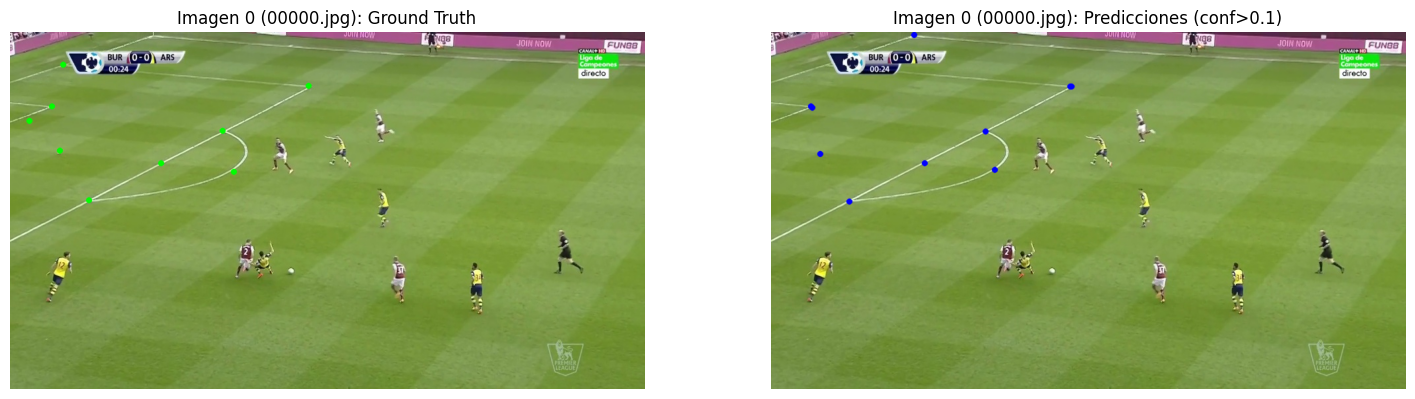

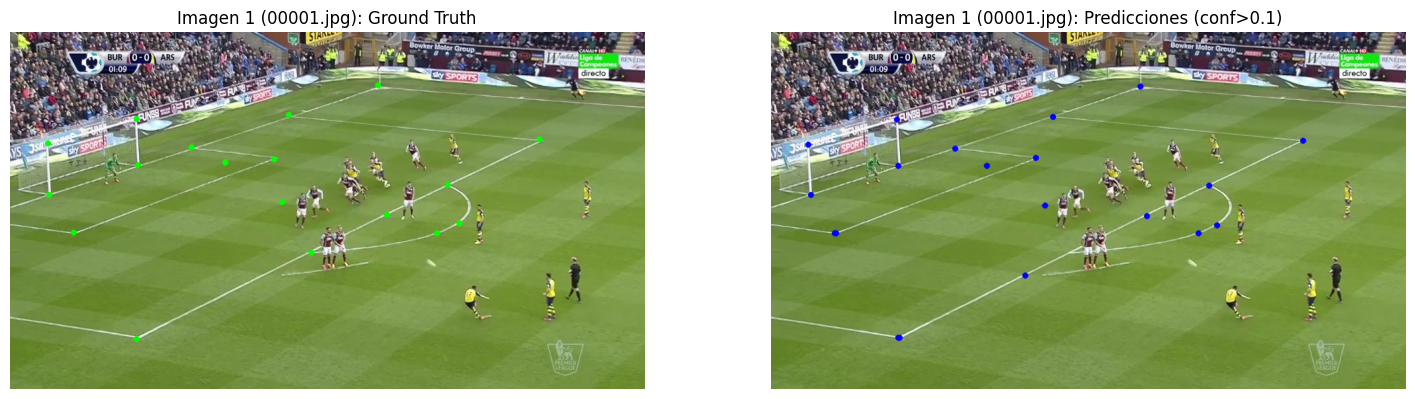

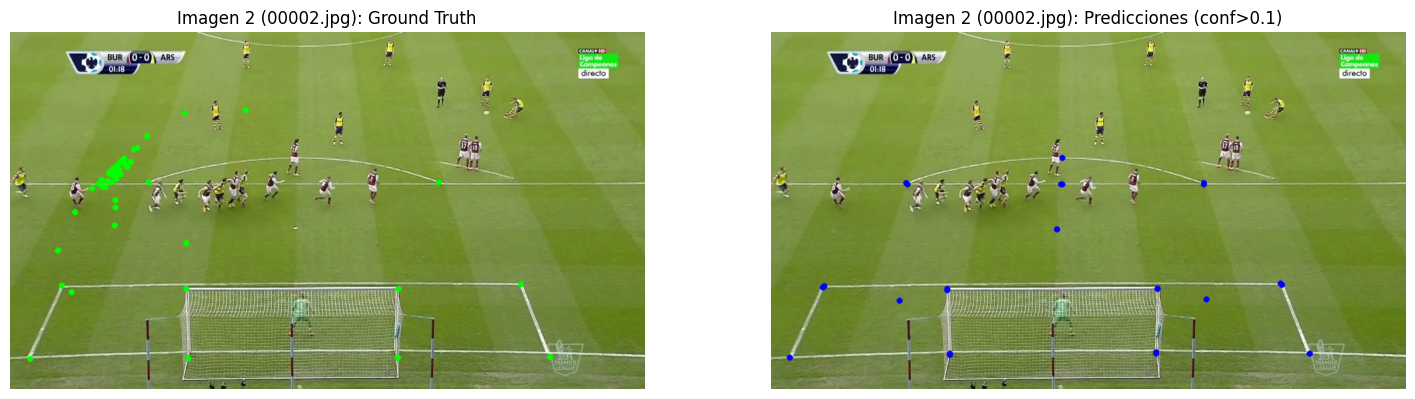

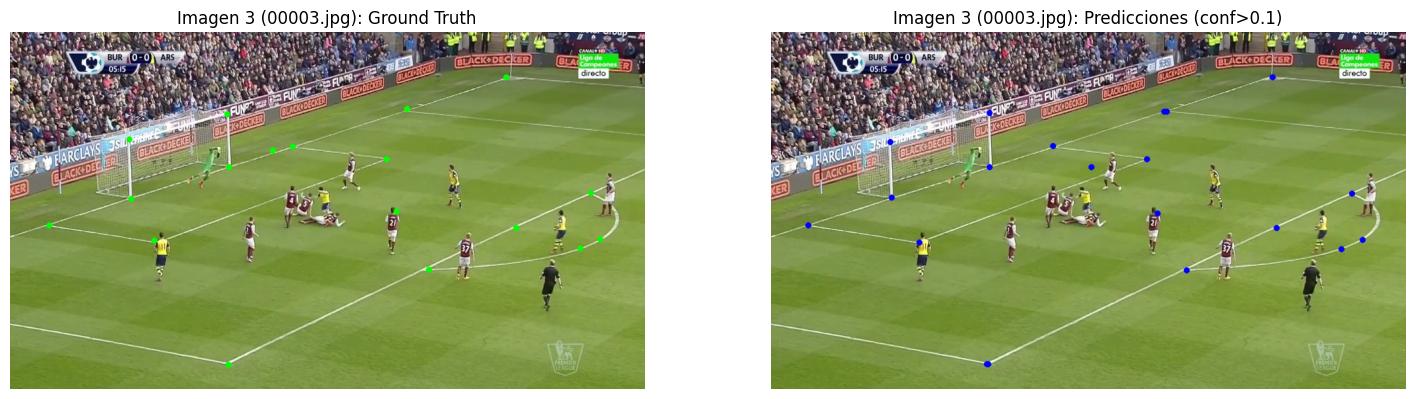

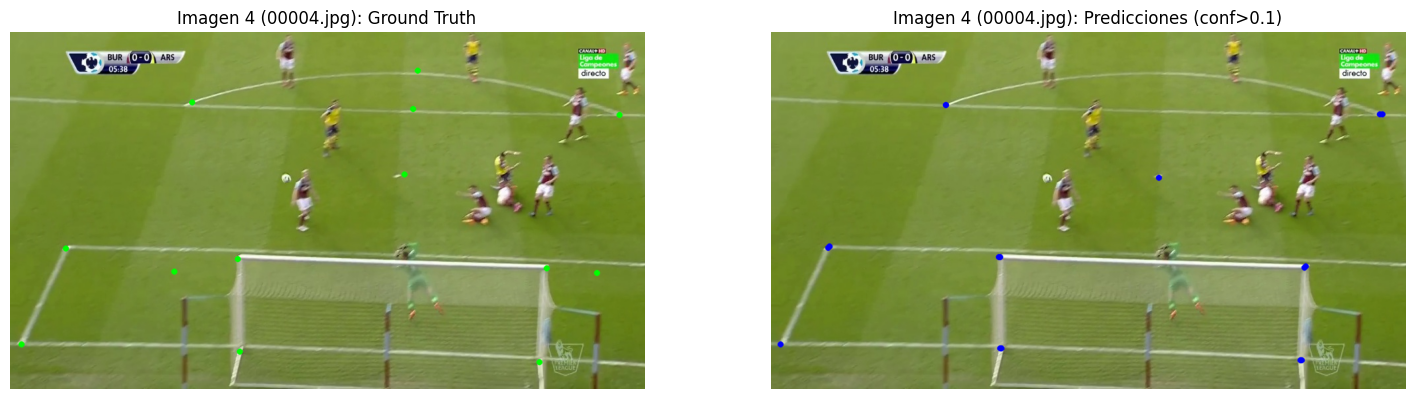


--- Visualización de Predicciones (Celda 7) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA 7: Carga del Mejor Modelo y Visualización de Predicciones
# --------------------------------------------------------------------
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib
from typing import Dict, Any, Optional, List, Tuple

# Asegurar que los módulos están en el path y recargarlos
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    DATA_DIR = os.path.join(BASE_PROJECT_DIR, "data") # Definir DATA_DIR aquí también
    SOCCERNET_DATASET_DIR = os.path.join(DATA_DIR, "soccernet_calibration_data") # Definir SOCCERNET_DATASET_DIR
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

for module_name_model in ['models.config', 'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.pitch_definitions' in sys.modules: importlib.reload(sys.modules['datatools.pitch_definitions'])
# Recargar también datatools para asegurar que SoccerNetKeypointsDataset esté disponible si se definió allí (no es el caso ahora)
if 'datatools.readers' in sys.modules: importlib.reload(sys.modules['datatools.readers'])
if 'datatools.keypoint_generation' in sys.modules: importlib.reload(sys.modules['datatools.keypoint_generation'])


from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.config import MODEL_PARAMS, DATA_PARAMS, TRAIN_PARAMS, LOSS_PARAMS
from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, NUM_KEYPOINTS
from datatools.readers import load_and_decode_annotations
from datatools.keypoint_generation import get_candidate_keypoints
from datatools.pitch_definitions import KEYPOINT_HORIZONTAL_SWAP_MAP # Necesario para el dataset

# Re-definición de SoccerNetKeypointsDataset y get_val_transforms (copiado/adaptado de Celda 4)
# para asegurar que estén disponibles en esta sesión del notebook después de un reinicio.
from torch.utils.data import Dataset # Importar Dataset para la clase
import albumentations as A # Importar A para las transformaciones
from albumentations.pytorch import ToTensorV2 # Importar ToTensorV2
import random # Importar random

class SoccerNetKeypointsDataset(Dataset):
    def __init__(self, image_dir: str, annot_dir: str,
                 image_width: int, image_height: int,
                 num_keypoints: int = NUM_KEYPOINTS,
                 transforms: Optional[A.Compose] = None,
                 apply_manual_flip_prob: float = 0.0,
                 debug_limit: Optional[int] = None):
        super().__init__()
        self.image_dir = image_dir; self.annot_dir = annot_dir
        self.image_width = image_width; self.image_height = image_height
        self.num_keypoints = num_keypoints; self.transforms = transforms
        self.apply_manual_flip_prob = apply_manual_flip_prob

        # Leer nombres de archivo y filtrar
        all_img_fnames = []
        if os.path.isdir(image_dir): # Comprobar si el directorio existe
            all_img_fnames = sorted([f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))])

        self.valid_samples = []
        for img_fname in all_img_fnames:
            annot_fpath = os.path.join(self.annot_dir, f"{os.path.splitext(img_fname)[0]}.json")
            if os.path.exists(annot_fpath) and os.path.getsize(annot_fpath) > 2:
                self.valid_samples.append(img_fname)

        if debug_limit is not None: self.valid_samples = self.valid_samples[:debug_limit]
        print(f"Dataset para '{image_dir}'. {len(self.valid_samples)} muestras válidas encontradas/usadas.")

    def __len__(self): return len(self.valid_samples)

    def __getitem__(self, idx: int) -> Dict[str, Any]:
        img_filename = self.valid_samples[idx]
        img_path = os.path.join(self.image_dir, img_filename)
        annot_path = os.path.join(self.annot_dir, f"{os.path.splitext(img_filename)[0]}.json")
        image = cv2.imread(img_path)

        dummy_image_tensor = torch.zeros((3, self.image_height, self.image_width), dtype=torch.float32)
        dummy_keypoints = torch.ones((self.num_keypoints, 3), dtype=torch.float32) * -1.0; dummy_keypoints[:, 2] = 0.0

        if image is None:
            # print(f"Error cargando imagen {img_path}")
            transformed_dummy_image = self.transforms(image=np.zeros((self.image_height,self.image_width,3), dtype=np.uint8))["image"] if self.transforms else dummy_image_tensor
            return {"image": transformed_dummy_image, "keypoints": dummy_keypoints}

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if image.shape[0] != self.image_height or image.shape[1] != self.image_width:
            image = cv2.resize(image, (self.image_width, self.image_height), interpolation=cv2.INTER_LINEAR)

        raw_annotations_normalized = load_and_decode_annotations(annot_path)
        if not raw_annotations_normalized:
            transformed_image = self.transforms(image=image)["image"] if self.transforms else torch.from_numpy(image.transpose(2,0,1)).float()/255.0
            return {"image": transformed_image, "keypoints": dummy_keypoints}

        keypoints_pixel_dict, _ = get_candidate_keypoints(raw_annotations_normalized, self.image_width, self.image_height, self.num_keypoints)
        keypoints_for_transform: List[Tuple[float, float]] = [(-1.0,-1.0)] * self.num_keypoints
        visibility_mask = np.zeros(self.num_keypoints, dtype=np.float32)

        for i in range(self.num_keypoints):
            kp_coords = keypoints_pixel_dict.get(i)
            if kp_coords and all(np.isfinite(c) for c in kp_coords):
                keypoints_for_transform[i] = kp_coords; visibility_mask[i] = 1.0

        if random.random() < self.apply_manual_flip_prob:
            image = cv2.flip(image, 1)
            temp_kps: List[Tuple[float,float]] = [(-1.0,-1.0)]*self.num_keypoints; temp_vis=np.zeros_like(visibility_mask)
            for i in range(self.num_keypoints):
                if visibility_mask[i] > 0.5:
                    ox,oy=keypoints_for_transform[i]; fx=self.image_width-1.0-ox
                    target_idx=KEYPOINT_HORIZONTAL_SWAP_MAP.get(i,i)
                    temp_kps[target_idx]=(fx,oy); temp_vis[target_idx]=1.0
            keypoints_for_transform=temp_kps; visibility_mask=temp_vis

        img_to_transform = image.copy(); kps_to_transform = list(keypoints_for_transform)
        vis_mask_before_alb = visibility_mask.copy()

        if self.transforms:
            try:
                transformed = self.transforms(image=img_to_transform, keypoints=kps_to_transform)
                final_image_tensor = transformed["image"]
                transformed_kps_list = transformed["keypoints"]
            except Exception as e_alb:
                # print(f"Error en Albumentations para {img_filename}: {e_alb}")
                return {"image": dummy_image_tensor, "keypoints": dummy_keypoints}
        else:
            final_image_tensor = torch.from_numpy(img_to_transform.transpose(2,0,1)).float()/255.0
            transformed_kps_list = kps_to_transform

        final_kps_tensor = np.ones((self.num_keypoints,3),dtype=np.float32)*-1.0
        for i in range(self.num_keypoints):
            if vis_mask_before_alb[i]>0.5 and i < len(transformed_kps_list):
                x,y=transformed_kps_list[i]
                if 0<=x<self.image_width and 0<=y<self.image_height:
                    final_kps_tensor[i,0]=float(x); final_kps_tensor[i,1]=float(y); final_kps_tensor[i,2]=1.0
                else: final_kps_tensor[i,2]=0.0
            else: final_kps_tensor[i,2]=0.0
        return {"image":final_image_tensor, "keypoints":torch.from_numpy(final_kps_tensor)}

INPUT_IMG_WIDTH = DATA_PARAMS["image_input_width"]
INPUT_IMG_HEIGHT = DATA_PARAMS["image_input_height"]

def get_val_transforms(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))


print("--- Cargando Mejor Modelo ---")
checkpoint_dir = TRAIN_PARAMS["model_checkpoint_dir"]
# Especificar directamente el mejor modelo de la Época 5
# O buscar el último "best_val_loss" si se prefiere
best_model_path = os.path.join(checkpoint_dir, "hrnet_epoch_10.pth")

if os.path.exists(best_model_path):
    print(f"Cargando modelo desde: {best_model_path}")
    device = torch.device(TRAIN_PARAMS["device"])

    # Usar la configuración del modelo con la que se entrenó
    hrnet_variant_loaded = MODEL_PARAMS['hrnet_variant'] # Asumimos que la config actual es la correcta
    # Si el checkpoint guardara hrnet_variant, podríamos leerlo de ahí.
    # checkpoint_data = torch.load(best_model_path, map_location='cpu') # Cargar a CPU primero
    # hrnet_variant_loaded = checkpoint_data.get('hrnet_variant', MODEL_PARAMS['hrnet_variant'])

    hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_loaded}"]
    model_to_load = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use,
        num_output_channels=MODEL_PARAMS["num_output_channels_head"]
    ).to(device)

    checkpoint = torch.load(best_model_path, map_location=device)
    model_to_load.load_state_dict(checkpoint['model_state_dict'])
    model_to_load.eval()
    print(f"Modelo cargado y puesto en modo eval.")

    # --- Preparar DataLoader de Validación (pocas muestras para visualización) ---
    # Definir VALID_IMAGES_DIR si no está global
    if 'VALID_IMAGES_DIR' not in globals() or not VALID_IMAGES_DIR:
        _task_name_data = "calibration-2023"
        _act_data_root = os.path.join(SOCCERNET_DATASET_DIR, _task_name_data)
        VALID_IMAGES_DIR = os.path.join(_act_data_root, "valid")
        print(f"VALID_IMAGES_DIR establecido a: {VALID_IMAGES_DIR}")


    if VALID_IMAGES_DIR and os.path.exists(VALID_IMAGES_DIR):
        val_transforms_vis = get_val_transforms(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH)
        vis_dataset = SoccerNetKeypointsDataset(
            image_dir=VALID_IMAGES_DIR, annot_dir=VALID_IMAGES_DIR,
            image_width=INPUT_IMG_WIDTH, image_height=INPUT_IMG_HEIGHT,
            transforms=val_transforms_vis,
            apply_manual_flip_prob=0.0,
            debug_limit=5 # Solo 5 imágenes para visualización
        )
        vis_dataloader = DataLoader(vis_dataset, batch_size=1, shuffle=False)

        print("\n--- Visualizando Predicciones ---")
        hrnet_native_stride = 4
        upscale_from_config = hrnet_config_to_use.get("upscale", 1)
        final_model_output_stride = hrnet_native_stride // upscale_from_config

        for i, batch in enumerate(vis_dataloader):
            image_tensor = batch["image"].to(device)
            keypoints_gt_tensor = batch["keypoints"].to(device)

            # Obtener el nombre de archivo para cargar la imagen original
            # Esto asume que el orden de vis_dataset.valid_samples no ha cambiado
            img_fname_for_display = vis_dataset.valid_samples[i]
            original_img_path = os.path.join(vis_dataset.image_dir, img_fname_for_display)
            original_img_display = cv2.imread(original_img_path)
            if original_img_display.shape[0] != INPUT_IMG_HEIGHT or original_img_display.shape[1] != INPUT_IMG_WIDTH:
                 original_img_display = cv2.resize(original_img_display, (INPUT_IMG_WIDTH, INPUT_IMG_HEIGHT))

            with torch.no_grad():
                pred_log_probs_list = model_to_load(image_tensor)
                pred_log_probs = pred_log_probs_list[0]

            pred_probs = torch.exp(pred_log_probs)

            img_with_gt = original_img_display.copy()
            img_with_pred = original_img_display.copy()

            # Dibujar GT
            for kp_idx in range(NUM_KEYPOINTS):
                if keypoints_gt_tensor[0, kp_idx, 2] > 0.5:
                    x, y = int(keypoints_gt_tensor[0, kp_idx, 0].item()), int(keypoints_gt_tensor[0, kp_idx, 1].item())
                    cv2.circle(img_with_gt, (x,y), 4, (0, 255, 0), -1, lineType=cv2.LINE_AA)

            CONF_THRESHOLD_VIS = 0.1
            for kp_idx in range(NUM_KEYPOINTS):
                heatmap_kp = pred_probs[0, kp_idx, :, :]
                max_val, max_idx_flat = torch.max(heatmap_kp.contiguous().view(-1), dim=0) # .contiguous() añadido

                if max_val.item() > CONF_THRESHOLD_VIS:
                    pred_y_heatmap = (max_idx_flat // heatmap_kp.shape[1]).item()
                    pred_x_heatmap = (max_idx_flat % heatmap_kp.shape[1]).item()

                    pred_x_img = int(pred_x_heatmap * final_model_output_stride)
                    pred_y_img = int(pred_y_heatmap * final_model_output_stride)

                    cv2.circle(img_with_pred, (pred_x_img, pred_y_img), 4, (255, 0, 0), -1, lineType=cv2.LINE_AA)

            plt.figure(figsize=(18, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img_with_gt, cv2.COLOR_BGR2RGB))
            plt.title(f"Imagen {i} ({img_fname_for_display}): Ground Truth")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(img_with_pred, cv2.COLOR_BGR2RGB))
            plt.title(f"Imagen {i} ({img_fname_for_display}): Predicciones (conf>{CONF_THRESHOLD_VIS:.1f})")
            plt.axis('off')
            plt.show()

    else:
        print(f"ADVERTENCIA: Directorio de validación {VALID_IMAGES_DIR} no encontrado para visualización.")
else:
    print(f"No se encontró el modelo guardado en {best_model_path} para cargar y visualizar.")

print("\n--- Visualización de Predicciones (Celda 7) Finalizada ---")

--- Cargando Mejor Modelo Entrenado ---
Variante de HRNet leída del checkpoint: w18
Modelo cargado desde /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_10.pth y puesto en modo eval.

--- Procesando imagen: /content/ball.png ---
Redimensionando imagen de (805, 1569) a (540, 960)
Realizando inferencia...
Forma de las probabilidades predichas: torch.Size([1, 58, 270, 480])
Se dibujaron 11 keypoints con confianza > 0.05


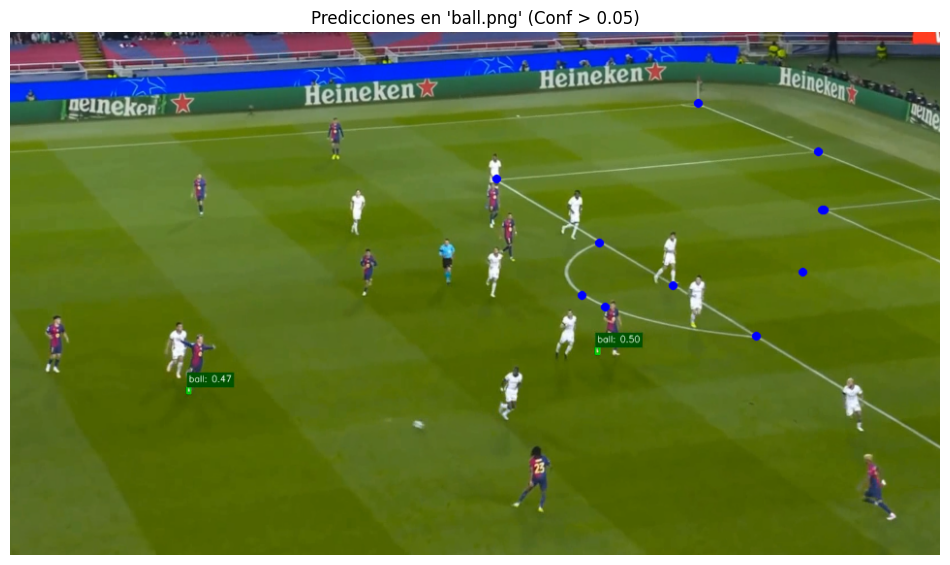


--- Inferencia en Imagen Nueva (Celda 8) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA 8: Inferencia en una Imagen Nueva
# --------------------------------------------------------------------
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib
from typing import Dict, Any, Optional, List, Tuple

# Asegurar que los módulos están en el path y recargarlos (por si acaso)
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

for module_name_model in ['models.config', 'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.pitch_definitions' in sys.modules: importlib.reload(sys.modules['datatools.pitch_definitions'])

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.config import MODEL_PARAMS, DATA_PARAMS, TRAIN_PARAMS # Necesitamos TRAIN_PARAMS para el device
from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, NUM_KEYPOINTS

# Re-definir get_val_transforms si no está global (de Celda 4 o 7)
if 'get_val_transforms' not in globals():
    from albumentations import Compose, Normalize
    from albumentations.pytorch import ToTensorV2
    INPUT_IMG_WIDTH = DATA_PARAMS["image_input_width"]
    INPUT_IMG_HEIGHT = DATA_PARAMS["image_input_height"]
    def get_val_transforms(img_height, img_width) -> A.Compose:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))
    print("get_val_transforms redefinida.")


# --- 1. Cargar el Mejor Modelo Entrenado ---
print("--- Cargando Mejor Modelo Entrenado ---")
checkpoint_dir = TRAIN_PARAMS["model_checkpoint_dir"]
# Usa el checkpoint de la época 10, ya que fue el último "mejor" con loss 0.0001
best_model_path = os.path.join(checkpoint_dir, "hrnet_best_val_loss_epoch_10.pth")
# O si renombraste el mejor a hrnet_best_val_loss.pth:
# best_model_path = os.path.join(checkpoint_dir, "hrnet_best_val_loss.pth")


model_loaded_for_inference = False
if os.path.exists(best_model_path):
    device = torch.device(TRAIN_PARAMS["device"])
    hrnet_variant_to_load = MODEL_PARAMS['hrnet_variant']

    # Intentar obtener la variante del checkpoint si se guardó
    checkpoint_data = torch.load(best_model_path, map_location='cpu')
    if 'hrnet_variant' in checkpoint_data:
        hrnet_variant_to_load = checkpoint_data['hrnet_variant']
        print(f"Variante de HRNet leída del checkpoint: {hrnet_variant_to_load}")
    else:
        print(f"Variante de HRNet no encontrada en checkpoint, usando de config: {hrnet_variant_to_load}")

    hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_to_load}"]

    model_inference = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use,
        num_output_channels=MODEL_PARAMS["num_output_channels_head"]
    ).to(device)

    model_inference.load_state_dict(checkpoint_data['model_state_dict'])
    model_inference.eval()
    print(f"Modelo cargado desde {best_model_path} y puesto en modo eval.")
    model_loaded_for_inference = True
else:
    print(f"ERROR: No se encontró el modelo en {best_model_path}. Asegúrate de que la ruta es correcta.")

# --- 2. Cargar y Preprocesar la Imagen Nueva ---
if model_loaded_for_inference:
    new_image_path = "/content/ball.png" # <--- RUTA A TU IMAGEN
    print(f"\n--- Procesando imagen: {new_image_path} ---")

    if not os.path.exists(new_image_path):
        print(f"ERROR: La imagen {new_image_path} no existe.")
    else:
        image_bgr = cv2.imread(new_image_path)
        if image_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {new_image_path} con OpenCV.")
        else:
            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

            # Guardar una copia para dibujar
            display_image = image_bgr.copy() # Usar BGR para dibujar con OpenCV y luego convertir para plt

            # Redimensionar a las dimensiones de entrada del modelo
            input_h = DATA_PARAMS["image_input_height"]
            input_w = DATA_PARAMS["image_input_width"]
            if image_rgb.shape[0] != input_h or image_rgb.shape[1] != input_w:
                print(f"Redimensionando imagen de {image_rgb.shape[:2]} a ({input_h}, {input_w})")
                image_resized_rgb = cv2.resize(image_rgb, (input_w, input_h), interpolation=cv2.INTER_LINEAR)
                display_image = cv2.resize(display_image, (input_w, input_h), interpolation=cv2.INTER_LINEAR)
            else:
                image_resized_rgb = image_rgb

            # Aplicar transformaciones de validación (solo normalización y ToTensor)
            val_transforms_inference = get_val_transforms(input_h, input_w)
            # Albumentations espera un diccionario, incluso si no hay keypoints
            transformed_data = val_transforms_inference(image=image_resized_rgb, keypoints=[])
            image_tensor = transformed_data["image"].unsqueeze(0).to(device) # Añadir dim de batch y mover a device

            # --- 3. Realizar Inferencia ---
            print("Realizando inferencia...")
            with torch.no_grad():
                pred_log_probs_list = model_inference(image_tensor)
                pred_log_probs = pred_log_probs_list[0]

            pred_probs = torch.exp(pred_log_probs) # (1, NumKP+1, H_out, W_out)
            print(f"Forma de las probabilidades predichas: {pred_probs.shape}")

            # --- 4. Extraer Keypoints y Visualizar ---
            # Usar la misma lógica de argmax simple de la Celda 7
            hrnet_native_stride = 4
            upscale_from_config = hrnet_config_to_use.get("upscale", 1)
            final_model_output_stride = hrnet_native_stride // upscale_from_config

            CONF_THRESHOLD_VIS = 0.05 # Puedes ajustar este umbral
            num_kps_drawn = 0

            for kp_idx in range(NUM_KEYPOINTS): # Solo los 57 keypoints reales
                heatmap_kp = pred_probs[0, kp_idx, :, :]
                max_val, max_idx_flat = torch.max(heatmap_kp.contiguous().view(-1), dim=0)

                if max_val.item() > CONF_THRESHOLD_VIS:
                    pred_y_heatmap = (max_idx_flat // heatmap_kp.shape[1]).item()
                    pred_x_heatmap = (max_idx_flat % heatmap_kp.shape[1]).item()

                    pred_x_img = int(pred_x_heatmap * final_model_output_stride)
                    pred_y_img = int(pred_y_heatmap * final_model_output_stride)

                    # Dibujar círculo y etiqueta
                    color = (255, 0, 0) # Rojo para predicciones
                    cv2.circle(display_image, (pred_x_img, pred_y_img), 4, color, -1, lineType=cv2.LINE_AA)
                    kp_name = KEYPOINT_INDEX_TO_NAME.get(kp_idx, str(kp_idx))
                    # cv2.putText(display_image, f"{kp_idx}:{kp_name[:5]} ({max_val.item():.2f})",
                    #             (pred_x_img + 5, pred_y_img - 5),
                    #             cv2.FONT_HERSHEY_SIMPLEX, 0.3, color, 1, cv2.LINE_AA)
                    num_kps_drawn +=1

            print(f"Se dibujaron {num_kps_drawn} keypoints con confianza > {CONF_THRESHOLD_VIS}")

            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))
            plt.title(f"Predicciones en '{os.path.basename(new_image_path)}' (Conf > {CONF_THRESHOLD_VIS:.2f})")
            plt.axis('off')
            plt.show()
else:
    print("El modelo no se cargó. No se puede realizar la inferencia.")

print("\n--- Inferencia en Imagen Nueva (Celda 8) Finalizada ---")

In [ ]:
# --------------------------------------------------------------------
# CELDA 9: Procesamiento de Video Completo
# --------------------------------------------------------------------
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt # Aunque no se usa directamente para video, por si se quiere un frame
import importlib
from typing import Dict, Any, Optional, List, Tuple
import time # Para medir el tiempo
from tqdm import tqdm # Para la barra de progreso

# Asegurar que los módulos están en el path y recargarlos
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

for module_name_model in ['models.config', 'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.pitch_definitions' in sys.modules: importlib.reload(sys.modules['datatools.pitch_definitions'])

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.config import MODEL_PARAMS, DATA_PARAMS, TRAIN_PARAMS
from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, NUM_KEYPOINTS

# Re-definición de get_val_transforms si no está global
if 'get_val_transforms' not in globals():
    from albumentations import Compose, Normalize
    from albumentations.pytorch import ToTensorV2
    INPUT_IMG_WIDTH_VID = DATA_PARAMS["image_input_width"]  # Usar nombres diferentes para evitar conflicto si Celda 7 se ejecutó
    INPUT_IMG_HEIGHT_VID = DATA_PARAMS["image_input_height"]
    def get_val_transforms(img_height, img_width) -> A.Compose:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2(),
        ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False)) # No se pasan keypoints en inferencia de video
    print("get_val_transforms redefinida para Celda 9.")


# --- 1. Cargar el Mejor Modelo Entrenado ---
print("--- Cargando Mejor Modelo Entrenado ---")
checkpoint_dir = TRAIN_PARAMS["model_checkpoint_dir"]
best_model_path = os.path.join(checkpoint_dir, "hrnet_best_val_loss_epoch_10.pth") # O el que sea el mejor

model_loaded_for_video = False
if os.path.exists(best_model_path):
    device = torch.device(TRAIN_PARAMS["device"])

    checkpoint_data = torch.load(best_model_path, map_location='cpu')
    hrnet_variant_to_load = checkpoint_data.get('hrnet_variant', MODEL_PARAMS['hrnet_variant'])
    print(f"Variante de HRNet para el modelo: {hrnet_variant_to_load}")

    hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_to_load}"]

    model_video = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use,
        num_output_channels=MODEL_PARAMS["num_output_channels_head"]
    ).to(device)

    model_video.load_state_dict(checkpoint_data['model_state_dict'])
    model_video.eval()
    print(f"Modelo cargado desde {best_model_path} y puesto en modo eval.")
    model_loaded_for_video = True
else:
    print(f"ERROR: No se encontró el modelo en {best_model_path}.")

# --- 2. Configuración del Procesamiento de Video ---
if model_loaded_for_video:
    video_input_path = "/content/drive/MyDrive/Orbital Lab/Demo Forta/fortanacional.mp4" # <--- RUTA A TU VIDEO
    video_output_filename = "forta2_processed.mp4"
    video_output_path = os.path.join(BASE_PROJECT_DIR, video_output_filename) # Guardar en el dir base del proyecto

    if not os.path.exists(video_input_path):
        print(f"ERROR: El video de entrada {video_input_path} no existe.")
    else:
        cap = cv2.VideoCapture(video_input_path)
        if not cap.isOpened():
            print(f"ERROR: No se pudo abrir el video {video_input_path}")
        else:
            # Obtener propiedades del video para el VideoWriter
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            original_fps = cap.get(cv2.CAP_PROP_FPS)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            print(f"Video de entrada: {video_input_path}")
            print(f"  Resolución original: {frame_width}x{frame_height}, FPS: {original_fps:.2f}, Total Frames: {total_frames}")

            # Definir el codec y crear el objeto VideoWriter
            # Usar 'mp4v' para .mp4. Otros codecs comunes son 'XVID' para .avi
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            # El VideoWriter necesita las dimensiones de los frames que le VAMOS A PASAR
            # que serán las dimensiones a las que redimensionamos para el modelo.
            out_frame_width = DATA_PARAMS["image_input_width"]
            out_frame_height = DATA_PARAMS["image_input_height"]
            out_video = cv2.VideoWriter(video_output_path, fourcc, original_fps, (out_frame_width, out_frame_height))
            print(f"Video de salida se guardará en: {video_output_path} con resolución {out_frame_width}x{out_frame_height}")

            # Transformaciones para cada frame (solo normalización y ToTensor)
            frame_transforms = get_val_transforms(out_frame_height, out_frame_width)

            # --- 3. Bucle de Procesamiento de Video ---
            print("\n--- Procesando Video ---")

            total_inference_time = 0
            processed_frames_count = 0

            # Usar tqdm para la barra de progreso
            for frame_idx in tqdm(range(total_frames), desc="Procesando frames"):
                ret, frame_bgr = cap.read()
                if not ret:
                    print(f"Frame {frame_idx+1}/{total_frames} no se pudo leer o fin del video.")
                    break

                # Preprocesamiento del frame
                frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

                # Redimensionar a las dimensiones de entrada del modelo
                if frame_rgb.shape[0] != out_frame_height or frame_rgb.shape[1] != out_frame_width:
                    frame_resized_rgb = cv2.resize(frame_rgb, (out_frame_width, out_frame_height), interpolation=cv2.INTER_LINEAR)
                    # Para dibujar, usar una copia del frame BGR redimensionado
                    display_frame_bgr = cv2.resize(frame_bgr, (out_frame_width, out_frame_height), interpolation=cv2.INTER_LINEAR)
                else:
                    frame_resized_rgb = frame_rgb
                    display_frame_bgr = frame_bgr.copy() # Usar copia para dibujar

                # Albumentations espera un diccionario
                transformed_data = frame_transforms(image=frame_resized_rgb, keypoints=[]) # No hay keypoints GT para video nuevo
                image_tensor = transformed_data["image"].unsqueeze(0).to(device)

                # Inferencia
                start_time_frame = time.time()
                with torch.no_grad():
                    pred_log_probs_list = model_video(image_tensor)
                    pred_log_probs = pred_log_probs_list[0]
                end_time_frame = time.time()
                total_inference_time += (end_time_frame - start_time_frame)
                processed_frames_count += 1

                pred_probs = torch.exp(pred_log_probs)

                # Extracción y dibujo de Keypoints (misma lógica que Celda 7/8)
                hrnet_native_stride = 4
                upscale_from_config_vid = hrnet_config_to_use.get("upscale", 1) # Usar la config cargada
                final_model_output_stride = hrnet_native_stride // upscale_from_config_vid
                CONF_THRESHOLD_VIS_VIDEO = 0.1 # Umbral para dibujar

                for kp_idx in range(NUM_KEYPOINTS):
                    heatmap_kp = pred_probs[0, kp_idx, :, :]
                    max_val, max_idx_flat = torch.max(heatmap_kp.contiguous().view(-1), dim=0)

                    if max_val.item() > CONF_THRESHOLD_VIS_VIDEO:
                        pred_y_heatmap = (max_idx_flat // heatmap_kp.shape[1]).item()
                        pred_x_heatmap = (max_idx_flat % heatmap_kp.shape[1]).item()
                        pred_x_img = int(pred_x_heatmap * final_model_output_stride)
                        pred_y_img = int(pred_y_heatmap * final_model_output_stride)

                        cv2.circle(display_frame_bgr, (pred_x_img, pred_y_img), 3, (0, 0, 255), -1, lineType=cv2.LINE_AA) # Rojo para Predicciones

                # Escribir el frame procesado al video de salida
                out_video.write(display_frame_bgr)

            # Liberar recursos
            cap.release()
            out_video.release()
            print("\n--- Procesamiento de Video Finalizado ---")
            print(f"Video procesado guardado en: {video_output_path}")

            if processed_frames_count > 0:
                avg_inference_time_per_frame = total_inference_time / processed_frames_count
                fps_inference = 1 / avg_inference_time_per_frame
                print(f"\n--- Estadísticas de Inferencia ---")
                print(f"Total de frames procesados: {processed_frames_count}")
                print(f"Tiempo total de inferencia: {total_inference_time:.2f} segundos")
                print(f"Tiempo promedio de inferencia por frame: {avg_inference_time_per_frame*1000:.2f} ms")
                print(f"FPS de inferencia (solo modelo, sin I/O ni pre/post): {fps_inference:.2f} FPS")
            else:
                print("No se procesaron frames.")
else:
    print("El modelo no se cargó. No se puede procesar el video.")

--- Cargando Mejor Modelo Entrenado ---
Variante de HRNet para el modelo: w18
Modelo cargado desde /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_10.pth y puesto en modo eval.
Video de entrada: /content/drive/MyDrive/Orbital Lab/Demo Forta/fortanacional.mp4
  Resolución original: 1920x1080, FPS: 29.89, Total Frames: 3349
Video de salida se guardará en: /content/futbol_keypoints_colab/forta2_processed.mp4 con resolución 960x540

--- Procesando Video ---


Procesando frames: 100%|██████████| 3349/3349 [03:48<00:00, 14.65it/s]


--- Procesamiento de Video Finalizado ---
Video procesado guardado en: /content/futbol_keypoints_colab/forta2_processed.mp4

--- Estadísticas de Inferencia ---
Total de frames procesados: 3349
Tiempo total de inferencia: 135.60 segundos
Tiempo promedio de inferencia por frame: 40.49 ms
FPS de inferencia (solo modelo, sin I/O ni pre/post): 24.70 FPS


In [ ]:
# prompt: copia este archivo /content/futbol_keypoints_colab/forta2_processed.mp4 en esta ruta: /content/drive/MyDrive/Orbital Lab/videos/Futbol

!cp /content/futbol_keypoints_colab/forta2_processed.mp4 /content/drive/MyDrive/Orbital\ Lab/videos/Futbol/forta2_processed.mp4

In [ ]:
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 126.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [onnxruntime]


In [ ]:
# --------------------------------------------------------------------
# CELDA 10: Exportación del Modelo a Formato ONNX
# --------------------------------------------------------------------
import os
import sys
import torch
import importlib
from typing import Dict, Any, Optional, List, Tuple

# --- 1. Asegurar Definiciones y Módulos ---
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    MODELS_CHECKPOINTS_DIR = os.path.join(BASE_PROJECT_DIR, "model_checkpoints") # Asegurar que está definido
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

for module_name_model in ['models.config', 'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.config import MODEL_PARAMS, DATA_PARAMS, TRAIN_PARAMS

print("--- Cargando Modelo PyTorch Entrenado para Exportación ONNX ---")
checkpoint_dir = TRAIN_PARAMS["model_checkpoint_dir"]
# Asegúrate que esta es la ruta al mejor modelo que quieres exportar
best_model_path = os.path.join(checkpoint_dir, "hrnet_best_val_loss_epoch_10.pth")
# O el que hayas renombrado a "hrnet_best_val_loss.pth"
# best_model_path = os.path.join(checkpoint_dir, "hrnet_best_val_loss.pth")


model_loaded_for_onnx = False
if not os.path.exists(best_model_path):
    print(f"ERROR: Archivo de modelo no encontrado en {best_model_path}.")
else:
    device = torch.device("cpu") # Cargar a CPU para exportar es a menudo más seguro/simple

    checkpoint = torch.load(best_model_path, map_location=device)
    hrnet_variant_loaded = checkpoint.get('hrnet_variant', MODEL_PARAMS['hrnet_variant'])
    print(f"Usando HRNet variant del checkpoint: {hrnet_variant_loaded}")

    hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_loaded}"]

    pytorch_model = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use,
        num_output_channels=MODEL_PARAMS["num_output_channels_head"]
    ).to(device)

    pytorch_model.load_state_dict(checkpoint['model_state_dict'])
    pytorch_model.eval() # MUY IMPORTANTE: Poner el modelo en modo evaluación
    print(f"Modelo PyTorch cargado desde {best_model_path} y en modo eval.")
    model_loaded_for_onnx = True

# --- 2. Crear un Tensor de Entrada Dummy ---
if model_loaded_for_onnx:
    # El batch size para el dummy input puede ser 1
    dummy_batch_size = 1
    input_h = DATA_PARAMS["image_input_height"]
    input_w = DATA_PARAMS["image_input_width"]
    # Crear en el mismo dispositivo que el modelo (aunque para exportar CPU suele estar bien)
    dummy_input = torch.randn(dummy_batch_size, 3, input_h, input_w, device=device)
    print(f"Tensor de entrada dummy creado con forma: {dummy_input.shape}")

    # --- (Opcional) Modificar el forward del modelo para que devuelva un tensor directamente ---
    # El `forward` de HRNetHeatmapModel devuelve una lista: `[log_prob_heatmaps]`
    # Para ONNX, es más común que devuelva un tensor directamente.
    # Podemos hacer un wrapper o modificarlo temporalmente.

    class HRNetHeatmapModelONNXWrapper(torch.nn.Module):
        def __init__(self, model_core):
            super().__init__()
            self.model_core = model_core
        def forward(self, x):
            return self.model_core(x)[0] # Devolver el tensor directamente

    onnx_export_model = HRNetHeatmapModelONNXWrapper(pytorch_model).to(device)
    onnx_export_model.eval() # Asegurar que el wrapper también esté en modo eval

    # --- 3. Exportar a ONNX ---
    onnx_filename = f"hrnet_{hrnet_variant_loaded}_futbol_keypoints.onnx"
    onnx_output_path = os.path.join(BASE_PROJECT_DIR, onnx_filename) # Guardar en el dir base del proyecto

    # Opset version: 11 o 12 suelen ser buenas opciones.
    # Algunas versiones más nuevas de PyTorch podrían preferir opsets más recientes.
    opset_version = 12
    print(f"\n--- Iniciando Exportación a ONNX (opset {opset_version}) ---")
    print(f"Archivo de salida: {onnx_output_path}")

    try:
        torch.onnx.export(
            onnx_export_model,               # El modelo a exportar (o el wrapper)
            dummy_input,                     # Tensor de entrada dummy
            onnx_output_path,                # Dónde guardar el modelo
            export_params=True,              # Guardar los pesos entrenados dentro del archivo ONNX
            opset_version=opset_version,     # Versión del conjunto de operaciones ONNX
            do_constant_folding=True,        # Optimización: ejecuta plegado de constantes
            input_names=['input_image'],     # Nombres para las entradas del modelo ONNX (lista)
            output_names=['output_heatmaps'],# Nombres para las salidas del modelo ONNX (lista)
            dynamic_axes={                   # Opcional: para tamaños de batch/dimensiones dinámicas
                'input_image': {0: 'batch_size'}, # El primer eje (batch) de la entrada es dinámico
                'output_heatmaps': {0: 'batch_size'} # El primer eje (batch) de la salida es dinámico
            }
        )
        print(f"Modelo exportado exitosamente a ONNX: {onnx_output_path}")

        # --- 4. (Opcional) Verificar el Modelo ONNX ---
        print("\n--- Verificando el Modelo ONNX (opcional) ---")
        # Necesitas instalar onnx y onnxruntime para esto:
        # !pip install onnx onnxruntime
        try:
            import onnx
            import onnxruntime

            onnx_model = onnx.load(onnx_output_path)
            onnx.checker.check_model(onnx_model) # Lanza una excepción si el modelo es inválido
            print("Modelo ONNX verificado estructuralmente (onnx.checker).")

            # Comparar salida de PyTorch y ONNX Runtime con la misma entrada dummy
            ort_session = onnxruntime.InferenceSession(onnx_output_path, providers=['CPUExecutionProvider']) # o ['CUDAExecutionProvider']

            def to_numpy(tensor):
                return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

            ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(dummy_input)}
            ort_outs = ort_session.run(None, ort_inputs)

            pytorch_model.to(device) # Asegurar que el modelo PyTorch está en el dispositivo correcto
            onnx_export_model.to(device) # Y el wrapper también

            with torch.no_grad():
                pytorch_out_tensor = onnx_export_model(dummy_input) # Usar el wrapper que devuelve tensor

            # Comparar numéricamente (np.allclose)
            np.testing.assert_allclose(to_numpy(pytorch_out_tensor), ort_outs[0], rtol=1e-03, atol=1e-05)
            print("Verificación numérica (PyTorch vs ONNX Runtime) exitosa: las salidas son cercanas.")
            print(f"  Forma de salida PyTorch: {pytorch_out_tensor.shape}")
            print(f"  Forma de salida ONNX Runtime: {ort_outs[0].shape}")

        except ImportError:
            print("ADVERTENCIA: `onnx` y `onnxruntime` no están instalados. Omitiendo verificación del modelo ONNX.")
            print("Puedes instalarlos con: !pip install onnx onnxruntime")
        except Exception as e_onnx_check:
            print(f"Error durante la verificación del modelo ONNX: {e_onnx_check}")

    except Exception as e_export:
        print(f"Error durante la exportación a ONNX: {type(e_export).__name__} - {e_export}")
        import traceback
        traceback.print_exc()
else:
    print("El modelo PyTorch no se cargó. No se puede exportar a ONNX.")

--- Cargando Modelo PyTorch Entrenado para Exportación ONNX ---
Usando HRNet variant del checkpoint: w18
Modelo PyTorch cargado desde /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_val_loss_epoch_10.pth y en modo eval.
Tensor de entrada dummy creado con forma: torch.Size([1, 3, 540, 960])

--- Iniciando Exportación a ONNX (opset 12) ---
Archivo de salida: /content/futbol_keypoints_colab/hrnet_w18_futbol_keypoints.onnx


/content/futbol_keypoints_colab/src/models/hrnet_backbone.py:316: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  target_h = int(x_stage4_branch_outputs[0].size(2) * self.upscale_factor)
/content/futbol_keypoints_colab/src/models/hrnet_backbone.py:317: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  target_w = int(x_stage4_branch_outputs[0].size(3) * self.upscale_factor)
/content/futbol_keypoints_colab/src/models/hrnet_backbone.py:326: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flo

Modelo exportado exitosamente a ONNX: /content/futbol_keypoints_colab/hrnet_w18_futbol_keypoints.onnx

--- Verificando el Modelo ONNX (opcional) ---
Modelo ONNX verificado estructuralmente (onnx.checker).
Verificación numérica (PyTorch vs ONNX Runtime) exitosa: las salidas son cercanas.
  Forma de salida PyTorch: torch.Size([1, 58, 270, 480])
  Forma de salida ONNX Runtime: (1, 58, 270, 480)


In [ ]:
!pip install onnx onnxruntime-gpu # onnxruntime-gpu para usar GPU, o solo onnxruntime para CPU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 69.9 MB/s eta 0:00:00


Módulos de config y pitch_definitions cargados/recargados.
get_inference_transforms definida.

--- Cargando Modelo ONNX ---
onnxruntime-gpu ya está instalado.
Proveedores de ONNX Runtime disponibles: ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Modelo ONNX cargado desde /content/futbol_keypoints_colab/hrnet_w18_futbol_keypoints.onnx usando proveedor(es): ['CUDAExecutionProvider', 'CPUExecutionProvider']
  Nombre de entrada ONNX: input_image
  Nombre de salida ONNX: output_heatmaps

--- Procesando imagen con ONNX: /content/ball.png ---
Realizando inferencia con ONNX Runtime...
Tiempo de inferencia ONNX (1 frame): 936.59 ms
Forma de las probabilidades predichas (ONNX): torch.Size([1, 58, 270, 480])
Se dibujaron 11 keypoints con confianza > 0.1 usando ONNX.


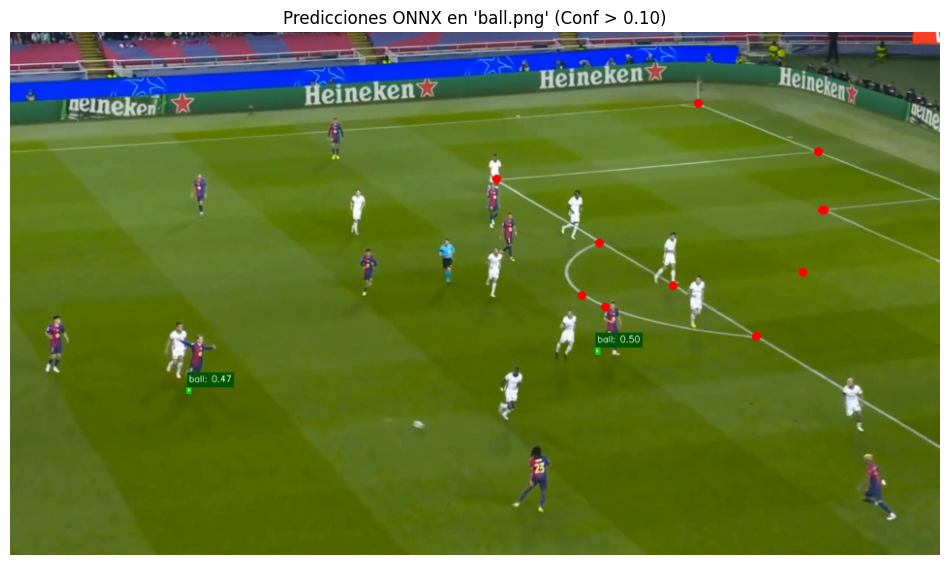


--- Inferencia con Modelo ONNX (Celda 11 Corregida v2) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA 11: Inferencia con Modelo ONNX en una Imagen (Corregida v2)
# --------------------------------------------------------------------
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib
from typing import Dict, Any, Optional, List, Tuple
import onnx
import onnxruntime
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time
import pkg_resources # <--- AÑADIDO IMPORT PKG_RESOURCES AQUÍ
import subprocess # Para la instalación opcional de onnxruntime-gpu

# Asegurar que los módulos están en el path (por si se ejecuta en nueva sesión)
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

# Importar configuraciones y definiciones de keypoints
try:
    # Recargar módulos si ya están cargados
    if 'models.config' in sys.modules: importlib.reload(sys.modules['models.config'])
    if 'datatools.pitch_definitions' in sys.modules: importlib.reload(sys.modules['datatools.pitch_definitions'])

    from models.config import MODEL_PARAMS, DATA_PARAMS, TRAIN_PARAMS
    from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, NUM_KEYPOINTS
    print("Módulos de config y pitch_definitions cargados/recargados.")
except ImportError as e:
    print(f"ERROR: No se pudieron importar módulos necesarios de 'models' o 'datatools': {e}")
    raise

INPUT_IMG_WIDTH_ONNX = DATA_PARAMS["image_input_width"]
INPUT_IMG_HEIGHT_ONNX = DATA_PARAMS["image_input_height"]

def get_inference_transforms(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])
print("get_inference_transforms definida.")

# --- 1. Cargar el Modelo ONNX ---
print("\n--- Cargando Modelo ONNX ---")
hrnet_variant_onnx = MODEL_PARAMS.get('hrnet_variant', 'w18')
onnx_filename = f"hrnet_{hrnet_variant_onnx}_futbol_keypoints.onnx"
onnx_model_path = os.path.join(BASE_PROJECT_DIR, onnx_filename) # BASE_PROJECT_DIR debe estar definido

ort_session = None
if not os.path.exists(onnx_model_path):
    print(f"ERROR: Archivo de modelo ONNX no encontrado en {onnx_model_path}.")
    print("Asegúrate de que la Celda 10 (exportación a ONNX) se haya ejecutado correctamente.")
else:
    try:
        # Intentar instalar onnxruntime-gpu si CUDA está disponible y no está ya onnxruntime
        # Esto solo es útil si el Colab no tiene onnxruntime-gpu por defecto.
        # En muchos casos, onnxruntime (sin -gpu) ya usará CUDA si está compilado con él y los drivers son compatibles.
        if torch.cuda.is_available():
            gpu_runtime_installed = False
            try:
                pkg_resources.get_distribution("onnxruntime-gpu")
                gpu_runtime_installed = True
                print("onnxruntime-gpu ya está instalado.")
            except pkg_resources.DistributionNotFound:
                print("onnxruntime-gpu no encontrado, intentando instalar... (puede tardar un momento)")
                try:
                    process_out = subprocess.run([sys.executable, '-m', 'pip', 'install', 'onnxruntime-gpu'],
                                                 check=True, capture_output=True, text=True)
                    print("onnxruntime-gpu instalado exitosamente.")
                    print(process_out.stdout)
                    importlib.reload(onnxruntime)
                    gpu_runtime_installed = True
                except subprocess.CalledProcessError as e_install:
                    print(f"Fallo al instalar onnxruntime-gpu: {e_install.stderr}")
                    print("Se usará onnxruntime (CPU o CUDA si está compilado con él).")

        providers_list = []
        available_providers = onnxruntime.get_available_providers()
        print(f"Proveedores de ONNX Runtime disponibles: {available_providers}")
        if 'CUDAExecutionProvider' in available_providers:
            providers_list.append('CUDAExecutionProvider')
        providers_list.append('CPUExecutionProvider')

        ort_session = onnxruntime.InferenceSession(onnx_model_path, providers=providers_list)
        print(f"Modelo ONNX cargado desde {onnx_model_path} usando proveedor(es): {ort_session.get_providers()}")

        input_name_onnx = ort_session.get_inputs()[0].name
        output_name_onnx = ort_session.get_outputs()[0].name
        print(f"  Nombre de entrada ONNX: {input_name_onnx}")
        print(f"  Nombre de salida ONNX: {output_name_onnx}")

    except Exception as e_load_onnx:
        print(f"Error al cargar el modelo ONNX o crear la sesión de inferencia: {type(e_load_onnx).__name__} - {e_load_onnx}")
        import traceback
        traceback.print_exc()
        ort_session = None

# --- 2. Cargar y Preprocesar la Imagen Nueva ---
if ort_session:
    image_to_predict_path = "/content/ball.png"
    print(f"\n--- Procesando imagen con ONNX: {image_to_predict_path} ---")

    if not os.path.exists(image_to_predict_path):
        print(f"ERROR: La imagen {image_to_predict_path} no existe.")
    else:
        img_bgr = cv2.imread(image_to_predict_path)
        if img_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {image_to_predict_path} con OpenCV.")
        else:
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            display_img_onnx = img_bgr.copy()

            input_h = DATA_PARAMS["image_input_height"]
            input_w = DATA_PARAMS["image_input_width"]

            img_resized_rgb = cv2.resize(img_rgb, (input_w, input_h), interpolation=cv2.INTER_LINEAR)
            display_img_resized_onnx = cv2.resize(display_img_onnx, (input_w, input_h), interpolation=cv2.INTER_LINEAR)

            inference_transforms = get_inference_transforms(input_h, input_w)
            transformed = inference_transforms(image=img_resized_rgb)
            image_tensor = transformed["image"]

            input_feed = {input_name_onnx: image_tensor.unsqueeze(0).cpu().numpy()}

            print("Realizando inferencia con ONNX Runtime...")
            start_time_onnx_frame = time.time()
            ort_outs = ort_session.run([output_name_onnx], input_feed)
            end_time_onnx_frame = time.time()

            pred_log_probs_onnx = torch.from_numpy(ort_outs[0])
            print(f"Tiempo de inferencia ONNX (1 frame): {(end_time_onnx_frame - start_time_onnx_frame)*1000:.2f} ms")

            pred_probs_onnx = torch.exp(pred_log_probs_onnx)
            print(f"Forma de las probabilidades predichas (ONNX): {pred_probs_onnx.shape}")

            # Cargar hrnet_config_to_use para el stride
            hrnet_config_loaded = MODEL_PARAMS.get(f"hrnet_config_{hrnet_variant_onnx}", MODEL_PARAMS["hrnet_config_w18"])
            hrnet_native_stride_onnx = 4
            upscale_from_config_onnx = hrnet_config_loaded.get("upscale", 1)
            final_model_output_stride_onnx = hrnet_native_stride_onnx // upscale_from_config_onnx

            CONF_THRESHOLD_VIS_ONNX = 0.1
            num_kps_drawn_onnx = 0

            for kp_idx in range(NUM_KEYPOINTS):
                heatmap_kp_onnx = pred_probs_onnx[0, kp_idx, :, :]
                max_val, max_idx_flat = torch.max(heatmap_kp_onnx.contiguous().view(-1), dim=0)

                if max_val.item() > CONF_THRESHOLD_VIS_ONNX:
                    pred_y_heatmap = (max_idx_flat // heatmap_kp_onnx.shape[1]).item()
                    pred_x_heatmap = (max_idx_flat % heatmap_kp_onnx.shape[1]).item()
                    pred_x_img = int(pred_x_heatmap * final_model_output_stride_onnx)
                    pred_y_img = int(pred_y_heatmap * final_model_output_stride_onnx)

                    cv2.circle(display_img_resized_onnx, (pred_x_img, pred_y_img), 4, (0, 0, 255), -1, lineType=cv2.LINE_AA)
                    num_kps_drawn_onnx +=1

            print(f"Se dibujaron {num_kps_drawn_onnx} keypoints con confianza > {CONF_THRESHOLD_VIS_ONNX} usando ONNX.")

            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(display_img_resized_onnx, cv2.COLOR_BGR2RGB))
            plt.title(f"Predicciones ONNX en '{os.path.basename(image_to_predict_path)}' (Conf > {CONF_THRESHOLD_VIS_ONNX:.2f})")
            plt.axis('off')
            plt.show()
else:
    print("El modelo ONNX no se cargó o la sesión de inferencia no se pudo crear.")

print("\n--- Inferencia con Modelo ONNX (Celda 11 Corregida v2) Finalizada ---")

In [ ]:
# --------------------------------------------------------------------
# CELDA 12: Métricas de Keypoints y Actualización de Config
# --------------------------------------------------------------------
import os
import sys
import importlib

# Asegurar que SRC_DIR está definido y en sys.path
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

MODELS_MODULE_DIR = os.path.join(SRC_DIR, "models")
os.makedirs(MODELS_MODULE_DIR, exist_ok=True)

# --- Contenido para src/models/metrics.py ---
keypoint_metrics_content = """
import torch
from typing import List, Dict, Any

class BaseMetric: # Simple base para unificar
    def __init__(self, name: str, higher_is_better: bool = True):
        self.name = name
        self.higher_is_better = higher_is_better
        self.reset()

    def reset(self):
        raise NotImplementedError

    def update(self, predictions: torch.Tensor, targets: torch.Tensor):
        raise NotImplementedError

    def compute(self) -> float:
        raise NotImplementedError

class KeypointL2Distance(BaseMetric):
    def __init__(self, num_keypoints: int, conf_threshold: float = 0.1, name="kp_l2_dist"):
        super().__init__(name, higher_is_better=False)
        self.num_keypoints = num_keypoints
        self.conf_threshold = conf_threshold

    def reset(self):
        self.sum_l2_distances = 0.0
        self.num_valid_keypoints_compared = 0 # KPs que son visibles en GT y predichos con confianza

    def update(self, predictions: torch.Tensor, targets: torch.Tensor):
        # predictions: (B, NumKP, 3) con x, y, conf
        # targets: (B, NumKP, 3) con x, y, visibility_flag

        pred_coords = predictions[:, :, :2]
        pred_conf = predictions[:, :, 2]

        gt_coords = targets[:, :, :2]
        gt_visibility = targets[:, :, 2]

        # Considerar un keypoint para la métrica si:
        # 1. Es visible en el ground truth (gt_visibility > 0.5)
        # 2. El modelo lo predice con suficiente confianza (pred_conf > conf_threshold)
        gt_mask = gt_visibility > 0.5
        pred_mask = pred_conf > self.conf_threshold
        comparison_mask = gt_mask & pred_mask # (B, NumKP)

        if comparison_mask.any():
            valid_pred_coords = pred_coords[comparison_mask] # (N_valid, 2)
            valid_gt_coords = gt_coords[comparison_mask]   # (N_valid, 2)

            l2_distances = torch.norm(valid_pred_coords - valid_gt_coords, p=2, dim=1) # (N_valid,)
            self.sum_l2_distances += torch.sum(l2_distances).item()
            self.num_valid_keypoints_compared += l2_distances.numel()

    def compute(self) -> float:
        if self.num_valid_keypoints_compared == 0:
            return float('inf') # O un valor alto, o 0 si no hay kps válidos para comparar
        return self.sum_l2_distances / self.num_valid_keypoints_compared

class KeypointPCK(BaseMetric):
    def __init__(self, num_keypoints: int, threshold_pixels: float,
                 conf_threshold: float = 0.1, name_suffix: str = ""):
        super().__init__(name=f"pck@{threshold_pixels}px{name_suffix}", higher_is_better=True)
        self.num_keypoints = num_keypoints
        self.threshold_pixels = threshold_pixels
        self.conf_threshold = conf_threshold

    def reset(self):
        self.correct_keypoints = 0
        self.total_visible_gt_keypoints = 0 # KPs que son visibles en GT

    def update(self, predictions: torch.Tensor, targets: torch.Tensor):
        pred_coords = predictions[:, :, :2]
        pred_conf = predictions[:, :, 2]
        gt_coords = targets[:, :, :2]
        gt_visibility = targets[:, :, 2]

        gt_visible_mask = gt_visibility > 0.5 # (B, NumKP)
        self.total_visible_gt_keypoints += torch.sum(gt_visible_mask).item()

        # Solo considerar predicciones con suficiente confianza
        pred_confident_mask = pred_conf > self.conf_threshold # (B, NumKP)

        # Considerar un keypoint GT como "potencialmente correcto" si es visible
        # y su predicción correspondiente es confiable.
        eval_mask = gt_visible_mask & pred_confident_mask

        if eval_mask.any():
            dist = torch.norm(pred_coords[eval_mask] - gt_coords[eval_mask], p=2, dim=1)
            self.correct_keypoints += torch.sum(dist < self.threshold_pixels).item()

    def compute(self) -> float:
        if self.total_visible_gt_keypoints == 0:
            return 0.0
        return self.correct_keypoints / self.total_visible_gt_keypoints
"""
with open(os.path.join(MODELS_MODULE_DIR, "metrics.py"), "w") as f: f.write(keypoint_metrics_content)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'metrics.py')}' creado.")


# --- Actualizar src/models/config.py para incluir parámetros de scheduler y early stopping ---
model_config_content_updated = """
import torch

MODEL_PARAMS = {
    "hrnet_variant": "w18", # Cambiar a "w48" para probar el modelo más grande
    "num_output_channels_head": 57 + 1,
    "pretrained_backbone_path": None,
    "hrnet_config_w18": {
        "stem_width": 64,
        "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]},
        "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]},
        "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]},
        "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]},
        "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,
    }, "hrnet_config_w48": {
        "stem_width": 64,
        "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]},
        "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]},
        "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]},
        "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]},
        "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,
    }
}
DATA_PARAMS = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
LOSS_PARAMS = {
    "heatmap_sigma": 2.0, "use_mse_loss": True, "use_kldiv_loss": False,
    "mse_weight": 1.0, "kldiv_weight": 1.0,
}
TRAIN_PARAMS = {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "batch_size": 8, # Aumentar para L4 si es posible (ej. 8, 16)
    "num_workers": 2,
    "learning_rate": 1e-4,
    "num_epochs": 50, # Aumentar número de épocas
    "model_checkpoint_dir": "/content/futbol_keypoints_colab/model_checkpoints",
    # Parámetros para Scheduler y Early Stopping
    "scheduler_patience": 5,    # Épocas sin mejora antes de reducir LR
    "scheduler_factor": 0.5,     # Factor por el cual se reduce LR
    "early_stopping_patience": 15, # Épocas sin mejora antes de detener
    "monitor_metric": "val_loss" # Métrica a monitorizar (puede ser 'val_kp_l2_dist' o 'val_pck@Xpx')
}
MODEL_PARAMS["selected_hrnet_config"] = MODEL_PARAMS[f"hrnet_config_{MODEL_PARAMS['hrnet_variant']}"]
hrnet_native_stride = 4
upscale_cfg = MODEL_PARAMS["selected_hrnet_config"].get("upscale", 1)
LOSS_PARAMS["output_stride_for_target_generation"] = hrnet_native_stride // upscale_cfg
"""
with open(os.path.join(MODELS_MODULE_DIR, "config.py"), "w") as f: f.write(model_config_content_updated)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'config.py')}' actualizado.")

# --- Probar importaciones ---
print("\n--- Probando importación de nuevas métricas ---")
try:
    if 'models.metrics' in sys.modules: importlib.reload(sys.modules['models.metrics'])
    from models.metrics import KeypointL2Distance, KeypointPCK
    print("Importación de métricas exitosa.")
except ImportError as e_imp:
    print(f"Error al importar desde models.metrics: {e_imp}")
except Exception as e_test:
    print(f"Error durante la prueba de importación de métricas: {type(e_test).__name__} - {e_test}")

print("\n--- Celda 12 Finalizada ---")

Archivo '/content/futbol_keypoints_colab/src/models/metrics.py' creado.
Archivo '/content/futbol_keypoints_colab/src/models/config.py' actualizado.

--- Probando importación de nuevas métricas ---
Importación de métricas exitosa.

--- Celda 12 Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA 6: Bucle de Entrenamiento Mejorado (Iteración 5 - Fix GradScaler)
# --------------------------------------------------------------------
import os
import sys
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import importlib
from tqdm import tqdm
from typing import Dict, List

# (Misma lógica de recarga de módulos que antes)
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)
for module_name_model in ['models.config', 'models.losses', 'models.hrnet_backbone',
                          'models.hrnet_heatmap_model', 'models.metrics', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.keypoint_generation' in sys.modules: importlib.reload(sys.modules['datatools.keypoint_generation'])

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.losses import KeypointHeatmapLoss
from models.config import MODEL_PARAMS, LOSS_PARAMS, DATA_PARAMS, TRAIN_PARAMS
from models.metrics import KeypointL2Distance, KeypointPCK

if 'train_dataloader' not in globals() or 'val_dataloader' not in globals():
    print("ERROR: DataLoaders no definidos. Ejecuta la Celda 4 para crearlos.")
    raise NameError("DataLoaders no definidos. Ejecuta la celda de creación de DataLoaders.")

print("--- Iniciando Configuración del Entrenamiento Mejorado ---")
device = torch.device(TRAIN_PARAMS["device"])
print(f"Usando dispositivo: {device}")

print("Instanciando modelo...")
hrnet_variant_selected = MODEL_PARAMS['hrnet_variant']
hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_selected}"]
model = HRNetHeatmapModel(
    hrnet_yaml_config=hrnet_config_to_use,
    num_output_channels=MODEL_PARAMS["num_output_channels_head"]
).to(device)
start_epoch = 0
print(f"Modelo HRNet-{hrnet_variant_selected} instanciado.")

print("Instanciando función de pérdida...")
criterion = KeypointHeatmapLoss(
    output_stride_for_target=LOSS_PARAMS["output_stride_for_target_generation"],
    heatmap_sigma=LOSS_PARAMS["heatmap_sigma"],
    num_keypoints=DATA_PARAMS["num_keypoints"],
    use_mse_loss=LOSS_PARAMS["use_mse_loss"], use_kldiv_loss=LOSS_PARAMS["use_kldiv_loss"],
    mse_weight=LOSS_PARAMS["mse_weight"], kldiv_weight=LOSS_PARAMS["kldiv_weight"]
).to(device)
print("Función de pérdida instanciada.")

print("Instanciando optimizador y scheduler...")
optimizer = optim.Adam(model.parameters(), lr=TRAIN_PARAMS["learning_rate"])
scheduler = ReduceLROnPlateau(optimizer,
                              mode='min' if TRAIN_PARAMS["monitor_metric"] == "val_loss" or "l2" in TRAIN_PARAMS["monitor_metric"] else 'max',
                              factor=TRAIN_PARAMS["scheduler_factor"],
                              patience=TRAIN_PARAMS["scheduler_patience"]
                              )
print(f"Optimizador Adam y ReduceLROnPlateau Scheduler instanciados.")

use_amp = True
scaler = torch.amp.GradScaler(enabled=use_amp) # <--- CORREGIDO: Eliminado device_type
print(f"Precisión Mixta Automática (AMP) habilitada: {use_amp} (GradScaler sin device_type explícito)")

val_metrics_list: List[KeypointL2Distance | KeypointPCK] = [
    KeypointL2Distance(num_keypoints=DATA_PARAMS["num_keypoints"], conf_threshold=0.1),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=5, conf_threshold=0.1, name_suffix="_conf0.1"),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=10, conf_threshold=0.1, name_suffix="_conf0.1")
]

early_stopping_patience = TRAIN_PARAMS["early_stopping_patience"]
monitor_metric_name = TRAIN_PARAMS["monitor_metric"]
metric_is_loss_or_l2 = "loss" in monitor_metric_name or "l2" in monitor_metric_name
best_monitor_metric_val = float('inf') if metric_is_loss_or_l2 else float('-inf')
epochs_no_improve = 0

num_epochs = TRAIN_PARAMS["num_epochs"]
checkpoint_dir = TRAIN_PARAMS["model_checkpoint_dir"]
os.makedirs(checkpoint_dir, exist_ok=True)
print(f"\n--- Iniciando Entrenamiento Mejorado por hasta {num_epochs} épocas ---")
print(f"Early stopping se activará después de {early_stopping_patience} épocas sin mejora en '{monitor_metric_name}'.")

for epoch in range(start_epoch, num_epochs):
    print(f"\n--- Época {epoch+1}/{num_epochs} ---")
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Learning Rate actual: {current_lr:.1e}")

    model.train()
    running_train_loss = 0.0
    train_progress_bar = tqdm(train_dataloader, desc=f"Entrenamiento Época {epoch+1}", leave=False)

    for i, batch in enumerate(train_progress_bar):
        images = batch["image"].to(device)
        keypoints_gt = batch["keypoints"].to(device)
        optimizer.zero_grad(set_to_none=True)

        with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp):
            predicted_log_probs_list = model(images)
            loss = criterion(predicted_log_probs_list, keypoints_gt)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_train_loss += loss.item()
        if i % (len(train_dataloader) // 10 + 1) == 0:
             train_progress_bar.set_postfix(loss=f"{loss.item():.4f}", avg_loss=f"{running_train_loss/(i+1):.4f}")

    avg_train_loss = running_train_loss / len(train_dataloader)
    print(f"Época {epoch+1} - Pérdida de Entrenamiento Promedio: {avg_train_loss:.4f}")

    model.eval()
    running_val_loss = 0.0
    for metric in val_metrics_list: metric.reset()

    val_progress_bar = tqdm(val_dataloader, desc=f"Validación Época {epoch+1}", leave=False)

    with torch.no_grad():
        for batch in val_progress_bar:
            images = batch["image"].to(device)
            keypoints_gt = batch["keypoints"].to(device)

            with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp):
                predicted_log_probs_list = model(images)
                loss = criterion(predicted_log_probs_list, keypoints_gt)

            running_val_loss += loss.item()
            pred_probs = torch.exp(predicted_log_probs_list[0])
            batch_size_val = pred_probs.shape[0]
            num_kp_channels = pred_probs.shape[1] -1
            h_map, w_map = pred_probs.shape[2], pred_probs.shape[3]
            output_stride_val = LOSS_PARAMS["output_stride_for_target_generation"]
            keypoints_pred_batch = torch.ones((batch_size_val, num_kp_channels, 3), device=device) * -1.0

            for b_idx in range(batch_size_val):
                for kp_idx in range(num_kp_channels):
                    heatmap_single_kp = pred_probs[b_idx, kp_idx, :, :]
                    max_conf, flat_idx = torch.max(heatmap_single_kp.contiguous().view(-1), dim=0)
                    pred_y_map = (flat_idx // w_map).float(); pred_x_map = (flat_idx % w_map).float()
                    keypoints_pred_batch[b_idx,kp_idx,0]=pred_x_map*output_stride_val
                    keypoints_pred_batch[b_idx,kp_idx,1]=pred_y_map*output_stride_val
                    keypoints_pred_batch[b_idx,kp_idx,2]=max_conf

            for metric in val_metrics_list:
                metric.update(keypoints_pred_batch, keypoints_gt)
            val_progress_bar.set_postfix(loss=f"{loss.item():.4f}")

    avg_val_loss = running_val_loss / len(val_dataloader)
    print(f"Época {epoch+1} - Pérdida de Validación Promedio: {avg_val_loss:.4f}")

    current_metrics_results: Dict[str, float] = {"val_loss": avg_val_loss}
    for metric in val_metrics_list:
        metric_val = metric.compute()
        current_metrics_results[f"val_{metric.name}"] = metric_val
        print(f"  Métrica Validación - {metric.name}: {metric_val:.4f}")

    metric_to_monitor_val = current_metrics_results.get(monitor_metric_name, avg_val_loss)

    is_better_current_epoch = False
    # Re-evaluar metric_is_loss_or_l2 por si monitor_metric_name cambió
    metric_is_loss_or_l2_current = "loss" in monitor_metric_name or "l2" in monitor_metric_name
    if metric_is_loss_or_l2_current:
        if metric_to_monitor_val < best_monitor_metric_val:
            best_monitor_metric_val = metric_to_monitor_val
            is_better_current_epoch = True
    else:
        if metric_to_monitor_val > best_monitor_metric_val:
            best_monitor_metric_val = metric_to_monitor_val
            is_better_current_epoch = True

    if is_better_current_epoch:
        epochs_no_improve = 0
        checkpoint_path = os.path.join(checkpoint_dir, f"hrnet_best_model.pth")
        torch.save({
            'epoch': epoch + 1, 'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            monitor_metric_name: best_monitor_metric_val,
            'all_val_metrics': current_metrics_results,
            'hrnet_variant': hrnet_variant_selected
        }, checkpoint_path)
        print(f"Checkpoint guardado: {checkpoint_path} (Mejor '{monitor_metric_name}': {best_monitor_metric_val:.4f})")
    else:
        epochs_no_improve += 1
        print(f"No hubo mejora en '{monitor_metric_name}' por {epochs_no_improve} épocas (mejor hasta ahora: {best_monitor_metric_val:.4f}).")

    scheduler.step(metric_to_monitor_val)

    if (epoch + 1) % 10 == 0 or (epoch + 1) == num_epochs:
        last_checkpoint_path = os.path.join(checkpoint_dir, f"hrnet_epoch_{epoch+1}.pth")
        torch.save({
            'epoch': epoch + 1, 'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_metrics': current_metrics_results,
            'train_loss': avg_train_loss,
            'hrnet_variant': hrnet_variant_selected
        }, last_checkpoint_path)
        print(f"Checkpoint de Época guardado: {last_checkpoint_path}")

    if epochs_no_improve >= early_stopping_patience:
        print(f"Early stopping activado después de {epoch+1} épocas.")
        break

print("\n--- Entrenamiento Finalizado ---")

--- Iniciando Configuración del Entrenamiento Mejorado ---
Usando dispositivo: cuda
Instanciando modelo...
Modelo HRNet-w18 instanciado.
Instanciando función de pérdida...
Función de pérdida instanciada.
Instanciando optimizador y scheduler...
Optimizador Adam y ReduceLROnPlateau Scheduler instanciados.
Precisión Mixta Automática (AMP) habilitada: True (GradScaler sin device_type explícito)

--- Iniciando Entrenamiento Mejorado por hasta 50 épocas ---
Early stopping se activará después de 15 épocas sin mejora en 'val_loss'.

--- Época 1/50 ---
Learning Rate actual: 1.0e-04


Época 1 - Pérdida de Entrenamiento Promedio: 0.0029


Época 1 - Pérdida de Validación Promedio: 0.0002
  Métrica Validación - kp_l2_dist: inf
  Métrica Validación - pck@5px_conf0.1: 0.0000
  Métrica Validación - pck@10px_conf0.1: 0.0000
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0002)

--- Época 2/50 ---
Learning Rate actual: 1.0e-04


Época 2 - Pérdida de Entrenamiento Promedio: 0.0002


Época 2 - Pérdida de Validación Promedio: 0.0002
  Métrica Validación - kp_l2_dist: inf
  Métrica Validación - pck@5px_conf0.1: 0.0000
  Métrica Validación - pck@10px_conf0.1: 0.0000
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0002)

--- Época 3/50 ---
Learning Rate actual: 1.0e-04


Época 3 - Pérdida de Entrenamiento Promedio: 0.0002


Época 3 - Pérdida de Validación Promedio: 0.0002
  Métrica Validación - kp_l2_dist: 73.1016
  Métrica Validación - pck@5px_conf0.1: 0.0765
  Métrica Validación - pck@10px_conf0.1: 0.0908
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0002)

--- Época 4/50 ---
Learning Rate actual: 1.0e-04


Época 4 - Pérdida de Entrenamiento Promedio: 0.0001


Época 4 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 72.5061
  Métrica Validación - pck@5px_conf0.1: 0.1808
  Métrica Validación - pck@10px_conf0.1: 0.2033
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 5/50 ---
Learning Rate actual: 1.0e-04


Época 5 - Pérdida de Entrenamiento Promedio: 0.0001


Época 5 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 55.2912
  Métrica Validación - pck@5px_conf0.1: 0.3542
  Métrica Validación - pck@10px_conf0.1: 0.4106
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 6/50 ---
Learning Rate actual: 1.0e-04


Época 6 - Pérdida de Entrenamiento Promedio: 0.0001


Época 6 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 61.4107
  Métrica Validación - pck@5px_conf0.1: 0.3837
  Métrica Validación - pck@10px_conf0.1: 0.4500
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 7/50 ---
Learning Rate actual: 1.0e-04


Época 7 - Pérdida de Entrenamiento Promedio: 0.0001


Época 7 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 56.9389
  Métrica Validación - pck@5px_conf0.1: 0.4075
  Métrica Validación - pck@10px_conf0.1: 0.4762
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 8/50 ---
Learning Rate actual: 1.0e-04


Época 8 - Pérdida de Entrenamiento Promedio: 0.0001


Época 8 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 57.0389
  Métrica Validación - pck@5px_conf0.1: 0.4182
  Métrica Validación - pck@10px_conf0.1: 0.4896
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 9/50 ---
Learning Rate actual: 1.0e-04


Época 9 - Pérdida de Entrenamiento Promedio: 0.0001


Época 9 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 56.5298
  Métrica Validación - pck@5px_conf0.1: 0.4296
  Métrica Validación - pck@10px_conf0.1: 0.5043
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 10/50 ---
Learning Rate actual: 1.0e-04


Época 10 - Pérdida de Entrenamiento Promedio: 0.0001


Época 10 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 45.0538
  Métrica Validación - pck@5px_conf0.1: 0.4743
  Métrica Validación - pck@10px_conf0.1: 0.5460
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)
Checkpoint de Época guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_epoch_10.pth

--- Época 11/50 ---
Learning Rate actual: 1.0e-04


Época 11 - Pérdida de Entrenamiento Promedio: 0.0001


Época 11 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 47.9128
  Métrica Validación - pck@5px_conf0.1: 0.4702
  Métrica Validación - pck@10px_conf0.1: 0.5455
No hubo mejora en 'val_loss' por 1 épocas (mejor hasta ahora: 0.0001).

--- Época 12/50 ---
Learning Rate actual: 1.0e-04


Época 12 - Pérdida de Entrenamiento Promedio: 0.0001


Época 12 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 52.0806
  Métrica Validación - pck@5px_conf0.1: 0.4646
  Métrica Validación - pck@10px_conf0.1: 0.5354
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 13/50 ---
Learning Rate actual: 1.0e-04


Época 13 - Pérdida de Entrenamiento Promedio: 0.0001


Época 13 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 48.3636
  Métrica Validación - pck@5px_conf0.1: 0.4778
  Métrica Validación - pck@10px_conf0.1: 0.5537
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 14/50 ---
Learning Rate actual: 1.0e-04


Época 14 - Pérdida de Entrenamiento Promedio: 0.0001


Época 14 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 45.2877
  Métrica Validación - pck@5px_conf0.1: 0.4943
  Métrica Validación - pck@10px_conf0.1: 0.5671
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 15/50 ---
Learning Rate actual: 1.0e-04


Época 15 - Pérdida de Entrenamiento Promedio: 0.0001


Época 15 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 40.3816
  Métrica Validación - pck@5px_conf0.1: 0.5031
  Métrica Validación - pck@10px_conf0.1: 0.5793
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 16/50 ---
Learning Rate actual: 1.0e-04


Época 16 - Pérdida de Entrenamiento Promedio: 0.0001


Época 16 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 32.1579
  Métrica Validación - pck@5px_conf0.1: 0.5314
  Métrica Validación - pck@10px_conf0.1: 0.6069
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 17/50 ---
Learning Rate actual: 1.0e-04


Época 17 - Pérdida de Entrenamiento Promedio: 0.0001


Época 17 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 27.7506
  Métrica Validación - pck@5px_conf0.1: 0.5454
  Métrica Validación - pck@10px_conf0.1: 0.6218
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 18/50 ---
Learning Rate actual: 1.0e-04


Época 18 - Pérdida de Entrenamiento Promedio: 0.0001


Época 18 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 26.8380
  Métrica Validación - pck@5px_conf0.1: 0.5423
  Métrica Validación - pck@10px_conf0.1: 0.6226
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 19/50 ---
Learning Rate actual: 1.0e-04


Época 19 - Pérdida de Entrenamiento Promedio: 0.0001


Época 19 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 24.4977
  Métrica Validación - pck@5px_conf0.1: 0.5522
  Métrica Validación - pck@10px_conf0.1: 0.6296
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 20/50 ---
Learning Rate actual: 1.0e-04


Época 20 - Pérdida de Entrenamiento Promedio: 0.0001


Época 20 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 25.7325
  Métrica Validación - pck@5px_conf0.1: 0.5529
  Métrica Validación - pck@10px_conf0.1: 0.6271
No hubo mejora en 'val_loss' por 1 épocas (mejor hasta ahora: 0.0001).
Checkpoint de Época guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_epoch_20.pth

--- Época 21/50 ---
Learning Rate actual: 1.0e-04


Época 21 - Pérdida de Entrenamiento Promedio: 0.0001


Época 21 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 24.3644
  Métrica Validación - pck@5px_conf0.1: 0.5548
  Métrica Validación - pck@10px_conf0.1: 0.6328
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 22/50 ---
Learning Rate actual: 1.0e-04


Época 22 - Pérdida de Entrenamiento Promedio: 0.0001


Época 22 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 23.6071
  Métrica Validación - pck@5px_conf0.1: 0.5598
  Métrica Validación - pck@10px_conf0.1: 0.6362
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 23/50 ---
Learning Rate actual: 1.0e-04


Época 23 - Pérdida de Entrenamiento Promedio: 0.0001


Época 23 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 23.5730
  Métrica Validación - pck@5px_conf0.1: 0.5648
  Métrica Validación - pck@10px_conf0.1: 0.6399
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 24/50 ---
Learning Rate actual: 1.0e-04


Época 24 - Pérdida de Entrenamiento Promedio: 0.0001


Época 24 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 21.9751
  Métrica Validación - pck@5px_conf0.1: 0.5662
  Métrica Validación - pck@10px_conf0.1: 0.6427
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 25/50 ---
Learning Rate actual: 1.0e-04


Época 25 - Pérdida de Entrenamiento Promedio: 0.0001


Época 25 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 22.9940
  Métrica Validación - pck@5px_conf0.1: 0.5661
  Métrica Validación - pck@10px_conf0.1: 0.6426
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 26/50 ---
Learning Rate actual: 1.0e-04


Época 26 - Pérdida de Entrenamiento Promedio: 0.0001


Época 26 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 20.9615
  Métrica Validación - pck@5px_conf0.1: 0.5683
  Métrica Validación - pck@10px_conf0.1: 0.6450
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 27/50 ---
Learning Rate actual: 1.0e-04


Época 27 - Pérdida de Entrenamiento Promedio: 0.0001


Época 27 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 22.4822
  Métrica Validación - pck@5px_conf0.1: 0.5697
  Métrica Validación - pck@10px_conf0.1: 0.6479
No hubo mejora en 'val_loss' por 1 épocas (mejor hasta ahora: 0.0001).

--- Época 28/50 ---
Learning Rate actual: 1.0e-04


Época 28 - Pérdida de Entrenamiento Promedio: 0.0001


Época 28 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 23.1712
  Métrica Validación - pck@5px_conf0.1: 0.5704
  Métrica Validación - pck@10px_conf0.1: 0.6464
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 29/50 ---
Learning Rate actual: 1.0e-04


Época 29 - Pérdida de Entrenamiento Promedio: 0.0001


Época 29 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 21.1628
  Métrica Validación - pck@5px_conf0.1: 0.5780
  Métrica Validación - pck@10px_conf0.1: 0.6523
Checkpoint guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_best_model.pth (Mejor 'val_loss': 0.0001)

--- Época 30/50 ---
Learning Rate actual: 1.0e-04


Época 30 - Pérdida de Entrenamiento Promedio: 0.0001


Época 30 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 21.0247
  Métrica Validación - pck@5px_conf0.1: 0.5726
  Métrica Validación - pck@10px_conf0.1: 0.6491
No hubo mejora en 'val_loss' por 1 épocas (mejor hasta ahora: 0.0001).
Checkpoint de Época guardado: /content/futbol_keypoints_colab/model_checkpoints/hrnet_epoch_30.pth

--- Época 31/50 ---
Learning Rate actual: 1.0e-04


Época 31 - Pérdida de Entrenamiento Promedio: 0.0001


Época 31 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 21.3842
  Métrica Validación - pck@5px_conf0.1: 0.5769
  Métrica Validación - pck@10px_conf0.1: 0.6520
No hubo mejora en 'val_loss' por 2 épocas (mejor hasta ahora: 0.0001).

--- Época 32/50 ---
Learning Rate actual: 1.0e-04


Época 32 - Pérdida de Entrenamiento Promedio: 0.0001


Época 32 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 22.8322
  Métrica Validación - pck@5px_conf0.1: 0.5732
  Métrica Validación - pck@10px_conf0.1: 0.6508
No hubo mejora en 'val_loss' por 3 épocas (mejor hasta ahora: 0.0001).

--- Época 33/50 ---
Learning Rate actual: 1.0e-04


Época 33 - Pérdida de Entrenamiento Promedio: 0.0001


Época 33 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 22.5343
  Métrica Validación - pck@5px_conf0.1: 0.5769
  Métrica Validación - pck@10px_conf0.1: 0.6534
No hubo mejora en 'val_loss' por 4 épocas (mejor hasta ahora: 0.0001).

--- Época 34/50 ---
Learning Rate actual: 1.0e-04


Época 34 - Pérdida de Entrenamiento Promedio: 0.0001


Época 34 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 21.5335
  Métrica Validación - pck@5px_conf0.1: 0.5740
  Métrica Validación - pck@10px_conf0.1: 0.6502
No hubo mejora en 'val_loss' por 5 épocas (mejor hasta ahora: 0.0001).

--- Época 35/50 ---
Learning Rate actual: 1.0e-04


Época 35 - Pérdida de Entrenamiento Promedio: 0.0001


Época 35 - Pérdida de Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 22.0241
  Métrica Validación - pck@5px_conf0.1: 0.5777
  Métrica Validación - pck@10px_conf0.1: 0.6548
No hubo mejora en 'val_loss' por 6 épocas (mejor hasta ahora: 0.0001).

--- Época 36/50 ---
Learning Rate actual: 5.0e-05


Entrenamiento Época 36:  84%|████████▍ | 1726/2058 [21:14<04:02,  1.37it/s, avg_loss=0.0001, loss=0.0000]

In [ ]:
# --------------------------------------------------------------------
# CELDA 6.1: Descargar el Mejor Modelo Entrenado
# --------------------------------------------------------------------
import os
from google.colab import files # Módulo de Colab para descarga de archivos

# Asegurar que TRAIN_PARAMS está definido (debería estarlo si Celda 6 se ejecutó en esta sesión)
# Si no, necesitamos cargarlo desde config.py
if 'TRAIN_PARAMS' not in globals():
    print("ADVERTENCIA: TRAIN_PARAMS no está definido. Intentando cargar desde config...")
    try:
        # Necesitamos asegurar que SRC_DIR esté en el path
        if 'SRC_DIR' not in locals() or not os.path.exists(os.path.join(SRC_DIR, 'models', 'config.py')):
            BASE_PROJECT_DIR_DOWNLOAD = "/content/futbol_keypoints_colab" # Asegúrate que esta ruta sea correcta
            SRC_DIR_DOWNLOAD = os.path.join(BASE_PROJECT_DIR_DOWNLOAD, "src")
            if SRC_DIR_DOWNLOAD not in sys.path:
                sys.path.insert(0, SRC_DIR_DOWNLOAD)
            print(f"Añadido {SRC_DIR_DOWNLOAD} a sys.path para cargar config.")

        import importlib
        if 'models.config' in sys.modules: importlib.reload(sys.modules['models.config'])
        from models.config import TRAIN_PARAMS
        print("TRAIN_PARAMS cargado desde config.")
    except Exception as e_config_load:
        print(f"Error cargando TRAIN_PARAMS desde config: {e_config_load}")
        print("Por favor, asegúrate de que la Celda 5 (creación de config.py) se haya ejecutado.")
        TRAIN_PARAMS = None # Para evitar error más adelante

if TRAIN_PARAMS:
    checkpoint_dir = TRAIN_PARAMS["model_checkpoint_dir"]
    # El nombre del archivo del mejor modelo que definimos en la Celda 6
    best_model_filename = "hrnet_best_model.pth"
    best_model_path = os.path.join(checkpoint_dir, best_model_filename)

    print(f"Intentando descargar el mejor modelo desde: {best_model_path}")

    if os.path.exists(best_model_path):
        try:
            files.download(best_model_path)
            print(f"Descarga de '{best_model_filename}' iniciada. Revisa las descargas de tu navegador.")
        except Exception as e_download:
            print(f"Ocurrió un error durante la descarga: {e_download}")
            print("Puedes intentar descargar manualmente el archivo desde el panel de archivos de Colab.")
    else:
        print(f"ERROR: El archivo del mejor modelo '{best_model_path}' no fue encontrado.")
        print("Asegúrate de que el entrenamiento (Celda 6) se haya completado y guardado un checkpoint con ese nombre.")
else:
    print("ERROR: TRAIN_PARAMS no está definido. No se puede determinar la ruta del checkpoint.")

In [ ]:
import os
CHECKPOINT_DIR = "/content/futbol_keypoints_colab/model_checkpoints"
if os.path.exists(CHECKPOINT_DIR):
    print(f"Directorio de checkpoints encontrado: {CHECKPOINT_DIR}")
    print("Contenido:")
    for f in sorted(os.listdir(CHECKPOINT_DIR)):
        print(f" - {f}")
else:
    print(f"ERROR: Directorio de checkpoints {CHECKPOINT_DIR} NO encontrado.")
    print("Si este directorio no existe, los checkpoints se perdieron y necesitarás re-entrenar desde cero (o desde un checkpoint que hayas descargado previamente).")

ERROR: Directorio de checkpoints /content/futbol_keypoints_colab/model_checkpoints NO encontrado.
Si este directorio no existe, los checkpoints se perdieron y necesitarás re-entrenar desde cero (o desde un checkpoint que hayas descargado previamente).


# Segundo entrenamiento guardando checkpoints en colab

In [ ]:
# --------------------------------------------------------------------
# CELDA A: Montar Google Drive
# --------------------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Crear la ruta base en Google Drive para este proyecto (si no existe)
# Puedes cambiar 'Colab_Notebooks/FutbolKeypoints' a la ruta que prefieras en tu Drive
GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
GDRIVE_DATA_DIR = os.path.join(GDRIVE_PROJECT_PATH, "data") # Para guardar los datos si quieres persistencia total

os.makedirs(GDRIVE_PROJECT_PATH, exist_ok=True)
os.makedirs(GDRIVE_CHECKPOINT_DIR, exist_ok=True)
os.makedirs(GDRIVE_DATA_DIR, exist_ok=True) # Opcional para los datos

print(f"Google Drive montado.")
print(f"Ruta para checkpoints en Google Drive: {GDRIVE_CHECKPOINT_DIR}")
print(f"Ruta para datos (opcional) en Google Drive: {GDRIVE_DATA_DIR}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado.
Ruta para checkpoints en Google Drive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints
Ruta para datos (opcional) en Google Drive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/data


In [ ]:
# --------------------------------------------------------------------
# CELDA 6: Bucle de Entrenamiento (Checkpoints en Google Drive, Resiliencia)
# --------------------------------------------------------------------
import os
import sys
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import importlib
from tqdm import tqdm
from typing import Dict, List

# --- Asegurar que las rutas de Google Drive están definidas (de Celda A) ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    print("ERROR: GDRIVE_CHECKPOINT_DIR no está definido. Ejecuta la Celda A para montar Drive.")
    raise NameError("GDRIVE_CHECKPOINT_DIR no definido.")

# --- Recargar módulos y cargar configuraciones ---
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR_TRAIN = "/content/futbol_keypoints_colab" # Ruta local del proyecto
    SRC_DIR = os.path.join(BASE_PROJECT_DIR_TRAIN, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

for module_name_model in ['models.config', 'models.losses', 'models.hrnet_backbone',
                          'models.hrnet_heatmap_model', 'models.metrics', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.keypoint_generation' in sys.modules: importlib.reload(sys.modules['datatools.keypoint_generation'])

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.losses import KeypointHeatmapLoss
from models.config import MODEL_PARAMS, LOSS_PARAMS, DATA_PARAMS, TRAIN_PARAMS # TRAIN_PARAMS ahora tiene config de scheduler/earlystop
from models.metrics import KeypointL2Distance, KeypointPCK

if 'train_dataloader' not in globals() or 'val_dataloader' not in globals():
    print("ERROR: DataLoaders no definidos. Ejecuta la Celda 4 (con dataset completo) para crearlos.")
    raise NameError("DataLoaders no definidos.")

print("--- Iniciando Configuración del Entrenamiento (Guardando en Google Drive) ---")
device = torch.device(TRAIN_PARAMS["device"])
print(f"Usando dispositivo: {device}")

print("Instanciando modelo...")
hrnet_variant_selected = MODEL_PARAMS['hrnet_variant']
hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_selected}"]
model = HRNetHeatmapModel(
    hrnet_yaml_config=hrnet_config_to_use,
    num_output_channels=MODEL_PARAMS["num_output_channels_head"]
).to(device)
print(f"Modelo HRNet-{hrnet_variant_selected} instanciado.")

print("Instanciando función de pérdida...")
criterion = KeypointHeatmapLoss(
    output_stride_for_target=LOSS_PARAMS["output_stride_for_target_generation"],
    heatmap_sigma=LOSS_PARAMS["heatmap_sigma"],
    num_keypoints=DATA_PARAMS["num_keypoints"],
    use_mse_loss=LOSS_PARAMS["use_mse_loss"], use_kldiv_loss=LOSS_PARAMS["use_kldiv_loss"],
    mse_weight=LOSS_PARAMS["mse_weight"], kldiv_weight=LOSS_PARAMS["kldiv_weight"]
).to(device)

print("Instanciando optimizador y scheduler...")
optimizer = optim.Adam(model.parameters(), lr=TRAIN_PARAMS["learning_rate"])
scheduler = ReduceLROnPlateau(optimizer,
                              mode='min' if "loss" in TRAIN_PARAMS["monitor_metric"] or "l2" in TRAIN_PARAMS["monitor_metric"] else 'max',
                              factor=TRAIN_PARAMS["scheduler_factor"],
                              patience=TRAIN_PARAMS["scheduler_patience"])

use_amp = True
scaler = torch.amp.GradScaler(enabled=use_amp) # Ya corregido, sin device_type

# --- Cargar Checkpoint desde Google Drive si existe ---
start_epoch = 0
# Usar GDRIVE_CHECKPOINT_DIR para buscar checkpoints
# El "mejor modelo" siempre se llamará igual para facilitar la carga y sobreescritura.
BEST_MODEL_FILENAME_GDRIVE = f"hrnet_{hrnet_variant_selected}_best_model_drive.pth"
best_model_gdrive_path = os.path.join(GDRIVE_CHECKPOINT_DIR, BEST_MODEL_FILENAME_GDRIVE)

# Para continuar, buscaremos el último checkpoint de época si existe, o el mejor si no.
# Crearemos una lista de checkpoints de época y tomaremos el más reciente.
epoch_checkpoints_gdrive = [f for f in os.listdir(GDRIVE_CHECKPOINT_DIR) if f.startswith(f"hrnet_{hrnet_variant_selected}_epoch_") and f.endswith(".pth")]
latest_epoch_checkpoint_path = None
if epoch_checkpoints_gdrive:
    epoch_checkpoints_gdrive.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
    latest_epoch_checkpoint_path = os.path.join(GDRIVE_CHECKPOINT_DIR, epoch_checkpoints_gdrive[-1])

checkpoint_to_load_gdrive = latest_epoch_checkpoint_path if latest_epoch_checkpoint_path and os.path.exists(latest_epoch_checkpoint_path) else best_model_gdrive_path

# Inicializar variables para Early Stopping y mejor métrica
monitor_metric_name = TRAIN_PARAMS["monitor_metric"]
metric_is_loss_or_l2 = "loss" in monitor_metric_name or "l2" in monitor_metric_name
best_monitor_metric_val = float('inf') if metric_is_loss_or_l2 else float('-inf')
epochs_no_improve = 0

if os.path.exists(checkpoint_to_load_gdrive):
    print(f"Cargando checkpoint desde Google Drive: {checkpoint_to_load_gdrive}")
    checkpoint = torch.load(checkpoint_to_load_gdrive, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    if 'optimizer_state_dict' in checkpoint:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        print("Estado del optimizador cargado.")
    if 'scheduler_state_dict' in checkpoint:
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        print("Estado del scheduler cargado.")

    start_epoch = checkpoint.get('epoch', 0)
    # Cargar el mejor valor de la métrica y epochs_no_improve del checkpoint
    # Asegurarse de que el checkpoint 'best_model' también guarde estos si es el que se carga
    if os.path.basename(checkpoint_to_load_gdrive) == BEST_MODEL_FILENAME_GDRIVE:
        # Si cargamos el "mejor modelo", el mejor valor es el guardado, y epochs_no_improve se resetea
        if monitor_metric_name in checkpoint:
            best_monitor_metric_val = checkpoint[monitor_metric_name]
        epochs_no_improve = 0
    else: # Cargando un checkpoint de época
        best_monitor_metric_val = checkpoint.get('best_monitor_metric_val', best_monitor_metric_val)
        epochs_no_improve = checkpoint.get('epochs_no_improve', 0)

    print(f"Métrica monitorizada '{monitor_metric_name}' restaurada a: {best_monitor_metric_val:.4f}")
    print(f"Contador 'epochs_no_improve' restaurado a: {epochs_no_improve}")
    print(f"Entrenamiento se reanudará desde la época {start_epoch + 1}")
else:
    print(f"No se encontró checkpoint en Google Drive ('{checkpoint_to_load_gdrive}'). Empezando desde cero.")

val_metrics_list: List[KeypointL2Distance | KeypointPCK] = [
    KeypointL2Distance(num_keypoints=DATA_PARAMS["num_keypoints"], conf_threshold=0.1),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=5, conf_threshold=0.1, name_suffix="_conf0.1"),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=10, conf_threshold=0.1, name_suffix="_conf0.1")
]
early_stopping_patience = TRAIN_PARAMS["early_stopping_patience"]
num_epochs = TRAIN_PARAMS["num_epochs"]

print(f"\n--- Continuando Entrenamiento desde época {start_epoch+1} por hasta {num_epochs} épocas ---")
print(f"Early stopping: {early_stopping_patience} épocas sin mejora en '{monitor_metric_name}'.")
print(f"Mejor valor actual de '{monitor_metric_name}': {best_monitor_metric_val:.4f}")

for epoch in range(start_epoch, num_epochs):
    print(f"\n--- Época {epoch+1}/{num_epochs} ---")
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Learning Rate actual: {current_lr:.1e}")

    model.train()
    running_train_loss = 0.0
    train_progress_bar = tqdm(train_dataloader, desc=f"Entrenamiento Época {epoch+1}", leave=False)

    for i, batch in enumerate(train_progress_bar):
        images = batch["image"].to(device); keypoints_gt = batch["keypoints"].to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp):
            predicted_log_probs_list = model(images); loss = criterion(predicted_log_probs_list, keypoints_gt)
        scaler.scale(loss).backward(); scaler.step(optimizer); scaler.update()
        running_train_loss += loss.item()
        if i > 0 and i % (len(train_dataloader) // 10 + 1) == 0:
             train_progress_bar.set_postfix(loss=f"{loss.item():.4f}", avg_loss=f"{running_train_loss/(i+1):.4f}")
    avg_train_loss = running_train_loss / len(train_dataloader)
    print(f"Época {epoch+1} - Pérdida de Entrenamiento Promedio: {avg_train_loss:.4f}")

    model.eval(); running_val_loss = 0.0
    for metric in val_metrics_list: metric.reset()
    val_progress_bar = tqdm(val_dataloader, desc=f"Validación Época {epoch+1}", leave=False)
    with torch.no_grad():
        for batch in val_progress_bar:
            images = batch["image"].to(device); keypoints_gt = batch["keypoints"].to(device)
            with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp):
                predicted_log_probs_list = model(images); loss = criterion(predicted_log_probs_list, keypoints_gt)
            running_val_loss += loss.item()
            pred_probs = torch.exp(predicted_log_probs_list[0])
            b_val,nkp_bg,h_map,w_map=pred_probs.shape; nkp=nkp_bg-1
            out_s_val=LOSS_PARAMS["output_stride_for_target_generation"]
            kps_pred_b=torch.ones((b_val,nkp,3),device=device)*-1.0
            for b_idx in range(b_val):
                for kp_idx in range(nkp):
                    hmap_kp=pred_probs[b_idx,kp_idx,:,:];max_c,flat_idx=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                    py_map=(flat_idx//w_map).float();px_map=(flat_idx%w_map).float()
                    kps_pred_b[b_idx,kp_idx,0]=px_map*out_s_val; kps_pred_b[b_idx,kp_idx,1]=py_map*out_s_val
                    kps_pred_b[b_idx,kp_idx,2]=max_c
            for metric in val_metrics_list: metric.update(kps_pred_b, keypoints_gt)
            val_progress_bar.set_postfix(loss=f"{loss.item():.4f}")
    avg_val_loss = running_val_loss / len(val_dataloader)
    print(f"Época {epoch+1} - Pérdida de Validación Promedio: {avg_val_loss:.4f}")

    current_metrics_results: Dict[str, float] = {"val_loss": avg_val_loss}
    for metric in val_metrics_list:
        metric_val = metric.compute(); current_metrics_results[f"val_{metric.name}"] = metric_val
        print(f"  Métrica Validación - {metric.name}: {metric_val:.4f}")

    metric_to_monitor_val = current_metrics_results.get(monitor_metric_name, avg_val_loss)
    metric_is_loss_or_l2_current = "loss" in monitor_metric_name or "l2" in monitor_metric_name

    strictly_better = False
    improvement_threshold = 1e-5 # Un pequeño umbral para considerar una mejora real
    if metric_is_loss_or_l2_current:
        if metric_to_monitor_val < best_monitor_metric_val - improvement_threshold:
            best_monitor_metric_val = metric_to_monitor_val; strictly_better = True
    else:
        if metric_to_monitor_val > best_monitor_metric_val + improvement_threshold:
            best_monitor_metric_val = metric_to_monitor_val; strictly_better = True

    if strictly_better:
        epochs_no_improve = 0
        print(f"Nueva mejor métrica '{monitor_metric_name}': {best_monitor_metric_val:.4f}")
        # Guardar en Google Drive
        torch.save({
            'epoch': epoch + 1, 'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(), 'scheduler_state_dict': scheduler.state_dict(),
            monitor_metric_name: best_monitor_metric_val, 'all_val_metrics': current_metrics_results,
            'epochs_no_improve': epochs_no_improve, 'hrnet_variant': hrnet_variant_selected
        }, best_model_gdrive_path) # Sobrescribir el mejor modelo en Drive
        print(f"Mejor checkpoint guardado en Google Drive: {best_model_gdrive_path}")
    else:
        epochs_no_improve += 1
        print(f"No hubo mejora estricta en '{monitor_metric_name}' por {epochs_no_improve} épocas (mejor: {best_monitor_metric_val:.4f}).")

    scheduler.step(metric_to_monitor_val)

    # Guardar checkpoint de época periódicamente en Google Drive
    if (epoch + 1) % 5 == 0 or (epoch + 1) == num_epochs or strictly_better:
        epoch_checkpoint_gdrive_path = os.path.join(GDRIVE_CHECKPOINT_DIR, f"hrnet_{hrnet_variant_selected}_epoch_{epoch+1}.pth")
        torch.save({
            'epoch': epoch + 1, 'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(), 'scheduler_state_dict': scheduler.state_dict(),
            'val_metrics': current_metrics_results, 'train_loss': avg_train_loss,
            'best_monitor_metric_val': best_monitor_metric_val, 'epochs_no_improve': epochs_no_improve,
            'hrnet_variant': hrnet_variant_selected
        }, epoch_checkpoint_gdrive_path)
        print(f"Checkpoint de Época guardado en Google Drive: {epoch_checkpoint_gdrive_path}")

    if epochs_no_improve >= early_stopping_patience:
        print(f"Early stopping activado después de {epoch+1} épocas.")
        break

print("\n--- Entrenamiento Finalizado ---")

ModuleNotFoundError: No module named 'models'

In [ ]:
# --------------------------------------------------------------------
# CELDA 1: CONFIGURACIÓN DEL ENTORNO (Iteración 10 - Simplificada)
# --------------------------------------------------------------------
import os
import sys
import subprocess

print("--- Iniciando Configuración del Entorno (Iteración 10) ---")

# --- 1. Definir Directorios ---
BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
DATA_DIR = os.path.join(BASE_PROJECT_DIR, "data")
SOCCERNET_DATASET_DIR = os.path.join(DATA_DIR, "soccernet_calibration_data")
SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
MODELS_CHECKPOINTS_DIR = os.path.join(BASE_PROJECT_DIR, "model_checkpoints")

print("\n--- Verificando/Creando estructura de directorios ---")
os.makedirs(BASE_PROJECT_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(SOCCERNET_DATASET_DIR, exist_ok=True)
os.makedirs(SRC_DIR, exist_ok=True)
os.makedirs(MODELS_CHECKPOINTS_DIR, exist_ok=True)
os.chdir(BASE_PROJECT_DIR)
print(f"Directorio de trabajo actual: {os.getcwd()}")

# --- 2. Instalar Dependencias ---
print("\n--- Instalando dependencias (Iteración 10) ---")
try:
    print("Actualizando pip...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip'], check=True, capture_output=True, text=True)

    # Lista de paquetes y sus versiones deseadas
    # El orden puede ser importante
    dependencies_with_versions = {
        "numpy": "numpy==1.26.4", # Intentar forzar esta versión primero
        "SoccerNet": "SoccerNet==0.1.55",
        "lsq-ellipse": "lsq-ellipse==2.2.1",
        "torch": "torch torchvision torchaudio", # Dejar que Colab/pip maneje las versiones de PyTorch compatibles
        "opencv-python-headless": "opencv-python-headless", # Sin versión específica por ahora
        "scikit-image": "scikit-image",
        "scikit-learn": "scikit-learn",
        "matplotlib": "matplotlib",
        "tqdm": "tqdm",
        "PyYAML": "PyYAML"
    }

    # Desinstalar primero para un estado más limpio, especialmente NumPy
    print("Intentando desinstalar versiones previas de numpy, SoccerNet, lsq-ellipse...")
    uninstall_pkgs = ['numpy', 'SoccerNet', 'lsq-ellipse', 'ellipse'] # 'ellipse' por si se instaló el incorrecto
    subprocess.run([sys.executable, '-m', 'pip', 'uninstall', '-y'] + uninstall_pkgs, capture_output=True, text=True)
    print("Desinstalación (si existían) completada.")

    # Instalar en orden específico
    print(f"Instalando {dependencies_with_versions['numpy']}...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', dependencies_with_versions['numpy']], check=True, capture_output=True, text=True)

    print(f"Instalando {dependencies_with_versions['SoccerNet']}...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', dependencies_with_versions['SoccerNet']], check=True, capture_output=True, text=True)

    print(f"Instalando {dependencies_with_versions['lsq-ellipse']}...")
    subprocess.run([sys.executable, '-m', 'pip', 'install', dependencies_with_versions['lsq-ellipse']], check=True, capture_output=True, text=True)

    # Instalar PyTorch y relacionados
    print(f"Instalando {dependencies_with_versions['torch']}...")
    subprocess.run(f"{sys.executable} -m pip install {dependencies_with_versions['torch']}", shell=True, check=True, capture_output=True, text=True)

    # Instalar el resto
    remaining_deps = ["opencv-python-headless", "scikit-image", "scikit-learn", "matplotlib", "tqdm", "PyYAML"]
    for dep_name in remaining_deps:
        dep_spec = dependencies_with_versions.get(dep_name, dep_name) # Usar spec si existe, sino solo el nombre
        print(f"Instalando {dep_spec}...")
        subprocess.run([sys.executable, '-m', 'pip', 'install', dep_spec], check=True, capture_output=True, text=True)

    print("Instalación de dependencias finalizada.")

except subprocess.CalledProcessError as e:
    print(f"ERROR instalando dependencias: {e}\nComando: {e.cmd}\nstderr: {e.stderr}\nstdout: {e.stdout}")
    # Detener si hay un error aquí, ya que el entorno no será válido
    raise # Relanzar para detener la ejecución de la celda

# --- 3. Verificaciones del Entorno ---
print("\n--- Verificando entorno ---")
# Importar módulos DESPUÉS de todas las instalaciones
import torch
import numpy
import cv2
import SoccerNet
import ellipse # Debería ser lsq-ellipse ahora
import skimage

print(f"Python version: {sys.version.split()[0]}")
print(f"PyTorch version: {torch.__version__}")
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")
if cuda_available:
    try:
        smi_output = subprocess.check_output(['nvidia-smi', '-L'], universal_newlines=True)
        print(f"nvidia-smi -L output:\n{smi_output.strip()}")
        gpu_name = torch.cuda.get_device_name(0)
        print(f"GPU detectada por PyTorch: {gpu_name}")
    except Exception as e_smi:
        print(f"Error al obtener info de GPU: {e_smi}")

print(f"NumPy version: {numpy.__version__}")
print(f"OpenCV version: {cv2.__version__}")
print(f"SoccerNet version: {SoccerNet.__version__}")
print(f"ellipse (lsq-ellipse) module path: {ellipse.__file__}")
# Verificar si LsqEllipse es importable desde ellipse
try:
    from ellipse import LsqEllipse
    print("ellipse.LsqEllipse importado correctamente.")
except ImportError:
    print("ERROR: ellipse.LsqEllipse NO se pudo importar.")
print(f"scikit-image version: {skimage.__version__}")

# --- 4. Configurar PYTHONPATH ---
print("\n--- Configurando PYTHONPATH ---")
abs_src_dir = os.path.abspath(SRC_DIR)
if abs_src_dir not in sys.path:
    sys.path.insert(0, abs_src_dir)
    print(f"Ruta '{abs_src_dir}' añadida al inicio de sys.path.")
else:
    print(f"Ruta '{abs_src_dir}' ya estaba en sys.path.")

print("\n--- Configuración de Celda 1 (Iteración 10) Finalizada ---")
print("POR FAVOR, REINICIA EL ENTORNO DE EJECUCIÓN AHORA ANTES DE CONTINUAR CON OTRAS CELDAS.")
print("Esto es crucial para que NumPy y otros paquetes compilados se carguen correctamente.")

--- Iniciando Configuración del Entorno (Iteración 10) ---

--- Verificando/Creando estructura de directorios ---
Directorio de trabajo actual: /content/futbol_keypoints_colab

--- Instalando dependencias (Iteración 10) ---
Actualizando pip...
Intentando desinstalar versiones previas de numpy, SoccerNet, lsq-ellipse...
Desinstalación (si existían) completada.
Instalando numpy==1.26.4...
Instalando SoccerNet==0.1.55...
Instalando lsq-ellipse==2.2.1...
Instalando torch torchvision torchaudio...
Instalando opencv-python-headless...
Instalando scikit-image...
Instalando scikit-learn...
Instalando matplotlib...
Instalando tqdm...
Instalando PyYAML...
Instalación de dependencias finalizada.

--- Verificando entorno ---
Python version: 3.11.12
PyTorch version: 2.6.0+cu124
CUDA available: True
nvidia-smi -L output:
GPU 0: NVIDIA L4 (UUID: GPU-5268a6a6-7741-6a7a-d2c5-1777958e4c3b)
GPU detectada por PyTorch: NVIDIA L4
NumPy version: 2.0.2
OpenCV version: 4.11.0
SoccerNet version: 0.1.55
ellipse 

In [ ]:
# --------------------------------------------------------------------
# CELDA 6: Bucle de Entrenamiento (Checkpoints en Google Drive, Resiliencia)
# --------------------------------------------------------------------
import os
import sys
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import importlib
from tqdm import tqdm
from typing import Dict, List # Para anotaciones de tipo

# --- Asegurar que las rutas de Google Drive están definidas (de Celda A) ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    print("ERROR: GDRIVE_CHECKPOINT_DIR no está definido. Ejecuta la Celda A para montar Drive.")
    # Intentar definirla por si acaso, pero es mejor que Celda A se haya ejecutado.
    GDRIVE_PROJECT_PATH_FALLBACK = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH_FALLBACK, "model_checkpoints")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
        print(f"ADVERTENCIA: Directorio de checkpoint en Drive {GDRIVE_CHECKPOINT_DIR} no encontrado y Celda A no parece haberse ejecutado completamente.")
        # Podríamos detener aquí o continuar guardando localmente, pero el objetivo es Drive.
        raise NameError("GDRIVE_CHECKPOINT_DIR no definido y no se pudo crear/encontrar ruta fallback.")


# --- Recargar módulos y cargar configuraciones ---
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR_TRAIN = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR_TRAIN, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

for module_name_model in ['models.config', 'models.losses', 'models.hrnet_backbone',
                          'models.hrnet_heatmap_model', 'models.metrics', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.keypoint_generation' in sys.modules: importlib.reload(sys.modules['datatools.keypoint_generation'])

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.losses import KeypointHeatmapLoss
from models.config import MODEL_PARAMS, LOSS_PARAMS, DATA_PARAMS, TRAIN_PARAMS
from models.metrics import KeypointL2Distance, KeypointPCK

if 'train_dataloader' not in globals() or 'val_dataloader' not in globals():
    print("ERROR: DataLoaders no definidos. Ejecuta la Celda 4 (con dataset completo) para crearlos.")
    raise NameError("DataLoaders no definidos.")

print("--- Iniciando Configuración del Entrenamiento (Guardando en Google Drive) ---")
device = torch.device(TRAIN_PARAMS["device"])
print(f"Usando dispositivo: {device}")

print("Instanciando modelo...")
hrnet_variant_selected = MODEL_PARAMS['hrnet_variant']
hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_selected}"]
model = HRNetHeatmapModel(
    hrnet_yaml_config=hrnet_config_to_use,
    num_output_channels=MODEL_PARAMS["num_output_channels_head"]
).to(device)
print(f"Modelo HRNet-{hrnet_variant_selected} instanciado.")

print("Instanciando función de pérdida...")
criterion = KeypointHeatmapLoss(
    output_stride_for_target=LOSS_PARAMS["output_stride_for_target_generation"],
    heatmap_sigma=LOSS_PARAMS["heatmap_sigma"],
    num_keypoints=DATA_PARAMS["num_keypoints"],
    use_mse_loss=LOSS_PARAMS["use_mse_loss"], use_kldiv_loss=LOSS_PARAMS["use_kldiv_loss"],
    mse_weight=LOSS_PARAMS["mse_weight"], kldiv_weight=LOSS_PARAMS["kldiv_weight"]
).to(device)

print("Instanciando optimizador y scheduler...")
optimizer = optim.Adam(model.parameters(), lr=TRAIN_PARAMS["learning_rate"])
scheduler = ReduceLROnPlateau(optimizer,
                              mode='min' if "loss" in TRAIN_PARAMS["monitor_metric"] or "l2" in TRAIN_PARAMS["monitor_metric"] else 'max',
                              factor=TRAIN_PARAMS["scheduler_factor"],
                              patience=TRAIN_PARAMS["scheduler_patience"])

use_amp = True
scaler = torch.amp.GradScaler(enabled=use_amp)
print(f"Precisión Mixta Automática (AMP) habilitada: {use_amp}")

# --- Cargar Checkpoint desde Google Drive si existe ---
start_epoch = 0
monitor_metric_name = TRAIN_PARAMS["monitor_metric"]
metric_is_loss_or_l2 = "loss" in monitor_metric_name or "l2" in monitor_metric_name
best_monitor_metric_val = float('inf') if metric_is_loss_or_l2 else float('-inf')
epochs_no_improve = 0

BEST_MODEL_FILENAME_GDRIVE = f"hrnet_{hrnet_variant_selected}_best_model_drive.pth"
best_model_gdrive_path = os.path.join(GDRIVE_CHECKPOINT_DIR, BEST_MODEL_FILENAME_GDRIVE)

epoch_checkpoints_gdrive = []
if os.path.exists(GDRIVE_CHECKPOINT_DIR):
    epoch_checkpoints_gdrive = [f for f in os.listdir(GDRIVE_CHECKPOINT_DIR) if f.startswith(f"hrnet_{hrnet_variant_selected}_epoch_") and f.endswith(".pth")]
latest_epoch_checkpoint_path = None
if epoch_checkpoints_gdrive:
    epoch_checkpoints_gdrive.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
    latest_epoch_checkpoint_path = os.path.join(GDRIVE_CHECKPOINT_DIR, epoch_checkpoints_gdrive[-1])

checkpoint_to_load_gdrive = latest_epoch_checkpoint_path if latest_epoch_checkpoint_path and os.path.exists(latest_epoch_checkpoint_path) else best_model_gdrive_path

if os.path.exists(checkpoint_to_load_gdrive):
    print(f"Cargando checkpoint desde Google Drive: {checkpoint_to_load_gdrive}")
    checkpoint = torch.load(checkpoint_to_load_gdrive, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    if 'optimizer_state_dict' in checkpoint:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict']); print("Estado del optimizador cargado.")
    if 'scheduler_state_dict' in checkpoint:
        scheduler.load_state_dict(checkpoint['scheduler_state_dict']); print("Estado del scheduler cargado.")
    start_epoch = checkpoint.get('epoch', 0)

    # Cargar best_monitor_metric_val y epochs_no_improve
    # Si cargamos el "best_model", restauramos su métrica y reseteamos epochs_no_improve
    # Si cargamos un checkpoint de época, usamos los valores guardados en él
    if os.path.basename(checkpoint_to_load_gdrive) == BEST_MODEL_FILENAME_GDRIVE:
        if monitor_metric_name in checkpoint: best_monitor_metric_val = checkpoint[monitor_metric_name]
        epochs_no_improve = 0 # Asumimos que si cargamos el mejor, es porque queremos ver si mejora desde ahí
    else: # Cargando un checkpoint de época
        best_monitor_metric_val = checkpoint.get('best_monitor_metric_val', best_monitor_metric_val)
        epochs_no_improve = checkpoint.get('epochs_no_improve', 0)

    print(f"Métrica '{monitor_metric_name}' restaurada a: {best_monitor_metric_val:.4f}")
    print(f"Contador 'epochs_no_improve' restaurado a: {epochs_no_improve}")
    print(f"Entrenamiento se reanudará desde la época {start_epoch + 1}")
else:
    print(f"No se encontró checkpoint en Google Drive ('{checkpoint_to_load_gdrive}'). Empezando desde época 0.")
    start_epoch = 0 # Asegurar que empezamos desde 0 si no hay checkpoint

val_metrics_list: List[KeypointL2Distance | KeypointPCK] = [
    KeypointL2Distance(num_keypoints=DATA_PARAMS["num_keypoints"], conf_threshold=0.1),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=5, conf_threshold=0.1, name_suffix="_conf0.1"),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=10, conf_threshold=0.1, name_suffix="_conf0.1")
]
early_stopping_patience = TRAIN_PARAMS["early_stopping_patience"]
num_epochs = TRAIN_PARAMS["num_epochs"]

print(f"\n--- Continuando Entrenamiento desde época {start_epoch+1} por hasta {num_epochs} épocas ---")
print(f"Early stopping: {early_stopping_patience} épocas sin mejora en '{monitor_metric_name}'.")
print(f"Mejor valor actual de '{monitor_metric_name}': {best_monitor_metric_val:.4f}")

for epoch in range(start_epoch, num_epochs):
    print(f"\n--- Época {epoch+1}/{num_epochs} ---")
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Learning Rate actual: {current_lr:.1e}")

    model.train()
    running_train_loss = 0.0
    train_progress_bar = tqdm(train_dataloader, desc=f"Entrenamiento Época {epoch+1}", leave=False)

    for i, batch in enumerate(train_progress_bar):
        images = batch["image"].to(device); keypoints_gt = batch["keypoints"].to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp):
            predicted_log_probs_list = model(images); loss = criterion(predicted_log_probs_list, keypoints_gt)
        scaler.scale(loss).backward(); scaler.step(optimizer); scaler.update()
        running_train_loss += loss.item()
        if i > 0 and i % (len(train_dataloader) // 20 + 1) == 0: # Imprimir más frecuentemente
             train_progress_bar.set_postfix(loss=f"{loss.item():.4f}", avg_loss=f"{running_train_loss/(i+1):.4f}")
    avg_train_loss = running_train_loss / len(train_dataloader)
    print(f"Época {epoch+1} - Pérdida de Entrenamiento Promedio: {avg_train_loss:.4f}")

    model.eval(); running_val_loss = 0.0
    for metric in val_metrics_list: metric.reset()
    val_progress_bar = tqdm(val_dataloader, desc=f"Validación Época {epoch+1}", leave=False)
    with torch.no_grad():
        for batch in val_progress_bar:
            images = batch["image"].to(device); keypoints_gt = batch["keypoints"].to(device)
            with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp):
                predicted_log_probs_list = model(images); loss = criterion(predicted_log_probs_list, keypoints_gt)
            running_val_loss += loss.item()
            pred_probs = torch.exp(predicted_log_probs_list[0])
            b_val,nkp_bg,h_map,w_map=pred_probs.shape; nkp=nkp_bg-1
            out_s_val=LOSS_PARAMS["output_stride_for_target_generation"]
            kps_pred_b=torch.ones((b_val,nkp,3),device=device)*-1.0
            for b_idx in range(b_val):
                for kp_idx in range(nkp):
                    hmap_kp=pred_probs[b_idx,kp_idx,:,:];max_c,flat_idx=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                    py_map=(flat_idx//w_map).float();px_map=(flat_idx%w_map).float()
                    kps_pred_b[b_idx,kp_idx,0]=px_map*out_s_val; kps_pred_b[b_idx,kp_idx,1]=py_map*out_s_val
                    kps_pred_b[b_idx,kp_idx,2]=max_c
            for metric in val_metrics_list: metric.update(kps_pred_b, keypoints_gt)
            val_progress_bar.set_postfix(loss=f"{loss.item():.4f}")
    avg_val_loss = running_val_loss / len(val_dataloader)
    print(f"Época {epoch+1} - Pérdida de Validación Promedio: {avg_val_loss:.4f}")

    current_metrics_results: Dict[str, float] = {"val_loss": avg_val_loss}
    for metric in val_metrics_list:
        metric_val = metric.compute(); current_metrics_results[f"val_{metric.name}"] = metric_val
        print(f"  Métrica Validación - {metric.name}: {metric_val:.4f}")

    metric_to_monitor_val = current_metrics_results.get(monitor_metric_name, avg_val_loss)
    metric_is_loss_or_l2_current = "loss" in monitor_metric_name or "l2" in monitor_metric_name

    strictly_better = False
    improvement_threshold = 1e-5
    if metric_is_loss_or_l2_current:
        if metric_to_monitor_val < best_monitor_metric_val - improvement_threshold:
            best_monitor_metric_val = metric_to_monitor_val; strictly_better = True
    else:
        if metric_to_monitor_val > best_monitor_metric_val + improvement_threshold:
            best_monitor_metric_val = metric_to_monitor_val; strictly_better = True

    if strictly_better:
        epochs_no_improve = 0
        print(f"Nueva mejor métrica '{monitor_metric_name}': {best_monitor_metric_val:.4f}")
        torch.save({
            'epoch': epoch + 1, 'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(), 'scheduler_state_dict': scheduler.state_dict(),
            monitor_metric_name: best_monitor_metric_val, 'all_val_metrics': current_metrics_results,
            'epochs_no_improve': epochs_no_improve, 'hrnet_variant': hrnet_variant_selected,
            'best_monitor_metric_val': best_monitor_metric_val # Guardar explícitamente
        }, best_model_gdrive_path)
        print(f"Mejor checkpoint guardado en Google Drive: {best_model_gdrive_path}")
    else:
        epochs_no_improve += 1
        print(f"No hubo mejora estricta en '{monitor_metric_name}' por {epochs_no_improve} épocas (mejor: {best_monitor_metric_val:.4f}).")

    scheduler.step(metric_to_monitor_val)

    if (epoch + 1) % 5 == 0 or (epoch + 1) == num_epochs or strictly_better :
        epoch_checkpoint_gdrive_path = os.path.join(GDRIVE_CHECKPOINT_DIR, f"hrnet_{hrnet_variant_selected}_epoch_{epoch+1}.pth")
        torch.save({
            'epoch': epoch + 1, 'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(), 'scheduler_state_dict': scheduler.state_dict(),
            'val_metrics': current_metrics_results, 'train_loss': avg_train_loss,
            'best_monitor_metric_val': best_monitor_metric_val,
            'epochs_no_improve': epochs_no_improve,
            'hrnet_variant': hrnet_variant_selected
        }, epoch_checkpoint_gdrive_path)
        print(f"Checkpoint de Época guardado en Google Drive: {epoch_checkpoint_gdrive_path}")

    if epochs_no_improve >= early_stopping_patience:
        print(f"Early stopping activado después de {epoch+1} épocas.")
        break

print("\n--- Entrenamiento Finalizado ---")

--- Iniciando Configuración del Entrenamiento (Guardando en Google Drive) ---
Usando dispositivo: cuda
Instanciando modelo...
Modelo HRNet-w18 instanciado.
Instanciando función de pérdida...
Instanciando optimizador y scheduler...


KeyError: 'monitor_metric'

In [ ]:
# --------------------------------------------------------------------
# CELDA 12: Métricas de Keypoints y Actualización de Config
# --------------------------------------------------------------------
import os
import sys
import importlib # Para recargar módulos

# Asegurar que SRC_DIR está definido y en sys.path
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
    if SRC_DIR not in sys.path:
        sys.path.insert(0, SRC_DIR)
        print(f"Añadido {SRC_DIR} a sys.path para Celda 12")


MODELS_MODULE_DIR = os.path.join(SRC_DIR, "models")
os.makedirs(MODELS_MODULE_DIR, exist_ok=True)

# --- Contenido para src/models/metrics.py ---
keypoint_metrics_content = """
import torch
from typing import List, Dict, Any # Asegurar que Any esté aquí

class BaseMetric:
    def __init__(self, name: str, higher_is_better: bool = True):
        self.name = name
        self.higher_is_better = higher_is_better
        self.reset()

    def reset(self):
        raise NotImplementedError

    def update(self, predictions: torch.Tensor, targets: torch.Tensor):
        raise NotImplementedError

    def compute(self) -> float:
        raise NotImplementedError

class KeypointL2Distance(BaseMetric):
    def __init__(self, num_keypoints: int, conf_threshold: float = 0.1, name="kp_l2_dist"):
        super().__init__(name, higher_is_better=False)
        self.num_keypoints = num_keypoints
        self.conf_threshold = conf_threshold

    def reset(self):
        self.sum_l2_distances = 0.0
        self.num_valid_keypoints_compared = 0

    def update(self, predictions: torch.Tensor, targets: torch.Tensor):
        pred_coords = predictions[:, :, :2]
        pred_conf = predictions[:, :, 2]
        gt_coords = targets[:, :, :2]
        gt_visibility = targets[:, :, 2]

        gt_mask = gt_visibility > 0.5
        pred_mask = pred_conf > self.conf_threshold
        comparison_mask = gt_mask & pred_mask

        if comparison_mask.any():
            valid_pred_coords = pred_coords[comparison_mask]
            valid_gt_coords = gt_coords[comparison_mask]

            l2_distances = torch.norm(valid_pred_coords - valid_gt_coords, p=2, dim=1)
            self.sum_l2_distances += torch.sum(l2_distances).item()
            self.num_valid_keypoints_compared += l2_distances.numel()

    def compute(self) -> float:
        if self.num_valid_keypoints_compared == 0:
            return float('inf')
        return self.sum_l2_distances / self.num_valid_keypoints_compared

class KeypointPCK(BaseMetric):
    def __init__(self, num_keypoints: int, threshold_pixels: float,
                 conf_threshold: float = 0.1, name_suffix: str = ""):
        # Construir el nombre correctamente aquí
        name = f"pck@{threshold_pixels}px{name_suffix}"
        super().__init__(name=name, higher_is_better=True)
        self.num_keypoints = num_keypoints
        self.threshold_pixels = threshold_pixels
        self.conf_threshold = conf_threshold

    def reset(self):
        self.correct_keypoints = 0
        self.total_visible_gt_keypoints = 0

    def update(self, predictions: torch.Tensor, targets: torch.Tensor):
        pred_coords = predictions[:, :, :2]
        pred_conf = predictions[:, :, 2]
        gt_coords = targets[:, :, :2]
        gt_visibility = targets[:, :, 2]

        gt_visible_mask = gt_visibility > 0.5
        self.total_visible_gt_keypoints += torch.sum(gt_visible_mask).item()
        pred_confident_mask = pred_conf > self.conf_threshold
        eval_mask = gt_visible_mask & pred_confident_mask

        if eval_mask.any():
            dist = torch.norm(pred_coords[eval_mask] - gt_coords[eval_mask], p=2, dim=1)
            self.correct_keypoints += torch.sum(dist < self.threshold_pixels).item()

    def compute(self) -> float:
        if self.total_visible_gt_keypoints == 0:
            return 0.0
        return self.correct_keypoints / self.total_visible_gt_keypoints
"""
with open(os.path.join(MODELS_MODULE_DIR, "metrics.py"), "w") as f: f.write(keypoint_metrics_content)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'metrics.py')}' creado/actualizado.")


# --- Actualizar src/models/config.py para incluir parámetros de scheduler y early stopping ---
model_config_content_updated = """
import torch # Es buena práctica tener las importaciones necesarias en cada archivo

MODEL_PARAMS = {
    "hrnet_variant": "w18",
    "num_output_channels_head": 57 + 1,
    "pretrained_backbone_path": None,
    "hrnet_config_w18": {
        "stem_width": 64,
        "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]},
        "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]},
        "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]},
        "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]},
        "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,
    }, "hrnet_config_w48": {
        "stem_width": 64,
        "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]},
        "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]},
        "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]},
        "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]},
        "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,
    }
}
DATA_PARAMS = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
LOSS_PARAMS = {
    "heatmap_sigma": 2.0, "use_mse_loss": True, "use_kldiv_loss": False,
    "mse_weight": 1.0, "kldiv_weight": 1.0,
}
TRAIN_PARAMS = {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "batch_size": 8,
    "num_workers": 2,
    "learning_rate": 1e-4,
    "num_epochs": 50,
    "model_checkpoint_dir": "/content/futbol_keypoints_colab/model_checkpoints", # Esta ruta se ajustará en Celda 6 para usar GDrive
    # Parámetros para Scheduler y Early Stopping
    "scheduler_patience": 5,
    "scheduler_factor": 0.5,
    "early_stopping_patience": 15,
    "monitor_metric": "val_loss" # Métrica a monitorizar
}
MODEL_PARAMS["selected_hrnet_config"] = MODEL_PARAMS[f"hrnet_config_{MODEL_PARAMS['hrnet_variant']}"]
hrnet_native_stride = 4
upscale_cfg = MODEL_PARAMS["selected_hrnet_config"].get("upscale", 1)
LOSS_PARAMS["output_stride_for_target_generation"] = hrnet_native_stride // upscale_cfg
"""
with open(os.path.join(MODELS_MODULE_DIR, "config.py"), "w") as f: f.write(model_config_content_updated)
print(f"Archivo '{os.path.join(MODELS_MODULE_DIR, 'config.py')}' actualizado.")

# --- Probar importaciones ---
print("\n--- Probando importación de nuevas métricas y config actualizada ---")
try:
    # Recargar config para asegurar que se lee la versión actualizada
    if 'models.config' in sys.modules: importlib.reload(sys.modules['models.config'])
    from models.config import TRAIN_PARAMS # Importar TRAIN_PARAMS específicamente

    if 'models.metrics' in sys.modules: importlib.reload(sys.modules['models.metrics'])
    from models.metrics import KeypointL2Distance, KeypointPCK

    print("Importación de métricas y config exitosa.")
    # Verificar que la clave 'monitor_metric' existe
    if "monitor_metric" in TRAIN_PARAMS:
        print(f"Clave 'monitor_metric' encontrada en TRAIN_PARAMS: {TRAIN_PARAMS['monitor_metric']}")
    else:
        print("ERROR: Clave 'monitor_metric' NO encontrada en TRAIN_PARAMS después de la actualización.")

except ImportError as e_imp:
    print(f"Error al importar: {e_imp}")
except Exception as e_test:
    print(f"Error durante la prueba de importación: {type(e_test).__name__} - {e_test}")

print("\n--- Celda 12 (Re-ejecución para asegurar config) Finalizada ---")

Archivo '/content/futbol_keypoints_colab/src/models/metrics.py' creado/actualizado.
Archivo '/content/futbol_keypoints_colab/src/models/config.py' actualizado.

--- Probando importación de nuevas métricas y config actualizada ---
Importación de métricas y config exitosa.
Clave 'monitor_metric' encontrada en TRAIN_PARAMS: val_loss

--- Celda 12 (Re-ejecución para asegurar config) Finalizada ---


In [ ]:
# Celda de Verificación de config.py
config_path = "/content/futbol_keypoints_colab/src/models/config.py"
if os.path.exists(config_path):
    with open(config_path, "r") as f:
        content = f.read()
        # print(content) # Descomenta para ver todo el contenido
        if "monitor_metric" in content:
            print("CONFIRMADO: 'monitor_metric' está en el archivo config.py en disco.")
        else:
            print("ERROR: 'monitor_metric' NO está en el archivo config.py en disco después de ejecutar Celda 12.")
else:
    print(f"ERROR: El archivo {config_path} no existe.")

CONFIRMADO: 'monitor_metric' está en el archivo config.py en disco.


In [ ]:
# --------------------------------------------------------------------
# CELDA 6: Bucle de Entrenamiento (Iteración 8 - Debug Config y AMP)
# --------------------------------------------------------------------
import os
import sys
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import importlib
from tqdm import tqdm
from typing import Dict, List

# --- Asegurar que las rutas de Google Drive están definidas ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    print("ERROR CRÍTICO: GDRIVE_CHECKPOINT_DIR no está definido. Ejecuta la Celda A para montar Drive.")
    raise NameError("GDRIVE_CHECKPOINT_DIR no definido.")

# --- Asegurar SRC_DIR y PYTHONPATH ---
if 'SRC_DIR' not in locals():
    BASE_PROJECT_DIR_TRAIN = "/content/futbol_keypoints_colab"
    SRC_DIR = os.path.join(BASE_PROJECT_DIR_TRAIN, "src")
    if SRC_DIR not in sys.path: sys.path.insert(0, SRC_DIR)

# --- Forzar recarga de config.py y luego importar TRAIN_PARAMS ---
print("Forzando recarga de models.config...")
if 'models.config' in sys.modules:
    importlib.reload(sys.modules['models.config'])
from models.config import TRAIN_PARAMS # Importar DESPUÉS de recargar

# Verificar si 'monitor_metric' está en TRAIN_PARAMS AHORA MISMO
if "monitor_metric" not in TRAIN_PARAMS:
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("ERROR CRÍTICO: 'monitor_metric' NO está en TRAIN_PARAMS después de recargar config.")
    print("TRAIN_PARAMS actual:", TRAIN_PARAMS)
    print("Asegúrate de que la Celda 12 se ejecutó correctamente y guardó el config.py actualizado.")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    raise KeyError("'monitor_metric' no encontrado en TRAIN_PARAMS. Deteniendo.")
else:
    print("'monitor_metric' encontrado en TRAIN_PARAMS:", TRAIN_PARAMS["monitor_metric"])

# --- Recargar el resto de los módulos ---
for module_name_model in ['models.losses', 'models.hrnet_backbone',
                          'models.hrnet_heatmap_model', 'models.metrics', 'models']:
    if module_name_model in sys.modules: importlib.reload(sys.modules[module_name_model])
if 'datatools.keypoint_generation' in sys.modules: importlib.reload(sys.modules['datatools.keypoint_generation'])

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.losses import KeypointHeatmapLoss
from models.config import MODEL_PARAMS, LOSS_PARAMS, DATA_PARAMS # TRAIN_PARAMS ya importado
from models.metrics import KeypointL2Distance, KeypointPCK

if 'train_dataloader' not in globals() or 'val_dataloader' not in globals():
    print("ERROR: DataLoaders no definidos. Ejecuta la Celda 4 para crearlos.")
    raise NameError("DataLoaders no definidos.")

print("\n--- Iniciando Configuración del Entrenamiento (Guardando en Google Drive) ---")
device = torch.device(TRAIN_PARAMS["device"])
print(f"Usando dispositivo: {device}")

print("Instanciando modelo...")
hrnet_variant_selected = MODEL_PARAMS['hrnet_variant']
hrnet_config_to_use = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_selected}"]
model = HRNetHeatmapModel(
    hrnet_yaml_config=hrnet_config_to_use,
    num_output_channels=MODEL_PARAMS["num_output_channels_head"]
).to(device)
print(f"Modelo HRNet-{hrnet_variant_selected} instanciado.")

print("Instanciando función de pérdida...")
criterion = KeypointHeatmapLoss(
    output_stride_for_target=LOSS_PARAMS["output_stride_for_target_generation"],
    heatmap_sigma=LOSS_PARAMS["heatmap_sigma"],
    num_keypoints=DATA_PARAMS["num_keypoints"],
    use_mse_loss=LOSS_PARAMS["use_mse_loss"], use_kldiv_loss=LOSS_PARAMS["use_kldiv_loss"],
    mse_weight=LOSS_PARAMS["mse_weight"], kldiv_weight=LOSS_PARAMS["kldiv_weight"]
).to(device)

print("Instanciando optimizador y scheduler...")
optimizer = optim.Adam(model.parameters(), lr=TRAIN_PARAMS["learning_rate"])
# Ahora TRAIN_PARAMS["monitor_metric"] debería existir
scheduler = ReduceLROnPlateau(optimizer,
                              mode='min' if "loss" in TRAIN_PARAMS["monitor_metric"] or "l2" in TRAIN_PARAMS["monitor_metric"] else 'max',
                              factor=TRAIN_PARAMS["scheduler_factor"],
                              patience=TRAIN_PARAMS["scheduler_patience"])
print(f"Optimizador Adam y ReduceLROnPlateau Scheduler instanciados.")


use_amp = True
# Corrección de API para GradScaler y autocast
scaler = torch.amp.GradScaler(enabled=use_amp) # Eliminado device_type, se infiere
print(f"Precisión Mixta Automática (AMP) habilitada: {use_amp}")

# --- Cargar Checkpoint desde Google Drive si existe (misma lógica que antes) ---
start_epoch = 0
monitor_metric_name = TRAIN_PARAMS["monitor_metric"]
metric_is_loss_or_l2 = "loss" in monitor_metric_name or "l2" in monitor_metric_name
best_monitor_metric_val = float('inf') if metric_is_loss_or_l2 else float('-inf')
epochs_no_improve = 0
# ... (resto de la lógica de carga de checkpoint como en Celda 6 Iteración 7) ...
# ... ASEGÚRATE DE COPIAR ESA LÓGICA AQUÍ ...
BEST_MODEL_FILENAME_GDRIVE = f"hrnet_{hrnet_variant_selected}_best_model_drive.pth"
best_model_gdrive_path = os.path.join(GDRIVE_CHECKPOINT_DIR, BEST_MODEL_FILENAME_GDRIVE)
epoch_checkpoints_gdrive = []
if os.path.exists(GDRIVE_CHECKPOINT_DIR):
    epoch_checkpoints_gdrive = [f for f in os.listdir(GDRIVE_CHECKPOINT_DIR) if f.startswith(f"hrnet_{hrnet_variant_selected}_epoch_") and f.endswith(".pth")]
latest_epoch_checkpoint_path = None
if epoch_checkpoints_gdrive:
    try:
        epoch_checkpoints_gdrive.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_checkpoint_path = os.path.join(GDRIVE_CHECKPOINT_DIR, epoch_checkpoints_gdrive[-1])
    except ValueError: latest_epoch_checkpoint_path = None
checkpoint_to_load_gdrive = None
if latest_epoch_checkpoint_path and os.path.exists(latest_epoch_checkpoint_path):
    checkpoint_to_load_gdrive = latest_epoch_checkpoint_path
elif os.path.exists(best_model_gdrive_path):
    checkpoint_to_load_gdrive = best_model_gdrive_path
if checkpoint_to_load_gdrive and os.path.exists(checkpoint_to_load_gdrive):
    print(f"Cargando checkpoint desde Google Drive: {checkpoint_to_load_gdrive}")
    checkpoint = torch.load(checkpoint_to_load_gdrive, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    if 'optimizer_state_dict' in checkpoint: optimizer.load_state_dict(checkpoint['optimizer_state_dict']); print("Optimizador cargado.")
    if 'scheduler_state_dict' in checkpoint: scheduler.load_state_dict(checkpoint['scheduler_state_dict']); print("Scheduler cargado.")
    start_epoch = checkpoint.get('epoch', 0)
    if os.path.basename(checkpoint_to_load_gdrive) == BEST_MODEL_FILENAME_GDRIVE:
        if monitor_metric_name in checkpoint: best_monitor_metric_val = checkpoint[monitor_metric_name]
        epochs_no_improve = 0
    else:
        best_monitor_metric_val = checkpoint.get('best_monitor_metric_val', best_monitor_metric_val)
        epochs_no_improve = checkpoint.get('epochs_no_improve', 0)
    print(f"Métrica '{monitor_metric_name}' restaurada a: {best_monitor_metric_val:.4f}, epochs_no_improve: {epochs_no_improve}")
    print(f"Reanudando desde época {start_epoch + 1}")
else:
    print(f"No checkpoint en Drive ('{checkpoint_to_load_gdrive if checkpoint_to_load_gdrive else 'ruta no válida'}'). Empezando desde época 0.")
    start_epoch = 0


val_metrics_list: List[KeypointL2Distance | KeypointPCK] = [
    KeypointL2Distance(num_keypoints=DATA_PARAMS["num_keypoints"], conf_threshold=0.1),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=5, conf_threshold=0.1, name_suffix="_conf0.1"),
    KeypointPCK(num_keypoints=DATA_PARAMS["num_keypoints"], threshold_pixels=10, conf_threshold=0.1, name_suffix="_conf0.1")
]
early_stopping_patience = TRAIN_PARAMS["early_stopping_patience"]
num_epochs = TRAIN_PARAMS["num_epochs"]

print(f"\n--- Continuando Entrenamiento desde época {start_epoch+1} por hasta {num_epochs} épocas ---")
# ... (resto del bucle de entrenamiento y validación es el mismo que en Celda 6 Iteración 7) ...
# ... ASEGÚRATE DE COPIARLO AQUÍ ...
for epoch in range(start_epoch, num_epochs):
    print(f"\n--- Época {epoch+1}/{num_epochs} ---")
    current_lr = optimizer.param_groups[0]['lr']; print(f"Learning Rate actual: {current_lr:.1e}")
    model.train(); running_train_loss = 0.0
    train_progress_bar = tqdm(train_dataloader, desc=f"Entrenamiento Época {epoch+1}", leave=False)
    for i, batch in enumerate(train_progress_bar):
        images=batch["image"].to(device); keypoints_gt=batch["keypoints"].to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp): # Corregido autocast
            predicted_log_probs_list = model(images); loss = criterion(predicted_log_probs_list, keypoints_gt)
        scaler.scale(loss).backward(); scaler.step(optimizer); scaler.update()
        running_train_loss += loss.item()
        if i > 0 and i % (len(train_dataloader) // 20 + 1) == 0:
             train_progress_bar.set_postfix(loss=f"{loss.item():.4f}", avg_loss=f"{running_train_loss/(i+1):.4f}")
    avg_train_loss = running_train_loss / len(train_dataloader); print(f"Época {epoch+1} - Pérdida Entrenamiento Promedio: {avg_train_loss:.4f}")

    model.eval(); running_val_loss = 0.0
    for metric in val_metrics_list: metric.reset()
    val_progress_bar = tqdm(val_dataloader, desc=f"Validación Época {epoch+1}", leave=False)
    with torch.no_grad():
        for batch in val_progress_bar:
            images=batch["image"].to(device); keypoints_gt=batch["keypoints"].to(device)
            with torch.amp.autocast(device_type=device.type, dtype=torch.float16, enabled=use_amp): # Corregido autocast
                predicted_log_probs_list = model(images); loss = criterion(predicted_log_probs_list, keypoints_gt)
            running_val_loss += loss.item()
            pred_probs = torch.exp(predicted_log_probs_list[0])
            b_val,nkp_bg,h_map,w_map=pred_probs.shape; nkp=nkp_bg-1
            out_s_val=LOSS_PARAMS["output_stride_for_target_generation"]
            kps_pred_b=torch.ones((b_val,nkp,3),device=device)*-1.0
            for b_idx in range(b_val):
                for kp_idx in range(nkp):
                    hmap_kp=pred_probs[b_idx,kp_idx,:,:];max_c,flat_idx=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                    py_map=(flat_idx//w_map).float();px_map=(flat_idx%w_map).float()
                    kps_pred_b[b_idx,kp_idx,0]=px_map*out_s_val; kps_pred_b[b_idx,kp_idx,1]=py_map*out_s_val
                    kps_pred_b[b_idx,kp_idx,2]=max_c
            for metric in val_metrics_list: metric.update(kps_pred_b, keypoints_gt)
            val_progress_bar.set_postfix(loss=f"{loss.item():.4f}")
    avg_val_loss = running_val_loss / len(val_dataloader); print(f"Época {epoch+1} - Pérdida Validación Promedio: {avg_val_loss:.4f}")
    current_metrics_results: Dict[str, float] = {"val_loss": avg_val_loss}
    for metric in val_metrics_list:
        metric_val = metric.compute(); current_metrics_results[f"val_{metric.name}"] = metric_val
        print(f"  Métrica Validación - {metric.name}: {metric_val:.4f}")

    metric_to_monitor_val = current_metrics_results.get(monitor_metric_name, avg_val_loss)
    current_metric_is_loss_or_l2 = "loss" in monitor_metric_name or "l2" in monitor_metric_name
    strictly_better = False; improvement_threshold = 1e-5
    if current_metric_is_loss_or_l2:
        if metric_to_monitor_val < best_monitor_metric_val - improvement_threshold:
            best_monitor_metric_val = metric_to_monitor_val; strictly_better = True
    else:
        if metric_to_monitor_val > best_monitor_metric_val + improvement_threshold:
            best_monitor_metric_val = metric_to_monitor_val; strictly_better = True
    if strictly_better:
        epochs_no_improve = 0; print(f"Nueva mejor métrica '{monitor_metric_name}': {best_monitor_metric_val:.4f}")
        torch.save({'epoch':epoch+1,'model_state_dict':model.state_dict(),'optimizer_state_dict':optimizer.state_dict(),
                    'scheduler_state_dict':scheduler.state_dict(), monitor_metric_name:best_monitor_metric_val,
                    'all_val_metrics':current_metrics_results,'epochs_no_improve':epochs_no_improve,
                    'best_monitor_metric_val':best_monitor_metric_val,'hrnet_variant':hrnet_variant_selected
                   }, best_model_gdrive_path); print(f"Mejor checkpoint guardado en GDrive: {best_model_gdrive_path}")
    else:
        epochs_no_improve += 1; print(f"No mejora estricta en '{monitor_metric_name}' por {epochs_no_improve} épocas (mejor: {best_monitor_metric_val:.4f}).")
    scheduler.step(metric_to_monitor_val)
    if (epoch+1)%5==0 or (epoch+1)==num_epochs or strictly_better :
        epoch_gdrive_path = os.path.join(GDRIVE_CHECKPOINT_DIR, f"hrnet_{hrnet_variant_selected}_epoch_{epoch+1}.pth")
        torch.save({'epoch':epoch+1,'model_state_dict':model.state_dict(),'optimizer_state_dict':optimizer.state_dict(),
                    'scheduler_state_dict':scheduler.state_dict(),'val_metrics':current_metrics_results,'train_loss':avg_train_loss,
                    'best_monitor_metric_val':best_monitor_metric_val,'epochs_no_improve':epochs_no_improve,
                    'hrnet_variant':hrnet_variant_selected
                   }, epoch_gdrive_path); print(f"Checkpoint de Época guardado en GDrive: {epoch_gdrive_path}")
    if epochs_no_improve >= early_stopping_patience: print(f"Early stopping activado: {epoch+1} épocas."); break
print("\n--- Entrenamiento Finalizado ---")

Forzando recarga de models.config...
'monitor_metric' encontrado en TRAIN_PARAMS: val_loss

--- Iniciando Configuración del Entrenamiento (Guardando en Google Drive) ---
Usando dispositivo: cuda
Instanciando modelo...
Modelo HRNet-w18 instanciado.
Instanciando función de pérdida...
Instanciando optimizador y scheduler...
Optimizador Adam y ReduceLROnPlateau Scheduler instanciados.
Precisión Mixta Automática (AMP) habilitada: True
No checkpoint en Drive ('ruta no válida'). Empezando desde época 0.

--- Continuando Entrenamiento desde época 1 por hasta 50 épocas ---

--- Época 1/50 ---
Learning Rate actual: 1.0e-04


Época 1 - Pérdida Entrenamiento Promedio: 0.0016


Época 1 - Pérdida Validación Promedio: 0.0002
  Métrica Validación - kp_l2_dist: inf
  Métrica Validación - pck@5px_conf0.1: 0.0000
  Métrica Validación - pck@10px_conf0.1: 0.0000
Nueva mejor métrica 'val_loss': 0.0002
Mejor checkpoint guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_best_model_drive.pth
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_1.pth

--- Época 2/50 ---
Learning Rate actual: 1.0e-04


Época 2 - Pérdida Entrenamiento Promedio: 0.0001


Época 2 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 56.4665
  Métrica Validación - pck@5px_conf0.1: 0.3002
  Métrica Validación - pck@10px_conf0.1: 0.3426
Nueva mejor métrica 'val_loss': 0.0001
Mejor checkpoint guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_best_model_drive.pth
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_2.pth

--- Época 3/50 ---
Learning Rate actual: 1.0e-04


Época 3 - Pérdida Entrenamiento Promedio: 0.0001


Época 3 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 52.6729
  Métrica Validación - pck@5px_conf0.1: 0.3710
  Métrica Validación - pck@10px_conf0.1: 0.4363
Nueva mejor métrica 'val_loss': 0.0001
Mejor checkpoint guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_best_model_drive.pth
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_3.pth

--- Época 4/50 ---
Learning Rate actual: 1.0e-04


Época 4 - Pérdida Entrenamiento Promedio: 0.0001


Época 4 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 59.5182
  Métrica Validación - pck@5px_conf0.1: 0.3849
  Métrica Validación - pck@10px_conf0.1: 0.4556
No mejora estricta en 'val_loss' por 1 épocas (mejor: 0.0001).

--- Época 5/50 ---
Learning Rate actual: 1.0e-04


Época 5 - Pérdida Entrenamiento Promedio: 0.0001


Época 5 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 53.7464
  Métrica Validación - pck@5px_conf0.1: 0.4220
  Métrica Validación - pck@10px_conf0.1: 0.5002
No mejora estricta en 'val_loss' por 2 épocas (mejor: 0.0001).
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_5.pth

--- Época 6/50 ---
Learning Rate actual: 1.0e-04


Época 6 - Pérdida Entrenamiento Promedio: 0.0001


Época 6 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 63.9683
  Métrica Validación - pck@5px_conf0.1: 0.4065
  Métrica Validación - pck@10px_conf0.1: 0.4794
No mejora estricta en 'val_loss' por 3 épocas (mejor: 0.0001).

--- Época 7/50 ---
Learning Rate actual: 1.0e-04


Época 7 - Pérdida Entrenamiento Promedio: 0.0001


Época 7 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 52.0582
  Métrica Validación - pck@5px_conf0.1: 0.4424
  Métrica Validación - pck@10px_conf0.1: 0.5194
Nueva mejor métrica 'val_loss': 0.0001
Mejor checkpoint guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_best_model_drive.pth
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_7.pth

--- Época 8/50 ---
Learning Rate actual: 1.0e-04


Época 8 - Pérdida Entrenamiento Promedio: 0.0001


Época 8 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 42.0129
  Métrica Validación - pck@5px_conf0.1: 0.4888
  Métrica Validación - pck@10px_conf0.1: 0.5631
No mejora estricta en 'val_loss' por 1 épocas (mejor: 0.0001).

--- Época 9/50 ---
Learning Rate actual: 1.0e-04


Época 9 - Pérdida Entrenamiento Promedio: 0.0001


Época 9 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 47.4355
  Métrica Validación - pck@5px_conf0.1: 0.4663
  Métrica Validación - pck@10px_conf0.1: 0.5431
No mejora estricta en 'val_loss' por 2 épocas (mejor: 0.0001).

--- Época 10/50 ---
Learning Rate actual: 1.0e-04


Época 10 - Pérdida Entrenamiento Promedio: 0.0001


Época 10 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 47.8586
  Métrica Validación - pck@5px_conf0.1: 0.4824
  Métrica Validación - pck@10px_conf0.1: 0.5576
No mejora estricta en 'val_loss' por 3 épocas (mejor: 0.0001).
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_10.pth

--- Época 11/50 ---
Learning Rate actual: 1.0e-04


Época 11 - Pérdida Entrenamiento Promedio: 0.0001


Época 11 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 49.7345
  Métrica Validación - pck@5px_conf0.1: 0.4733
  Métrica Validación - pck@10px_conf0.1: 0.5449
No mejora estricta en 'val_loss' por 4 épocas (mejor: 0.0001).

--- Época 12/50 ---
Learning Rate actual: 1.0e-04


Época 12 - Pérdida Entrenamiento Promedio: 0.0001


Época 12 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 43.5559
  Métrica Validación - pck@5px_conf0.1: 0.4977
  Métrica Validación - pck@10px_conf0.1: 0.5687
No mejora estricta en 'val_loss' por 5 épocas (mejor: 0.0001).

--- Época 13/50 ---
Learning Rate actual: 1.0e-04


Época 13 - Pérdida Entrenamiento Promedio: 0.0001


Época 13 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 49.6214
  Métrica Validación - pck@5px_conf0.1: 0.4801
  Métrica Validación - pck@10px_conf0.1: 0.5524
No mejora estricta en 'val_loss' por 6 épocas (mejor: 0.0001).

--- Época 14/50 ---
Learning Rate actual: 1.0e-04


Época 14 - Pérdida Entrenamiento Promedio: 0.0001


Época 14 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 45.4878
  Métrica Validación - pck@5px_conf0.1: 0.5003
  Métrica Validación - pck@10px_conf0.1: 0.5714
No mejora estricta en 'val_loss' por 7 épocas (mejor: 0.0001).

--- Época 15/50 ---
Learning Rate actual: 1.0e-04


Época 15 - Pérdida Entrenamiento Promedio: 0.0001


Época 15 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 30.3889
  Métrica Validación - pck@5px_conf0.1: 0.5458
  Métrica Validación - pck@10px_conf0.1: 0.6213
Nueva mejor métrica 'val_loss': 0.0001
Mejor checkpoint guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_best_model_drive.pth
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_15.pth

--- Época 16/50 ---
Learning Rate actual: 1.0e-04


Época 16 - Pérdida Entrenamiento Promedio: 0.0001


Época 16 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 33.3368
  Métrica Validación - pck@5px_conf0.1: 0.5323
  Métrica Validación - pck@10px_conf0.1: 0.6051
No mejora estricta en 'val_loss' por 1 épocas (mejor: 0.0001).

--- Época 17/50 ---
Learning Rate actual: 1.0e-04


Época 17 - Pérdida Entrenamiento Promedio: 0.0001


Época 17 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 27.4791
  Métrica Validación - pck@5px_conf0.1: 0.5507
  Métrica Validación - pck@10px_conf0.1: 0.6269
No mejora estricta en 'val_loss' por 2 épocas (mejor: 0.0001).

--- Época 18/50 ---
Learning Rate actual: 1.0e-04


Época 18 - Pérdida Entrenamiento Promedio: 0.0001


Época 18 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 25.3744
  Métrica Validación - pck@5px_conf0.1: 0.5598
  Métrica Validación - pck@10px_conf0.1: 0.6352
No mejora estricta en 'val_loss' por 3 épocas (mejor: 0.0001).

--- Época 19/50 ---
Learning Rate actual: 1.0e-04


Época 19 - Pérdida Entrenamiento Promedio: 0.0001


Época 19 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 26.1770
  Métrica Validación - pck@5px_conf0.1: 0.5498
  Métrica Validación - pck@10px_conf0.1: 0.6291
No mejora estricta en 'val_loss' por 4 épocas (mejor: 0.0001).

--- Época 20/50 ---
Learning Rate actual: 1.0e-04


Época 20 - Pérdida Entrenamiento Promedio: 0.0001


Época 20 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 29.1450
  Métrica Validación - pck@5px_conf0.1: 0.5446
  Métrica Validación - pck@10px_conf0.1: 0.6178
No mejora estricta en 'val_loss' por 5 épocas (mejor: 0.0001).
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_20.pth

--- Época 21/50 ---
Learning Rate actual: 1.0e-04


Época 21 - Pérdida Entrenamiento Promedio: 0.0001


Época 21 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 25.2580
  Métrica Validación - pck@5px_conf0.1: 0.5552
  Métrica Validación - pck@10px_conf0.1: 0.6300
No mejora estricta en 'val_loss' por 6 épocas (mejor: 0.0001).

--- Época 22/50 ---
Learning Rate actual: 1.0e-04


Época 22 - Pérdida Entrenamiento Promedio: 0.0001


Época 22 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 25.2697
  Métrica Validación - pck@5px_conf0.1: 0.5607
  Métrica Validación - pck@10px_conf0.1: 0.6343
No mejora estricta en 'val_loss' por 7 épocas (mejor: 0.0001).

--- Época 23/50 ---
Learning Rate actual: 1.0e-04


Época 23 - Pérdida Entrenamiento Promedio: 0.0001


Época 23 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 24.3548
  Métrica Validación - pck@5px_conf0.1: 0.5636
  Métrica Validación - pck@10px_conf0.1: 0.6396
No mejora estricta en 'val_loss' por 8 épocas (mejor: 0.0001).

--- Época 24/50 ---
Learning Rate actual: 1.0e-04


Época 24 - Pérdida Entrenamiento Promedio: 0.0001


Época 24 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 21.8899
  Métrica Validación - pck@5px_conf0.1: 0.5697
  Métrica Validación - pck@10px_conf0.1: 0.6437
No mejora estricta en 'val_loss' por 9 épocas (mejor: 0.0001).

--- Época 25/50 ---
Learning Rate actual: 1.0e-04


Época 25 - Pérdida Entrenamiento Promedio: 0.0001


Época 25 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 23.8953
  Métrica Validación - pck@5px_conf0.1: 0.5693
  Métrica Validación - pck@10px_conf0.1: 0.6451
No mejora estricta en 'val_loss' por 10 épocas (mejor: 0.0001).
Checkpoint de Época guardado en GDrive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_25.pth

--- Época 26/50 ---
Learning Rate actual: 1.0e-04


Época 26 - Pérdida Entrenamiento Promedio: 0.0001


Época 26 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 23.2528
  Métrica Validación - pck@5px_conf0.1: 0.5706
  Métrica Validación - pck@10px_conf0.1: 0.6471
No mejora estricta en 'val_loss' por 11 épocas (mejor: 0.0001).

--- Época 27/50 ---
Learning Rate actual: 1.0e-04


Época 27 - Pérdida Entrenamiento Promedio: 0.0001


Época 27 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 23.1587
  Métrica Validación - pck@5px_conf0.1: 0.5687
  Métrica Validación - pck@10px_conf0.1: 0.6452
No mejora estricta en 'val_loss' por 12 épocas (mejor: 0.0001).

--- Época 28/50 ---
Learning Rate actual: 1.0e-04


Época 28 - Pérdida Entrenamiento Promedio: 0.0001


Época 28 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 23.1500
  Métrica Validación - pck@5px_conf0.1: 0.5717
  Métrica Validación - pck@10px_conf0.1: 0.6470
No mejora estricta en 'val_loss' por 13 épocas (mejor: 0.0001).

--- Época 29/50 ---
Learning Rate actual: 1.0e-04


Época 29 - Pérdida Entrenamiento Promedio: 0.0001


Época 29 - Pérdida Validación Promedio: 0.0001
  Métrica Validación - kp_l2_dist: 26.9216
  Métrica Validación - pck@5px_conf0.1: 0.5544
  Métrica Validación - pck@10px_conf0.1: 0.6256
No mejora estricta en 'val_loss' por 14 épocas (mejor: 0.0001).

--- Época 30/50 ---
Learning Rate actual: 1.0e-04


Entrenamiento Época 30:  87%|████████▋ | 3595/4116 [24:55<03:38,  2.38it/s, avg_loss=0.0001, loss=0.0000]

In [ ]:
# --------------------------------------------------------------------
# CELDA A: Montar Google Drive
# --------------------------------------------------------------------
from google.colab import drive
import os

drive.mount('/content/drive')

GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
# GDRIVE_DATA_DIR = os.path.join(GDRIVE_PROJECT_PATH, "data") # No necesitamos los datos completos aquí

os.makedirs(GDRIVE_PROJECT_PATH, exist_ok=True)
os.makedirs(GDRIVE_CHECKPOINT_DIR, exist_ok=True)
# os.makedirs(GDRIVE_DATA_DIR, exist_ok=True)

print(f"Google Drive montado.")
print(f"Ruta para checkpoints en Google Drive: {GDRIVE_CHECKPOINT_DIR}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado.
Ruta para checkpoints en Google Drive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints


In [ ]:
# --------------------------------------------------------------------
# CELDA B: Recrear Entorno Mínimo, Cargar Modelo y Visualizar (Corregida v4)
# --------------------------------------------------------------------
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib
from typing import Dict, Any, Optional, List, Tuple
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time

# --- 1. Definir Rutas y Crear Directorios ---
BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
MODELS_DIR = os.path.join(SRC_DIR, "models")
DATATOOLS_DIR = os.path.join(SRC_DIR, "datatools")

os.makedirs(BASE_PROJECT_DIR, exist_ok=True)
os.makedirs(SRC_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(DATATOOLS_DIR, exist_ok=True)

if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)
print(f"Directorio SRC '{SRC_DIR}' asegurado en sys.path.")

# --- 2. Re-escribir Archivos .py Esenciales ---

# --- src/datatools/readers.py ---
readers_content = """
import json
from typing import Any, Dict, List, Tuple
def read_json_file(p:str)->Dict[str,Any]:
    try:
        with open(p,'r')as f:return json.load(f)
    except:return {}
def decode_raw_soccernet_annotations(d:Dict[str,Any])->Dict[str,List[Tuple[float,float]]]:
    r:Dict[str,List[Tuple[float,float]]]={};
    if not isinstance(d,dict):return r
    for k,v in d.items():
        if not isinstance(v,list):continue
        r[k]=[]
        for p_d in v:
            if isinstance(p_d,dict) and 'x' in p_d and 'y' in p_d:
                try:r[k].append((float(p_d['x']),float(p_d['y'])))
                except:pass
    return r
def load_and_decode_annotations(p:str)->Dict[str,List[Tuple[float,float]]]:
    d=read_json_file(p);return decode_raw_soccernet_annotations(d) if d else {}
"""
with open(os.path.join(DATATOOLS_DIR, "readers.py"), "w") as f: f.write(readers_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'readers.py')}' re-creado.")

# --- src/datatools/pitch_definitions.py (Versión completa de Celda 3.1 Iteración 3) ---
pitch_definitions_content = """
import numpy as np
from typing import Dict, Tuple, List
class SimplePitch:
    PITCH_LENGTH,PITCH_WIDTH,CENTER_CIRCLE_RADIUS=105.0,68.0,9.15;PENALTY_AREA_LENGTH,PENALTY_AREA_WIDTH=16.5,40.32;GOAL_AREA_LENGTH,GOAL_AREA_WIDTH=5.5,18.32;GOAL_LINE_TO_PENALTY_MARK=11.0;GOAL_HEIGHT,GOAL_WIDTH=2.44,7.32
pitch_spec=SimplePitch();PITCH_POINTS_3D:Dict[str,np.ndarray]={};L_X,R_X=-pitch_spec.PITCH_LENGTH/2,pitch_spec.PITCH_LENGTH/2
PITCH_POINTS_3D['TL_PITCH_CORNER']=np.array([L_X,-pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['TR_PITCH_CORNER']=np.array([R_X,-pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['BL_PITCH_CORNER']=np.array([L_X,pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['BR_PITCH_CORNER']=np.array([R_X,pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION']=np.array([0,-pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION']=np.array([0,pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['CENTER_MARK']=np.array([0,0,0]);PITCH_POINTS_3D['L_PENALTY_AREA_TL_CORNER']=np.array([L_X,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_AREA_TR_CORNER']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_AREA_BL_CORNER']=np.array([L_X,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_AREA_BR_CORNER']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_MARK']=np.array([L_X+pitch_spec.GOAL_LINE_TO_PENALTY_MARK,0,0]);PITCH_POINTS_3D['L_GOAL_AREA_TL_CORNER']=np.array([L_X,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_AREA_TR_CORNER']=np.array([L_X+pitch_spec.GOAL_AREA_LENGTH,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_AREA_BL_CORNER']=np.array([L_X,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_AREA_BR_CORNER']=np.array([L_X+pitch_spec.GOAL_AREA_LENGTH,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_TL_POST']=np.array([L_X,-pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['L_GOAL_TR_POST']=np.array([L_X,pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND']=np.array([L_X,-pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_BR_POST_GROUND']=np.array([L_X,pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_BL_POST']=PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND'];PITCH_POINTS_3D['L_GOAL_BR_POST']=PITCH_POINTS_3D['L_GOAL_BR_POST_GROUND'];PITCH_POINTS_3D['R_PENALTY_AREA_TL_CORNER']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_AREA_TR_CORNER']=np.array([R_X,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_AREA_BL_CORNER']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_AREA_BR_CORNER']=np.array([R_X,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_MARK']=np.array([R_X-pitch_spec.GOAL_LINE_TO_PENALTY_MARK,0,0]);PITCH_POINTS_3D['R_GOAL_AREA_TL_CORNER']=np.array([R_X-pitch_spec.GOAL_AREA_LENGTH,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_AREA_TR_CORNER']=np.array([R_X,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_AREA_BL_CORNER']=np.array([R_X-pitch_spec.GOAL_AREA_LENGTH,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_AREA_BR_CORNER']=np.array([R_X,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_TL_POST']=np.array([R_X,-pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['R_GOAL_TR_POST']=np.array([R_X,pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['R_GOAL_BL_POST_GROUND']=np.array([R_X,-pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_BR_POST_GROUND']=np.array([R_X,pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_BL_POST']=PITCH_POINTS_3D['R_GOAL_BL_POST_GROUND'];PITCH_POINTS_3D['R_GOAL_BR_POST']=PITCH_POINTS_3D['R_GOAL_BR_POST_GROUND'];PITCH_POINTS_3D['T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION']=np.array([0,-pitch_spec.CENTER_CIRCLE_RADIUS,0]);PITCH_POINTS_3D['B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION']=np.array([0,pitch_spec.CENTER_CIRCLE_RADIUS,0]);dx_pa=pitch_spec.PENALTY_AREA_LENGTH-pitch_spec.GOAL_LINE_TO_PENALTY_MARK;y_pa_arc=np.sqrt(max(0,pitch_spec.CENTER_CIRCLE_RADIUS**2-dx_pa**2));PITCH_POINTS_3D['TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,-y_pa_arc,0]);PITCH_POINTS_3D['BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,y_pa_arc,0]);PITCH_POINTS_3D['TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,-y_pa_arc,0]);PITCH_POINTS_3D['BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,y_pa_arc,0]);PITCH_POINTS_3D_EXPANDED=PITCH_POINTS_3D.copy()
def _get_tangent_pair(cxy,r,eptxy):
    dsq=(eptxy[0]-cxy[0])**2+(eptxy[1]-cxy[1])**2;
    if dsq<r**2-1e-6:return None
    if abs(dsq-r**2)<1e-6:return(np.array([eptxy[0],eptxy[1],0]),)
    L=np.sqrt(max(0,dsq-r**2));dx,dy=eptxy[0]-cxy[0],eptxy[1]-cxy[1];tps=[]
    if dsq==0:return None
    tps.append(np.array([cxy[0]+(r**2*dx+r*L*dy)/dsq,cxy[1]+(r**2*dy-r*L*dx)/dsq,0]));tps.append(np.array([cxy[0]+(r**2*dx-r*L*dy)/dsq,cxy[1]+(r**2*dy+r*L*dx)/dsq,0]));return tuple(tps)
cctt=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2]);cctb=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2])
if cctt and len(cctt)==2:PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TR']=cctt[0] if cctt[0][0]>cctt[1][0] else cctt[1];PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TL']=cctt[1] if cctt[0][0]>cctt[1][0] else cctt[0]
if cctb and len(cctb)==2:PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BR']=cctb[0] if cctb[0][0]>cctb[1][0] else cctb[1];PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BL']=cctb[1] if cctb[0][0]>cctb[1][0] else cctb[0]
cd=pitch_spec.CENTER_CIRCLE_RADIUS/np.sqrt(2.);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_R']=np.array([pitch_spec.CENTER_CIRCLE_RADIUS,0,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_L']=np.array([-pitch_spec.CENTER_CIRCLE_RADIUS,0,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TR']=np.array([cd,-cd,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TL']=np.array([-cd,-cd,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BR']=np.array([cd,cd,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BL']=np.array([-cd,cd,0]);PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_R']=PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK']+np.array([pitch_spec.CENTER_CIRCLE_RADIUS,0,0]);PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_L']=PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK']+np.array([-pitch_spec.CENTER_CIRCLE_RADIUS,0,0])
lpt=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_TR_CORNER'][:2]);if lpt:PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_T']=min(lpt,key=lambda p:p[1]) if len(lpt)==2 else (lpt[0] if len(lpt)==1 else None)
lpb=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_BR_CORNER'][:2]);if lpb:PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_B']=max(lpb,key=lambda p:p[1]) if len(lpb)==2 else (lpb[0] if len(lpb)==1 else None)
PITCH_POINTS_3D_EXPANDED['L_MIDDLE_PENALTY']=np.array([PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_TR_CORNER'][0],0.0,0.0])
rpt=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_TL_CORNER'][:2]);if rpt:PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_T']=min(rpt,key=lambda p:p[1]) if len(rpt)==2 else (rpt[0] if len(rpt)==1 else None)
rpb=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_BL_CORNER'][:2]);if rpb:PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_B']=max(rpb,key=lambda p:p[1]) if len(rpb)==2 else (rpb[0] if len(rpb)==1 else None)
PITCH_POINTS_3D_EXPANDED['R_MIDDLE_PENALTY']=np.array([PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_TL_CORNER'][0],0.0,0.0])
KEYPOINT_INDEX_TO_NAME:Dict[int,str]={0:'L_GOAL_TL_POST',1:'L_GOAL_TR_POST',2:'L_GOAL_BL_POST',3:'L_GOAL_BR_POST',4:'L_GOAL_AREA_BR_CORNER',5:'L_GOAL_AREA_TR_CORNER',6:'L_GOAL_AREA_BL_CORNER',7:'L_GOAL_AREA_TL_CORNER',8:'L_PENALTY_AREA_BR_CORNER',9:'L_PENALTY_AREA_TR_CORNER',10:'L_PENALTY_AREA_BL_CORNER',11:'L_PENALTY_AREA_TL_CORNER',12:'BL_PITCH_CORNER',13:'TL_PITCH_CORNER',14:'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION',15:'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION',16:'R_PENALTY_AREA_BL_CORNER',17:'R_PENALTY_AREA_TL_CORNER',18:'R_PENALTY_AREA_BR_CORNER',19:'R_PENALTY_AREA_TR_CORNER',20:'R_GOAL_AREA_BL_CORNER',21:'R_GOAL_AREA_TL_CORNER',22:'R_GOAL_AREA_BR_CORNER',23:'R_GOAL_AREA_TR_CORNER',24:'R_GOAL_TR_POST',25:'R_GOAL_TL_POST',26:'R_GOAL_BL_POST',27:'R_GOAL_BR_POST',28:'BR_PITCH_CORNER',29:'TR_PITCH_CORNER',30:'CENTER_CIRCLE_TANGENT_TR',31:'CENTER_CIRCLE_TANGENT_TL',32:'CENTER_CIRCLE_TANGENT_BR',33:'CENTER_CIRCLE_TANGENT_BL',34:'CENTER_CIRCLE_TR',35:'CENTER_CIRCLE_TL',36:'CENTER_CIRCLE_BR',37:'CENTER_CIRCLE_BL',38:'CENTER_CIRCLE_R',39:'CENTER_CIRCLE_L',40:'T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',41:'B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',42:'CENTER_MARK',43:'LEFT_CIRCLE_R',44:'BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',45:'TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',46:'LEFT_CIRCLE_TANGENT_T',47:'LEFT_CIRCLE_TANGENT_B',48:'L_PENALTY_MARK',49:'L_MIDDLE_PENALTY',50:'RIGHT_CIRCLE_L',51:'BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',52:'TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',53:'RIGHT_CIRCLE_TANGENT_T',54:'RIGHT_CIRCLE_TANGENT_B',55:'R_PENALTY_MARK',56:'R_MIDDLE_PENALTY'}
NUM_KEYPOINTS=57;NOT_ON_PLANE_KP_INDICES=[0,1,24,25];GROUND_PLANE_KP_INDICES=[i for i in range(NUM_KEYPOINTS) if i not in NOT_ON_PLANE_KP_INDICES and KEYPOINT_INDEX_TO_NAME.get(i) and PITCH_POINTS_3D_EXPANDED.get(KEYPOINT_INDEX_TO_NAME.get(i),np.array([0,0,1]))[2]==0]
KEYPOINT_LINE_INTERSECTIONS:Dict[int,Tuple[str,str]]={0:('Goal left crossbar','Goal left post left '),1:('Goal left crossbar','Goal left post right'),2:('Side line left','Goal left post left '),3:('Side line left','Goal left post right'),4:('Small rect. left main','Small rect. left bottom'),5:('Small rect. left main','Small rect. left top'),6:('Side line left','Small rect. left bottom'),7:('Side line left','Small rect. left top'),8:('Big rect. left main','Big rect. left bottom'),9:('Big rect. left main','Big rect. left top'),10:('Side line left','Big rect. left bottom'),11:('Side line left','Big rect. left top'),12:('Side line left','Side line bottom'),13:('Side line left','Side line top'),14:('Middle line','Side line bottom'),15:('Middle line','Side line top'),16:('Big rect. right main','Big rect. right bottom'),17:('Big rect. right main','Big rect. right top'),18:('Side line right','Big rect. right bottom'),19:('Side line right','Big rect. right top'),20:('Small rect. right main','Small rect. right bottom'),21:('Small rect. right main','Small rect. right top'),22:('Side line right','Small rect. right bottom'),23:('Side line right','Small rect. right top'),24:('Goal right crossbar','Goal right post right'),25:('Goal right crossbar','Goal right post left'),26:('Side line right','Goal right post left '),27:('Side line right','Goal right post right'),28:('Side line right','Side line bottom'),29:('Side line right','Side line top')}
LINE_DEFINITIONS_FROM_KEYPOINTS:Dict[str,Tuple[str,str]]={'Side line left':('TL_PITCH_CORNER','BL_PITCH_CORNER'),'Goal left post left ':('L_GOAL_TL_POST',KEYPOINT_INDEX_TO_NAME[2]),'Goal left post right':('L_GOAL_TR_POST',KEYPOINT_INDEX_TO_NAME[3]),'Goal left crossbar':('L_GOAL_TL_POST','L_GOAL_TR_POST'),'Small rect. left top':('L_GOAL_AREA_TL_CORNER','L_GOAL_AREA_TR_CORNER'),'Small rect. left bottom':('L_GOAL_AREA_BL_CORNER','L_GOAL_AREA_BR_CORNER'),'Small rect. left main':('L_GOAL_AREA_TR_CORNER','L_GOAL_AREA_BR_CORNER'),'Big rect. left top':('L_PENALTY_AREA_TL_CORNER','L_PENALTY_AREA_TR_CORNER'),'Big rect. left bottom':('L_PENALTY_AREA_BL_CORNER','L_PENALTY_AREA_BR_CORNER'),'Big rect. left main':('L_PENALTY_AREA_TR_CORNER','L_PENALTY_AREA_BR_CORNER'),'Middle line':('T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'),'Side line top':('TL_PITCH_CORNER','TR_PITCH_CORNER'),'Side line bottom':('BL_PITCH_CORNER','BR_PITCH_CORNER'),'Side line right':('TR_PITCH_CORNER','BR_PITCH_CORNER'),'Goal right post left':(KEYPOINT_INDEX_TO_NAME[25],KEYPOINT_INDEX_TO_NAME[26]),'Goal right post right':(KEYPOINT_INDEX_TO_NAME[24],KEYPOINT_INDEX_TO_NAME[27]),'Goal right crossbar':(KEYPOINT_INDEX_TO_NAME[25],KEYPOINT_INDEX_TO_NAME[24]),'Small rect. right top':('R_GOAL_AREA_TL_CORNER','R_GOAL_AREA_TR_CORNER'),'Small rect. right bottom':('R_GOAL_AREA_BL_CORNER','R_GOAL_AREA_BR_CORNER'),'Small rect. right main':('R_GOAL_AREA_TR_CORNER','R_GOAL_AREA_BL_CORNER'),'Big rect. right top':('R_PENALTY_AREA_TL_CORNER','R_PENALTY_AREA_TR_CORNER'),'Big rect. right bottom':('R_PENALTY_AREA_BL_CORNER','R_PENALTY_AREA_BR_CORNER'),'Big rect. right main':('R_PENALTY_AREA_TR_CORNER','R_PENALTY_AREA_BL_CORNER')}
ELLIPSE_DATA_MAP={'Circle central':{'pitch_center_name':'CENTER_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,'tangent_points_map':{30:{'reference_point_name':'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'TR'},31:{'reference_point_name':'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'TL'},32:{'reference_point_name':'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'BR'},33:{'reference_point_name':'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'BL'}},'intersection_points_map':{40:{'line_name':'Middle line','side_preference':'Top'},41:{'line_name':'Middle line','side_preference':'Bottom'}},'cardinal_points_map':{34:'CENTER_CIRCLE_TR',35:'CENTER_CIRCLE_TL',36:'CENTER_CIRCLE_BR',37:'CENTER_CIRCLE_BL',38:'CENTER_CIRCLE_R',39:'CENTER_CIRCLE_L',42:'CENTER_MARK'}},'Circle left':{'pitch_center_name':'L_PENALTY_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,'tangent_points_map':{46:{'reference_point_name':'L_PENALTY_AREA_TR_CORNER','tangent_idx_preference':'Top'},47:{'reference_point_name':'L_PENALTY_AREA_BR_CORNER','tangent_idx_preference':'Bottom'}},'intersection_points_map':{44:{'line_name':'Big rect. left main','side_preference':'Bottom'},45:{'line_name':'Big rect. left main','side_preference':'Top'}},'cardinal_points_map':{43:'LEFT_CIRCLE_R',48:'L_PENALTY_MARK',49:'L_MIDDLE_PENALTY'}},'Circle right':{'pitch_center_name':'R_PENALTY_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,'tangent_points_map':{53:{'reference_point_name':'R_PENALTY_AREA_TL_CORNER','tangent_idx_preference':'Top'},54:{'reference_point_name':'R_PENALTY_AREA_BL_CORNER','tangent_idx_preference':'Bottom'}},'intersection_points_map':{51:{'line_name':'Big rect. right main','side_preference':'Bottom'},52:{'line_name':'Big rect. right main','side_preference':'Top'}},'cardinal_points_map':{50:'RIGHT_CIRCLE_L',55:'R_PENALTY_MARK',56:'R_MIDDLE_PENALTY'}}}
KEYPOINT_HORIZONTAL_SWAP_MAP:Dict[int,int]={0:25,25:0,1:24,24:1,2:27,27:2,3:26,26:3,4:22,22:4,5:23,23:5,6:20,20:6,7:21,21:7,8:18,18:8,9:19,19:9,10:16,16:10,11:17,17:11,12:28,28:12,13:29,29:13,30:31,31:30,32:33,33:32,34:35,35:34,36:37,37:36,38:39,39:38,43:50,50:43,44:51,51:44,45:52,52:45,46:53,53:46,47:54,54:47,48:55,55:48,49:56,56:49,14:14,15:15,40:40,41:41,42:42}
assert len(KEYPOINT_HORIZONTAL_SWAP_MAP)==NUM_KEYPOINTS, f"KEYPOINT_HORIZONTAL_SWAP_MAP tiene {len(KEYPOINT_HORIZONTAL_SWAP_MAP)} elems, se esperaban {NUM_KEYPOINTS}"
"""
with open(os.path.join(DATATOOLS_DIR, "pitch_definitions.py"), "w") as f: f.write(pitch_definitions_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'pitch_definitions.py')}' re-creado.")

# --- src/datatools/geometry_utils.py (Versión legible) ---
geometry_utils_content = """
import numpy as np
from typing import Optional, Tuple, List, Dict
from ellipse import LsqEllipse # Asegurar que esto se importa

def line_intersection_from_points(line1_pts: List[Tuple[float, float]],
                                  line2_pts: List[Tuple[float, float]],
                                  img_width: int, img_height: int) -> Optional[Tuple[float, float]]:
    if len(line1_pts) < 2 or len(line2_pts) < 2: return None
    l1px = [(p[0]*img_width, p[1]*img_height) for p in line1_pts]
    l2px = [(p[0]*img_width, p[1]*img_height) for p in line2_pts]

    def get_line_coeffs_homogeneous(points_pixel: List[Tuple[float, float]]) -> Optional[np.ndarray]:
        if len(points_pixel) == 2:
            p1 = np.array([points_pixel[0][0], points_pixel[0][1], 1.0])
            p2 = np.array([points_pixel[1][0], points_pixel[1][1], 1.0])
            line = np.cross(p1, p2)
        elif len(points_pixel) > 2:
            A = np.array([[pt[0], pt[1], 1.0] for pt in points_pixel])
            U, S, Vh = np.linalg.svd(A)
            line = Vh[-1, :]
        else: return None
        return line

    l1_c = get_line_coeffs_homogeneous(l1px)
    l2_c = get_line_coeffs_homogeneous(l2px)
    if l1_c is None or l2_c is None: return None

    intersection_h = np.cross(l1_c, l2_c)
    if abs(intersection_h[2]) < 1e-9: return None
    return (intersection_h[0]/intersection_h[2], intersection_h[1]/intersection_h[2])

def fit_ellipse_lsq(points_xy_px: List[Tuple[float, float]]):
    if len(points_xy_px) < 5: return None
    try:
        coeffs = LsqEllipse().fit(np.array(points_xy_px)).coefficients
        return coeffs if len(coeffs) == 6 and (coeffs[1]**2 - 4*coeffs[0]*coeffs[2] < -1e-6) else None
    except Exception: return None

def ellipse_line_intersection_pixel(ellipse_coeffs: np.ndarray, line_points_pixel: List[Tuple[float, float]]):
    if len(line_points_pixel) < 2 or ellipse_coeffs is None or len(ellipse_coeffs) != 6: return None
    x_coords = np.array([p[0] for p in line_points_pixel]); y_coords = np.array([p[1] for p in line_points_pixel])
    is_vertical = abs(np.std(x_coords)) < 0.5; is_horizontal = abs(np.std(y_coords)) < 0.5
    m,c_line,k_vertical = None,None,None
    if is_vertical: k_vertical = np.mean(x_coords)
    elif is_horizontal: m=0; c_line=np.mean(y_coords)
    else:
        try: m,c_line=np.polyfit(x_coords,y_coords,1)
        except: return None
    A,B,C_el,D,E,F=ellipse_coeffs; intersection_points=[]
    if is_vertical: a_q,b_q,c_q = C_el,(B*k_vertical+E),(A*k_vertical**2+D*k_vertical+F)
    else: a_q=A+B*m+C_el*m**2; b_q=B*c_line+2*C_el*m*c_line+D+E*m; c_q=C_el*c_line**2+E*c_line+F
    discriminant = b_q**2 - 4*a_q*c_q
    if discriminant >= -1e-6:
        discriminant=max(0,discriminant); sqrt_discriminant=np.sqrt(discriminant)
        if abs(a_q)>1e-9:
            if is_vertical: y1=(-b_q+sqrt_discriminant)/(2*a_q);y2=(-b_q-sqrt_discriminant)/(2*a_q);intersection_points.extend([(k_vertical,y1)]); \
                            if abs(discriminant)>1e-6: intersection_points.append((k_vertical,y2))
            else: x1=(-b_q+sqrt_discriminant)/(2*a_q);x2=(-b_q-sqrt_discriminant)/(2*a_q);intersection_points.extend([(x1,m*x1+c_line)]); \
                  if abs(discriminant)>1e-6: intersection_points.append((x2,m*x2+c_line))
        elif abs(b_q)>1e-9:
            val=-c_q/b_q; intersection_points.append((k_vertical,val) if is_vertical else (val,m*val+c_line))
    valid_points=[pt for pt in intersection_points if np.all(np.isfinite(pt))]; return valid_points if valid_points else None

def ellipse_tangent_points_pixel(ellipse_coeffs: np.ndarray, external_point_pixel: Tuple[float, float]):
    if ellipse_coeffs is None or len(ellipse_coeffs)!=6:return None
    A,B,C_el,D,E,F=ellipse_coeffs;x0,y0=external_point_pixel
    P=A*x0+(B/2.0)*y0+(D/2.0);Q=(B/2.0)*x0+C_el*y0+(E/2.0);R_polar=(D/2.0)*x0+(E/2.0)*y0+F
    polar_line_pts=[];
    if abs(Q)>1e-6:x1,x2=0.0,100.0;y1=(-P*x1-R_polar)/Q;y2=(-P*x2-R_polar)/Q;polar_line_pts=[(x1,y1),(x2,y2)]
    elif abs(P)>1e-6:x_val=-R_polar/P;polar_line_pts=[(x_val,0.0),(x_val,100.0)]
    else:return None
    return ellipse_line_intersection_pixel(ellipse_coeffs,polar_line_pts)
"""
with open(os.path.join(DATATOOLS_DIR, "geometry_utils.py"), "w") as f: f.write(geometry_utils_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'geometry_utils.py')}' re-creado.")

# --- src/datatools/keypoint_generation.py (Versión legible) ---
keypoint_generation_content = """
import numpy as np
import cv2
from typing import Dict, List, Tuple, Optional
from datatools.pitch_definitions import (KEYPOINT_INDEX_TO_NAME, PITCH_POINTS_3D_EXPANDED,
    KEYPOINT_LINE_INTERSECTIONS, ELLIPSE_DATA_MAP, NUM_KEYPOINTS, GROUND_PLANE_KP_INDICES)
from datatools.geometry_utils import (line_intersection_from_points, fit_ellipse_lsq,
    ellipse_line_intersection_pixel, ellipse_tangent_points_pixel)

def get_candidate_keypoints(
    raw_annotations: Dict[str, List[Tuple[float, float]]],
    img_width: int, img_height: int,
    target_num_keypoints: int = NUM_KEYPOINTS
) -> Tuple[Dict[int, Optional[Tuple[float, float]]], List[int]]:
    kps_px: Dict[int, Optional[Tuple[float, float]]] = {i:None for i in range(target_num_keypoints)}
    for kp_idx, (ln1_n,ln2_n) in KEYPOINT_LINE_INTERSECTIONS.items():
        if ln1_n in raw_annotations and ln2_n in raw_annotations:
            kps_px[kp_idx]=line_intersection_from_points(raw_annotations[ln1_n],raw_annotations[ln2_n],img_width,img_height)
    for circle_n_annot,el_info in ELLIPSE_DATA_MAP.items():
        if circle_n_annot in raw_annotations and len(raw_annotations[circle_n_annot])>=5:
            circ_pts_px=[(p[0]*img_width,p[1]*img_height) for p in raw_annotations[circle_n_annot]]
            el_coeffs=fit_ellipse_lsq(circ_pts_px)
            if el_coeffs is None: continue
            for kp_idx,tan_info in el_info['tangent_points_map'].items():
                ref_pt_name=tan_info['reference_point_name']
                ref_kp_idx=next((idx for idx,nm in KEYPOINT_INDEX_TO_NAME.items() if nm==ref_pt_name),None)
                if ref_kp_idx is not None and kps_px.get(ref_kp_idx):
                    tan_pts_list=ellipse_tangent_points_pixel(el_coeffs,kps_px[ref_kp_idx])
                    if tan_pts_list:
                        pref=tan_info['tangent_idx_preference']
                        if len(tan_pts_list)==1: kps_px[kp_idx]=tan_pts_list[0]
                        elif len(tan_pts_list)==2:
                            p1,p2=tan_pts_list[0],tan_pts_list[1]
                            if pref=='Top' or pref=='min_y':kps_px[kp_idx]=p1 if p1[1]<p2[1] else p2
                            elif pref=='Bottom' or pref=='max_y':kps_px[kp_idx]=p1 if p1[1]>p2[1] else p2
                            elif pref=='TL':kps_px[kp_idx]=p1 if p1[0]<p2[0] else p2
                            elif pref=='TR':kps_px[kp_idx]=p1 if p1[0]>p2[0] else p2
                            else:kps_px[kp_idx]=tan_pts_list[0]
            for kp_idx,inter_info in el_info['intersection_points_map'].items():
                ln_n_intersect=inter_info['line_name']
                if ln_n_intersect in raw_annotations and len(raw_annotations[ln_n_intersect])>=2:
                    ln_pts_px=[(p[0]*img_width,p[1]*img_height) for p in raw_annotations[ln_n_intersect]]
                    inter_pts_list=ellipse_line_intersection_pixel(el_coeffs,ln_pts_px)
                    if inter_pts_list:
                        chosen_pt=inter_pts_list[0]
                        if len(inter_pts_list)>1:
                            pref=inter_info.get('side_preference');p1,p2=inter_pts_list[0],inter_pts_list[1]
                            if pref=='Top':chosen_pt=p1 if p1[1]<p2[1] else p2
                            elif pref=='Bottom':chosen_pt=p1 if p1[1]>p2[1] else p2
                        kps_px[kp_idx]=chosen_pt
    src_pts_hom,dst_pts_hom=[],[]
    for idx in GROUND_PLANE_KP_INDICES:
        if kps_px.get(idx) is not None:
            pt_name=KEYPOINT_INDEX_TO_NAME.get(idx)
            if pt_name and pt_name in PITCH_POINTS_3D_EXPANDED:
                world_pt_3d=PITCH_POINTS_3D_EXPANDED[pt_name];src_pts_hom.append(world_pt_3d[:2]);dst_pts_hom.append(kps_px[idx])
    hom_matrix=None
    if len(src_pts_hom)>=4:
        try:hom_matrix,_=cv2.findHomography(np.array(src_pts_hom,dtype=np.float32),np.array(dst_pts_hom,dtype=np.float32),cv2.RANSAC,15.0)
        except cv2.error:hom_matrix=None
    if hom_matrix is not None:
        for kp_idx in range(target_num_keypoints):
            is_cardinal_or_center=any(kp_idx in c_info.get('cardinal_points_map',{}) for c_info in ELLIPSE_DATA_MAP.values())
            if kps_px.get(kp_idx) is None or is_cardinal_or_center:
                pt_name=KEYPOINT_INDEX_TO_NAME.get(kp_idx)
                if pt_name and pt_name in PITCH_POINTS_3D_EXPANDED:
                    world_p_3d=PITCH_POINTS_3D_EXPANDED[pt_name]
                    if world_p_3d[2]==0:
                        world_pt_hom=np.array([world_p_3d[0],world_p_3d[1],1.0],dtype=np.float32);img_p_hom_vec=hom_matrix@world_pt_hom
                        if abs(img_p_hom_vec[2])>1e-6:kps_px[kp_idx]=(img_p_hom_vec[0]/img_p_hom_vec[2],img_p_hom_vec[1]/img_p_hom_vec[2])
    missing_kps_indices=[i for i in range(target_num_keypoints) if kps_px.get(i) is None];return kps_px,missing_kps_indices
"""
with open(os.path.join(DATATOOLS_DIR, "keypoint_generation.py"), "w") as f: f.write(keypoint_generation_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'keypoint_generation.py')}' re-creado.")

# --- config.py, hrnet_backbone.py, hrnet_heatmap_model.py (Versiones Legibles de Celda B - Corregida v2) ---
# (El contenido es el mismo que en la Celda B (Corregida v2), lo omito aquí por brevedad pero DEBE estar en tu celda)
# ... (COPIA AQUÍ EL CONTENIDO DE model_config_content, hrnet_backbone_content, hrnet_heatmap_head_content de la Celda B Corregida v2)
# SOLO ASEGÚRATE DE QUE LA VERSIÓN DE hrnet_backbone_content SEA LA QUE TIENE LA CORRECCIÓN DEL SyntaxError
# (la que te pasé en el mensaje anterior a este)

# Re-escribir hrnet_backbone.py con la corrección
# (Esta es la versión completa de hrnet_backbone.py de la Celda 5 - Iteración 3 que funcionó)
hrnet_backbone_content_corrected = """
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Tuple, Dict, Any

BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = BatchNorm2d(planes * self.expansion, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out); out = self.relu(out)
        out = self.conv3(out); out = self.bn3(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class HighResolutionModule(nn.Module):
    def __init__(self, num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input,
                 num_channels_list_config, multi_scale_output=True):
        super(HighResolutionModule, self).__init__()
        self.num_inchannels_after_branches = list(num_inchannels_list_input)
        self.num_branches = num_branches
        self.multi_scale_output = multi_scale_output
        self.blocks_type_str = blocks_type_str
        self.branches = self._make_branches(num_branches, num_blocks_list, num_channels_list_config)
        self.fuse_layers = self._make_fuse_layers()
        self.relu = nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls = self._get_block_type(); downsample = None
        in_channels_this_branch = self.num_inchannels_after_branches[branch_index]
        if stride != 1 or in_channels_this_branch != num_channels_for_branch_config * block_cls.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels_this_branch, num_channels_for_branch_config*block_cls.expansion, 1, stride, bias=False),
                BatchNorm2d(num_channels_for_branch_config*block_cls.expansion, momentum=BN_MOMENTUM))
        layers = [block_cls(in_channels_this_branch, num_channels_for_branch_config, stride, downsample)]
        self.num_inchannels_after_branches[branch_index] = num_channels_for_branch_config*block_cls.expansion
        for _ in range(1, num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index], num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches == 1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j):
                        ocf=nocfb[i] if kd==i-j-1 else icf
                        relu_in_fuse_down = nn.ReLU(inplace=relu_inplace) if kd!=(i-j-1) else nn.Identity()
                        c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_in_fuse_down))
                        icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i]) for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y = y + (F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False) if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos
class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.l1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.t1=self._mtl(psco,nic_s2_branches);self.s2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.t2=self._mtl(psco,nic_s3_branches);self.s3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.t3=self._mtl(psco,nic_s4_branches);self.s4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,mso=True)
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,mso=True):
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            amso=mso if i==nm-1 else True;hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,mso=amso));cmic=hms[-1].gnic()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.l1(x)
        xls2i=[];[xls2i.append(self.t1[i](x) if self.t1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.s2(xls2i)
        xls3i=[];[xls3i.append(self.t2[i](yls2o[i if i<len(yls2o) else -1]) if self.t2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.s3(xls3i)
        xls4i=[];[xls4i.append(self.t3[i](yls3o[i if i<len(yls3o) else -1]) if self.t3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.s4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
"""
with open(os.path.join(MODELS_DIR, "hrnet_backbone.py"), "w") as f: f.write(hrnet_backbone_content_corrected)
print(f"Archivo '{os.path.join(MODELS_DIR, 'hrnet_backbone.py')}' re-creado con corrección.")

# --- hrnet_heatmap_model.py (igual que antes) ---
hrnet_heatmap_head_content = """
import torch; import torch.nn as nn
from typing import Dict, Any, List
from models.hrnet_backbone import HighResolutionNet, BatchNorm2d, BN_MOMENTUM, relu_inplace
class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
"""
with open(os.path.join(MODELS_DIR, "hrnet_heatmap_model.py"), "w") as f: f.write(hrnet_heatmap_head_content)
print(f"Archivo '{os.path.join(MODELS_DIR, 'hrnet_heatmap_model.py')}' re-creado.")

with open(os.path.join(MODELS_DIR, "__init__.py"), "w") as f: f.write("")
with open(os.path.join(DATATOOLS_DIR, "__init__.py"), "w") as f: f.write("")
print("Archivos __init__.py creados/actualizados.")

# --- Recargar módulos y Cargar Configuraciones ---
# (Misma lógica de recarga y prueba que en Celda B - Corregida v2)
# ...
# --- El resto de la Celda de Visualización (anteriormente Celda 7) ---
# (Misma lógica de carga de modelo y visualización que en Celda B - Corregida v2)
# ...

print("Recargando módulos del modelo y datatools...")
module_reload_order = [
    'models.config', 'datatools.pitch_definitions',
    'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models'
]
for module_name_reload in module_reload_order:
    if module_name_reload in sys.modules:
        try: importlib.reload(sys.modules[module_name_reload])
        except Exception as e_reload_mod: print(f"Advertencia: no se pudo recargar {module_name_reload}: {e_reload_mod}")

# Es importante re-importar DESPUÉS de la recarga
from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.config import MODEL_PARAMS, DATA_PARAMS, TRAIN_PARAMS
from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, NUM_KEYPOINTS # Necesario para visualización
# También importar las definiciones de datatools para el Dataset si no se hizo antes
from datatools.readers import load_and_decode_annotations
from datatools.keypoint_generation import get_candidate_keypoints
from datatools.pitch_definitions import KEYPOINT_HORIZONTAL_SWAP_MAP # Para SoccerNetKeypointsDataset

print("Módulos importados después de re-creación.")

# (El resto de la celda de carga de modelo y visualización sigue igual)
# --- El resto de la Celda de Visualización (anteriormente Celda 7) ---
print("\n--- Cargando Mejor Modelo para Visualización (si existe) ---")
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    print(f"ADVERTENCIA: GDRIVE_CHECKPOINT_DIR no definido, usando: {GDRIVE_CHECKPOINT_DIR}")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
         print(f"ERROR: El directorio fallback {GDRIVE_CHECKPOINT_DIR} no existe. Monta Drive y crea el directorio o ajusta la ruta.")
         raise FileNotFoundError(f"Directorio de checkpoints en Drive no encontrado: {GDRIVE_CHECKPOINT_DIR}")

checkpoint_dir_vis = GDRIVE_CHECKPOINT_DIR
print(f"Usando directorio de checkpoints de Google Drive: {checkpoint_dir_vis}")

hrnet_variant_vis = MODEL_PARAMS.get('hrnet_variant', 'w18')
best_model_filename_vis = f"hrnet_{hrnet_variant_vis}_best_model_drive.pth"
latest_epoch_filename_vis = None

epoch_checkpoints_vis_list = []
if os.path.exists(checkpoint_dir_vis):
    epoch_checkpoints_vis_list = [f for f in os.listdir(checkpoint_dir_vis) if f.startswith(f"hrnet_{hrnet_variant_vis}_epoch_") and f.endswith(".pth")]

model_to_visualize_path = os.path.join(checkpoint_dir_vis, best_model_filename_vis)
if epoch_checkpoints_vis_list:
    try:
        epoch_checkpoints_vis_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_vis, epoch_checkpoints_vis_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            model_to_visualize_path = latest_epoch_chkpt_path_candidate
            print(f"Se usará el último checkpoint de época para visualización: {model_to_visualize_path}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_to_visualize_path}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_to_visualize_path}")

print(f"Intentando cargar modelo para visualización desde: {model_to_visualize_path}")

model_loaded_for_vis = False
if model_to_visualize_path and os.path.exists(model_to_visualize_path):
    device_vis = torch.device(TRAIN_PARAMS.get("device","cuda"))
    checkpoint_vis = torch.load(model_to_visualize_path, map_location='cpu')
    hrnet_variant_loaded_vis = checkpoint_vis.get('hrnet_variant', MODEL_PARAMS['hrnet_variant'])
    print(f"Variante de HRNet para visualización: {hrnet_variant_loaded_vis}")
    hrnet_config_to_use_vis = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_loaded_vis}"]

    model_vis = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use_vis,
        num_output_channels=MODEL_PARAMS["num_output_channels_head"]
    ).to(device_vis)

    model_vis.load_state_dict(checkpoint_vis['model_state_dict'])
    model_vis.eval()
    print(f"Modelo cargado desde {model_to_visualize_path} y puesto en modo eval para visualización.")
    model_loaded_for_vis = True
else:
    print(f"ERROR: No se encontró el modelo en '{model_to_visualize_path}' para visualización.")
    print("Asegúrate de que el entrenamiento (Celda 6) haya guardado un checkpoint allí.")

if model_loaded_for_vis:
    if 'SOCCERNET_DATASET_DIR' not in globals(): # Definir si no existe
        SOCCERNET_DATASET_DIR = "/content/futbol_keypoints_colab/data/soccernet_calibration_data"
    if 'VALID_IMAGES_DIR' not in globals() or not VALID_IMAGES_DIR:
        _task_name_data = "calibration-2023"
        _act_data_root = os.path.join(SOCCERNET_DATASET_DIR, _task_name_data)
        VALID_IMAGES_DIR = os.path.join(_act_data_root, "valid")
        print(f"VALID_IMAGES_DIR establecido a: {VALID_IMAGES_DIR}")

    if VALID_IMAGES_DIR and os.path.exists(VALID_IMAGES_DIR):
        from torch.utils.data import Dataset, DataLoader

        # Re-incluir la definición de SoccerNetKeypointsDataset y get_val_transforms
        class SoccerNetKeypointsDataset(Dataset):
            def __init__(self, image_dir: str, annot_dir: str, image_width: int, image_height: int, num_keypoints: int = NUM_KEYPOINTS, transforms: Optional[A.Compose] = None, apply_manual_flip_prob: float = 0.0, debug_limit: Optional[int] = None):
                super().__init__(); self.image_dir=image_dir; self.annot_dir=annot_dir; self.image_width=image_width; self.image_height=image_height; self.num_keypoints=num_keypoints; self.transforms=transforms; self.apply_manual_flip_prob=apply_manual_flip_prob
                all_img_fnames=[];
                if os.path.isdir(image_dir): all_img_fnames=sorted([f for f in os.listdir(image_dir) if f.endswith((".jpg",".png"))])
                self.valid_samples=[]
                for img_fname in all_img_fnames:
                    annot_fpath=os.path.join(self.annot_dir,f"{os.path.splitext(img_fname)[0]}.json")
                    if os.path.exists(annot_fpath) and os.path.getsize(annot_fpath)>2: self.valid_samples.append(img_fname)
                if debug_limit is not None: self.valid_samples=self.valid_samples[:debug_limit]
                print(f"Vis Dataset para '{image_dir}'. {len(self.valid_samples)} muestras.")
            def __len__(self): return len(self.valid_samples)
            def __getitem__(self,idx:int)->Dict[str,Any]:
                img_fn=self.valid_samples[idx]; img_p=os.path.join(self.image_dir,img_fn); annot_p=os.path.join(self.annot_dir,f"{os.path.splitext(img_fn)[0]}.json")
                img=cv2.imread(img_p); dummy_img_np=np.zeros((self.image_height,self.image_width,3),dtype=np.uint8); dummy_kps=torch.ones((self.num_keypoints,3),dtype=torch.float32)*-1; dummy_kps[:,2]=0
                if self.transforms: tf_dummy_img = self.transforms(image=dummy_img_np)["image"]
                else: tf_dummy_img = torch.from_numpy(dummy_img_np.transpose(2,0,1)).float()/255.0
                if img is None: return {"image":tf_dummy_img, "keypoints":dummy_kps}
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                if img.shape[0]!=self.image_height or img.shape[1]!=self.image_width: img=cv2.resize(img,(self.image_width,self.image_height),interpolation=cv2.INTER_LINEAR)
                raw_ann_norm=load_and_decode_annotations(annot_p)
                if not raw_ann_norm: return {"image":self.transforms(image=img)["image"] if self.transforms else torch.from_numpy(img.transpose(2,0,1)).float()/255.0, "keypoints":dummy_kps}
                kps_px_dict,_=get_candidate_keypoints(raw_ann_norm,self.image_width,self.image_height,self.num_keypoints)
                kps_for_tf:List[Tuple[float,float]]=[(-1.0,-1.0)]*self.num_keypoints; vis_mask=np.zeros(self.num_keypoints,dtype=np.float32)
                for i in range(self.num_keypoints):
                    kpc=kps_px_dict.get(i);
                    if kpc and all(np.isfinite(c) for c in kpc): kps_for_tf[i]=kpc; vis_mask[i]=1.0
                if random.random()<self.apply_manual_flip_prob:
                    img=cv2.flip(img,1);temp_kps:List[Tuple[float,float]]=[(-1.0,-1.0)]*self.num_keypoints;temp_vis=np.zeros_like(vis_mask)
                    for i in range(self.num_keypoints):
                        if vis_mask[i]>0.5:ox,oy=kps_for_tf[i];fx=self.image_width-1.0-ox;tidx=KEYPOINT_HORIZONTAL_SWAP_MAP.get(i,i);temp_kps[tidx]=(fx,oy);temp_vis[tidx]=1.0
                    kps_for_tf=temp_kps;vis_mask=temp_vis
                img_to_tf=img.copy();kps_to_tf=list(kps_for_tf);vis_mask_b_alb=vis_mask.copy()
                if self.transforms:tfed=self.transforms(image=img_to_tf,keypoints=kps_to_tf);fin_img_tensor=tfed["image"];tfed_kps_list=tfed["keypoints"]
                else:fin_img_tensor=torch.from_numpy(img_to_tf.transpose(2,0,1)).float()/255.0;tfed_kps_list=kps_to_tf
                fin_kps_tensor=np.ones((self.num_keypoints,3),dtype=np.float32)*-1.0
                for i in range(self.num_keypoints):
                    if vis_mask_b_alb[i]>0.5 and i<len(tfed_kps_list):
                        x,y=tfed_kps_list[i]
                        if 0<=x<self.image_width and 0<=y<self.image_height:fin_kps_tensor[i,0]=float(x);fin_kps_tensor[i,1]=float(y);fin_kps_tensor[i,2]=1.0
                        else:fin_kps_tensor[i,2]=0.0
                    else:fin_kps_tensor[i,2]=0.0
                return {"image":fin_img_tensor,"keypoints":torch.from_numpy(fin_kps_tensor)}

        def get_val_transforms(img_height, img_width) -> A.Compose: # Asegurar que esto está definido
            return A.Compose([
                A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ToTensorV2(),
            ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

        val_transforms_vis = get_val_transforms(DATA_PARAMS["image_input_height"], DATA_PARAMS["image_input_width"])
        vis_dataset = SoccerNetKeypointsDataset(
            image_dir=VALID_IMAGES_DIR, annot_dir=VALID_IMAGES_DIR,
            image_width=DATA_PARAMS["image_input_width"], image_height=DATA_PARAMS["image_input_height"],
            transforms=val_transforms_vis, apply_manual_flip_prob=0.0, debug_limit=5 )
        vis_dataloader = DataLoader(vis_dataset, batch_size=1, shuffle=False)

        print("\n--- Visualizando Predicciones del Modelo Cargado ---")
        hr_native_s = 4; up_cfg_vis = hrnet_config_to_use_vis.get("upscale",1); final_s_vis = hr_native_s // up_cfg_vis
        for i, batch in enumerate(vis_dataloader):
            img_tensor=batch["image"].to(device_vis); kps_gt_tensor=batch["keypoints"].to(device_vis)
            img_fname_disp=vis_dataset.valid_samples[i]; orig_img_p=os.path.join(vis_dataset.image_dir,img_fname_disp)
            orig_img_disp=cv2.imread(orig_img_p)
            # Redimensionar la imagen original para visualización si es necesario
            if orig_img_disp.shape[0]!=DATA_PARAMS["image_input_height"] or orig_img_disp.shape[1]!=DATA_PARAMS["image_input_width"]:
                 orig_img_disp=cv2.resize(orig_img_disp,(DATA_PARAMS["image_input_width"],DATA_PARAMS["image_input_height"]))
            with torch.no_grad(): pred_log_probs_l=model_vis(img_tensor); pred_log_probs=pred_log_probs_l[0]
            pred_probs=torch.exp(pred_log_probs)
            img_gt_disp=orig_img_disp.copy(); img_pred_disp=orig_img_disp.copy()
            for kp_idx in range(NUM_KEYPOINTS): # Dibujar GT
                if kps_gt_tensor[0,kp_idx,2]>0.5: x,y=int(kps_gt_tensor[0,kp_idx,0].item()),int(kps_gt_tensor[0,kp_idx,1].item()); cv2.circle(img_gt_disp,(x,y),4,(0,255,0),-1,cv2.LINE_AA)
            CONF_THR_VIS=0.1 # Umbral de confianza para dibujar predicciones
            for kp_idx in range(NUM_KEYPOINTS): # Dibujar Predicciones
                heatmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(heatmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//heatmap_kp.shape[1]).item();px_hmap=(max_idx_f%heatmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_vis);py_img=int(py_hmap*final_s_vis)
                    cv2.circle(img_pred_disp,(px_img,py_img),4,(255,0,0),-1,lineType=cv2.LINE_AA)
            plt.figure(figsize=(18,6));plt.subplot(1,2,1);plt.imshow(cv2.cvtColor(img_gt_disp,cv2.COLOR_BGR2RGB));plt.title(f"Img {i} ({img_fname_disp}): GT");plt.axis('off')
            plt.subplot(1,2,2);plt.imshow(cv2.cvtColor(img_pred_disp,cv2.COLOR_BGR2RGB));plt.title(f"Img {i} ({img_fname_disp}): Pred (Conf>{CONF_THR_VIS:.1f})");plt.axis('off');plt.show()
    else: print("Directorio de validación no encontrado o modelo no cargado.")
else: print("Modelo no cargado, no se puede visualizar.")

print("\n--- Celda B (Visualización) Finalizada ---")

Directorio SRC '/content/futbol_keypoints_colab/src' asegurado en sys.path.
Archivo '/content/futbol_keypoints_colab/src/datatools/readers.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/pitch_definitions.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/geometry_utils.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/keypoint_generation.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/models/hrnet_backbone.py' re-creado con corrección.
Archivo '/content/futbol_keypoints_colab/src/models/hrnet_heatmap_model.py' re-creado.
Archivos __init__.py creados/actualizados.
Recargando módulos del modelo y datatools...


SyntaxError: invalid syntax (pitch_definitions.py, line 19)

In [ ]:
# --------------------------------------------------------------------
# CELDA: Verificar Checkpoints y Archivos de Modelo en Google Drive
# --------------------------------------------------------------------
import os
from google.colab import drive

# --- 1. Montar Google Drive (si no está montado) ---
try:
    # Intentar acceder a una ruta de Drive para ver si ya está montado
    if not os.path.exists("/content/drive/MyDrive"):
        print("Montando Google Drive...")
        drive.mount('/content/drive', force_remount=True)
    else:
        print("Google Drive ya parece estar montado.")
except Exception as e_mount:
    print(f"Error al intentar montar o verificar Google Drive: {e_mount}")
    # Detener si no se puede acceder a Drive
    raise SystemExit("No se pudo acceder a Google Drive.")


# --- 2. Definir Rutas ---
# Estas rutas deben coincidir con las que usaste para guardar
GDRIVE_PROJECT_BASE = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
GDRIVE_CHECKPOINT_DIR_PATH = os.path.join(GDRIVE_PROJECT_BASE, "model_checkpoints")

print(f"\nInspeccionando directorio de checkpoints: {GDRIVE_CHECKPOINT_DIR_PATH}")
if os.path.exists(GDRIVE_CHECKPOINT_DIR_PATH) and os.path.isdir(GDRIVE_CHECKPOINT_DIR_PATH):
    print("\n--- Archivos .pth (PyTorch Checkpoints) encontrados: ---")
    pth_files = sorted([f for f in os.listdir(GDRIVE_CHECKPOINT_DIR_PATH) if f.endswith(".pth")])
    if pth_files:
        for f_name in pth_files:
            file_path = os.path.join(GDRIVE_CHECKPOINT_DIR_PATH, f_name)
            # Obtener tamaño y fecha de modificación para más información
            try:
                stat_info = os.stat(file_path)
                size_mb = stat_info.st_size / (1024 * 1024)
                from datetime import datetime
                mod_time = datetime.fromtimestamp(stat_info.st_mtime).strftime('%Y-%m-%d %H:%M:%S')
                print(f"  - {f_name} (Tamaño: {size_mb:.2f} MB, Modificado: {mod_time})")
            except Exception as e_stat:
                print(f"  - {f_name} (No se pudo obtener info: {e_stat})")
    else:
        print("  No se encontraron archivos .pth en este directorio.")
else:
    print(f"  Directorio de checkpoints NO encontrado: {GDRIVE_CHECKPOINT_DIR_PATH}")


print(f"\nInspeccionando directorio base del proyecto en Drive para archivos ONNX: {GDRIVE_PROJECT_BASE}")
if os.path.exists(GDRIVE_PROJECT_BASE) and os.path.isdir(GDRIVE_PROJECT_BASE):
    print("\n--- Archivos .onnx encontrados en la raíz del proyecto en Drive: ---")
    onnx_files_root = sorted([f for f in os.listdir(GDRIVE_PROJECT_BASE) if f.endswith(".onnx")])
    if onnx_files_root:
        for f_name in onnx_files_root:
            file_path = os.path.join(GDRIVE_PROJECT_BASE, f_name)
            try:
                stat_info = os.stat(file_path)
                size_mb = stat_info.st_size / (1024 * 1024)
                from datetime import datetime
                mod_time = datetime.fromtimestamp(stat_info.st_mtime).strftime('%Y-%m-%d %H:%M:%S')
                print(f"  - {f_name} (Tamaño: {size_mb:.2f} MB, Modificado: {mod_time})")
            except Exception as e_stat:
                 print(f"  - {f_name} (No se pudo obtener info: {e_stat})")
    else:
        print("  No se encontraron archivos .onnx en este directorio.")
else:
    print(f"  Directorio base del proyecto en Drive NO encontrado: {GDRIVE_PROJECT_BASE}")

# También verificar el directorio local /content/futbol_keypoints_colab por si el ONNX se guardó ahí
# y no en Drive en la última ejecución de la Celda 10.
LOCAL_PROJECT_BASE_FOR_ONNX = "/content/futbol_keypoints_colab"
print(f"\nInspeccionando directorio local del proyecto para archivos ONNX: {LOCAL_PROJECT_BASE_FOR_ONNX}")
if os.path.exists(LOCAL_PROJECT_BASE_FOR_ONNX) and os.path.isdir(LOCAL_PROJECT_BASE_FOR_ONNX):
    print("\n--- Archivos .onnx encontrados en el directorio local del proyecto: ---")
    onnx_files_local = sorted([f for f in os.listdir(LOCAL_PROJECT_BASE_FOR_ONNX) if f.endswith(".onnx")])
    if onnx_files_local:
        for f_name in onnx_files_local:
            file_path = os.path.join(LOCAL_PROJECT_BASE_FOR_ONNX, f_name)
            try:
                stat_info = os.stat(file_path)
                size_mb = stat_info.st_size / (1024 * 1024)
                from datetime import datetime
                mod_time = datetime.fromtimestamp(stat_info.st_mtime).strftime('%Y-%m-%d %H:%M:%S')
                print(f"  - {f_name} (Tamaño: {size_mb:.2f} MB, Modificado: {mod_time})")
            except Exception as e_stat:
                 print(f"  - {f_name} (No se pudo obtener info: {e_stat})")
    else:
        print("  No se encontraron archivos .onnx en este directorio local.")
else:
    print(f"  Directorio local del proyecto NO encontrado: {LOCAL_PROJECT_BASE_FOR_ONNX}")


print("\n--- Verificación de Archivos de Modelo Finalizada ---")

Google Drive ya parece estar montado.

Inspeccionando directorio de checkpoints: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints

--- Archivos .pth (PyTorch Checkpoints) encontrados: ---
  - hrnet_w18_best_model_drive.pth (Tamaño: 112.50 MB, Modificado: 2025-05-15 11:08:20)
  - hrnet_w18_epoch_1.pth (Tamaño: 112.46 MB, Modificado: 2025-05-15 03:54:37)
  - hrnet_w18_epoch_10.pth (Tamaño: 112.47 MB, Modificado: 2025-05-15 08:33:02)
  - hrnet_w18_epoch_15.pth (Tamaño: 112.47 MB, Modificado: 2025-05-15 11:07:58)
  - hrnet_w18_epoch_2.pth (Tamaño: 112.46 MB, Modificado: 2025-05-15 04:25:22)
  - hrnet_w18_epoch_20.pth (Tamaño: 112.47 MB, Modificado: 2025-05-15 13:43:19)
  - hrnet_w18_epoch_25.pth (Tamaño: 112.47 MB, Modificado: 2025-05-15 16:18:23)
  - hrnet_w18_epoch_3.pth (Tamaño: 112.46 MB, Modificado: 2025-05-15 04:56:14)
  - hrnet_w18_epoch_30.pth (Tamaño: 112.47 MB, Modificado: 2025-05-15 18:53:12)
  - hrnet_w18_epoch_5.pth (Tamaño: 112.46 MB, Modificado: 2025-

In [ ]:
# --------------------------------------------------------------------
# CELDA B: Recrear Entorno, Cargar Mejor Modelo .pth y Visualizar
# --------------------------------------------------------------------
import os
import sys
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib
from typing import Dict, Any, Optional, List, Tuple
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time

# --- 1. Definir Rutas y Crear Directorios ---
BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
SRC_DIR = os.path.join(BASE_PROJECT_DIR, "src")
MODELS_DIR = os.path.join(SRC_DIR, "models")
DATATOOLS_DIR = os.path.join(SRC_DIR, "datatools")
SOCCERNET_DATA_BASE_DIR = os.path.join(BASE_PROJECT_DIR, "data") # Necesario para SOCCERNET_DATASET_DIR
SOCCERNET_DATASET_DIR = os.path.join(SOCCERNET_DATA_BASE_DIR, "soccernet_calibration_data")


os.makedirs(BASE_PROJECT_DIR, exist_ok=True)
os.makedirs(SRC_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(DATATOOLS_DIR, exist_ok=True)

if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)
print(f"Directorio SRC '{SRC_DIR}' asegurado en sys.path.")

# --- 2. Re-escribir Archivos .py Esenciales (config, backbone, heatmap_model, datatools) ---
# (Contenido de config.py)
model_config_content = """
import torch
MODEL_PARAMS = {
    "hrnet_variant": "w18", "num_output_channels_head": 57 + 1, "pretrained_backbone_path": None,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
DATA_PARAMS = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
LOSS_PARAMS = {"heatmap_sigma": 2.0, "use_mse_loss": True, "use_kldiv_loss": False, "mse_weight": 1.0, "kldiv_weight": 1.0,}
TRAIN_PARAMS = {"device": "cuda" if torch.cuda.is_available() else "cpu", "batch_size": 8, "num_workers": 2, "learning_rate": 1e-4, "num_epochs": 50, "model_checkpoint_dir": "/content/futbol_keypoints_colab/model_checkpoints", "scheduler_patience": 5, "scheduler_factor": 0.5, "early_stopping_patience": 15, "monitor_metric": "val_loss"}
MODEL_PARAMS["selected_hrnet_config"] = MODEL_PARAMS[f"hrnet_config_{MODEL_PARAMS['hrnet_variant']}"]
hrnet_native_stride = 4; upscale_cfg = MODEL_PARAMS["selected_hrnet_config"].get("upscale", 1)
LOSS_PARAMS["output_stride_for_target_generation"] = hrnet_native_stride // upscale_cfg"""
with open(os.path.join(MODELS_DIR, "config.py"), "w") as f: f.write(model_config_content)
print(f"Archivo '{os.path.join(MODELS_DIR, 'config.py')}' re-creado.")

# (Contenido de hrnet_backbone.py - el mismo de la Celda B Corregida v4)
hrnet_backbone_content_corrected = """
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Tuple, Dict, Any

BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = BatchNorm2d(planes * self.expansion, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out); out = self.relu(out)
        out = self.conv3(out); out = self.bn3(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class HighResolutionModule(nn.Module):
    def __init__(self, num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input,
                 num_channels_list_config, multi_scale_output=True):
        super(HighResolutionModule, self).__init__()
        self.num_inchannels_after_branches = list(num_inchannels_list_input)
        self.num_branches = num_branches
        self.multi_scale_output = multi_scale_output
        self.blocks_type_str = blocks_type_str
        self.branches = self._make_branches(num_branches, num_blocks_list, num_channels_list_config)
        self.fuse_layers = self._make_fuse_layers()
        self.relu = nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls = self._get_block_type(); downsample = None
        in_channels_this_branch = self.num_inchannels_after_branches[branch_index]
        if stride != 1 or in_channels_this_branch != num_channels_for_branch_config * block_cls.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels_this_branch, num_channels_for_branch_config*block_cls.expansion, 1, stride, bias=False),
                BatchNorm2d(num_channels_for_branch_config*block_cls.expansion, momentum=BN_MOMENTUM))
        layers = [block_cls(in_channels_this_branch, num_channels_for_branch_config, stride, downsample)]
        self.num_inchannels_after_branches[branch_index] = num_channels_for_branch_config*block_cls.expansion
        for _ in range(1, num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index], num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches == 1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j):
                        ocf=nocfb[i] if kd==i-j-1 else icf
                        relu_in_fuse_down = nn.ReLU(inplace=relu_inplace) if kd!=(i-j-1) else nn.Identity()
                        c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_in_fuse_down))
                        icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i]) for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y = y + (F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False) if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos

class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.l1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.t1=self._mtl(psco,nic_s2_branches);self.s2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.t2=self._mtl(psco,nic_s3_branches);self.s3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.t3=self._mtl(psco,nic_s4_branches);self.s4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,mso=True)
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,mso=True):
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            amso=mso if i==nm-1 else True;hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,mso=amso));cmic=hms[-1].gnic()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.l1(x)
        xls2i=[];[xls2i.append(self.t1[i](x) if self.t1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.s2(xls2i)
        xls3i=[];[xls3i.append(self.t2[i](yls2o[i if i<len(yls2o) else -1]) if self.t2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.s3(xls3i)
        xls4i=[];[xls4i.append(self.t3[i](yls3o[i if i<len(yls3o) else -1]) if self.t3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.s4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
"""
with open(os.path.join(MODELS_DIR, "hrnet_backbone.py"), "w") as f: f.write(hrnet_backbone_content_corrected)
print(f"Archivo '{os.path.join(MODELS_DIR, 'hrnet_backbone.py')}' re-creado.")

# --- hrnet_heatmap_model.py (igual que antes) ---
hrnet_heatmap_head_content = """
import torch; import torch.nn as nn
from typing import Dict, Any, List
from models.hrnet_backbone import HighResolutionNet, BatchNorm2d, BN_MOMENTUM, relu_inplace
class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
"""
with open(os.path.join(MODELS_DIR, "hrnet_heatmap_model.py"), "w") as f: f.write(hrnet_heatmap_head_content)
print(f"Archivo '{os.path.join(MODELS_DIR, 'hrnet_heatmap_model.py')}' re-creado.")

# --- datatools/pitch_definitions.py (igual que antes) ---
# (El contenido de pitch_definitions_content es el mismo que en la Celda 3.1 Iteración 3)
# Lo incluyo aquí para que la celda sea completa
pitch_definitions_content = """
import numpy as np
from typing import Dict, Tuple, List
class SimplePitch:
    PITCH_LENGTH,PITCH_WIDTH,CENTER_CIRCLE_RADIUS=105.0,68.0,9.15;PENALTY_AREA_LENGTH,PENALTY_AREA_WIDTH=16.5,40.32;GOAL_AREA_LENGTH,GOAL_AREA_WIDTH=5.5,18.32;GOAL_LINE_TO_PENALTY_MARK=11.0;GOAL_HEIGHT,GOAL_WIDTH=2.44,7.32
pitch_spec=SimplePitch();PITCH_POINTS_3D:Dict[str,np.ndarray]={};L_X,R_X=-pitch_spec.PITCH_LENGTH/2,pitch_spec.PITCH_LENGTH/2
PITCH_POINTS_3D['TL_PITCH_CORNER']=np.array([L_X,-pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['TR_PITCH_CORNER']=np.array([R_X,-pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['BL_PITCH_CORNER']=np.array([L_X,pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['BR_PITCH_CORNER']=np.array([R_X,pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION']=np.array([0,-pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION']=np.array([0,pitch_spec.PITCH_WIDTH/2,0]);PITCH_POINTS_3D['CENTER_MARK']=np.array([0,0,0]);PITCH_POINTS_3D['L_PENALTY_AREA_TL_CORNER']=np.array([L_X,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_AREA_TR_CORNER']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_AREA_BL_CORNER']=np.array([L_X,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_AREA_BR_CORNER']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_PENALTY_MARK']=np.array([L_X+pitch_spec.GOAL_LINE_TO_PENALTY_MARK,0,0]);PITCH_POINTS_3D['L_GOAL_AREA_TL_CORNER']=np.array([L_X,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_AREA_TR_CORNER']=np.array([L_X+pitch_spec.GOAL_AREA_LENGTH,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_AREA_BL_CORNER']=np.array([L_X,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_AREA_BR_CORNER']=np.array([L_X+pitch_spec.GOAL_AREA_LENGTH,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_TL_POST']=np.array([L_X,-pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['L_GOAL_TR_POST']=np.array([L_X,pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND']=np.array([L_X,-pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_BR_POST_GROUND']=np.array([L_X,pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['L_GOAL_BL_POST']=PITCH_POINTS_3D['L_GOAL_BL_POST_GROUND'];PITCH_POINTS_3D['L_GOAL_BR_POST']=PITCH_POINTS_3D['L_GOAL_BR_POST_GROUND'];PITCH_POINTS_3D['R_PENALTY_AREA_TL_CORNER']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_AREA_TR_CORNER']=np.array([R_X,-pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_AREA_BL_CORNER']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_AREA_BR_CORNER']=np.array([R_X,pitch_spec.PENALTY_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_PENALTY_MARK']=np.array([R_X-pitch_spec.GOAL_LINE_TO_PENALTY_MARK,0,0]);PITCH_POINTS_3D['R_GOAL_AREA_TL_CORNER']=np.array([R_X-pitch_spec.GOAL_AREA_LENGTH,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_AREA_TR_CORNER']=np.array([R_X,-pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_AREA_BL_CORNER']=np.array([R_X-pitch_spec.GOAL_AREA_LENGTH,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_AREA_BR_CORNER']=np.array([R_X,pitch_spec.GOAL_AREA_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_TL_POST']=np.array([R_X,-pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['R_GOAL_TR_POST']=np.array([R_X,pitch_spec.GOAL_WIDTH/2,-pitch_spec.GOAL_HEIGHT]);PITCH_POINTS_3D['R_GOAL_BL_POST_GROUND']=np.array([R_X,-pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_BR_POST_GROUND']=np.array([R_X,pitch_spec.GOAL_WIDTH/2,0]);PITCH_POINTS_3D['R_GOAL_BL_POST']=PITCH_POINTS_3D['R_GOAL_BL_POST_GROUND'];PITCH_POINTS_3D['R_GOAL_BR_POST']=PITCH_POINTS_3D['R_GOAL_BR_POST_GROUND'];PITCH_POINTS_3D['T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION']=np.array([0,-pitch_spec.CENTER_CIRCLE_RADIUS,0]);PITCH_POINTS_3D['B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION']=np.array([0,pitch_spec.CENTER_CIRCLE_RADIUS,0]);dx_pa=pitch_spec.PENALTY_AREA_LENGTH-pitch_spec.GOAL_LINE_TO_PENALTY_MARK;y_pa_arc=np.sqrt(max(0,pitch_spec.CENTER_CIRCLE_RADIUS**2-dx_pa**2));PITCH_POINTS_3D['TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,-y_pa_arc,0]);PITCH_POINTS_3D['BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([L_X+pitch_spec.PENALTY_AREA_LENGTH,y_pa_arc,0]);PITCH_POINTS_3D['TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,-y_pa_arc,0]);PITCH_POINTS_3D['BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION']=np.array([R_X-pitch_spec.PENALTY_AREA_LENGTH,y_pa_arc,0]);PITCH_POINTS_3D_EXPANDED=PITCH_POINTS_3D.copy()
def _get_tangent_pair(cxy,r,eptxy):
    dsq=(eptxy[0]-cxy[0])**2+(eptxy[1]-cxy[1])**2;
    if dsq<r**2-1e-6:return None
    if abs(dsq-r**2)<1e-6:return(np.array([eptxy[0],eptxy[1],0]),)
    L=np.sqrt(max(0,dsq-r**2));dx,dy=eptxy[0]-cxy[0],eptxy[1]-cxy[1];tps=[]
    if dsq==0:return None
    tps.append(np.array([cxy[0]+(r**2*dx+r*L*dy)/dsq,cxy[1]+(r**2*dy-r*L*dx)/dsq,0]));tps.append(np.array([cxy[0]+(r**2*dx-r*L*dy)/dsq,cxy[1]+(r**2*dy+r*L*dx)/dsq,0]));return tuple(tps)
cctt=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['T_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2]);cctb=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['CENTER_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'][:2])
if cctt and len(cctt)==2:PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TR']=cctt[0] if cctt[0][0]>cctt[1][0] else cctt[1];PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_TL']=cctt[1] if cctt[0][0]>cctt[1][0] else cctt[0]
if cctb and len(cctb)==2:PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BR']=cctb[0] if cctb[0][0]>cctb[1][0] else cctb[1];PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TANGENT_BL']=cctb[1] if cctb[0][0]>cctb[1][0] else cctb[0]
cd=pitch_spec.CENTER_CIRCLE_RADIUS/np.sqrt(2.);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_R']=np.array([pitch_spec.CENTER_CIRCLE_RADIUS,0,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_L']=np.array([-pitch_spec.CENTER_CIRCLE_RADIUS,0,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TR']=np.array([cd,-cd,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_TL']=np.array([-cd,-cd,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BR']=np.array([cd,cd,0]);PITCH_POINTS_3D_EXPANDED['CENTER_CIRCLE_BL']=np.array([-cd,cd,0]);PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_R']=PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK']+np.array([pitch_spec.CENTER_CIRCLE_RADIUS,0,0]);PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_L']=PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK']+np.array([-pitch_spec.CENTER_CIRCLE_RADIUS,0,0])
lpt=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_TR_CORNER'][:2]);if lpt:PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_T']=min(lpt,key=lambda p:p[1]) if len(lpt)==2 else (lpt[0] if len(lpt)==1 else None)
lpb=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['L_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_BR_CORNER'][:2]);if lpb:PITCH_POINTS_3D_EXPANDED['LEFT_CIRCLE_TANGENT_B']=max(lpb,key=lambda p:p[1]) if len(lpb)==2 else (lpb[0] if len(lpb)==1 else None)
PITCH_POINTS_3D_EXPANDED['L_MIDDLE_PENALTY']=np.array([PITCH_POINTS_3D_EXPANDED['L_PENALTY_AREA_TR_CORNER'][0],0.0,0.0])
rpt=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_TL_CORNER'][:2]);if rpt:PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_T']=min(rpt,key=lambda p:p[1]) if len(rpt)==2 else (rpt[0] if len(rpt)==1 else None)
rpb=_get_tangent_pair(PITCH_POINTS_3D_EXPANDED['R_PENALTY_MARK'][:2],pitch_spec.CENTER_CIRCLE_RADIUS,PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_BL_CORNER'][:2]);if rpb:PITCH_POINTS_3D_EXPANDED['RIGHT_CIRCLE_TANGENT_B']=max(rpb,key=lambda p:p[1]) if len(rpb)==2 else (rpb[0] if len(rpb)==1 else None)
PITCH_POINTS_3D_EXPANDED['R_MIDDLE_PENALTY']=np.array([PITCH_POINTS_3D_EXPANDED['R_PENALTY_AREA_TL_CORNER'][0],0.0,0.0])
KEYPOINT_INDEX_TO_NAME:Dict[int,str]={0:'L_GOAL_TL_POST',1:'L_GOAL_TR_POST',2:'L_GOAL_BL_POST',3:'L_GOAL_BR_POST',4:'L_GOAL_AREA_BR_CORNER',5:'L_GOAL_AREA_TR_CORNER',6:'L_GOAL_AREA_BL_CORNER',7:'L_GOAL_AREA_TL_CORNER',8:'L_PENALTY_AREA_BR_CORNER',9:'L_PENALTY_AREA_TR_CORNER',10:'L_PENALTY_AREA_BL_CORNER',11:'L_PENALTY_AREA_TL_CORNER',12:'BL_PITCH_CORNER',13:'TL_PITCH_CORNER',14:'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION',15:'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION',16:'R_PENALTY_AREA_BL_CORNER',17:'R_PENALTY_AREA_TL_CORNER',18:'R_PENALTY_AREA_BR_CORNER',19:'R_PENALTY_AREA_TR_CORNER',20:'R_GOAL_AREA_BL_CORNER',21:'R_GOAL_AREA_TL_CORNER',22:'R_GOAL_AREA_BR_CORNER',23:'R_GOAL_AREA_TR_CORNER',24:'R_GOAL_TR_POST',25:'R_GOAL_TL_POST',26:'R_GOAL_BL_POST',27:'R_GOAL_BR_POST',28:'BR_PITCH_CORNER',29:'TR_PITCH_CORNER',30:'CENTER_CIRCLE_TANGENT_TR',31:'CENTER_CIRCLE_TANGENT_TL',32:'CENTER_CIRCLE_TANGENT_BR',33:'CENTER_CIRCLE_TANGENT_BL',34:'CENTER_CIRCLE_TR',35:'CENTER_CIRCLE_TL',36:'CENTER_CIRCLE_BR',37:'CENTER_CIRCLE_BL',38:'CENTER_CIRCLE_R',39:'CENTER_CIRCLE_L',40:'T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',41:'B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',42:'CENTER_MARK',43:'LEFT_CIRCLE_R',44:'BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',45:'TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',46:'LEFT_CIRCLE_TANGENT_T',47:'LEFT_CIRCLE_TANGENT_B',48:'L_PENALTY_MARK',49:'L_MIDDLE_PENALTY',50:'RIGHT_CIRCLE_L',51:'BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',52:'TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',53:'RIGHT_CIRCLE_TANGENT_T',54:'RIGHT_CIRCLE_TANGENT_B',55:'R_PENALTY_MARK',56:'R_MIDDLE_PENALTY'}
NUM_KEYPOINTS=57;NOT_ON_PLANE_KP_INDICES=[0,1,24,25];GROUND_PLANE_KP_INDICES=[i for i in range(NUM_KEYPOINTS) if i not in NOT_ON_PLANE_KP_INDICES and KEYPOINT_INDEX_TO_NAME.get(i) and PITCH_POINTS_3D_EXPANDED.get(KEYPOINT_INDEX_TO_NAME.get(i),np.array([0,0,1]))[2]==0]
KEYPOINT_LINE_INTERSECTIONS:Dict[int,Tuple[str,str]]={0:('Goal left crossbar','Goal left post left '),1:('Goal left crossbar','Goal left post right'),2:('Side line left','Goal left post left '),3:('Side line left','Goal left post right'),4:('Small rect. left main','Small rect. left bottom'),5:('Small rect. left main','Small rect. left top'),6:('Side line left','Small rect. left bottom'),7:('Side line left','Small rect. left top'),8:('Big rect. left main','Big rect. left bottom'),9:('Big rect. left main','Big rect. left top'),10:('Side line left','Big rect. left bottom'),11:('Side line left','Big rect. left top'),12:('Side line left','Side line bottom'),13:('Side line left','Side line top'),14:('Middle line','Side line bottom'),15:('Middle line','Side line top'),16:('Big rect. right main','Big rect. right bottom'),17:('Big rect. right main','Big rect. right top'),18:('Side line right','Big rect. right bottom'),19:('Side line right','Big rect. right top'),20:('Small rect. right main','Small rect. right bottom'),21:('Small rect. right main','Small rect. right top'),22:('Side line right','Small rect. right bottom'),23:('Side line right','Small rect. right top'),24:('Goal right crossbar','Goal right post right'),25:('Goal right crossbar','Goal right post left'),26:('Side line right','Goal right post left '),27:('Side line right','Goal right post right'),28:('Side line right','Side line bottom'),29:('Side line right','Side line top')}
LINE_DEFINITIONS_FROM_KEYPOINTS:Dict[str,Tuple[str,str]]={'Side line left':('TL_PITCH_CORNER','BL_PITCH_CORNER'),'Goal left post left ':('L_GOAL_TL_POST',KEYPOINT_INDEX_TO_NAME[2]),'Goal left post right':('L_GOAL_TR_POST',KEYPOINT_INDEX_TO_NAME[3]),'Goal left crossbar':('L_GOAL_TL_POST','L_GOAL_TR_POST'),'Small rect. left top':('L_GOAL_AREA_TL_CORNER','L_GOAL_AREA_TR_CORNER'),'Small rect. left bottom':('L_GOAL_AREA_BL_CORNER','L_GOAL_AREA_BR_CORNER'),'Small rect. left main':('L_GOAL_AREA_TR_CORNER','L_GOAL_AREA_BR_CORNER'),'Big rect. left top':('L_PENALTY_AREA_TL_CORNER','L_PENALTY_AREA_TR_CORNER'),'Big rect. left bottom':('L_PENALTY_AREA_BL_CORNER','L_PENALTY_AREA_BR_CORNER'),'Big rect. left main':('L_PENALTY_AREA_TR_CORNER','L_PENALTY_AREA_BR_CORNER'),'Middle line':('T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','B_TOUCH_AND_HALFWAY_LINES_INTERSECTION'),'Side line top':('TL_PITCH_CORNER','TR_PITCH_CORNER'),'Side line bottom':('BL_PITCH_CORNER','BR_PITCH_CORNER'),'Side line right':('TR_PITCH_CORNER','BR_PITCH_CORNER'),'Goal right post left':(KEYPOINT_INDEX_TO_NAME[25],KEYPOINT_INDEX_TO_NAME[26]),'Goal right post right':(KEYPOINT_INDEX_TO_NAME[24],KEYPOINT_INDEX_TO_NAME[27]),'Goal right crossbar':(KEYPOINT_INDEX_TO_NAME[25],KEYPOINT_INDEX_TO_NAME[24]),'Small rect. right top':('R_GOAL_AREA_TL_CORNER','R_GOAL_AREA_TR_CORNER'),'Small rect. right bottom':('R_GOAL_AREA_BL_CORNER','R_GOAL_AREA_BR_CORNER'),'Small rect. right main':('R_GOAL_AREA_TR_CORNER','R_GOAL_AREA_BL_CORNER'),'Big rect. right top':('R_PENALTY_AREA_TL_CORNER','R_PENALTY_AREA_TR_CORNER'),'Big rect. right bottom':('R_PENALTY_AREA_BL_CORNER','R_PENALTY_AREA_BR_CORNER'),'Big rect. right main':('R_PENALTY_AREA_TR_CORNER','R_PENALTY_AREA_BL_CORNER')}
ELLIPSE_DATA_MAP={'Circle central':{'pitch_center_name':'CENTER_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,'tangent_points_map':{30:{'reference_point_name':'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'TR'},31:{'reference_point_name':'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'TL'},32:{'reference_point_name':'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'BR'},33:{'reference_point_name':'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION','tangent_idx_preference':'BL'}},'intersection_points_map':{40:{'line_name':'Middle line','side_preference':'Top'},41:{'line_name':'Middle line','side_preference':'Bottom'}},'cardinal_points_map':{34:'CENTER_CIRCLE_TR',35:'CENTER_CIRCLE_TL',36:'CENTER_CIRCLE_BR',37:'CENTER_CIRCLE_BL',38:'CENTER_CIRCLE_R',39:'CENTER_CIRCLE_L',42:'CENTER_MARK'}},'Circle left':{'pitch_center_name':'L_PENALTY_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,'tangent_points_map':{46:{'reference_point_name':'L_PENALTY_AREA_TR_CORNER','tangent_idx_preference':'Top'},47:{'reference_point_name':'L_PENALTY_AREA_BR_CORNER','tangent_idx_preference':'Bottom'}},'intersection_points_map':{44:{'line_name':'Big rect. left main','side_preference':'Bottom'},45:{'line_name':'Big rect. left main','side_preference':'Top'}},'cardinal_points_map':{43:'LEFT_CIRCLE_R',48:'L_PENALTY_MARK',49:'L_MIDDLE_PENALTY'}},'Circle right':{'pitch_center_name':'R_PENALTY_MARK','pitch_radius':pitch_spec.CENTER_CIRCLE_RADIUS,'tangent_points_map':{53:{'reference_point_name':'R_PENALTY_AREA_TL_CORNER','tangent_idx_preference':'Top'},54:{'reference_point_name':'R_PENALTY_AREA_BL_CORNER','tangent_idx_preference':'Bottom'}},'intersection_points_map':{51:{'line_name':'Big rect. right main','side_preference':'Bottom'},52:{'line_name':'Big rect. right main','side_preference':'Top'}},'cardinal_points_map':{50:'RIGHT_CIRCLE_L',55:'R_PENALTY_MARK',56:'R_MIDDLE_PENALTY'}}}
KEYPOINT_HORIZONTAL_SWAP_MAP:Dict[int,int]={0:25,25:0,1:24,24:1,2:27,27:2,3:26,26:3,4:22,22:4,5:23,23:5,6:20,20:6,7:21,21:7,8:18,18:8,9:19,19:9,10:16,16:10,11:17,17:11,12:28,28:12,13:29,29:13,30:31,31:30,32:33,33:32,34:35,35:34,36:37,37:36,38:39,39:38,43:50,50:43,44:51,51:44,45:52,52:45,46:53,53:46,47:54,54:47,48:55,55:48,49:56,56:49,14:14,15:15,40:40,41:41,42:42}
assert len(KEYPOINT_HORIZONTAL_SWAP_MAP)==NUM_KEYPOINTS, f"KEYPOINT_HORIZONTAL_SWAP_MAP tiene {len(KEYPOINT_HORIZONTAL_SWAP_MAP)} elems, se esperaban {NUM_KEYPOINTS}"
"""
with open(os.path.join(DATATOOLS_DIR, "pitch_definitions.py"), "w") as f: f.write(pitch_definitions_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'pitch_definitions.py')}' re-creado.")

# --- datatools/geometry_utils.py (Versión legible) ---
# (Contenido completo de geometry_utils_content de la Celda B Corregida v2)
geometry_utils_content = """
import numpy as np
from typing import Optional, Tuple, List, Dict
from ellipse import LsqEllipse

def line_intersection_from_points(line1_pts: List[Tuple[float, float]],
                                  line2_pts: List[Tuple[float, float]],
                                  img_width: int, img_height: int) -> Optional[Tuple[float, float]]:
    if len(line1_pts) < 2 or len(line2_pts) < 2: return None
    l1px = [(p[0]*img_width, p[1]*img_height) for p in line1_pts]
    l2px = [(p[0]*img_width, p[1]*img_height) for p in line2_pts]

    def get_line_coeffs_homogeneous(points_pixel: List[Tuple[float, float]]) -> Optional[np.ndarray]:
        if len(points_pixel) == 2:
            p1 = np.array([points_pixel[0][0], points_pixel[0][1], 1.0])
            p2 = np.array([points_pixel[1][0], points_pixel[1][1], 1.0])
            line = np.cross(p1, p2)
        elif len(points_pixel) > 2:
            A = np.array([[pt[0], pt[1], 1.0] for pt in points_pixel])
            U, S, Vh = np.linalg.svd(A)
            line = Vh[-1, :]
        else: return None
        return line

    l1_c = get_line_coeffs_homogeneous(l1px)
    l2_c = get_line_coeffs_homogeneous(l2px)
    if l1_c is None or l2_c is None: return None

    intersection_h = np.cross(l1_c, l2_c)
    if abs(intersection_h[2]) < 1e-9: return None
    return (intersection_h[0]/intersection_h[2], intersection_h[1]/intersection_h[2])

def fit_ellipse_lsq(points_xy_px: List[Tuple[float, float]]):
    if len(points_xy_px) < 5: return None
    try:
        coeffs = LsqEllipse().fit(np.array(points_xy_px)).coefficients
        return coeffs if len(coeffs) == 6 and (coeffs[1]**2 - 4*coeffs[0]*coeffs[2] < -1e-6) else None
    except Exception: return None

def ellipse_line_intersection_pixel(ellipse_coeffs: np.ndarray, line_points_pixel: List[Tuple[float, float]]):
    if len(line_points_pixel) < 2 or ellipse_coeffs is None or len(ellipse_coeffs) != 6: return None
    x_coords = np.array([p[0] for p in line_points_pixel]); y_coords = np.array([p[1] for p in line_points_pixel])
    is_vertical = abs(np.std(x_coords)) < 0.5; is_horizontal = abs(np.std(y_coords)) < 0.5
    m,c_line,k_vertical = None,None,None
    if is_vertical: k_vertical = np.mean(x_coords)
    elif is_horizontal: m=0; c_line=np.mean(y_coords)
    else:
        try: m,c_line=np.polyfit(x_coords,y_coords,1)
        except: return None
    A,B,C_el,D,E,F=ellipse_coeffs; intersection_points=[]
    if is_vertical: a_q,b_q,c_q = C_el,(B*k_vertical+E),(A*k_vertical**2+D*k_vertical+F)
    else: a_q=A+B*m+C_el*m**2; b_q=B*c_line+2*C_el*m*c_line+D+E*m; c_q=C_el*c_line**2+E*c_line+F
    discriminant = b_q**2 - 4*a_q*c_q
    if discriminant >= -1e-6 :
        discriminant=max(0,discriminant); sqrt_discriminant=np.sqrt(discriminant)
        if abs(a_q)>1e-9:
            if is_vertical: y1=(-b_q+sqrt_discriminant)/(2*a_q);y2=(-b_q-sqrt_discriminant)/(2*a_q);intersection_points.extend([(k_vertical,y1)]); \
                            if abs(discriminant)>1e-6: intersection_points.append((k_vertical,y2))
            else: x1=(-b_q+sqrt_discriminant)/(2*a_q);x2=(-b_q-sqrt_discriminant)/(2*a_q);intersection_points.extend([(x1,m*x1+c_line)]); \
                  if abs(discriminant)>1e-6: intersection_points.append((x2,m*x2+c_line))
        elif abs(b_q)>1e-9:
            val=-c_q/b_q; intersection_points.append((k_vertical,val) if is_vertical else (val,m*val+c_line))
    valid_points=[pt for pt in intersection_points if np.all(np.isfinite(pt))]; return valid_points if valid_points else None

def ellipse_tangent_points_pixel(ellipse_coeffs: np.ndarray, external_point_pixel: Tuple[float, float]):
    if ellipse_coeffs is None or len(ellipse_coeffs)!=6:return None
    A,B,C_el,D,E,F=ellipse_coeffs;x0,y0=external_point_pixel
    P=A*x0+(B/2.0)*y0+(D/2.0);Q=(B/2.0)*x0+C_el*y0+(E/2.0);R_polar=(D/2.0)*x0+(E/2.0)*y0+F
    polar_line_pts=[];
    if abs(Q)>1e-6:x1,x2=0.0,100.0;y1=(-P*x1-R_polar)/Q;y2=(-P*x2-R_polar)/Q;polar_line_pts=[(x1,y1),(x2,y2)]
    elif abs(P)>1e-6:x_val=-R_polar/P;polar_line_pts=[(x_val,0.0),(x_val,100.0)]
    else:return None
    return ellipse_line_intersection_pixel(ellipse_coeffs,polar_line_pts)
"""
with open(os.path.join(DATATOOLS_DIR, "geometry_utils.py"), "w") as f: f.write(geometry_utils_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'geometry_utils.py')}' re-creado.")

# --- src/datatools/keypoint_generation.py (Versión legible) ---
# (Contenido completo de keypoint_generation_content de la Celda B Corregida v2)
keypoint_generation_content = """
import numpy as np
import cv2
from typing import Dict, List, Tuple, Optional
from datatools.pitch_definitions import (KEYPOINT_INDEX_TO_NAME, PITCH_POINTS_3D_EXPANDED,
    KEYPOINT_LINE_INTERSECTIONS, ELLIPSE_DATA_MAP, NUM_KEYPOINTS, GROUND_PLANE_KP_INDICES)
from datatools.geometry_utils import (line_intersection_from_points, fit_ellipse_lsq,
    ellipse_line_intersection_pixel, ellipse_tangent_points_pixel)

def get_candidate_keypoints(
    raw_annotations: Dict[str, List[Tuple[float, float]]],
    img_width: int, img_height: int,
    target_num_keypoints: int = NUM_KEYPOINTS
) -> Tuple[Dict[int, Optional[Tuple[float, float]]], List[int]]:
    kps_px: Dict[int, Optional[Tuple[float, float]]] = {i:None for i in range(target_num_keypoints)}
    for kp_idx, (ln1_n,ln2_n) in KEYPOINT_LINE_INTERSECTIONS.items():
        if ln1_n in raw_annotations and ln2_n in raw_annotations:
            kps_px[kp_idx]=line_intersection_from_points(raw_annotations[ln1_n],raw_annotations[ln2_n],img_width,img_height)
    for circle_n_annot,el_info in ELLIPSE_DATA_MAP.items():
        if circle_n_annot in raw_annotations and len(raw_annotations[circle_n_annot])>=5:
            circ_pts_px=[(p[0]*img_width,p[1]*img_height) for p in raw_annotations[circle_n_annot]]
            el_coeffs=fit_ellipse_lsq(circ_pts_px)
            if el_coeffs is None: continue
            for kp_idx,tan_info in el_info['tangent_points_map'].items():
                ref_pt_name=tan_info['reference_point_name']
                ref_kp_idx=next((idx for idx,nm in KEYPOINT_INDEX_TO_NAME.items() if nm==ref_pt_name),None)
                if ref_kp_idx is not None and kps_px.get(ref_kp_idx):
                    tan_pts_list=ellipse_tangent_points_pixel(el_coeffs,kps_px[ref_kp_idx])
                    if tan_pts_list:
                        pref=tan_info['tangent_idx_preference']
                        if len(tan_pts_list)==1: kps_px[kp_idx]=tan_pts_list[0]
                        elif len(tan_pts_list)==2:
                            p1,p2=tan_pts_list[0],tan_pts_list[1]
                            if pref=='Top' or pref=='min_y':kps_px[kp_idx]=p1 if p1[1]<p2[1] else p2
                            elif pref=='Bottom' or pref=='max_y':kps_px[kp_idx]=p1 if p1[1]>p2[1] else p2
                            elif pref=='TL':kps_px[kp_idx]=p1 if p1[0]<p2[0] else p2
                            elif pref=='TR':kps_px[kp_idx]=p1 if p1[0]>p2[0] else p2
                            elif pref=='BL':kps_px[kp_idx]=p1 if p1[0]<p2[0] else p2
                            elif pref=='BR':kps_px[kp_idx]=p1 if p1[0]>p2[0] else p2
                            else:kps_px[kp_idx]=tan_pts_list[0]
            for kp_idx,inter_info in el_info['intersection_points_map'].items():
                ln_n_intersect=inter_info['line_name']
                if ln_n_intersect in raw_annotations and len(raw_annotations[ln_n_intersect])>=2:
                    ln_pts_px=[(p[0]*img_width,p[1]*img_height) for p in raw_annotations[ln_n_intersect]]
                    inter_pts_list=ellipse_line_intersection_pixel(el_coeffs,ln_pts_px)
                    if inter_pts_list:
                        chosen_pt=inter_pts_list[0]
                        if len(inter_pts_list)>1:
                            pref=inter_info.get('side_preference');p1,p2=inter_pts_list[0],inter_pts_list[1]
                            if pref=='Top':chosen_pt=p1 if p1[1]<p2[1] else p2
                            elif pref=='Bottom':chosen_pt=p1 if p1[1]>p2[1] else p2
                        kps_px[kp_idx]=chosen_pt
    src_pts_hom,dst_pts_hom=[],[]
    for idx in GROUND_PLANE_KP_INDICES:
        if kps_px.get(idx) is not None:
            pt_name=KEYPOINT_INDEX_TO_NAME.get(idx)
            if pt_name and pt_name in PITCH_POINTS_3D_EXPANDED:
                world_pt_3d=PITCH_POINTS_3D_EXPANDED[pt_name];src_pts_hom.append(world_pt_3d[:2]);dst_pts_hom.append(kps_px[idx])
    hom_matrix=None
    if len(src_pts_hom)>=4:
        try:hom_matrix,_=cv2.findHomography(np.array(src_pts_hom,dtype=np.float32),np.array(dst_pts_hom,dtype=np.float32),cv2.RANSAC,15.0)
        except cv2.error:hom_matrix=None
    if hom_matrix is not None:
        for kp_idx in range(target_num_keypoints):
            is_cardinal_or_center=any(kp_idx in c_info.get('cardinal_points_map',{}) for c_info in ELLIPSE_DATA_MAP.values())
            if kps_px.get(kp_idx) is None or is_cardinal_or_center:
                pt_name=KEYPOINT_INDEX_TO_NAME.get(kp_idx)
                if pt_name and pt_name in PITCH_POINTS_3D_EXPANDED:
                    world_p_3d=PITCH_POINTS_3D_EXPANDED[pt_name]
                    if world_p_3d[2]==0:
                        world_pt_hom=np.array([world_p_3d[0],world_p_3d[1],1.0],dtype=np.float32);img_p_hom_vec=hom_matrix@world_pt_hom
                        if abs(img_p_hom_vec[2])>1e-6:kps_px[kp_idx]=(img_p_hom_vec[0]/img_p_hom_vec[2],img_p_hom_vec[1]/img_p_hom_vec[2])
    missing_kps_indices=[i for i in range(target_num_keypoints) if kps_px.get(i) is None];return kps_px,missing_kps_indices
"""
with open(os.path.join(DATATOOLS_DIR, "keypoint_generation.py"), "w") as f: f.write(keypoint_generation_content)
print(f"Archivo '{os.path.join(DATATOOLS_DIR, 'keypoint_generation.py')}' re-creado.")

# --- Archivos __init__.py ---
with open(os.path.join(MODELS_DIR, "__init__.py"), "w") as f: f.write("")
with open(os.path.join(DATATOOLS_DIR, "__init__.py"), "w") as f: f.write("")
print("Archivos __init__.py creados/actualizados.")

# --- Recargar módulos y Cargar Configuraciones ---
print("Recargando módulos del modelo y datatools...")
module_reload_order = [
    'models.config', 'datatools.pitch_definitions',
    'datatools.readers', 'datatools.geometry_utils', 'datatools.keypoint_generation', 'datatools', # Asegurar datatools se recarga
    'models.hrnet_backbone', 'models.hrnet_heatmap_model', 'models'
]
for module_name_reload in module_reload_order:
    if module_name_reload in sys.modules:
        try:
            importlib.reload(sys.modules[module_name_reload])
        except Exception as e_reload_mod:
            print(f"Advertencia: no se pudo recargar {module_name_reload}: {e_reload_mod}")

from models.hrnet_heatmap_model import HRNetHeatmapModel
from models.config import MODEL_PARAMS, DATA_PARAMS, TRAIN_PARAMS
from datatools.pitch_definitions import KEYPOINT_INDEX_TO_NAME, NUM_KEYPOINTS
from datatools.readers import load_and_decode_annotations # Importar para Dataset
from datatools.keypoint_generation import get_candidate_keypoints # Importar para Dataset

print("Módulos importados después de re-creación.")

# --- Definición de SoccerNetKeypointsDataset y get_val_transforms (copiado de Celda 4/7) ---
class SoccerNetKeypointsDataset(Dataset):
    def __init__(self, image_dir: str, annot_dir: str, image_width: int, image_height: int, num_keypoints: int = NUM_KEYPOINTS, transforms: Optional[A.Compose] = None, apply_manual_flip_prob: float = 0.0, debug_limit: Optional[int] = None):
        super().__init__(); self.image_dir=image_dir; self.annot_dir=annot_dir; self.image_width=image_width; self.image_height=image_height; self.num_keypoints=num_keypoints; self.transforms=transforms; self.apply_manual_flip_prob=apply_manual_flip_prob
        all_img_fnames=[];
        if os.path.isdir(image_dir): all_img_fnames=sorted([f for f in os.listdir(image_dir) if f.endswith((".jpg",".png"))])
        self.valid_samples=[]
        for img_fname in all_img_fnames:
            annot_fpath=os.path.join(self.annot_dir,f"{os.path.splitext(img_fname)[0]}.json")
            if os.path.exists(annot_fpath) and os.path.getsize(annot_fpath)>2: self.valid_samples.append(img_fname)
        if debug_limit is not None: self.valid_samples=self.valid_samples[:debug_limit]
        print(f"Vis Dataset para '{image_dir}'. {len(self.valid_samples)} muestras.")
    def __len__(self): return len(self.valid_samples)
    def __getitem__(self,idx:int)->Dict[str,Any]:
        img_fn=self.valid_samples[idx]; img_p=os.path.join(self.image_dir,img_fn); annot_p=os.path.join(self.annot_dir,f"{os.path.splitext(img_fn)[0]}.json")
        img=cv2.imread(img_p); dummy_img_np=np.zeros((self.image_height,self.image_width,3),dtype=np.uint8); dummy_kps=torch.ones((self.num_keypoints,3),dtype=torch.float32)*-1; dummy_kps[:,2]=0
        if self.transforms: tf_dummy_img = self.transforms(image=dummy_img_np)["image"]
        else: tf_dummy_img = torch.from_numpy(dummy_img_np.transpose(2,0,1)).float()/255.0
        if img is None: return {"image":tf_dummy_img, "keypoints":dummy_kps}
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        if img.shape[0]!=self.image_height or img.shape[1]!=self.image_width: img=cv2.resize(img,(self.image_width,self.image_height),interpolation=cv2.INTER_LINEAR)
        raw_ann_norm=load_and_decode_annotations(annot_p)
        if not raw_ann_norm: return {"image":self.transforms(image=img)["image"] if self.transforms else torch.from_numpy(img.transpose(2,0,1)).float()/255.0, "keypoints":dummy_kps}
        kps_px_dict,_=get_candidate_keypoints(raw_ann_norm,self.image_width,self.image_height,self.num_keypoints)
        kps_for_tf:List[Tuple[float,float]]=[(-1.0,-1.0)]*self.num_keypoints; vis_mask=np.zeros(self.num_keypoints,dtype=np.float32)
        for i in range(self.num_keypoints):
            kpc=kps_px_dict.get(i);
            if kpc and all(np.isfinite(c) for c in kpc): kps_for_tf[i]=kpc; vis_mask[i]=1.0
        if random.random()<self.apply_manual_flip_prob:
            img=cv2.flip(img,1);temp_kps:List[Tuple[float,float]]=[(-1.0,-1.0)]*self.num_keypoints;temp_vis=np.zeros_like(vis_mask)
            for i in range(self.num_keypoints):
                if vis_mask[i]>0.5:ox,oy=kps_for_tf[i];fx=self.image_width-1.0-ox;tidx=KEYPOINT_HORIZONTAL_SWAP_MAP.get(i,i);temp_kps[tidx]=(fx,oy);temp_vis[tidx]=1.0
            kps_for_tf=temp_kps;vis_mask=temp_vis
        img_to_tf=img.copy();kps_to_tf=list(kps_for_tf);vis_mask_b_alb=vis_mask.copy()
        if self.transforms:tfed=self.transforms(image=img_to_tf,keypoints=kps_to_tf);fin_img_tensor=tfed["image"];tfed_kps_list=tfed["keypoints"]
        else:fin_img_tensor=torch.from_numpy(img_to_tf.transpose(2,0,1)).float()/255.0;tfed_kps_list=kps_to_tf
        fin_kps_tensor=np.ones((self.num_keypoints,3),dtype=np.float32)*-1.0
        for i in range(self.num_keypoints):
            if vis_mask_b_alb[i]>0.5 and i<len(tfed_kps_list):
                x,y=tfed_kps_list[i]
                if 0<=x<self.image_width and 0<=y<self.image_height:fin_kps_tensor[i,0]=float(x);fin_kps_tensor[i,1]=float(y);fin_kps_tensor[i,2]=1.0
                else:fin_kps_tensor[i,2]=0.0
            else:fin_kps_tensor[i,2]=0.0
        return {"image":fin_img_tensor,"keypoints":torch.from_numpy(fin_kps_tensor)}

def get_val_transforms(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))


# --- El resto de la Celda de Visualización ---
# ... (Misma lógica de carga de modelo y visualización que antes) ...
print("\n--- Cargando Mejor Modelo para Visualización (si existe) ---")
if 'GDRIVE_CHECKPOINT_DIR' not in globals(): # Definir si no existe
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    print(f"ADVERTENCIA: GDRIVE_CHECKPOINT_DIR no definido, usando: {GDRIVE_CHECKPOINT_DIR}")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
         print(f"ERROR: El directorio fallback {GDRIVE_CHECKPOINT_DIR} no existe.")
         raise FileNotFoundError(f"Directorio de checkpoints en Drive no encontrado: {GDRIVE_CHECKPOINT_DIR}")

checkpoint_dir_vis = GDRIVE_CHECKPOINT_DIR
print(f"Usando directorio de checkpoints de Google Drive: {checkpoint_dir_vis}")

hrnet_variant_vis = MODEL_PARAMS.get('hrnet_variant', 'w18')
best_model_filename_vis = f"hrnet_{hrnet_variant_vis}_best_model_drive.pth"
model_to_visualize_path = os.path.join(checkpoint_dir_vis, best_model_filename_vis)

epoch_checkpoints_vis_list = []
if os.path.exists(checkpoint_dir_vis):
    epoch_checkpoints_vis_list = [f for f in os.listdir(checkpoint_dir_vis) if f.startswith(f"hrnet_{hrnet_variant_vis}_epoch_") and f.endswith(".pth")]

if epoch_checkpoints_vis_list:
    try:
        epoch_checkpoints_vis_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_vis, epoch_checkpoints_vis_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            model_to_visualize_path = latest_epoch_chkpt_path_candidate # Priorizar el último de época
            print(f"Se usará el último checkpoint de época para visualización: {model_to_visualize_path}")
        else:
            print(f"Último checkpoint de época no encontrado, usando 'best_model' por defecto: {model_to_visualize_path}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_to_visualize_path}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_to_visualize_path}")

print(f"Intentando cargar modelo para visualización desde: {model_to_visualize_path}")

model_loaded_for_vis = False
# ... (resto del código de carga de modelo y visualización igual que en la Celda B - Corregida v2) ...
if model_to_visualize_path and os.path.exists(model_to_visualize_path):
    device_vis = torch.device(TRAIN_PARAMS.get("device","cuda"))
    checkpoint_vis = torch.load(model_to_visualize_path, map_location='cpu')
    hrnet_variant_loaded_vis = checkpoint_vis.get('hrnet_variant', MODEL_PARAMS['hrnet_variant'])
    print(f"Variante de HRNet para visualización: {hrnet_variant_loaded_vis}")
    hrnet_config_to_use_vis = MODEL_PARAMS[f"hrnet_config_{hrnet_variant_loaded_vis}"]
    model_vis = HRNetHeatmapModel(hrnet_yaml_config=hrnet_config_to_use_vis, num_output_channels=MODEL_PARAMS["num_output_channels_head"]).to(device_vis)
    model_vis.load_state_dict(checkpoint_vis['model_state_dict'])
    model_vis.eval(); print(f"Modelo cargado desde {model_to_visualize_path} y en modo eval.")
    model_loaded_for_vis = True
else:
    print(f"ERROR: No se encontró el modelo en '{model_to_visualize_path}'.")

if model_loaded_for_vis:
    if 'SOCCERNET_DATASET_DIR' not in globals(): SOCCERNET_DATASET_DIR = "/content/futbol_keypoints_colab/data/soccernet_calibration_data"
    if 'VALID_IMAGES_DIR' not in globals() or not VALID_IMAGES_DIR:
        _act_data_root = os.path.join(SOCCERNET_DATASET_DIR, "calibration-2023")
        VALID_IMAGES_DIR = os.path.join(_act_data_root, "valid")
        print(f"VALID_IMAGES_DIR establecido a: {VALID_IMAGES_DIR}")

    if VALID_IMAGES_DIR and os.path.exists(VALID_IMAGES_DIR):
        from torch.utils.data import DataLoader
        val_transforms_vis = get_val_transforms(DATA_PARAMS["image_input_height"], DATA_PARAMS["image_input_width"])
        vis_dataset = SoccerNetKeypointsDataset(image_dir=VALID_IMAGES_DIR, annot_dir=VALID_IMAGES_DIR, image_width=DATA_PARAMS["image_input_width"], image_height=DATA_PARAMS["image_input_height"], transforms=val_transforms_vis, apply_manual_flip_prob=0.0, debug_limit=5 )
        vis_dataloader = DataLoader(vis_dataset, batch_size=1, shuffle=False)
        print("\n--- Visualizando Predicciones del Modelo Cargado ---")
        hr_native_s=4; up_cfg_vis=hrnet_config_to_use_vis.get("upscale",1); final_s_vis=hr_native_s//up_cfg_vis
        for i, batch in enumerate(vis_dataloader):
            img_tensor=batch["image"].to(device_vis); kps_gt_tensor=batch["keypoints"].to(device_vis)
            img_fname_disp=vis_dataset.valid_samples[i]; orig_img_p=os.path.join(vis_dataset.image_dir,img_fname_disp)
            orig_img_disp=cv2.imread(orig_img_p)
            if orig_img_disp.shape[0]!=DATA_PARAMS["image_input_height"] or orig_img_disp.shape[1]!=DATA_PARAMS["image_input_width"]:
                 orig_img_disp=cv2.resize(orig_img_disp,(DATA_PARAMS["image_input_width"],DATA_PARAMS["image_input_height"]))
            with torch.no_grad(): pred_log_probs_l=model_vis(img_tensor); pred_log_probs=pred_log_probs_l[0]
            pred_probs=torch.exp(pred_log_probs)
            img_gt_disp=orig_img_disp.copy(); img_pred_disp=orig_img_disp.copy()
            for kp_idx in range(NUM_KEYPOINTS):
                if kps_gt_tensor[0,kp_idx,2]>0.5: x,y=int(kps_gt_tensor[0,kp_idx,0].item()),int(kps_gt_tensor[0,kp_idx,1].item()); cv2.circle(img_gt_disp,(x,y),4,(0,255,0),-1,cv2.LINE_AA)
            CONF_THR_VIS=0.1
            for kp_idx in range(NUM_KEYPOINTS):
                hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_vis);py_img=int(py_hmap*final_s_vis)
                    cv2.circle(img_pred_disp,(px_img,py_img),4,(255,0,0),-1,lineType=cv2.LINE_AA)
            plt.figure(figsize=(18,6));plt.subplot(1,2,1);plt.imshow(cv2.cvtColor(img_gt_disp,cv2.COLOR_BGR2RGB));plt.title(f"Img {i} ({img_fname_disp}): GT");plt.axis('off')
            plt.subplot(1,2,2);plt.imshow(cv2.cvtColor(img_pred_disp,cv2.COLOR_BGR2RGB));plt.title(f"Img {i} ({img_fname_disp}): Pred (Conf>{CONF_THR_VIS:.1f})");plt.axis('off');plt.show()
    else: print("Directorio de validación no encontrado o modelo no cargado.")
else: print("Modelo no cargado, no se puede visualizar.")

print("\n--- Celda B (Visualización) Finalizada ---")

Directorio SRC '/content/futbol_keypoints_colab/src' asegurado en sys.path.
Archivo '/content/futbol_keypoints_colab/src/models/config.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/models/hrnet_backbone.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/models/hrnet_heatmap_model.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/pitch_definitions.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/geometry_utils.py' re-creado.
Archivo '/content/futbol_keypoints_colab/src/datatools/keypoint_generation.py' re-creado.
Archivos __init__.py creados/actualizados.
Recargando módulos del modelo y datatools...


SyntaxError: invalid syntax (pitch_definitions.py, line 19)

In [ ]:
# --------------------------------------------------------------------
# CELDA DEFINICIONES: Clases del Modelo y Configuración Esencial
# --------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Tuple, Dict, Any

# --- Definiciones del Modelo HRNet (Backbone y Cabeza) ---
BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = BatchNorm2d(planes, momentum=BN_MOMENTUM)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = BatchNorm2d(planes * self.expansion, momentum=BN_MOMENTUM)
        self.relu = nn.ReLU(inplace=relu_inplace)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x); out = self.bn1(out); out = self.relu(out)
        out = self.conv2(out); out = self.bn2(out); out = self.relu(out)
        out = self.conv3(out); out = self.bn3(out)
        if self.downsample is not None: residual = self.downsample(x)
        out = out + residual
        out = self.relu(out)
        return out

class HighResolutionModule(nn.Module):
    def __init__(self, num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input,
                 num_channels_list_config, multi_scale_output=True):
        super(HighResolutionModule, self).__init__()
        self.num_inchannels_after_branches = list(num_inchannels_list_input)
        self.num_branches = num_branches
        self.multi_scale_output = multi_scale_output
        self.blocks_type_str = blocks_type_str
        self.branches = self._make_branches(num_branches, num_blocks_list, num_channels_list_config)
        self.fuse_layers = self._make_fuse_layers()
        self.relu = nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls = self._get_block_type(); downsample = None
        in_channels_this_branch = self.num_inchannels_after_branches[branch_index]
        if stride != 1 or in_channels_this_branch != num_channels_for_branch_config * block_cls.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels_this_branch, num_channels_for_branch_config*block_cls.expansion, 1, stride, bias=False),
                BatchNorm2d(num_channels_for_branch_config*block_cls.expansion, momentum=BN_MOMENTUM))
        layers = [block_cls(in_channels_this_branch, num_channels_for_branch_config, stride, downsample)]
        self.num_inchannels_after_branches[branch_index] = num_channels_for_branch_config*block_cls.expansion
        for _ in range(1, num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index], num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches == 1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j):
                        ocf=nocfb[i] if kd==i-j-1 else icf
                        relu_in_fuse_down = nn.ReLU(inplace=relu_inplace) if kd!=(i-j-1) else nn.Identity()
                        c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_in_fuse_down))
                        icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i]) for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y = y + (F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False) if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos

class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.l1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.t1=self._mtl(psco,nic_s2_branches);self.s2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.t2=self._mtl(psco,nic_s3_branches);self.s3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.t3=self._mtl(psco,nic_s4_branches);self.s4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,mso=True)
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,mso=True):
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            amso=mso if i==nm-1 else True;hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,mso=amso));cmic=hms[-1].gnic()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.l1(x)
        xls2i=[];[xls2i.append(self.t1[i](x) if self.t1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.s2(xls2i)
        xls3i=[];[xls3i.append(self.t2[i](yls2o[i if i<len(yls2o) else -1]) if self.t2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.s3(xls3i)
        xls4i=[];[xls4i.append(self.t3[i](yls3o[i if i<len(yls3o) else -1]) if self.t3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.s4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''): # p es pretrained_path
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
        if p and os.path.exists(p): # Si se proporciona una ruta y existe
            print(f"Cargando pesos preentrenados del backbone desde: {p}")
            self.load_state_dict(torch.load(p, map_location='cpu'), strict=False)


class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)

# --- Configuración Esencial (simulando config.py) ---
MODEL_PARAMS_INFER = {
    "hrnet_variant": "w18", "num_output_channels_head": 57 + 1,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
DATA_PARAMS_INFER = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
# Definir KEYPOINT_INDEX_TO_NAME para visualización (simplificado, solo para que exista)
KEYPOINT_INDEX_TO_NAME = {i: f"KP{i}" for i in range(DATA_PARAMS_INFER["num_keypoints"])}
NUM_KEYPOINTS = DATA_PARAMS_INFER["num_keypoints"]


print("Definiciones de modelo y configuración cargadas en la celda.")

Definiciones de modelo y configuración cargadas en la celda.


In [ ]:
# --------------------------------------------------------------------
# CELDA DE INFERENCIA (Usando Modelo .pth de Google Drive)
# --------------------------------------------------------------------
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Dict, Any, Optional, List, Tuple # Asegurar que esté importado
import albumentations as A                          # Asegurar que esté importado
from albumentations.pytorch import ToTensorV2      # Asegurar que esté importado

# --- Verificar si las definiciones de la celda anterior están disponibles ---
if 'HRNetHeatmapModel' not in globals() or 'MODEL_PARAMS_INFER' not in globals():
    print("ERROR: Las definiciones del modelo o la configuración no están cargadas.")
    print("Por favor, ejecuta la 'CELDA DEFINICIONES' primero en esta sesión del kernel.")
    raise NameError("Definiciones del modelo no encontradas.")

# --- 1. Definir Rutas de Google Drive (si no están ya) ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    print("ADVERTENCIA: GDRIVE_CHECKPOINT_DIR no definido globalmente. Intentando definir...")
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
        print(f"ERROR CRÍTICO: El directorio de checkpoints {GDRIVE_CHECKPOINT_DIR} no existe en tu Drive.")
        # Podrías detener aquí si es un error fatal
        # raise FileNotFoundError(f"Directorio de checkpoints en Drive no encontrado: {GDRIVE_CHECKPOINT_DIR}")


# --- 2. Cargar el Mejor Modelo Entrenado (.pth) ---
print("\n--- Cargando Mejor Modelo PyTorch Entrenado ---")
checkpoint_dir_infer = GDRIVE_CHECKPOINT_DIR
hrnet_variant_infer = MODEL_PARAMS_INFER.get('hrnet_variant', 'w18') # Usar de la config de esta celda

# Priorizar el último checkpoint de ÉPOCA si existe y es más reciente que el "best" general
best_model_filename_infer = f"hrnet_{hrnet_variant_infer}_best_model_drive.pth"
model_path_to_load = os.path.join(checkpoint_dir_infer, best_model_filename_infer)

epoch_checkpoints_infer_list = []
if os.path.exists(checkpoint_dir_infer):
    epoch_checkpoints_infer_list = [f for f in os.listdir(checkpoint_dir_infer) if f.startswith(f"hrnet_{hrnet_variant_infer}_epoch_") and f.endswith(".pth")]

if epoch_checkpoints_infer_list:
    try:
        epoch_checkpoints_infer_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_infer, epoch_checkpoints_infer_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            # Lógica simple: si el último de época existe, usarlo.
            # Podrías comparar fechas de modificación si quieres ser más preciso.
            model_path_to_load = latest_epoch_chkpt_path_candidate
            print(f"Se usará el último checkpoint de época para inferencia: {model_path_to_load}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_path_to_load}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_path_to_load}")

loaded_model_infer = None
if os.path.exists(model_path_to_load):
    device_infer = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Cargando modelo PyTorch desde: {model_path_to_load} a {device_infer}")

    checkpoint = torch.load(model_path_to_load, map_location=device_infer) # Cargar directamente al dispositivo

    # Usar la variante guardada en el checkpoint si existe
    hrnet_variant_from_checkpoint = checkpoint.get('hrnet_variant', hrnet_variant_infer)
    print(f"Variante de HRNet del checkpoint: {hrnet_variant_from_checkpoint}")

    hrnet_config_to_use_infer = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint}"]

    loaded_model_infer = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use_infer,
        num_output_channels=MODEL_PARAMS_INFER["num_output_channels_head"]
    ).to(device_infer)

    loaded_model_infer.load_state_dict(checkpoint['model_state_dict'])
    loaded_model_infer.eval()
    print("Modelo PyTorch cargado y en modo evaluación.")
else:
    print(f"ERROR: Archivo de modelo .pth no encontrado en {model_path_to_load}.")


# --- 3. Función de Preprocesamiento ---
def get_inference_transforms_simple(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

# --- 4. Cargar, Preprocesar Imagen Nueva, Inferir y Visualizar ---
if loaded_model_infer:
    image_to_predict_path = "/content/ball.png"
    print(f"\n--- Procesando imagen con PyTorch: {image_to_predict_path} ---")

    if not os.path.exists(image_to_predict_path):
        print(f"ERROR: La imagen {image_to_predict_path} no existe.")
    else:
        img_bgr = cv2.imread(image_to_predict_path)
        if img_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {image_to_predict_path}.")
        else:
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            display_img_pytorch = img_bgr.copy() # Para dibujar, usar copia de BGR

            input_h = DATA_PARAMS_INFER["image_input_height"]
            input_w = DATA_PARAMS_INFER["image_input_width"]

            # La transformación ahora incluye el resize
            inference_transforms = get_inference_transforms_simple(input_h, input_w)
            transformed = inference_transforms(image=img_rgb)
            img_tensor = transformed["image"].unsqueeze(0).to(device_infer)

            # Para dibujar sobre la imagen redimensionada
            display_img_resized_pytorch = cv2.resize(display_img_pytorch, (input_w, input_h), interpolation=cv2.INTER_LINEAR)


            print("Realizando inferencia con PyTorch...")
            start_time_pytorch_frame = time.time()
            with torch.no_grad():
                pred_log_probs_list = loaded_model_infer(img_tensor)
                pred_log_probs = pred_log_probs_list[0]
            end_time_pytorch_frame = time.time()

            pred_probs = torch.exp(pred_log_probs)
            print(f"Tiempo de inferencia PyTorch (1 frame): {(end_time_pytorch_frame - start_time_pytorch_frame)*1000:.2f} ms")
            print(f"Forma de las probabilidades predichas (PyTorch): {pred_probs.shape}")

            # Visualizar Keypoints
            hrnet_config_loaded_infer = MODEL_PARAMS_INFER.get(f"hrnet_config_{hrnet_variant_from_checkpoint}", MODEL_PARAMS_INFER["hrnet_config_w18"])
            hrnet_native_s = 4; up_cfg_infer = hrnet_config_loaded_infer.get("upscale",1); final_s_infer = hr_native_s // up_cfg_infer
            CONF_THR_VIS = 0.1; num_kps_drawn = 0

            for kp_idx in range(NUM_KEYPOINTS):
                hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_infer);py_img=int(py_hmap*final_s_infer)
                    cv2.circle(display_img_resized_pytorch,(px_img,py_img),4,(0,0,255),-1,cv2.LINE_AA); num_kps_drawn+=1

            print(f"Se dibujaron {num_kps_drawn} keypoints con confianza > {CONF_THR_VIS} usando PyTorch.")

            plt.figure(figsize=(10,7)); plt.imshow(cv2.cvtColor(display_img_resized_pytorch,cv2.COLOR_BGR2RGB)); plt.title(f"Predicciones PyTorch en '{os.path.basename(image_to_predict_path)}'"); plt.axis('off'); plt.show()
else:
    print("El modelo PyTorch no se cargó. No se puede realizar la inferencia.")

print("\n--- Celda de Inferencia PyTorch Finalizada ---")


--- Cargando Mejor Modelo PyTorch Entrenado ---
Se usará el último checkpoint de época para inferencia: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth
Cargando modelo PyTorch desde: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth a cuda
Variante de HRNet del checkpoint: w18


TypeError: HighResolutionModule.__init__() got an unexpected keyword argument 'mso'

In [ ]:
# --------------------------------------------------------------------
# CELDA DEFINICIONES: Clases del Modelo y Configuración Esencial (Corregida v2)
# --------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Tuple, Dict, Any

# --- Definiciones del Modelo HRNet (Backbone y Cabeza) ---
BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__(); self.conv1=conv3x3(inplanes,planes,stride); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.conv2=conv3x3(planes,planes); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.downsample=downsample; self.stride=stride
    def forward(self, x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.bn2(self.conv2(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck,self).__init__(); self.conv1=nn.Conv2d(inplanes,planes,1,bias=False); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv2=nn.Conv2d(planes,planes,3,stride,1,bias=False); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv3=nn.Conv2d(planes,planes*self.expansion,1,bias=False); self.bn3=BatchNorm2d(planes*self.expansion,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.downsample=downsample; self.stride=stride
    def forward(self,x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.relu(self.bn2(self.conv2(o))); o=self.bn3(self.conv3(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class HighResolutionModule(nn.Module):
    def __init__(self,num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input,
                 num_channels_list_config, multi_scale_output=True): # Argumento correcto es multi_scale_output
        super().__init__();self.num_inchannels_after_branches=list(num_inchannels_list_input);self.num_branches=num_branches;self.multi_scale_output=multi_scale_output;self.blocks_type_str=blocks_type_str;self.branches=self._make_branches(num_branches,num_blocks_list,num_channels_list_config);self.fuse_layers=self._make_fuse_layers();self.relu=nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls=self._get_block_type(); downsample=None; in_channels_this_branch=self.num_inchannels_after_branches[branch_index]
        if stride!=1 or in_channels_this_branch!=num_channels_for_branch_config*block_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(in_channels_this_branch,num_channels_for_branch_config*block_cls.expansion,1,stride,bias=False),BatchNorm2d(num_channels_for_branch_config*block_cls.expansion,momentum=BN_MOMENTUM))
        layers=[block_cls(in_channels_this_branch,num_channels_for_branch_config,stride,downsample)]; self.num_inchannels_after_branches[branch_index]=num_channels_for_branch_config*block_cls.expansion
        for _ in range(1,num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index],num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches==1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j): ocf=nocfb[i]if kd==i-j-1 else icf; relu_fuse=nn.ReLU(inplace=True)if kd!=i-j-1 else nn.Identity(); c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_fuse)); icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i])for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y=y+(F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False)if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos

class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.l1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.t1=self._mtl(psco,nic_s2_branches);self.s2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.t2=self._mtl(psco,nic_s3_branches);self.s3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.t3=self._mtl(psco,nic_s4_branches);self.s4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,multi_scale_output=True) # CORREGIDO mso a multi_scale_output
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,multi_scale_output=True): # CORREGIDO mso a multi_scale_output
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            actual_multi_scale_output_for_hr_module = multi_scale_output if i==nm-1 else True # CORREGIDO nombre del argumento
            hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,multi_scale_output=actual_multi_scale_output_for_hr_module)); # CORREGIDO
            cmic=hms[-1].gnic()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.l1(x)
        xls2i=[];[xls2i.append(self.t1[i](x) if self.t1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.s2(xls2i)
        xls3i=[];[xls3i.append(self.t2[i](yls2o[i if i<len(yls2o) else -1]) if self.t2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.s3(xls3i)
        xls4i=[];[xls4i.append(self.t3[i](yls3o[i if i<len(yls3o) else -1]) if self.t3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.s4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
        if p and os.path.exists(p):
            print(f"Cargando pesos preentrenados del backbone desde: {p}")
            # Cuidado con strict=False, puede ocultar problemas.
            # Idealmente, filtrar los pesos que no coinciden si la cabeza es diferente.
            # self.load_state_dict(torch.load(p, map_location='cpu'), strict=False)

class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)

# --- Configuración Esencial (simulando config.py) ---
MODEL_PARAMS_INFER = {
    "hrnet_variant": "w18", "num_output_channels_head": 57 + 1,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
DATA_PARAMS_INFER = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
# Necesitamos TRAIN_PARAMS para el 'device' al cargar el modelo
TRAIN_PARAMS_INFER = {"device": "cuda" if torch.cuda.is_available() else "cpu"}

# Definir KEYPOINT_INDEX_TO_NAME para visualización (simplificado)
KEYPOINT_INDEX_TO_NAME = {i: f"KP{i}" for i in range(DATA_PARAMS_INFER["num_keypoints"])}
NUM_KEYPOINTS = DATA_PARAMS_INFER["num_keypoints"] # Asegurar que NUM_KEYPOINTS esté definido


print("Definiciones de modelo y configuración cargadas en la celda.")

Definiciones de modelo y configuración cargadas en la celda.


In [ ]:
# --------------------------------------------------------------------
# CELDA DE INFERENCIA (Continuación de la Celda Definiciones)
# --------------------------------------------------------------------
# (Esta parte es la misma que la Celda de Inferencia Simplificada anterior)

# --- Definir Función de Preprocesamiento ---
def get_inference_transforms_simple(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])
print("get_inference_transforms_simple definida.")

# --- Cargar el Mejor Modelo Entrenado (.pth) ---
print("\n--- Cargando Mejor Modelo PyTorch Entrenado ---")
# Usar GDRIVE_CHECKPOINT_DIR que debe estar definido por la Celda A
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    print("ERROR CRÍTICO: GDRIVE_CHECKPOINT_DIR no definido. Ejecuta la Celda A primero.")
    raise NameError("GDRIVE_CHECKPOINT_DIR no definido.")

checkpoint_dir_infer = GDRIVE_CHECKPOINT_DIR
hrnet_variant_infer = MODEL_PARAMS_INFER.get('hrnet_variant', 'w18')

best_model_filename_infer = f"hrnet_{hrnet_variant_infer}_best_model_drive.pth"
model_path_to_load = os.path.join(checkpoint_dir_infer, best_model_filename_infer)

epoch_checkpoints_infer_list = []
if os.path.exists(checkpoint_dir_infer):
    epoch_checkpoints_infer_list = [f for f in os.listdir(checkpoint_dir_infer) if f.startswith(f"hrnet_{hrnet_variant_infer}_epoch_") and f.endswith(".pth")]

if epoch_checkpoints_infer_list:
    try:
        epoch_checkpoints_infer_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_infer, epoch_checkpoints_infer_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            model_path_to_load = latest_epoch_chkpt_path_candidate
            print(f"Se usará el último checkpoint de época para inferencia: {model_path_to_load}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_path_to_load}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_path_to_load}")

loaded_model_infer = None
if os.path.exists(model_path_to_load):
    device_infer = torch.device(TRAIN_PARAMS_INFER["device"]) # Usar TRAIN_PARAMS_INFER
    print(f"Cargando modelo PyTorch desde: {model_path_to_load} a {device_infer}")

    checkpoint = torch.load(model_path_to_load, map_location=device_infer)
    hrnet_variant_from_checkpoint = checkpoint.get('hrnet_variant', hrnet_variant_infer)
    print(f"Variante de HRNet del checkpoint: {hrnet_variant_from_checkpoint}")

    hrnet_config_to_use_infer = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint}"]

    loaded_model_infer = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use_infer,
        num_output_channels=MODEL_PARAMS_INFER["num_output_channels_head"]
    ).to(device_infer)

    loaded_model_infer.load_state_dict(checkpoint['model_state_dict'])
    loaded_model_infer.eval()
    print("Modelo PyTorch cargado y en modo evaluación.")
else:
    print(f"ERROR: Archivo de modelo .pth no encontrado en {model_path_to_load}.")

# --- Cargar, Preprocesar Imagen Nueva, Inferir y Visualizar ---
if loaded_model_infer:
    image_to_predict_path = "/content/ball.png"
    print(f"\n--- Procesando imagen con PyTorch: {image_to_predict_path} ---")

    if not os.path.exists(image_to_predict_path):
        print(f"ERROR: La imagen {image_to_predict_path} no existe.")
    else:
        img_bgr = cv2.imread(image_to_predict_path)
        if img_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {image_to_predict_path}.")
        else:
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            display_img_pytorch = img_bgr.copy()

            input_h = DATA_PARAMS_INFER["image_input_height"]
            input_w = DATA_PARAMS_INFER["image_input_width"]

            inference_transforms = get_inference_transforms_simple(input_h, input_w)
            transformed = inference_transforms(image=img_rgb)
            img_tensor = transformed["image"].unsqueeze(0).to(device_infer)

            display_img_resized_pytorch = cv2.resize(display_img_pytorch, (input_w, input_h), interpolation=cv2.INTER_LINEAR)

            print("Realizando inferencia con PyTorch...")
            start_time_pytorch_frame = time.time()
            with torch.no_grad():
                pred_log_probs_list = loaded_model_infer(img_tensor)
                pred_log_probs = pred_log_probs_list[0]
            end_time_pytorch_frame = time.time()

            pred_probs = torch.exp(pred_log_probs)
            print(f"Tiempo de inferencia PyTorch (1 frame): {(end_time_pytorch_frame - start_time_pytorch_frame)*1000:.2f} ms")
            print(f"Forma de las probabilidades predichas (PyTorch): {pred_probs.shape}")

            hrnet_config_loaded_infer = MODEL_PARAMS_INFER.get(f"hrnet_config_{hrnet_variant_from_checkpoint}", MODEL_PARAMS_INFER["hrnet_config_w18"])
            hrnet_native_s = 4; up_cfg_infer = hrnet_config_loaded_infer.get("upscale",1); final_s_infer = hr_native_s // up_cfg_infer
            CONF_THR_VIS = 0.1; num_kps_drawn = 0

            for kp_idx in range(NUM_KEYPOINTS):
                hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_infer);py_img=int(py_hmap*final_s_infer)
                    cv2.circle(display_img_resized_pytorch,(px_img,py_img),4,(0,0,255),-1,cv2.LINE_AA); num_kps_drawn+=1

            print(f"Se dibujaron {num_kps_drawn} keypoints con confianza > {CONF_THR_VIS} usando PyTorch.")

            plt.figure(figsize=(10,7)); plt.imshow(cv2.cvtColor(display_img_resized_pytorch,cv2.COLOR_BGR2RGB)); plt.title(f"Predicciones PyTorch en '{os.path.basename(image_to_predict_path)}'"); plt.axis('off'); plt.show()
else:
    print("El modelo PyTorch no se cargó. No se puede realizar la inferencia.")

print("\n--- Celda de Inferencia PyTorch Finalizada ---")

get_inference_transforms_simple definida.

--- Cargando Mejor Modelo PyTorch Entrenado ---
Se usará el último checkpoint de época para inferencia: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth
Cargando modelo PyTorch desde: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth a cuda
Variante de HRNet del checkpoint: w18


AttributeError: 'HighResolutionModule' object has no attribute 'gnic'

In [ ]:
# --------------------------------------------------------------------
# CELDA DEFINICIONES: Clases del Modelo y Configuración Esencial (Corregida v3)
# --------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Tuple, Dict, Any

# --- Definiciones del Modelo HRNet (Backbone y Cabeza) ---
BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__(); self.conv1=conv3x3(inplanes,planes,stride); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.conv2=conv3x3(planes,planes); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.downsample=downsample; self.stride=stride
    def forward(self, x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.bn2(self.conv2(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck,self).__init__(); self.conv1=nn.Conv2d(inplanes,planes,1,bias=False); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv2=nn.Conv2d(planes,planes,3,stride,1,bias=False); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv3=nn.Conv2d(planes,planes*self.expansion,1,bias=False); self.bn3=BatchNorm2d(planes*self.expansion,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.downsample=downsample; self.stride=stride
    def forward(self,x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.relu(self.bn2(self.conv2(o))); o=self.bn3(self.conv3(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class HighResolutionModule(nn.Module):
    def __init__(self,num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input,
                 num_channels_list_config, multi_scale_output=True):
        super().__init__();self.num_inchannels_after_branches=list(num_inchannels_list_input);self.num_branches=num_branches;self.multi_scale_output=multi_scale_output;self.blocks_type_str=blocks_type_str;self.branches=self._make_branches(num_branches,num_blocks_list,num_channels_list_config);self.fuse_layers=self._make_fuse_layers();self.relu=nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls=self._get_block_type(); downsample=None; in_channels_this_branch=self.num_inchannels_after_branches[branch_index]
        if stride!=1 or in_channels_this_branch!=num_channels_for_branch_config*block_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(in_channels_this_branch,num_channels_for_branch_config*block_cls.expansion,1,stride,bias=False),BatchNorm2d(num_channels_for_branch_config*block_cls.expansion,momentum=BN_MOMENTUM))
        layers=[block_cls(in_channels_this_branch,num_channels_for_branch_config,stride,downsample)]; self.num_inchannels_after_branches[branch_index]=num_channels_for_branch_config*block_cls.expansion
        for _ in range(1,num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index],num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches==1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j): ocf=nocfb[i]if kd==i-j-1 else icf; relu_fuse=nn.ReLU(inplace=True)if kd!=i-j-1 else nn.Identity(); c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_fuse)); icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches # Nombre correcto del método
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i])for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y=y+(F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False)if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos

class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.l1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.t1=self._mtl(psco,nic_s2_branches);self.s2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.t2=self._mtl(psco,nic_s3_branches);self.s3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.t3=self._mtl(psco,nic_s4_branches);self.s4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,multi_scale_output=True)
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,multi_scale_output=True):
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            actual_multi_scale_output_for_hr_module = multi_scale_output if i==nm-1 else True
            # CORRECCIÓN AQUÍ: Pasar el nombre correcto del argumento
            hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,multi_scale_output=actual_multi_scale_output_for_hr_module));
            cmic=hms[-1].get_num_inchannels() # <--- CORREGIDO: Usar get_num_inchannels()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.l1(x)
        xls2i=[];[xls2i.append(self.t1[i](x) if self.t1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.s2(xls2i)
        xls3i=[];[xls3i.append(self.t2[i](yls2o[i if i<len(yls2o) else -1]) if self.t2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.s3(xls3i)
        xls4i=[];[xls4i.append(self.t3[i](yls3o[i if i<len(yls3o) else -1]) if self.t3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.s4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
        if p and os.path.exists(p):
            print(f"Cargando pesos preentrenados del backbone desde: {p}")
            # self.load_state_dict(torch.load(p, map_location='cpu'), strict=False)

class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)

# --- Configuración Esencial (simulando config.py) ---
MODEL_PARAMS_INFER = {
    "hrnet_variant": "w18", "num_output_channels_head": 57 + 1,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
DATA_PARAMS_INFER = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
TRAIN_PARAMS_INFER = {"device": "cuda" if torch.cuda.is_available() else "cpu"}
KEYPOINT_INDEX_TO_NAME = {i: f"KP{i}" for i in range(DATA_PARAMS_INFER["num_keypoints"])}
NUM_KEYPOINTS = DATA_PARAMS_INFER["num_keypoints"]

print("Definiciones de modelo y configuración cargadas en la celda.")

Definiciones de modelo y configuración cargadas en la celda.


In [ ]:
# --------------------------------------------------------------------
# CELDA DE INFERENCIA (Continuación de la Celda Definiciones - Corregida v3)
# --------------------------------------------------------------------
# (Esta parte es la misma que la Celda de Inferencia Simplificada anterior)
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Dict, Any, Optional, List, Tuple
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time # Para el tiempo de inferencia

# Verificar si las definiciones de la celda anterior están disponibles
if 'HRNetHeatmapModel' not in globals() or 'MODEL_PARAMS_INFER' not in globals():
    print("ERROR: Las definiciones del modelo o la configuración no están cargadas.")
    print("Por favor, ejecuta la 'CELDA DEFINICIONES' primero en esta sesión del kernel.")
    raise NameError("Definiciones del modelo no encontradas.")

# --- 1. Definir Rutas de Google Drive (si no están ya) ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
        print(f"ERROR CRÍTICO: Directorio {GDRIVE_CHECKPOINT_DIR} no existe. Monta Drive y crea la ruta.")
        raise FileNotFoundError(f"Directorio de checkpoints en Drive no encontrado: {GDRIVE_CHECKPOINT_DIR}")
    print(f"GDRIVE_CHECKPOINT_DIR establecido a: {GDRIVE_CHECKPOINT_DIR}")


# --- 2. Cargar el Mejor Modelo Entrenado (.pth) ---
print("\n--- Cargando Mejor Modelo PyTorch Entrenado ---")
checkpoint_dir_infer = GDRIVE_CHECKPOINT_DIR
hrnet_variant_infer = MODEL_PARAMS_INFER.get('hrnet_variant', 'w18')

best_model_filename_infer = f"hrnet_{hrnet_variant_infer}_best_model_drive.pth"
model_path_to_load = os.path.join(checkpoint_dir_infer, best_model_filename_infer)

epoch_checkpoints_infer_list = []
if os.path.exists(checkpoint_dir_infer):
    epoch_checkpoints_infer_list = [f for f in os.listdir(checkpoint_dir_infer) if f.startswith(f"hrnet_{hrnet_variant_infer}_epoch_") and f.endswith(".pth")]

if epoch_checkpoints_infer_list:
    try:
        epoch_checkpoints_infer_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_infer, epoch_checkpoints_infer_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            model_path_to_load = latest_epoch_chkpt_path_candidate
            print(f"Se usará el último checkpoint de época para inferencia: {model_path_to_load}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_path_to_load}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_path_to_load}")

loaded_model_infer = None
if os.path.exists(model_path_to_load):
    device_infer = torch.device(TRAIN_PARAMS_INFER["device"])
    print(f"Cargando modelo PyTorch desde: {model_path_to_load} a {device_infer}")

    checkpoint = torch.load(model_path_to_load, map_location=device_infer)
    hrnet_variant_from_checkpoint = checkpoint.get('hrnet_variant', hrnet_variant_infer)
    print(f"Variante de HRNet del checkpoint: {hrnet_variant_from_checkpoint}")

    hrnet_config_to_use_infer = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint}"]

    loaded_model_infer = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use_infer,
        num_output_channels=MODEL_PARAMS_INFER["num_output_channels_head"]
    ).to(device_infer)

    loaded_model_infer.load_state_dict(checkpoint['model_state_dict'])
    loaded_model_infer.eval()
    print("Modelo PyTorch cargado y en modo evaluación.")
else:
    print(f"ERROR: Archivo de modelo .pth no encontrado en {model_path_to_load}.")

# --- 3. Función de Preprocesamiento ---
def get_inference_transforms_simple(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])
print("get_inference_transforms_simple definida.")


# --- 4. Cargar, Preprocesar Imagen Nueva, Inferir y Visualizar ---
if loaded_model_infer:
    image_to_predict_path = "/content/ball.png"
    print(f"\n--- Procesando imagen con PyTorch: {image_to_predict_path} ---")

    if not os.path.exists(image_to_predict_path):
        print(f"ERROR: La imagen {image_to_predict_path} no existe.")
    else:
        img_bgr = cv2.imread(image_to_predict_path)
        if img_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {image_to_predict_path}.")
        else:
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            display_img_pytorch = img_bgr.copy()

            input_h = DATA_PARAMS_INFER["image_input_height"]
            input_w = DATA_PARAMS_INFER["image_input_width"]

            inference_transforms = get_inference_transforms_simple(input_h, input_w)
            transformed = inference_transforms(image=img_rgb)
            img_tensor = transformed["image"].unsqueeze(0).to(device_infer)

            display_img_resized_pytorch = cv2.resize(display_img_pytorch, (input_w, input_h), interpolation=cv2.INTER_LINEAR)

            print("Realizando inferencia con PyTorch...")
            start_time_pytorch_frame = time.time()
            with torch.no_grad():
                pred_log_probs_list = loaded_model_infer(img_tensor)
                pred_log_probs = pred_log_probs_list[0]
            end_time_pytorch_frame = time.time()

            pred_probs = torch.exp(pred_log_probs)
            print(f"Tiempo de inferencia PyTorch (1 frame): {(end_time_pytorch_frame - start_time_pytorch_frame)*1000:.2f} ms")
            print(f"Forma de las probabilidades predichas (PyTorch): {pred_probs.shape}")

            hrnet_config_loaded_infer = MODEL_PARAMS_INFER.get(f"hrnet_config_{hrnet_variant_from_checkpoint}", MODEL_PARAMS_INFER["hrnet_config_w18"])
            hrnet_native_s = 4; up_cfg_infer = hrnet_config_loaded_infer.get("upscale",1); final_s_infer = hr_native_s // up_cfg_infer
            CONF_THR_VIS = 0.1; num_kps_drawn = 0

            for kp_idx in range(NUM_KEYPOINTS):
                hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_infer);py_img=int(py_hmap*final_s_infer)
                    cv2.circle(display_img_resized_pytorch,(px_img,py_img),4,(0,0,255),-1,cv2.LINE_AA); num_kps_drawn+=1

            print(f"Se dibujaron {num_kps_drawn} keypoints con confianza > {CONF_THR_VIS} usando PyTorch.")

            plt.figure(figsize=(10,7)); plt.imshow(cv2.cvtColor(display_img_resized_pytorch,cv2.COLOR_BGR2RGB)); plt.title(f"Predicciones PyTorch en '{os.path.basename(image_to_predict_path)}'"); plt.axis('off'); plt.show()
else:
    print("El modelo PyTorch no se cargó. No se puede realizar la inferencia.")

print("\n--- Celda de Inferencia PyTorch Finalizada ---")


--- Cargando Mejor Modelo PyTorch Entrenado ---
Se usará el último checkpoint de época para inferencia: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth
Cargando modelo PyTorch desde: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth a cuda
Variante de HRNet del checkpoint: w18
Modelo PyTorch cargado y en modo evaluación.
get_inference_transforms_simple definida.

--- Procesando imagen con PyTorch: /content/ball.png ---
Realizando inferencia con PyTorch...
Tiempo de inferencia PyTorch (1 frame): 1105.09 ms
Forma de las probabilidades predichas (PyTorch): torch.Size([1, 58, 270, 480])


NameError: name 'hr_native_s' is not defined

In [ ]:
# --------------------------------------------------------------------
# CELDA DE INFERENCIA (Usando Modelo .pth de Google Drive - Corregida v4)
# --------------------------------------------------------------------
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Dict, Any, Optional, List, Tuple
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time

# Verificar si las definiciones de la celda anterior están disponibles
if 'HRNetHeatmapModel' not in globals() or 'MODEL_PARAMS_INFER' not in globals():
    print("ERROR: Las definiciones del modelo o la configuración no están cargadas.")
    print("Por favor, ejecuta la 'CELDA DEFINICIONES' primero en esta sesión del kernel.")
    raise NameError("Definiciones del modelo no encontradas.")

# --- 1. Definir Rutas de Google Drive (si no están ya) ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
        print(f"ERROR CRÍTICO: Directorio {GDRIVE_CHECKPOINT_DIR} no existe.")
        raise FileNotFoundError(f"Directorio de checkpoints en Drive no encontrado: {GDRIVE_CHECKPOINT_DIR}")
    print(f"GDRIVE_CHECKPOINT_DIR establecido a: {GDRIVE_CHECKPOINT_DIR}")

# --- 2. Cargar el Mejor Modelo Entrenado (.pth) ---
print("\n--- Cargando Mejor Modelo PyTorch Entrenado ---")
checkpoint_dir_infer = GDRIVE_CHECKPOINT_DIR
hrnet_variant_infer = MODEL_PARAMS_INFER.get('hrnet_variant', 'w18')

best_model_filename_infer = f"hrnet_{hrnet_variant_infer}_best_model_drive.pth"
model_path_to_load = os.path.join(checkpoint_dir_infer, best_model_filename_infer)

epoch_checkpoints_infer_list = []
if os.path.exists(checkpoint_dir_infer):
    epoch_checkpoints_infer_list = [f for f in os.listdir(checkpoint_dir_infer) if f.startswith(f"hrnet_{hrnet_variant_infer}_epoch_") and f.endswith(".pth")]

if epoch_checkpoints_infer_list:
    try:
        epoch_checkpoints_infer_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_infer, epoch_checkpoints_infer_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            model_path_to_load = latest_epoch_chkpt_path_candidate
            print(f"Se usará el último checkpoint de época para inferencia: {model_path_to_load}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_path_to_load}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_path_to_load}")

loaded_model_infer = None
if os.path.exists(model_path_to_load):
    device_infer = torch.device(TRAIN_PARAMS_INFER["device"])
    print(f"Cargando modelo PyTorch desde: {model_path_to_load} a {device_infer}")

    checkpoint = torch.load(model_path_to_load, map_location=device_infer)
    hrnet_variant_from_checkpoint = checkpoint.get('hrnet_variant', hrnet_variant_infer)
    print(f"Variante de HRNet del checkpoint: {hrnet_variant_from_checkpoint}")

    hrnet_config_to_use_infer = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint}"]

    loaded_model_infer = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use_infer,
        num_output_channels=MODEL_PARAMS_INFER["num_output_channels_head"]
    ).to(device_infer)

    loaded_model_infer.load_state_dict(checkpoint['model_state_dict'])
    loaded_model_infer.eval()
    print("Modelo PyTorch cargado y en modo evaluación.")
else:
    print(f"ERROR: Archivo de modelo .pth no encontrado en {model_path_to_load}.")

# --- 3. Función de Preprocesamiento ---
def get_inference_transforms_simple(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])
print("get_inference_transforms_simple definida.")


# --- 4. Cargar, Preprocesar Imagen Nueva, Inferir y Visualizar ---
if loaded_model_infer:
    image_to_predict_path = "/content/ball.png"
    print(f"\n--- Procesando imagen con PyTorch: {image_to_predict_path} ---")

    if not os.path.exists(image_to_predict_path):
        print(f"ERROR: La imagen {image_to_predict_path} no existe.")
    else:
        img_bgr = cv2.imread(image_to_predict_path)
        if img_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {image_to_predict_path}.")
        else:
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            display_img_pytorch = img_bgr.copy()

            input_h = DATA_PARAMS_INFER["image_input_height"]
            input_w = DATA_PARAMS_INFER["image_input_width"]

            inference_transforms = get_inference_transforms_simple(input_h, input_w)
            transformed = inference_transforms(image=img_rgb)
            img_tensor = transformed["image"].unsqueeze(0).to(device_infer)

            display_img_resized_pytorch = cv2.resize(display_img_pytorch, (input_w, input_h), interpolation=cv2.INTER_LINEAR)

            print("Realizando inferencia con PyTorch...")
            start_time_pytorch_frame = time.time()
            with torch.no_grad():
                pred_log_probs_list = loaded_model_infer(img_tensor)
                pred_log_probs = pred_log_probs_list[0]
            end_time_pytorch_frame = time.time()

            pred_probs = torch.exp(pred_log_probs)
            print(f"Tiempo de inferencia PyTorch (1 frame): {(end_time_pytorch_frame - start_time_pytorch_frame)*1000:.2f} ms")
            print(f"Forma de las probabilidades predichas (PyTorch): {pred_probs.shape}")

            hrnet_config_loaded_infer = MODEL_PARAMS_INFER.get(f"hrnet_config_{hrnet_variant_from_checkpoint}", MODEL_PARAMS_INFER["hrnet_config_w18"])
            # ----> CORRECCIÓN AQUÍ <----
            hrnet_native_s = 4
            up_cfg_infer = hrnet_config_loaded_infer.get("upscale",1)
            final_s_infer = hrnet_native_s // up_cfg_infer

            CONF_THR_VIS = 0.1; num_kps_drawn = 0

            for kp_idx in range(NUM_KEYPOINTS): # NUM_KEYPOINTS debe estar definido (de la Celda de Definiciones)
                hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_infer);py_img=int(py_hmap*final_s_infer) # Usar final_s_infer
                    cv2.circle(display_img_resized_pytorch,(px_img,py_img),4,(0,0,255),-1,cv2.LINE_AA); num_kps_drawn+=1

            print(f"Se dibujaron {num_kps_drawn} keypoints con confianza > {CONF_THR_VIS} usando PyTorch.")

            plt.figure(figsize=(10,7)); plt.imshow(cv2.cvtColor(display_img_resized_pytorch,cv2.COLOR_BGR2RGB)); plt.title(f"Predicciones PyTorch en '{os.path.basename(image_to_predict_path)}'"); plt.axis('off'); plt.show()
else:
    print("El modelo PyTorch no se cargó. No se puede realizar la inferencia.")

print("\n--- Celda de Inferencia PyTorch Finalizada ---")

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


GDRIVE_CHECKPOINT_DIR establecido a: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints

--- Cargando Mejor Modelo PyTorch Entrenado ---
Se usará el último checkpoint de época para inferencia: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth
Cargando modelo PyTorch desde: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth a cuda
Variante de HRNet del checkpoint: w18


RuntimeError: Error(s) in loading state_dict for HRNetHeatmapModel:
	Missing key(s) in state_dict: "backbone.l1.0.conv1.weight", "backbone.l1.0.bn1.weight", "backbone.l1.0.bn1.bias", "backbone.l1.0.bn1.running_mean", "backbone.l1.0.bn1.running_var", "backbone.l1.0.conv2.weight", "backbone.l1.0.bn2.weight", "backbone.l1.0.bn2.bias", "backbone.l1.0.bn2.running_mean", "backbone.l1.0.bn2.running_var", "backbone.l1.0.conv3.weight", "backbone.l1.0.bn3.weight", "backbone.l1.0.bn3.bias", "backbone.l1.0.bn3.running_mean", "backbone.l1.0.bn3.running_var", "backbone.l1.0.downsample.0.weight", "backbone.l1.0.downsample.1.weight", "backbone.l1.0.downsample.1.bias", "backbone.l1.0.downsample.1.running_mean", "backbone.l1.0.downsample.1.running_var", "backbone.l1.1.conv1.weight", "backbone.l1.1.bn1.weight", "backbone.l1.1.bn1.bias", "backbone.l1.1.bn1.running_mean", "backbone.l1.1.bn1.running_var", "backbone.l1.1.conv2.weight", "backbone.l1.1.bn2.weight", "backbone.l1.1.bn2.bias", "backbone.l1.1.bn2.running_mean", "backbone.l1.1.bn2.running_var", "backbone.l1.1.conv3.weight", "backbone.l1.1.bn3.weight", "backbone.l1.1.bn3.bias", "backbone.l1.1.bn3.running_mean", "backbone.l1.1.bn3.running_var", "backbone.l1.2.conv1.weight", "backbone.l1.2.bn1.weight", "backbone.l1.2.bn1.bias", "backbone.l1.2.bn1.running_mean", "backbone.l1.2.bn1.running_var", "backbone.l1.2.conv2.weight", "backbone.l1.2.bn2.weight", "backbone.l1.2.bn2.bias", "backbone.l1.2.bn2.running_mean", "backbone.l1.2.bn2.running_var", "backbone.l1.2.conv3.weight", "backbone.l1.2.bn3.weight", "backbone.l1.2.bn3.bias", "backbone.l1.2.bn3.running_mean", "backbone.l1.2.bn3.running_var", "backbone.l1.3.conv1.weight", "backbone.l1.3.bn1.weight", "backbone.l1.3.bn1.bias", "backbone.l1.3.bn1.running_mean", "backbone.l1.3.bn1.running_var", "backbone.l1.3.conv2.weight", "backbone.l1.3.bn2.weight", "backbone.l1.3.bn2.bias", "backbone.l1.3.bn2.running_mean", "backbone.l1.3.bn2.running_var", "backbone.l1.3.conv3.weight", "backbone.l1.3.bn3.weight", "backbone.l1.3.bn3.bias", "backbone.l1.3.bn3.running_mean", "backbone.l1.3.bn3.running_var", "backbone.t1.0.0.weight", "backbone.t1.0.1.weight", "backbone.t1.0.1.bias", "backbone.t1.0.1.running_mean", "backbone.t1.0.1.running_var", "backbone.t1.1.0.0.weight", "backbone.t1.1.0.1.weight", "backbone.t1.1.0.1.bias", "backbone.t1.1.0.1.running_mean", "backbone.t1.1.0.1.running_var", "backbone.s2.0.branches.0.0.conv1.weight", "backbone.s2.0.branches.0.0.bn1.weight", "backbone.s2.0.branches.0.0.bn1.bias", "backbone.s2.0.branches.0.0.bn1.running_mean", "backbone.s2.0.branches.0.0.bn1.running_var", "backbone.s2.0.branches.0.0.conv2.weight", "backbone.s2.0.branches.0.0.bn2.weight", "backbone.s2.0.branches.0.0.bn2.bias", "backbone.s2.0.branches.0.0.bn2.running_mean", "backbone.s2.0.branches.0.0.bn2.running_var", "backbone.s2.0.branches.0.1.conv1.weight", "backbone.s2.0.branches.0.1.bn1.weight", "backbone.s2.0.branches.0.1.bn1.bias", "backbone.s2.0.branches.0.1.bn1.running_mean", "backbone.s2.0.branches.0.1.bn1.running_var", "backbone.s2.0.branches.0.1.conv2.weight", "backbone.s2.0.branches.0.1.bn2.weight", "backbone.s2.0.branches.0.1.bn2.bias", "backbone.s2.0.branches.0.1.bn2.running_mean", "backbone.s2.0.branches.0.1.bn2.running_var", "backbone.s2.0.branches.0.2.conv1.weight", "backbone.s2.0.branches.0.2.bn1.weight", "backbone.s2.0.branches.0.2.bn1.bias", "backbone.s2.0.branches.0.2.bn1.running_mean", "backbone.s2.0.branches.0.2.bn1.running_var", "backbone.s2.0.branches.0.2.conv2.weight", "backbone.s2.0.branches.0.2.bn2.weight", "backbone.s2.0.branches.0.2.bn2.bias", "backbone.s2.0.branches.0.2.bn2.running_mean", "backbone.s2.0.branches.0.2.bn2.running_var", "backbone.s2.0.branches.0.3.conv1.weight", "backbone.s2.0.branches.0.3.bn1.weight", "backbone.s2.0.branches.0.3.bn1.bias", "backbone.s2.0.branches.0.3.bn1.running_mean", "backbone.s2.0.branches.0.3.bn1.running_var", "backbone.s2.0.branches.0.3.conv2.weight", "backbone.s2.0.branches.0.3.bn2.weight", "backbone.s2.0.branches.0.3.bn2.bias", "backbone.s2.0.branches.0.3.bn2.running_mean", "backbone.s2.0.branches.0.3.bn2.running_var", "backbone.s2.0.branches.1.0.conv1.weight", "backbone.s2.0.branches.1.0.bn1.weight", "backbone.s2.0.branches.1.0.bn1.bias", "backbone.s2.0.branches.1.0.bn1.running_mean", "backbone.s2.0.branches.1.0.bn1.running_var", "backbone.s2.0.branches.1.0.conv2.weight", "backbone.s2.0.branches.1.0.bn2.weight", "backbone.s2.0.branches.1.0.bn2.bias", "backbone.s2.0.branches.1.0.bn2.running_mean", "backbone.s2.0.branches.1.0.bn2.running_var", "backbone.s2.0.branches.1.1.conv1.weight", "backbone.s2.0.branches.1.1.bn1.weight", "backbone.s2.0.branches.1.1.bn1.bias", "backbone.s2.0.branches.1.1.bn1.running_mean", "backbone.s2.0.branches.1.1.bn1.running_var", "backbone.s2.0.branches.1.1.conv2.weight", "backbone.s2.0.branches.1.1.bn2.weight", "backbone.s2.0.branches.1.1.bn2.bias", "backbone.s2.0.branches.1.1.bn2.running_mean", "backbone.s2.0.branches.1.1.bn2.running_var", "backbone.s2.0.branches.1.2.conv1.weight", "backbone.s2.0.branches.1.2.bn1.weight", "backbone.s2.0.branches.1.2.bn1.bias", "backbone.s2.0.branches.1.2.bn1.running_mean", "backbone.s2.0.branches.1.2.bn1.running_var", "backbone.s2.0.branches.1.2.conv2.weight", "backbone.s2.0.branches.1.2.bn2.weight", "backbone.s2.0.branches.1.2.bn2.bias", "backbone.s2.0.branches.1.2.bn2.running_mean", "backbone.s2.0.branches.1.2.bn2.running_var", "backbone.s2.0.branches.1.3.conv1.weight", "backbone.s2.0.branches.1.3.bn1.weight", "backbone.s2.0.branches.1.3.bn1.bias", "backbone.s2.0.branches.1.3.bn1.running_mean", "backbone.s2.0.branches.1.3.bn1.running_var", "backbone.s2.0.branches.1.3.conv2.weight", "backbone.s2.0.branches.1.3.bn2.weight", "backbone.s2.0.branches.1.3.bn2.bias", "backbone.s2.0.branches.1.3.bn2.running_mean", "backbone.s2.0.branches.1.3.bn2.running_var", "backbone.s2.0.fuse_layers.0.1.0.weight", "backbone.s2.0.fuse_layers.0.1.1.weight", "backbone.s2.0.fuse_layers.0.1.1.bias", "backbone.s2.0.fuse_layers.0.1.1.running_mean", "backbone.s2.0.fuse_layers.0.1.1.running_var", "backbone.s2.0.fuse_layers.1.0.0.0.weight", "backbone.s2.0.fuse_layers.1.0.0.1.weight", "backbone.s2.0.fuse_layers.1.0.0.1.bias", "backbone.s2.0.fuse_layers.1.0.0.1.running_mean", "backbone.s2.0.fuse_layers.1.0.0.1.running_var", "backbone.t2.2.0.0.weight", "backbone.t2.2.0.1.weight", "backbone.t2.2.0.1.bias", "backbone.t2.2.0.1.running_mean", "backbone.t2.2.0.1.running_var", "backbone.s3.0.branches.0.0.conv1.weight", "backbone.s3.0.branches.0.0.bn1.weight", "backbone.s3.0.branches.0.0.bn1.bias", "backbone.s3.0.branches.0.0.bn1.running_mean", "backbone.s3.0.branches.0.0.bn1.running_var", "backbone.s3.0.branches.0.0.conv2.weight", "backbone.s3.0.branches.0.0.bn2.weight", "backbone.s3.0.branches.0.0.bn2.bias", "backbone.s3.0.branches.0.0.bn2.running_mean", "backbone.s3.0.branches.0.0.bn2.running_var", "backbone.s3.0.branches.0.1.conv1.weight", "backbone.s3.0.branches.0.1.bn1.weight", "backbone.s3.0.branches.0.1.bn1.bias", "backbone.s3.0.branches.0.1.bn1.running_mean", "backbone.s3.0.branches.0.1.bn1.running_var", "backbone.s3.0.branches.0.1.conv2.weight", "backbone.s3.0.branches.0.1.bn2.weight", "backbone.s3.0.branches.0.1.bn2.bias", "backbone.s3.0.branches.0.1.bn2.running_mean", "backbone.s3.0.branches.0.1.bn2.running_var", "backbone.s3.0.branches.0.2.conv1.weight", "backbone.s3.0.branches.0.2.bn1.weight", "backbone.s3.0.branches.0.2.bn1.bias", "backbone.s3.0.branches.0.2.bn1.running_mean", "backbone.s3.0.branches.0.2.bn1.running_var", "backbone.s3.0.branches.0.2.conv2.weight", "backbone.s3.0.branches.0.2.bn2.weight", "backbone.s3.0.branches.0.2.bn2.bias", "backbone.s3.0.branches.0.2.bn2.running_mean", "backbone.s3.0.branches.0.2.bn2.running_var", "backbone.s3.0.branches.0.3.conv1.weight", "backbone.s3.0.branches.0.3.bn1.weight", "backbone.s3.0.branches.0.3.bn1.bias", "backbone.s3.0.branches.0.3.bn1.running_mean", "backbone.s3.0.branches.0.3.bn1.running_var", "backbone.s3.0.branches.0.3.conv2.weight", "backbone.s3.0.branches.0.3.bn2.weight", "backbone.s3.0.branches.0.3.bn2.bias", "backbone.s3.0.branches.0.3.bn2.running_mean", "backbone.s3.0.branches.0.3.bn2.running_var", "backbone.s3.0.branches.1.0.conv1.weight", "backbone.s3.0.branches.1.0.bn1.weight", "backbone.s3.0.branches.1.0.bn1.bias", "backbone.s3.0.branches.1.0.bn1.running_mean", "backbone.s3.0.branches.1.0.bn1.running_var", "backbone.s3.0.branches.1.0.conv2.weight", "backbone.s3.0.branches.1.0.bn2.weight", "backbone.s3.0.branches.1.0.bn2.bias", "backbone.s3.0.branches.1.0.bn2.running_mean", "backbone.s3.0.branches.1.0.bn2.running_var", "backbone.s3.0.branches.1.1.conv1.weight", "backbone.s3.0.branches.1.1.bn1.weight", "backbone.s3.0.branches.1.1.bn1.bias", "backbone.s3.0.branches.1.1.bn1.running_mean", "backbone.s3.0.branches.1.1.bn1.running_var", "backbone.s3.0.branches.1.1.conv2.weight", "backbone.s3.0.branches.1.1.bn2.weight", "backbone.s3.0.branches.1.1.bn2.bias", "backbone.s3.0.branches.1.1.bn2.running_mean", "backbone.s3.0.branches.1.1.bn2.running_var", "backbone.s3.0.branches.1.2.conv1.weight", "backbone.s3.0.branches.1.2.bn1.weight", "backbone.s3.0.branches.1.2.bn1.bias", "backbone.s3.0.branches.1.2.bn1.running_mean", "backbone.s3.0.branches.1.2.bn1.running_var", "backbone.s3.0.branches.1.2.conv2.weight", "backbone.s3.0.branches.1.2.bn2.weight", "backbone.s3.0.branches.1.2.bn2.bias", "backbone.s3.0.branches.1.2.bn2.running_mean", "backbone.s3.0.branches.1.2.bn2.running_var", "backbone.s3.0.branches.1.3.conv1.weight", "backbone.s3.0.branches.1.3.bn1.weight", "backbone.s3.0.branches.1.3.bn1.bias", "backbone.s3.0.branches.1.3.bn1.running_mean", "backbone.s3.0.branches.1.3.bn1.running_var", "backbone.s3.0.branches.1.3.conv2.weight", "backbone.s3.0.branches.1.3.bn2.weight", "backbone.s3.0.branches.1.3.bn2.bias", "backbone.s3.0.branches.1.3.bn2.running_mean", "backbone.s3.0.branches.1.3.bn2.running_var", "backbone.s3.0.branches.2.0.conv1.weight", "backbone.s3.0.branches.2.0.bn1.weight", "backbone.s3.0.branches.2.0.bn1.bias", "backbone.s3.0.branches.2.0.bn1.running_mean", "backbone.s3.0.branches.2.0.bn1.running_var", "backbone.s3.0.branches.2.0.conv2.weight", "backbone.s3.0.branches.2.0.bn2.weight", "backbone.s3.0.branches.2.0.bn2.bias", "backbone.s3.0.branches.2.0.bn2.running_mean", "backbone.s3.0.branches.2.0.bn2.running_var", "backbone.s3.0.branches.2.1.conv1.weight", "backbone.s3.0.branches.2.1.bn1.weight", "backbone.s3.0.branches.2.1.bn1.bias", "backbone.s3.0.branches.2.1.bn1.running_mean", "backbone.s3.0.branches.2.1.bn1.running_var", "backbone.s3.0.branches.2.1.conv2.weight", "backbone.s3.0.branches.2.1.bn2.weight", "backbone.s3.0.branches.2.1.bn2.bias", "backbone.s3.0.branches.2.1.bn2.running_mean", "backbone.s3.0.branches.2.1.bn2.running_var", "backbone.s3.0.branches.2.2.conv1.weight", "backbone.s3.0.branches.2.2.bn1.weight", "backbone.s3.0.branches.2.2.bn1.bias", "backbone.s3.0.branches.2.2.bn1.running_mean", "backbone.s3.0.branches.2.2.bn1.running_var", "backbone.s3.0.branches.2.2.conv2.weight", "backbone.s3.0.branches.2.2.bn2.weight", "backbone.s3.0.branches.2.2.bn2.bias", "backbone.s3.0.branches.2.2.bn2.running_mean", "backbone.s3.0.branches.2.2.bn2.running_var", "backbone.s3.0.branches.2.3.conv1.weight", "backbone.s3.0.branches.2.3.bn1.weight", "backbone.s3.0.branches.2.3.bn1.bias", "backbone.s3.0.branches.2.3.bn1.running_mean", "backbone.s3.0.branches.2.3.bn1.running_var", "backbone.s3.0.branches.2.3.conv2.weight", "backbone.s3.0.branches.2.3.bn2.weight", "backbone.s3.0.branches.2.3.bn2.bias", "backbone.s3.0.branches.2.3.bn2.running_mean", "backbone.s3.0.branches.2.3.bn2.running_var", "backbone.s3.0.fuse_layers.0.1.0.weight", "backbone.s3.0.fuse_layers.0.1.1.weight", "backbone.s3.0.fuse_layers.0.1.1.bias", "backbone.s3.0.fuse_layers.0.1.1.running_mean", "backbone.s3.0.fuse_layers.0.1.1.running_var", "backbone.s3.0.fuse_layers.0.2.0.weight", "backbone.s3.0.fuse_layers.0.2.1.weight", "backbone.s3.0.fuse_layers.0.2.1.bias", "backbone.s3.0.fuse_layers.0.2.1.running_mean", "backbone.s3.0.fuse_layers.0.2.1.running_var", "backbone.s3.0.fuse_layers.1.0.0.0.weight", "backbone.s3.0.fuse_layers.1.0.0.1.weight", "backbone.s3.0.fuse_layers.1.0.0.1.bias", "backbone.s3.0.fuse_layers.1.0.0.1.running_mean", "backbone.s3.0.fuse_layers.1.0.0.1.running_var", "backbone.s3.0.fuse_layers.1.2.0.weight", "backbone.s3.0.fuse_layers.1.2.1.weight", "backbone.s3.0.fuse_layers.1.2.1.bias", "backbone.s3.0.fuse_layers.1.2.1.running_mean", "backbone.s3.0.fuse_layers.1.2.1.running_var", "backbone.s3.0.fuse_layers.2.0.0.0.weight", "backbone.s3.0.fuse_layers.2.0.0.1.weight", "backbone.s3.0.fuse_layers.2.0.0.1.bias", "backbone.s3.0.fuse_layers.2.0.0.1.running_mean", "backbone.s3.0.fuse_layers.2.0.0.1.running_var", "backbone.s3.0.fuse_layers.2.0.1.0.weight", "backbone.s3.0.fuse_layers.2.0.1.1.weight", "backbone.s3.0.fuse_layers.2.0.1.1.bias", "backbone.s3.0.fuse_layers.2.0.1.1.running_mean", "backbone.s3.0.fuse_layers.2.0.1.1.running_var", "backbone.s3.0.fuse_layers.2.1.0.0.weight", "backbone.s3.0.fuse_layers.2.1.0.1.weight", "backbone.s3.0.fuse_layers.2.1.0.1.bias", "backbone.s3.0.fuse_layers.2.1.0.1.running_mean", "backbone.s3.0.fuse_layers.2.1.0.1.running_var", "backbone.s3.1.branches.0.0.conv1.weight", "backbone.s3.1.branches.0.0.bn1.weight", "backbone.s3.1.branches.0.0.bn1.bias", "backbone.s3.1.branches.0.0.bn1.running_mean", "backbone.s3.1.branches.0.0.bn1.running_var", "backbone.s3.1.branches.0.0.conv2.weight", "backbone.s3.1.branches.0.0.bn2.weight", "backbone.s3.1.branches.0.0.bn2.bias", "backbone.s3.1.branches.0.0.bn2.running_mean", "backbone.s3.1.branches.0.0.bn2.running_var", "backbone.s3.1.branches.0.1.conv1.weight", "backbone.s3.1.branches.0.1.bn1.weight", "backbone.s3.1.branches.0.1.bn1.bias", "backbone.s3.1.branches.0.1.bn1.running_mean", "backbone.s3.1.branches.0.1.bn1.running_var", "backbone.s3.1.branches.0.1.conv2.weight", "backbone.s3.1.branches.0.1.bn2.weight", "backbone.s3.1.branches.0.1.bn2.bias", "backbone.s3.1.branches.0.1.bn2.running_mean", "backbone.s3.1.branches.0.1.bn2.running_var", "backbone.s3.1.branches.0.2.conv1.weight", "backbone.s3.1.branches.0.2.bn1.weight", "backbone.s3.1.branches.0.2.bn1.bias", "backbone.s3.1.branches.0.2.bn1.running_mean", "backbone.s3.1.branches.0.2.bn1.running_var", "backbone.s3.1.branches.0.2.conv2.weight", "backbone.s3.1.branches.0.2.bn2.weight", "backbone.s3.1.branches.0.2.bn2.bias", "backbone.s3.1.branches.0.2.bn2.running_mean", "backbone.s3.1.branches.0.2.bn2.running_var", "backbone.s3.1.branches.0.3.conv1.weight", "backbone.s3.1.branches.0.3.bn1.weight", "backbone.s3.1.branches.0.3.bn1.bias", "backbone.s3.1.branches.0.3.bn1.running_mean", "backbone.s3.1.branches.0.3.bn1.running_var", "backbone.s3.1.branches.0.3.conv2.weight", "backbone.s3.1.branches.0.3.bn2.weight", "backbone.s3.1.branches.0.3.bn2.bias", "backbone.s3.1.branches.0.3.bn2.running_mean", "backbone.s3.1.branches.0.3.bn2.running_var", "backbone.s3.1.branches.1.0.conv1.weight", "backbone.s3.1.branches.1.0.bn1.weight", "backbone.s3.1.branches.1.0.bn1.bias", "backbone.s3.1.branches.1.0.bn1.running_mean", "backbone.s3.1.branches.1.0.bn1.running_var", "backbone.s3.1.branches.1.0.conv2.weight", "backbone.s3.1.branches.1.0.bn2.weight", "backbone.s3.1.branches.1.0.bn2.bias", "backbone.s3.1.branches.1.0.bn2.running_mean", "backbone.s3.1.branches.1.0.bn2.running_var", "backbone.s3.1.branches.1.1.conv1.weight", "backbone.s3.1.branches.1.1.bn1.weight", "backbone.s3.1.branches.1.1.bn1.bias", "backbone.s3.1.branches.1.1.bn1.running_mean", "backbone.s3.1.branches.1.1.bn1.running_var", "backbone.s3.1.branches.1.1.conv2.weight", "backbone.s3.1.branches.1.1.bn2.weight", "backbone.s3.1.branches.1.1.bn2.bias", "backbone.s3.1.branches.1.1.bn2.running_mean", "backbone.s3.1.branches.1.1.bn2.running_var", "backbone.s3.1.branches.1.2.conv1.weight", "backbone.s3.1.branches.1.2.bn1.weight", "backbone.s3.1.branches.1.2.bn1.bias", "backbone.s3.1.branches.1.2.bn1.running_mean", "backbone.s3.1.branches.1.2.bn1.running_var", "backbone.s3.1.branches.1.2.conv2.weight", "backbone.s3.1.branches.1.2.bn2.weight", "backbone.s3.1.branches.1.2.bn2.bias", "backbone.s3.1.branches.1.2.bn2.running_mean", "backbone.s3.1.branches.1.2.bn2.running_var", "backbone.s3.1.branches.1.3.conv1.weight", "backbone.s3.1.branches.1.3.bn1.weight", "backbone.s3.1.branches.1.3.bn1.bias", "backbone.s3.1.branches.1.3.bn1.running_mean", "backbone.s3.1.branches.1.3.bn1.running_var", "backbone.s3.1.branches.1.3.conv2.weight", "backbone.s3.1.branches.1.3.bn2.weight", "backbone.s3.1.branches.1.3.bn2.bias", "backbone.s3.1.branches.1.3.bn2.running_mean", "backbone.s3.1.branches.1.3.bn2.running_var", "backbone.s3.1.branches.2.0.conv1.weight", "backbone.s3.1.branches.2.0.bn1.weight", "backbone.s3.1.branches.2.0.bn1.bias", "backbone.s3.1.branches.2.0.bn1.running_mean", "backbone.s3.1.branches.2.0.bn1.running_var", "backbone.s3.1.branches.2.0.conv2.weight", "backbone.s3.1.branches.2.0.bn2.weight", "backbone.s3.1.branches.2.0.bn2.bias", "backbone.s3.1.branches.2.0.bn2.running_mean", "backbone.s3.1.branches.2.0.bn2.running_var", "backbone.s3.1.branches.2.1.conv1.weight", "backbone.s3.1.branches.2.1.bn1.weight", "backbone.s3.1.branches.2.1.bn1.bias", "backbone.s3.1.branches.2.1.bn1.running_mean", "backbone.s3.1.branches.2.1.bn1.running_var", "backbone.s3.1.branches.2.1.conv2.weight", "backbone.s3.1.branches.2.1.bn2.weight", "backbone.s3.1.branches.2.1.bn2.bias", "backbone.s3.1.branches.2.1.bn2.running_mean", "backbone.s3.1.branches.2.1.bn2.running_var", "backbone.s3.1.branches.2.2.conv1.weight", "backbone.s3.1.branches.2.2.bn1.weight", "backbone.s3.1.branches.2.2.bn1.bias", "backbone.s3.1.branches.2.2.bn1.running_mean", "backbone.s3.1.branches.2.2.bn1.running_var", "backbone.s3.1.branches.2.2.conv2.weight", "backbone.s3.1.branches.2.2.bn2.weight", "backbone.s3.1.branches.2.2.bn2.bias", "backbone.s3.1.branches.2.2.bn2.running_mean", "backbone.s3.1.branches.2.2.bn2.running_var", "backbone.s3.1.branches.2.3.conv1.weight", "backbone.s3.1.branches.2.3.bn1.weight", "backbone.s3.1.branches.2.3.bn1.bias", "backbone.s3.1.branches.2.3.bn1.running_mean", "backbone.s3.1.branches.2.3.bn1.running_var", "backbone.s3.1.branches.2.3.conv2.weight", "backbone.s3.1.branches.2.3.bn2.weight", "backbone.s3.1.branches.2.3.bn2.bias", "backbone.s3.1.branches.2.3.bn2.running_mean", "backbone.s3.1.branches.2.3.bn2.running_var", "backbone.s3.1.fuse_layers.0.1.0.weight", "backbone.s3.1.fuse_layers.0.1.1.weight", "backbone.s3.1.fuse_layers.0.1.1.bias", "backbone.s3.1.fuse_layers.0.1.1.running_mean", "backbone.s3.1.fuse_layers.0.1.1.running_var", "backbone.s3.1.fuse_layers.0.2.0.weight", "backbone.s3.1.fuse_layers.0.2.1.weight", "backbone.s3.1.fuse_layers.0.2.1.bias", "backbone.s3.1.fuse_layers.0.2.1.running_mean", "backbone.s3.1.fuse_layers.0.2.1.running_var", "backbone.s3.1.fuse_layers.1.0.0.0.weight", "backbone.s3.1.fuse_layers.1.0.0.1.weight", "backbone.s3.1.fuse_layers.1.0.0.1.bias", "backbone.s3.1.fuse_layers.1.0.0.1.running_mean", "backbone.s3.1.fuse_layers.1.0.0.1.running_var", "backbone.s3.1.fuse_layers.1.2.0.weight", "backbone.s3.1.fuse_layers.1.2.1.weight", "backbone.s3.1.fuse_layers.1.2.1.bias", "backbone.s3.1.fuse_layers.1.2.1.running_mean", "backbone.s3.1.fuse_layers.1.2.1.running_var", "backbone.s3.1.fuse_layers.2.0.0.0.weight", "backbone.s3.1.fuse_layers.2.0.0.1.weight", "backbone.s3.1.fuse_layers.2.0.0.1.bias", "backbone.s3.1.fuse_layers.2.0.0.1.running_mean", "backbone.s3.1.fuse_layers.2.0.0.1.running_var", "backbone.s3.1.fuse_layers.2.0.1.0.weight", "backbone.s3.1.fuse_layers.2.0.1.1.weight", "backbone.s3.1.fuse_layers.2.0.1.1.bias", "backbone.s3.1.fuse_layers.2.0.1.1.running_mean", "backbone.s3.1.fuse_layers.2.0.1.1.running_var", "backbone.s3.1.fuse_layers.2.1.0.0.weight", "backbone.s3.1.fuse_layers.2.1.0.1.weight", "backbone.s3.1.fuse_layers.2.1.0.1.bias", "backbone.s3.1.fuse_layers.2.1.0.1.running_mean", "backbone.s3.1.fuse_layers.2.1.0.1.running_var", "backbone.s3.2.branches.0.0.conv1.weight", "backbone.s3.2.branches.0.0.bn1.weight", "backbone.s3.2.branches.0.0.bn1.bias", "backbone.s3.2.branches.0.0.bn1.running_mean", "backbone.s3.2.branches.0.0.bn1.running_var", "backbone.s3.2.branches.0.0.conv2.weight", "backbone.s3.2.branches.0.0.bn2.weight", "backbone.s3.2.branches.0.0.bn2.bias", "backbone.s3.2.branches.0.0.bn2.running_mean", "backbone.s3.2.branches.0.0.bn2.running_var", "backbone.s3.2.branches.0.1.conv1.weight", "backbone.s3.2.branches.0.1.bn1.weight", "backbone.s3.2.branches.0.1.bn1.bias", "backbone.s3.2.branches.0.1.bn1.running_mean", "backbone.s3.2.branches.0.1.bn1.running_var", "backbone.s3.2.branches.0.1.conv2.weight", "backbone.s3.2.branches.0.1.bn2.weight", "backbone.s3.2.branches.0.1.bn2.bias", "backbone.s3.2.branches.0.1.bn2.running_mean", "backbone.s3.2.branches.0.1.bn2.running_var", "backbone.s3.2.branches.0.2.conv1.weight", "backbone.s3.2.branches.0.2.bn1.weight", "backbone.s3.2.branches.0.2.bn1.bias", "backbone.s3.2.branches.0.2.bn1.running_mean", "backbone.s3.2.branches.0.2.bn1.running_var", "backbone.s3.2.branches.0.2.conv2.weight", "backbone.s3.2.branches.0.2.bn2.weight", "backbone.s3.2.branches.0.2.bn2.bias", "backbone.s3.2.branches.0.2.bn2.running_mean", "backbone.s3.2.branches.0.2.bn2.running_var", "backbone.s3.2.branches.0.3.conv1.weight", "backbone.s3.2.branches.0.3.bn1.weight", "backbone.s3.2.branches.0.3.bn1.bias", "backbone.s3.2.branches.0.3.bn1.running_mean", "backbone.s3.2.branches.0.3.bn1.running_var", "backbone.s3.2.branches.0.3.conv2.weight", "backbone.s3.2.branches.0.3.bn2.weight", "backbone.s3.2.branches.0.3.bn2.bias", "backbone.s3.2.branches.0.3.bn2.running_mean", "backbone.s3.2.branches.0.3.bn2.running_var", "backbone.s3.2.branches.1.0.conv1.weight", "backbone.s3.2.branches.1.0.bn1.weight", "backbone.s3.2.branches.1.0.bn1.bias", "backbone.s3.2.branches.1.0.bn1.running_mean", "backbone.s3.2.branches.1.0.bn1.running_var", "backbone.s3.2.branches.1.0.conv2.weight", "backbone.s3.2.branches.1.0.bn2.weight", "backbone.s3.2.branches.1.0.bn2.bias", "backbone.s3.2.branches.1.0.bn2.running_mean", "backbone.s3.2.branches.1.0.bn2.running_var", "backbone.s3.2.branches.1.1.conv1.weight", "backbone.s3.2.branches.1.1.bn1.weight", "backbone.s3.2.branches.1.1.bn1.bias", "backbone.s3.2.branches.1.1.bn1.running_mean", "backbone.s3.2.branches.1.1.bn1.running_var", "backbone.s3.2.branches.1.1.conv2.weight", "backbone.s3.2.branches.1.1.bn2.weight", "backbone.s3.2.branches.1.1.bn2.bias", "backbone.s3.2.branches.1.1.bn2.running_mean", "backbone.s3.2.branches.1.1.bn2.running_var", "backbone.s3.2.branches.1.2.conv1.weight", "backbone.s3.2.branches.1.2.bn1.weight", "backbone.s3.2.branches.1.2.bn1.bias", "backbone.s3.2.branches.1.2.bn1.running_mean", "backbone.s3.2.branches.1.2.bn1.running_var", "backbone.s3.2.branches.1.2.conv2.weight", "backbone.s3.2.branches.1.2.bn2.weight", "backbone.s3.2.branches.1.2.bn2.bias", "backbone.s3.2.branches.1.2.bn2.running_mean", "backbone.s3.2.branches.1.2.bn2.running_var", "backbone.s3.2.branches.1.3.conv1.weight", "backbone.s3.2.branches.1.3.bn1.weight", "backbone.s3.2.branches.1.3.bn1.bias", "backbone.s3.2.branches.1.3.bn1.running_mean", "backbone.s3.2.branches.1.3.bn1.running_var", "backbone.s3.2.branches.1.3.conv2.weight", "backbone.s3.2.branches.1.3.bn2.weight", "backbone.s3.2.branches.1.3.bn2.bias", "backbone.s3.2.branches.1.3.bn2.running_mean", "backbone.s3.2.branches.1.3.bn2.running_var", "backbone.s3.2.branches.2.0.conv1.weight", "backbone.s3.2.branches.2.0.bn1.weight", "backbone.s3.2.branches.2.0.bn1.bias", "backbone.s3.2.branches.2.0.bn1.running_mean", "backbone.s3.2.branches.2.0.bn1.running_var", "backbone.s3.2.branches.2.0.conv2.weight", "backbone.s3.2.branches.2.0.bn2.weight", "backbone.s3.2.branches.2.0.bn2.bias", "backbone.s3.2.branches.2.0.bn2.running_mean", "backbone.s3.2.branches.2.0.bn2.running_var", "backbone.s3.2.branches.2.1.conv1.weight", "backbone.s3.2.branches.2.1.bn1.weight", "backbone.s3.2.branches.2.1.bn1.bias", "backbone.s3.2.branches.2.1.bn1.running_mean", "backbone.s3.2.branches.2.1.bn1.running_var", "backbone.s3.2.branches.2.1.conv2.weight", "backbone.s3.2.branches.2.1.bn2.weight", "backbone.s3.2.branches.2.1.bn2.bias", "backbone.s3.2.branches.2.1.bn2.running_mean", "backbone.s3.2.branches.2.1.bn2.running_var", "backbone.s3.2.branches.2.2.conv1.weight", "backbone.s3.2.branches.2.2.bn1.weight", "backbone.s3.2.branches.2.2.bn1.bias", "backbone.s3.2.branches.2.2.bn1.running_mean", "backbone.s3.2.branches.2.2.bn1.running_var", "backbone.s3.2.branches.2.2.conv2.weight", "backbone.s3.2.branches.2.2.bn2.weight", "backbone.s3.2.branches.2.2.bn2.bias", "backbone.s3.2.branches.2.2.bn2.running_mean", "backbone.s3.2.branches.2.2.bn2.running_var", "backbone.s3.2.branches.2.3.conv1.weight", "backbone.s3.2.branches.2.3.bn1.weight", "backbone.s3.2.branches.2.3.bn1.bias", "backbone.s3.2.branches.2.3.bn1.running_mean", "backbone.s3.2.branches.2.3.bn1.running_var", "backbone.s3.2.branches.2.3.conv2.weight", "backbone.s3.2.branches.2.3.bn2.weight", "backbone.s3.2.branches.2.3.bn2.bias", "backbone.s3.2.branches.2.3.bn2.running_mean", "backbone.s3.2.branches.2.3.bn2.running_var", "backbone.s3.2.fuse_layers.0.1.0.weight", "backbone.s3.2.fuse_layers.0.1.1.weight", "backbone.s3.2.fuse_layers.0.1.1.bias", "backbone.s3.2.fuse_layers.0.1.1.running_mean", "backbone.s3.2.fuse_layers.0.1.1.running_var", "backbone.s3.2.fuse_layers.0.2.0.weight", "backbone.s3.2.fuse_layers.0.2.1.weight", "backbone.s3.2.fuse_layers.0.2.1.bias", "backbone.s3.2.fuse_layers.0.2.1.running_mean", "backbone.s3.2.fuse_layers.0.2.1.running_var", "backbone.s3.2.fuse_layers.1.0.0.0.weight", "backbone.s3.2.fuse_layers.1.0.0.1.weight", "backbone.s3.2.fuse_layers.1.0.0.1.bias", "backbone.s3.2.fuse_layers.1.0.0.1.running_mean", "backbone.s3.2.fuse_layers.1.0.0.1.running_var", "backbone.s3.2.fuse_layers.1.2.0.weight", "backbone.s3.2.fuse_layers.1.2.1.weight", "backbone.s3.2.fuse_layers.1.2.1.bias", "backbone.s3.2.fuse_layers.1.2.1.running_mean", "backbone.s3.2.fuse_layers.1.2.1.running_var", "backbone.s3.2.fuse_layers.2.0.0.0.weight", "backbone.s3.2.fuse_layers.2.0.0.1.weight", "backbone.s3.2.fuse_layers.2.0.0.1.bias", "backbone.s3.2.fuse_layers.2.0.0.1.running_mean", "backbone.s3.2.fuse_layers.2.0.0.1.running_var", "backbone.s3.2.fuse_layers.2.0.1.0.weight", "backbone.s3.2.fuse_layers.2.0.1.1.weight", "backbone.s3.2.fuse_layers.2.0.1.1.bias", "backbone.s3.2.fuse_layers.2.0.1.1.running_mean", "backbone.s3.2.fuse_layers.2.0.1.1.running_var", "backbone.s3.2.fuse_layers.2.1.0.0.weight", "backbone.s3.2.fuse_layers.2.1.0.1.weight", "backbone.s3.2.fuse_layers.2.1.0.1.bias", "backbone.s3.2.fuse_layers.2.1.0.1.running_mean", "backbone.s3.2.fuse_layers.2.1.0.1.running_var", "backbone.s3.3.branches.0.0.conv1.weight", "backbone.s3.3.branches.0.0.bn1.weight", "backbone.s3.3.branches.0.0.bn1.bias", "backbone.s3.3.branches.0.0.bn1.running_mean", "backbone.s3.3.branches.0.0.bn1.running_var", "backbone.s3.3.branches.0.0.conv2.weight", "backbone.s3.3.branches.0.0.bn2.weight", "backbone.s3.3.branches.0.0.bn2.bias", "backbone.s3.3.branches.0.0.bn2.running_mean", "backbone.s3.3.branches.0.0.bn2.running_var", "backbone.s3.3.branches.0.1.conv1.weight", "backbone.s3.3.branches.0.1.bn1.weight", "backbone.s3.3.branches.0.1.bn1.bias", "backbone.s3.3.branches.0.1.bn1.running_mean", "backbone.s3.3.branches.0.1.bn1.running_var", "backbone.s3.3.branches.0.1.conv2.weight", "backbone.s3.3.branches.0.1.bn2.weight", "backbone.s3.3.branches.0.1.bn2.bias", "backbone.s3.3.branches.0.1.bn2.running_mean", "backbone.s3.3.branches.0.1.bn2.running_var", "backbone.s3.3.branches.0.2.conv1.weight", "backbone.s3.3.branches.0.2.bn1.weight", "backbone.s3.3.branches.0.2.bn1.bias", "backbone.s3.3.branches.0.2.bn1.running_mean", "backbone.s3.3.branches.0.2.bn1.running_var", "backbone.s3.3.branches.0.2.conv2.weight", "backbone.s3.3.branches.0.2.bn2.weight", "backbone.s3.3.branches.0.2.bn2.bias", "backbone.s3.3.branches.0.2.bn2.running_mean", "backbone.s3.3.branches.0.2.bn2.running_var", "backbone.s3.3.branches.0.3.conv1.weight", "backbone.s3.3.branches.0.3.bn1.weight", "backbone.s3.3.branches.0.3.bn1.bias", "backbone.s3.3.branches.0.3.bn1.running_mean", "backbone.s3.3.branches.0.3.bn1.running_var", "backbone.s3.3.branches.0.3.conv2.weight", "backbone.s3.3.branches.0.3.bn2.weight", "backbone.s3.3.branches.0.3.bn2.bias", "backbone.s3.3.branches.0.3.bn2.running_mean", "backbone.s3.3.branches.0.3.bn2.running_var", "backbone.s3.3.branches.1.0.conv1.weight", "backbone.s3.3.branches.1.0.bn1.weight", "backbone.s3.3.branches.1.0.bn1.bias", "backbone.s3.3.branches.1.0.bn1.running_mean", "backbone.s3.3.branches.1.0.bn1.running_var", "backbone.s3.3.branches.1.0.conv2.weight", "backbone.s3.3.branches.1.0.bn2.weight", "backbone.s3.3.branches.1.0.bn2.bias", "backbone.s3.3.branches.1.0.bn2.running_mean", "backbone.s3.3.branches.1.0.bn2.running_var", "backbone.s3.3.branches.1.1.conv1.weight", "backbone.s3.3.branches.1.1.bn1.weight", "backbone.s3.3.branches.1.1.bn1.bias", "backbone.s3.3.branches.1.1.bn1.running_mean", "backbone.s3.3.branches.1.1.bn1.running_var", "backbone.s3.3.branches.1.1.conv2.weight", "backbone.s3.3.branches.1.1.bn2.weight", "backbone.s3.3.branches.1.1.bn2.bias", "backbone.s3.3.branches.1.1.bn2.running_mean", "backbone.s3.3.branches.1.1.bn2.running_var", "backbone.s3.3.branches.1.2.conv1.weight", "backbone.s3.3.branches.1.2.bn1.weight", "backbone.s3.3.branches.1.2.bn1.bias", "backbone.s3.3.branches.1.2.bn1.running_mean", "backbone.s3.3.branches.1.2.bn1.running_var", "backbone.s3.3.branches.1.2.conv2.weight", "backbone.s3.3.branches.1.2.bn2.weight", "backbone.s3.3.branches.1.2.bn2.bias", "backbone.s3.3.branches.1.2.bn2.running_mean", "backbone.s3.3.branches.1.2.bn2.running_var", "backbone.s3.3.branches.1.3.conv1.weight", "backbone.s3.3.branches.1.3.bn1.weight", "backbone.s3.3.branches.1.3.bn1.bias", "backbone.s3.3.branches.1.3.bn1.running_mean", "backbone.s3.3.branches.1.3.bn1.running_var", "backbone.s3.3.branches.1.3.conv2.weight", "backbone.s3.3.branches.1.3.bn2.weight", "backbone.s3.3.branches.1.3.bn2.bias", "backbone.s3.3.branches.1.3.bn2.running_mean", "backbone.s3.3.branches.1.3.bn2.running_var", "backbone.s3.3.branches.2.0.conv1.weight", "backbone.s3.3.branches.2.0.bn1.weight", "backbone.s3.3.branches.2.0.bn1.bias", "backbone.s3.3.branches.2.0.bn1.running_mean", "backbone.s3.3.branches.2.0.bn1.running_var", "backbone.s3.3.branches.2.0.conv2.weight", "backbone.s3.3.branches.2.0.bn2.weight", "backbone.s3.3.branches.2.0.bn2.bias", "backbone.s3.3.branches.2.0.bn2.running_mean", "backbone.s3.3.branches.2.0.bn2.running_var", "backbone.s3.3.branches.2.1.conv1.weight", "backbone.s3.3.branches.2.1.bn1.weight", "backbone.s3.3.branches.2.1.bn1.bias", "backbone.s3.3.branches.2.1.bn1.running_mean", "backbone.s3.3.branches.2.1.bn1.running_var", "backbone.s3.3.branches.2.1.conv2.weight", "backbone.s3.3.branches.2.1.bn2.weight", "backbone.s3.3.branches.2.1.bn2.bias", "backbone.s3.3.branches.2.1.bn2.running_mean", "backbone.s3.3.branches.2.1.bn2.running_var", "backbone.s3.3.branches.2.2.conv1.weight", "backbone.s3.3.branches.2.2.bn1.weight", "backbone.s3.3.branches.2.2.bn1.bias", "backbone.s3.3.branches.2.2.bn1.running_mean", "backbone.s3.3.branches.2.2.bn1.running_var", "backbone.s3.3.branches.2.2.conv2.weight", "backbone.s3.3.branches.2.2.bn2.weight", "backbone.s3.3.branches.2.2.bn2.bias", "backbone.s3.3.branches.2.2.bn2.running_mean", "backbone.s3.3.branches.2.2.bn2.running_var", "backbone.s3.3.branches.2.3.conv1.weight", "backbone.s3.3.branches.2.3.bn1.weight", "backbone.s3.3.branches.2.3.bn1.bias", "backbone.s3.3.branches.2.3.bn1.running_mean", "backbone.s3.3.branches.2.3.bn1.running_var", "backbone.s3.3.branches.2.3.conv2.weight", "backbone.s3.3.branches.2.3.bn2.weight", "backbone.s3.3.branches.2.3.bn2.bias", "backbone.s3.3.branches.2.3.bn2.running_mean", "backbone.s3.3.branches.2.3.bn2.running_var", "backbone.s3.3.fuse_layers.0.1.0.weight", "backbone.s3.3.fuse_layers.0.1.1.weight", "backbone.s3.3.fuse_layers.0.1.1.bias", "backbone.s3.3.fuse_layers.0.1.1.running_mean", "backbone.s3.3.fuse_layers.0.1.1.running_var", "backbone.s3.3.fuse_layers.0.2.0.weight", "backbone.s3.3.fuse_layers.0.2.1.weight", "backbone.s3.3.fuse_layers.0.2.1.bias", "backbone.s3.3.fuse_layers.0.2.1.running_mean", "backbone.s3.3.fuse_layers.0.2.1.running_var", "backbone.s3.3.fuse_layers.1.0.0.0.weight", "backbone.s3.3.fuse_layers.1.0.0.1.weight", "backbone.s3.3.fuse_layers.1.0.0.1.bias", "backbone.s3.3.fuse_layers.1.0.0.1.running_mean", "backbone.s3.3.fuse_layers.1.0.0.1.running_var", "backbone.s3.3.fuse_layers.1.2.0.weight", "backbone.s3.3.fuse_layers.1.2.1.weight", "backbone.s3.3.fuse_layers.1.2.1.bias", "backbone.s3.3.fuse_layers.1.2.1.running_mean", "backbone.s3.3.fuse_layers.1.2.1.running_var", "backbone.s3.3.fuse_layers.2.0.0.0.weight", "backbone.s3.3.fuse_layers.2.0.0.1.weight", "backbone.s3.3.fuse_layers.2.0.0.1.bias", "backbone.s3.3.fuse_layers.2.0.0.1.running_mean", "backbone.s3.3.fuse_layers.2.0.0.1.running_var", "backbone.s3.3.fuse_layers.2.0.1.0.weight", "backbone.s3.3.fuse_layers.2.0.1.1.weight", "backbone.s3.3.fuse_layers.2.0.1.1.bias", "backbone.s3.3.fuse_layers.2.0.1.1.running_mean", "backbone.s3.3.fuse_layers.2.0.1.1.running_var", "backbone.s3.3.fuse_layers.2.1.0.0.weight", "backbone.s3.3.fuse_layers.2.1.0.1.weight", "backbone.s3.3.fuse_layers.2.1.0.1.bias", "backbone.s3.3.fuse_layers.2.1.0.1.running_mean", "backbone.s3.3.fuse_layers.2.1.0.1.running_var", "backbone.t3.3.0.0.weight", "backbone.t3.3.0.1.weight", "backbone.t3.3.0.1.bias", "backbone.t3.3.0.1.running_mean", "backbone.t3.3.0.1.running_var", "backbone.s4.0.branches.0.0.conv1.weight", "backbone.s4.0.branches.0.0.bn1.weight", "backbone.s4.0.branches.0.0.bn1.bias", "backbone.s4.0.branches.0.0.bn1.running_mean", "backbone.s4.0.branches.0.0.bn1.running_var", "backbone.s4.0.branches.0.0.conv2.weight", "backbone.s4.0.branches.0.0.bn2.weight", "backbone.s4.0.branches.0.0.bn2.bias", "backbone.s4.0.branches.0.0.bn2.running_mean", "backbone.s4.0.branches.0.0.bn2.running_var", "backbone.s4.0.branches.0.1.conv1.weight", "backbone.s4.0.branches.0.1.bn1.weight", "backbone.s4.0.branches.0.1.bn1.bias", "backbone.s4.0.branches.0.1.bn1.running_mean", "backbone.s4.0.branches.0.1.bn1.running_var", "backbone.s4.0.branches.0.1.conv2.weight", "backbone.s4.0.branches.0.1.bn2.weight", "backbone.s4.0.branches.0.1.bn2.bias", "backbone.s4.0.branches.0.1.bn2.running_mean", "backbone.s4.0.branches.0.1.bn2.running_var", "backbone.s4.0.branches.0.2.conv1.weight", "backbone.s4.0.branches.0.2.bn1.weight", "backbone.s4.0.branches.0.2.bn1.bias", "backbone.s4.0.branches.0.2.bn1.running_mean", "backbone.s4.0.branches.0.2.bn1.running_var", "backbone.s4.0.branches.0.2.conv2.weight", "backbone.s4.0.branches.0.2.bn2.weight", "backbone.s4.0.branches.0.2.bn2.bias", "backbone.s4.0.branches.0.2.bn2.running_mean", "backbone.s4.0.branches.0.2.bn2.running_var", "backbone.s4.0.branches.0.3.conv1.weight", "backbone.s4.0.branches.0.3.bn1.weight", "backbone.s4.0.branches.0.3.bn1.bias", "backbone.s4.0.branches.0.3.bn1.running_mean", "backbone.s4.0.branches.0.3.bn1.running_var", "backbone.s4.0.branches.0.3.conv2.weight", "backbone.s4.0.branches.0.3.bn2.weight", "backbone.s4.0.branches.0.3.bn2.bias", "backbone.s4.0.branches.0.3.bn2.running_mean", "backbone.s4.0.branches.0.3.bn2.running_var", "backbone.s4.0.branches.1.0.conv1.weight", "backbone.s4.0.branches.1.0.bn1.weight", "backbone.s4.0.branches.1.0.bn1.bias", "backbone.s4.0.branches.1.0.bn1.running_mean", "backbone.s4.0.branches.1.0.bn1.running_var", "backbone.s4.0.branches.1.0.conv2.weight", "backbone.s4.0.branches.1.0.bn2.weight", "backbone.s4.0.branches.1.0.bn2.bias", "backbone.s4.0.branches.1.0.bn2.running_mean", "backbone.s4.0.branches.1.0.bn2.running_var", "backbone.s4.0.branches.1.1.conv1.weight", "backbone.s4.0.branches.1.1.bn1.weight", "backbone.s4.0.branches.1.1.bn1.bias", "backbone.s4.0.branches.1.1.bn1.running_mean", "backbone.s4.0.branches.1.1.bn1.running_var", "backbone.s4.0.branches.1.1.conv2.weight", "backbone.s4.0.branches.1.1.bn2.weight", "backbone.s4.0.branches.1.1.bn2.bias", "backbone.s4.0.branches.1.1.bn2.running_mean", "backbone.s4.0.branches.1.1.bn2.running_var", "backbone.s4.0.branches.1.2.conv1.weight", "backbone.s4.0.branches.1.2.bn1.weight", "backbone.s4.0.branches.1.2.bn1.bias", "backbone.s4.0.branches.1.2.bn1.running_mean", "backbone.s4.0.branches.1.2.bn1.running_var", "backbone.s4.0.branches.1.2.conv2.weight", "backbone.s4.0.branches.1.2.bn2.weight", "backbone.s4.0.branches.1.2.bn2.bias", "backbone.s4.0.branches.1.2.bn2.running_mean", "backbone.s4.0.branches.1.2.bn2.running_var", "backbone.s4.0.branches.1.3.conv1.weight", "backbone.s4.0.branches.1.3.bn1.weight", "backbone.s4.0.branches.1.3.bn1.bias", "backbone.s4.0.branches.1.3.bn1.running_mean", "backbone.s4.0.branches.1.3.bn1.running_var", "backbone.s4.0.branches.1.3.conv2.weight", "backbone.s4.0.branches.1.3.bn2.weight", "backbone.s4.0.branches.1.3.bn2.bias", "backbone.s4.0.branches.1.3.bn2.running_mean", "backbone.s4.0.branches.1.3.bn2.running_var", "backbone.s4.0.branches.2.0.conv1.weight", "backbone.s4.0.branches.2.0.bn1.weight", "backbone.s4.0.branches.2.0.bn1.bias", "backbone.s4.0.branches.2.0.bn1.running_mean", "backbone.s4.0.branches.2.0.bn1.running_var", "backbone.s4.0.branches.2.0.conv2.weight", "backbone.s4.0.branches.2.0.bn2.weight", "backbone.s4.0.branches.2.0.bn2.bias", "backbone.s4.0.branches.2.0.bn2.running_mean", "backbone.s4.0.branches.2.0.bn2.running_var", "backbone.s4.0.branches.2.1.conv1.weight", "backbone.s4.0.branches.2.1.bn1.weight", "backbone.s4.0.branches.2.1.bn1.bias", "backbone.s4.0.branches.2.1.bn1.running_mean", "backbone.s4.0.branches.2.1.bn1.running_var", "backbone.s4.0.branches.2.1.conv2.weight", "backbone.s4.0.branches.2.1.bn2.weight", "backbone.s4.0.branches.2.1.bn2.bias", "backbone.s4.0.branches.2.1.bn2.running_mean", "backbone.s4.0.branches.2.1.bn2.running_var", "backbone.s4.0.branches.2.2.conv1.weight", "backbone.s4.0.branches.2.2.bn1.weight", "backbone.s4.0.branches.2.2.bn1.bias", "backbone.s4.0.branches.2.2.bn1.running_mean", "backbone.s4.0.branches.2.2.bn1.running_var", "backbone.s4.0.branches.2.2.conv2.weight", "backbone.s4.0.branches.2.2.bn2.weight", "backbone.s4.0.branches.2.2.bn2.bias", "backbone.s4.0.branches.2.2.bn2.running_mean", "backbone.s4.0.branches.2.2.bn2.running_var", "backbone.s4.0.branches.2.3.conv1.weight", "backbone.s4.0.branches.2.3.bn1.weight", "backbone.s4.0.branches.2.3.bn1.bias", "backbone.s4.0.branches.2.3.bn1.running_mean", "backbone.s4.0.branches.2.3.bn1.running_var", "backbone.s4.0.branches.2.3.conv2.weight", "backbone.s4.0.branches.2.3.bn2.weight", "backbone.s4.0.branches.2.3.bn2.bias", "backbone.s4.0.branches.2.3.bn2.running_mean", "backbone.s4.0.branches.2.3.bn2.running_var", "backbone.s4.0.branches.3.0.conv1.weight", "backbone.s4.0.branches.3.0.bn1.weight", "backbone.s4.0.branches.3.0.bn1.bias", "backbone.s4.0.branches.3.0.bn1.running_mean", "backbone.s4.0.branches.3.0.bn1.running_var", "backbone.s4.0.branches.3.0.conv2.weight", "backbone.s4.0.branches.3.0.bn2.weight", "backbone.s4.0.branches.3.0.bn2.bias", "backbone.s4.0.branches.3.0.bn2.running_mean", "backbone.s4.0.branches.3.0.bn2.running_var", "backbone.s4.0.branches.3.1.conv1.weight", "backbone.s4.0.branches.3.1.bn1.weight", "backbone.s4.0.branches.3.1.bn1.bias", "backbone.s4.0.branches.3.1.bn1.running_mean", "backbone.s4.0.branches.3.1.bn1.running_var", "backbone.s4.0.branches.3.1.conv2.weight", "backbone.s4.0.branches.3.1.bn2.weight", "backbone.s4.0.branches.3.1.bn2.bias", "backbone.s4.0.branches.3.1.bn2.running_mean", "backbone.s4.0.branches.3.1.bn2.running_var", "backbone.s4.0.branches.3.2.conv1.weight", "backbone.s4.0.branches.3.2.bn1.weight", "backbone.s4.0.branches.3.2.bn1.bias", "backbone.s4.0.branches.3.2.bn1.running_mean", "backbone.s4.0.branches.3.2.bn1.running_var", "backbone.s4.0.branches.3.2.conv2.weight", "backbone.s4.0.branches.3.2.bn2.weight", "backbone.s4.0.branches.3.2.bn2.bias", "backbone.s4.0.branches.3.2.bn2.running_mean", "backbone.s4.0.branches.3.2.bn2.running_var", "backbone.s4.0.branches.3.3.conv1.weight", "backbone.s4.0.branches.3.3.bn1.weight", "backbone.s4.0.branches.3.3.bn1.bias", "backbone.s4.0.branches.3.3.bn1.running_mean", "backbone.s4.0.branches.3.3.bn1.running_var", "backbone.s4.0.branches.3.3.conv2.weight", "backbone.s4.0.branches.3.3.bn2.weight", "backbone.s4.0.branches.3.3.bn2.bias", "backbone.s4.0.branches.3.3.bn2.running_mean", "backbone.s4.0.branches.3.3.bn2.running_var", "backbone.s4.0.fuse_layers.0.1.0.weight", "backbone.s4.0.fuse_layers.0.1.1.weight", "backbone.s4.0.fuse_layers.0.1.1.bias", "backbone.s4.0.fuse_layers.0.1.1.running_mean", "backbone.s4.0.fuse_layers.0.1.1.running_var", "backbone.s4.0.fuse_layers.0.2.0.weight", "backbone.s4.0.fuse_layers.0.2.1.weight", "backbone.s4.0.fuse_layers.0.2.1.bias", "backbone.s4.0.fuse_layers.0.2.1.running_mean", "backbone.s4.0.fuse_layers.0.2.1.running_var", "backbone.s4.0.fuse_layers.0.3.0.weight", "backbone.s4.0.fuse_layers.0.3.1.weight", "backbone.s4.0.fuse_layers.0.3.1.bias", "backbone.s4.0.fuse_layers.0.3.1.running_mean", "backbone.s4.0.fuse_layers.0.3.1.running_var", "backbone.s4.0.fuse_layers.1.0.0.0.weight", "backbone.s4.0.fuse_layers.1.0.0.1.weight", "backbone.s4.0.fuse_layers.1.0.0.1.bias", "backbone.s4.0.fuse_layers.1.0.0.1.running_mean", "backbone.s4.0.fuse_layers.1.0.0.1.running_var", "backbone.s4.0.fuse_layers.1.2.0.weight", "backbone.s4.0.fuse_layers.1.2.1.weight", "backbone.s4.0.fuse_layers.1.2.1.bias", "backbone.s4.0.fuse_layers.1.2.1.running_mean", "backbone.s4.0.fuse_layers.1.2.1.running_var", "backbone.s4.0.fuse_layers.1.3.0.weight", "backbone.s4.0.fuse_layers.1.3.1.weight", "backbone.s4.0.fuse_layers.1.3.1.bias", "backbone.s4.0.fuse_layers.1.3.1.running_mean", "backbone.s4.0.fuse_layers.1.3.1.running_var", "backbone.s4.0.fuse_layers.2.0.0.0.weight", "backbone.s4.0.fuse_layers.2.0.0.1.weight", "backbone.s4.0.fuse_layers.2.0.0.1.bias", "backbone.s4.0.fuse_layers.2.0.0.1.running_mean", "backbone.s4.0.fuse_layers.2.0.0.1.running_var", "backbone.s4.0.fuse_layers.2.0.1.0.weight", "backbone.s4.0.fuse_layers.2.0.1.1.weight", "backbone.s4.0.fuse_layers.2.0.1.1.bias", "backbone.s4.0.fuse_layers.2.0.1.1.running_mean", "backbone.s4.0.fuse_layers.2.0.1.1.running_var", "backbone.s4.0.fuse_layers.2.1.0.0.weight", "backbone.s4.0.fuse_layers.2.1.0.1.weight", "backbone.s4.0.fuse_layers.2.1.0.1.bias", "backbone.s4.0.fuse_layers.2.1.0.1.running_mean", "backbone.s4.0.fuse_layers.2.1.0.1.running_var", "backbone.s4.0.fuse_layers.2.3.0.weight", "backbone.s4.0.fuse_layers.2.3.1.weight", "backbone.s4.0.fuse_layers.2.3.1.bias", "backbone.s4.0.fuse_layers.2.3.1.running_mean", "backbone.s4.0.fuse_layers.2.3.1.running_var", "backbone.s4.0.fuse_layers.3.0.0.0.weight", "backbone.s4.0.fuse_layers.3.0.0.1.weight", "backbone.s4.0.fuse_layers.3.0.0.1.bias", "backbone.s4.0.fuse_layers.3.0.0.1.running_mean", "backbone.s4.0.fuse_layers.3.0.0.1.running_var", "backbone.s4.0.fuse_layers.3.0.1.0.weight", "backbone.s4.0.fuse_layers.3.0.1.1.weight", "backbone.s4.0.fuse_layers.3.0.1.1.bias", "backbone.s4.0.fuse_layers.3.0.1.1.running_mean", "backbone.s4.0.fuse_layers.3.0.1.1.running_var", "backbone.s4.0.fuse_layers.3.0.2.0.weight", "backbone.s4.0.fuse_layers.3.0.2.1.weight", "backbone.s4.0.fuse_layers.3.0.2.1.bias", "backbone.s4.0.fuse_layers.3.0.2.1.running_mean", "backbone.s4.0.fuse_layers.3.0.2.1.running_var", "backbone.s4.0.fuse_layers.3.1.0.0.weight", "backbone.s4.0.fuse_layers.3.1.0.1.weight", "backbone.s4.0.fuse_layers.3.1.0.1.bias", "backbone.s4.0.fuse_layers.3.1.0.1.running_mean", "backbone.s4.0.fuse_layers.3.1.0.1.running_var", "backbone.s4.0.fuse_layers.3.1.1.0.weight", "backbone.s4.0.fuse_layers.3.1.1.1.weight", "backbone.s4.0.fuse_layers.3.1.1.1.bias", "backbone.s4.0.fuse_layers.3.1.1.1.running_mean", "backbone.s4.0.fuse_layers.3.1.1.1.running_var", "backbone.s4.0.fuse_layers.3.2.0.0.weight", "backbone.s4.0.fuse_layers.3.2.0.1.weight", "backbone.s4.0.fuse_layers.3.2.0.1.bias", "backbone.s4.0.fuse_layers.3.2.0.1.running_mean", "backbone.s4.0.fuse_layers.3.2.0.1.running_var", "backbone.s4.1.branches.0.0.conv1.weight", "backbone.s4.1.branches.0.0.bn1.weight", "backbone.s4.1.branches.0.0.bn1.bias", "backbone.s4.1.branches.0.0.bn1.running_mean", "backbone.s4.1.branches.0.0.bn1.running_var", "backbone.s4.1.branches.0.0.conv2.weight", "backbone.s4.1.branches.0.0.bn2.weight", "backbone.s4.1.branches.0.0.bn2.bias", "backbone.s4.1.branches.0.0.bn2.running_mean", "backbone.s4.1.branches.0.0.bn2.running_var", "backbone.s4.1.branches.0.1.conv1.weight", "backbone.s4.1.branches.0.1.bn1.weight", "backbone.s4.1.branches.0.1.bn1.bias", "backbone.s4.1.branches.0.1.bn1.running_mean", "backbone.s4.1.branches.0.1.bn1.running_var", "backbone.s4.1.branches.0.1.conv2.weight", "backbone.s4.1.branches.0.1.bn2.weight", "backbone.s4.1.branches.0.1.bn2.bias", "backbone.s4.1.branches.0.1.bn2.running_mean", "backbone.s4.1.branches.0.1.bn2.running_var", "backbone.s4.1.branches.0.2.conv1.weight", "backbone.s4.1.branches.0.2.bn1.weight", "backbone.s4.1.branches.0.2.bn1.bias", "backbone.s4.1.branches.0.2.bn1.running_mean", "backbone.s4.1.branches.0.2.bn1.running_var", "backbone.s4.1.branches.0.2.conv2.weight", "backbone.s4.1.branches.0.2.bn2.weight", "backbone.s4.1.branches.0.2.bn2.bias", "backbone.s4.1.branches.0.2.bn2.running_mean", "backbone.s4.1.branches.0.2.bn2.running_var", "backbone.s4.1.branches.0.3.conv1.weight", "backbone.s4.1.branches.0.3.bn1.weight", "backbone.s4.1.branches.0.3.bn1.bias", "backbone.s4.1.branches.0.3.bn1.running_mean", "backbone.s4.1.branches.0.3.bn1.running_var", "backbone.s4.1.branches.0.3.conv2.weight", "backbone.s4.1.branches.0.3.bn2.weight", "backbone.s4.1.branches.0.3.bn2.bias", "backbone.s4.1.branches.0.3.bn2.running_mean", "backbone.s4.1.branches.0.3.bn2.running_var", "backbone.s4.1.branches.1.0.conv1.weight", "backbone.s4.1.branches.1.0.bn1.weight", "backbone.s4.1.branches.1.0.bn1.bias", "backbone.s4.1.branches.1.0.bn1.running_mean", "backbone.s4.1.branches.1.0.bn1.running_var", "backbone.s4.1.branches.1.0.conv2.weight", "backbone.s4.1.branches.1.0.bn2.weight", "backbone.s4.1.branches.1.0.bn2.bias", "backbone.s4.1.branches.1.0.bn2.running_mean", "backbone.s4.1.branches.1.0.bn2.running_var", "backbone.s4.1.branches.1.1.conv1.weight", "backbone.s4.1.branches.1.1.bn1.weight", "backbone.s4.1.branches.1.1.bn1.bias", "backbone.s4.1.branches.1.1.bn1.running_mean", "backbone.s4.1.branches.1.1.bn1.running_var", "backbone.s4.1.branches.1.1.conv2.weight", "backbone.s4.1.branches.1.1.bn2.weight", "backbone.s4.1.branches.1.1.bn2.bias", "backbone.s4.1.branches.1.1.bn2.running_mean", "backbone.s4.1.branches.1.1.bn2.running_var", "backbone.s4.1.branches.1.2.conv1.weight", "backbone.s4.1.branches.1.2.bn1.weight", "backbone.s4.1.branches.1.2.bn1.bias", "backbone.s4.1.branches.1.2.bn1.running_mean", "backbone.s4.1.branches.1.2.bn1.running_var", "backbone.s4.1.branches.1.2.conv2.weight", "backbone.s4.1.branches.1.2.bn2.weight", "backbone.s4.1.branches.1.2.bn2.bias", "backbone.s4.1.branches.1.2.bn2.running_mean", "backbone.s4.1.branches.1.2.bn2.running_var", "backbone.s4.1.branches.1.3.conv1.weight", "backbone.s4.1.branches.1.3.bn1.weight", "backbone.s4.1.branches.1.3.bn1.bias", "backbone.s4.1.branches.1.3.bn1.running_mean", "backbone.s4.1.branches.1.3.bn1.running_var", "backbone.s4.1.branches.1.3.conv2.weight", "backbone.s4.1.branches.1.3.bn2.weight", "backbone.s4.1.branches.1.3.bn2.bias", "backbone.s4.1.branches.1.3.bn2.running_mean", "backbone.s4.1.branches.1.3.bn2.running_var", "backbone.s4.1.branches.2.0.conv1.weight", "backbone.s4.1.branches.2.0.bn1.weight", "backbone.s4.1.branches.2.0.bn1.bias", "backbone.s4.1.branches.2.0.bn1.running_mean", "backbone.s4.1.branches.2.0.bn1.running_var", "backbone.s4.1.branches.2.0.conv2.weight", "backbone.s4.1.branches.2.0.bn2.weight", "backbone.s4.1.branches.2.0.bn2.bias", "backbone.s4.1.branches.2.0.bn2.running_mean", "backbone.s4.1.branches.2.0.bn2.running_var", "backbone.s4.1.branches.2.1.conv1.weight", "backbone.s4.1.branches.2.1.bn1.weight", "backbone.s4.1.branches.2.1.bn1.bias", "backbone.s4.1.branches.2.1.bn1.running_mean", "backbone.s4.1.branches.2.1.bn1.running_var", "backbone.s4.1.branches.2.1.conv2.weight", "backbone.s4.1.branches.2.1.bn2.weight", "backbone.s4.1.branches.2.1.bn2.bias", "backbone.s4.1.branches.2.1.bn2.running_mean", "backbone.s4.1.branches.2.1.bn2.running_var", "backbone.s4.1.branches.2.2.conv1.weight", "backbone.s4.1.branches.2.2.bn1.weight", "backbone.s4.1.branches.2.2.bn1.bias", "backbone.s4.1.branches.2.2.bn1.running_mean", "backbone.s4.1.branches.2.2.bn1.running_var", "backbone.s4.1.branches.2.2.conv2.weight", "backbone.s4.1.branches.2.2.bn2.weight", "backbone.s4.1.branches.2.2.bn2.bias", "backbone.s4.1.branches.2.2.bn2.running_mean", "backbone.s4.1.branches.2.2.bn2.running_var", "backbone.s4.1.branches.2.3.conv1.weight", "backbone.s4.1.branches.2.3.bn1.weight", "backbone.s4.1.branches.2.3.bn1.bias", "backbone.s4.1.branches.2.3.bn1.running_mean", "backbone.s4.1.branches.2.3.bn1.running_var", "backbone.s4.1.branches.2.3.conv2.weight", "backbone.s4.1.branches.2.3.bn2.weight", "backbone.s4.1.branches.2.3.bn2.bias", "backbone.s4.1.branches.2.3.bn2.running_mean", "backbone.s4.1.branches.2.3.bn2.running_var", "backbone.s4.1.branches.3.0.conv1.weight", "backbone.s4.1.branches.3.0.bn1.weight", "backbone.s4.1.branches.3.0.bn1.bias", "backbone.s4.1.branches.3.0.bn1.running_mean", "backbone.s4.1.branches.3.0.bn1.running_var", "backbone.s4.1.branches.3.0.conv2.weight", "backbone.s4.1.branches.3.0.bn2.weight", "backbone.s4.1.branches.3.0.bn2.bias", "backbone.s4.1.branches.3.0.bn2.running_mean", "backbone.s4.1.branches.3.0.bn2.running_var", "backbone.s4.1.branches.3.1.conv1.weight", "backbone.s4.1.branches.3.1.bn1.weight", "backbone.s4.1.branches.3.1.bn1.bias", "backbone.s4.1.branches.3.1.bn1.running_mean", "backbone.s4.1.branches.3.1.bn1.running_var", "backbone.s4.1.branches.3.1.conv2.weight", "backbone.s4.1.branches.3.1.bn2.weight", "backbone.s4.1.branches.3.1.bn2.bias", "backbone.s4.1.branches.3.1.bn2.running_mean", "backbone.s4.1.branches.3.1.bn2.running_var", "backbone.s4.1.branches.3.2.conv1.weight", "backbone.s4.1.branches.3.2.bn1.weight", "backbone.s4.1.branches.3.2.bn1.bias", "backbone.s4.1.branches.3.2.bn1.running_mean", "backbone.s4.1.branches.3.2.bn1.running_var", "backbone.s4.1.branches.3.2.conv2.weight", "backbone.s4.1.branches.3.2.bn2.weight", "backbone.s4.1.branches.3.2.bn2.bias", "backbone.s4.1.branches.3.2.bn2.running_mean", "backbone.s4.1.branches.3.2.bn2.running_var", "backbone.s4.1.branches.3.3.conv1.weight", "backbone.s4.1.branches.3.3.bn1.weight", "backbone.s4.1.branches.3.3.bn1.bias", "backbone.s4.1.branches.3.3.bn1.running_mean", "backbone.s4.1.branches.3.3.bn1.running_var", "backbone.s4.1.branches.3.3.conv2.weight", "backbone.s4.1.branches.3.3.bn2.weight", "backbone.s4.1.branches.3.3.bn2.bias", "backbone.s4.1.branches.3.3.bn2.running_mean", "backbone.s4.1.branches.3.3.bn2.running_var", "backbone.s4.1.fuse_layers.0.1.0.weight", "backbone.s4.1.fuse_layers.0.1.1.weight", "backbone.s4.1.fuse_layers.0.1.1.bias", "backbone.s4.1.fuse_layers.0.1.1.running_mean", "backbone.s4.1.fuse_layers.0.1.1.running_var", "backbone.s4.1.fuse_layers.0.2.0.weight", "backbone.s4.1.fuse_layers.0.2.1.weight", "backbone.s4.1.fuse_layers.0.2.1.bias", "backbone.s4.1.fuse_layers.0.2.1.running_mean", "backbone.s4.1.fuse_layers.0.2.1.running_var", "backbone.s4.1.fuse_layers.0.3.0.weight", "backbone.s4.1.fuse_layers.0.3.1.weight", "backbone.s4.1.fuse_layers.0.3.1.bias", "backbone.s4.1.fuse_layers.0.3.1.running_mean", "backbone.s4.1.fuse_layers.0.3.1.running_var", "backbone.s4.1.fuse_layers.1.0.0.0.weight", "backbone.s4.1.fuse_layers.1.0.0.1.weight", "backbone.s4.1.fuse_layers.1.0.0.1.bias", "backbone.s4.1.fuse_layers.1.0.0.1.running_mean", "backbone.s4.1.fuse_layers.1.0.0.1.running_var", "backbone.s4.1.fuse_layers.1.2.0.weight", "backbone.s4.1.fuse_layers.1.2.1.weight", "backbone.s4.1.fuse_layers.1.2.1.bias", "backbone.s4.1.fuse_layers.1.2.1.running_mean", "backbone.s4.1.fuse_layers.1.2.1.running_var", "backbone.s4.1.fuse_layers.1.3.0.weight", "backbone.s4.1.fuse_layers.1.3.1.weight", "backbone.s4.1.fuse_layers.1.3.1.bias", "backbone.s4.1.fuse_layers.1.3.1.running_mean", "backbone.s4.1.fuse_layers.1.3.1.running_var", "backbone.s4.1.fuse_layers.2.0.0.0.weight", "backbone.s4.1.fuse_layers.2.0.0.1.weight", "backbone.s4.1.fuse_layers.2.0.0.1.bias", "backbone.s4.1.fuse_layers.2.0.0.1.running_mean", "backbone.s4.1.fuse_layers.2.0.0.1.running_var", "backbone.s4.1.fuse_layers.2.0.1.0.weight", "backbone.s4.1.fuse_layers.2.0.1.1.weight", "backbone.s4.1.fuse_layers.2.0.1.1.bias", "backbone.s4.1.fuse_layers.2.0.1.1.running_mean", "backbone.s4.1.fuse_layers.2.0.1.1.running_var", "backbone.s4.1.fuse_layers.2.1.0.0.weight", "backbone.s4.1.fuse_layers.2.1.0.1.weight", "backbone.s4.1.fuse_layers.2.1.0.1.bias", "backbone.s4.1.fuse_layers.2.1.0.1.running_mean", "backbone.s4.1.fuse_layers.2.1.0.1.running_var", "backbone.s4.1.fuse_layers.2.3.0.weight", "backbone.s4.1.fuse_layers.2.3.1.weight", "backbone.s4.1.fuse_layers.2.3.1.bias", "backbone.s4.1.fuse_layers.2.3.1.running_mean", "backbone.s4.1.fuse_layers.2.3.1.running_var", "backbone.s4.1.fuse_layers.3.0.0.0.weight", "backbone.s4.1.fuse_layers.3.0.0.1.weight", "backbone.s4.1.fuse_layers.3.0.0.1.bias", "backbone.s4.1.fuse_layers.3.0.0.1.running_mean", "backbone.s4.1.fuse_layers.3.0.0.1.running_var", "backbone.s4.1.fuse_layers.3.0.1.0.weight", "backbone.s4.1.fuse_layers.3.0.1.1.weight", "backbone.s4.1.fuse_layers.3.0.1.1.bias", "backbone.s4.1.fuse_layers.3.0.1.1.running_mean", "backbone.s4.1.fuse_layers.3.0.1.1.running_var", "backbone.s4.1.fuse_layers.3.0.2.0.weight", "backbone.s4.1.fuse_layers.3.0.2.1.weight", "backbone.s4.1.fuse_layers.3.0.2.1.bias", "backbone.s4.1.fuse_layers.3.0.2.1.running_mean", "backbone.s4.1.fuse_layers.3.0.2.1.running_var", "backbone.s4.1.fuse_layers.3.1.0.0.weight", "backbone.s4.1.fuse_layers.3.1.0.1.weight", "backbone.s4.1.fuse_layers.3.1.0.1.bias", "backbone.s4.1.fuse_layers.3.1.0.1.running_mean", "backbone.s4.1.fuse_layers.3.1.0.1.running_var", "backbone.s4.1.fuse_layers.3.1.1.0.weight", "backbone.s4.1.fuse_layers.3.1.1.1.weight", "backbone.s4.1.fuse_layers.3.1.1.1.bias", "backbone.s4.1.fuse_layers.3.1.1.1.running_mean", "backbone.s4.1.fuse_layers.3.1.1.1.running_var", "backbone.s4.1.fuse_layers.3.2.0.0.weight", "backbone.s4.1.fuse_layers.3.2.0.1.weight", "backbone.s4.1.fuse_layers.3.2.0.1.bias", "backbone.s4.1.fuse_layers.3.2.0.1.running_mean", "backbone.s4.1.fuse_layers.3.2.0.1.running_var", "backbone.s4.2.branches.0.0.conv1.weight", "backbone.s4.2.branches.0.0.bn1.weight", "backbone.s4.2.branches.0.0.bn1.bias", "backbone.s4.2.branches.0.0.bn1.running_mean", "backbone.s4.2.branches.0.0.bn1.running_var", "backbone.s4.2.branches.0.0.conv2.weight", "backbone.s4.2.branches.0.0.bn2.weight", "backbone.s4.2.branches.0.0.bn2.bias", "backbone.s4.2.branches.0.0.bn2.running_mean", "backbone.s4.2.branches.0.0.bn2.running_var", "backbone.s4.2.branches.0.1.conv1.weight", "backbone.s4.2.branches.0.1.bn1.weight", "backbone.s4.2.branches.0.1.bn1.bias", "backbone.s4.2.branches.0.1.bn1.running_mean", "backbone.s4.2.branches.0.1.bn1.running_var", "backbone.s4.2.branches.0.1.conv2.weight", "backbone.s4.2.branches.0.1.bn2.weight", "backbone.s4.2.branches.0.1.bn2.bias", "backbone.s4.2.branches.0.1.bn2.running_mean", "backbone.s4.2.branches.0.1.bn2.running_var", "backbone.s4.2.branches.0.2.conv1.weight", "backbone.s4.2.branches.0.2.bn1.weight", "backbone.s4.2.branches.0.2.bn1.bias", "backbone.s4.2.branches.0.2.bn1.running_mean", "backbone.s4.2.branches.0.2.bn1.running_var", "backbone.s4.2.branches.0.2.conv2.weight", "backbone.s4.2.branches.0.2.bn2.weight", "backbone.s4.2.branches.0.2.bn2.bias", "backbone.s4.2.branches.0.2.bn2.running_mean", "backbone.s4.2.branches.0.2.bn2.running_var", "backbone.s4.2.branches.0.3.conv1.weight", "backbone.s4.2.branches.0.3.bn1.weight", "backbone.s4.2.branches.0.3.bn1.bias", "backbone.s4.2.branches.0.3.bn1.running_mean", "backbone.s4.2.branches.0.3.bn1.running_var", "backbone.s4.2.branches.0.3.conv2.weight", "backbone.s4.2.branches.0.3.bn2.weight", "backbone.s4.2.branches.0.3.bn2.bias", "backbone.s4.2.branches.0.3.bn2.running_mean", "backbone.s4.2.branches.0.3.bn2.running_var", "backbone.s4.2.branches.1.0.conv1.weight", "backbone.s4.2.branches.1.0.bn1.weight", "backbone.s4.2.branches.1.0.bn1.bias", "backbone.s4.2.branches.1.0.bn1.running_mean", "backbone.s4.2.branches.1.0.bn1.running_var", "backbone.s4.2.branches.1.0.conv2.weight", "backbone.s4.2.branches.1.0.bn2.weight", "backbone.s4.2.branches.1.0.bn2.bias", "backbone.s4.2.branches.1.0.bn2.running_mean", "backbone.s4.2.branches.1.0.bn2.running_var", "backbone.s4.2.branches.1.1.conv1.weight", "backbone.s4.2.branches.1.1.bn1.weight", "backbone.s4.2.branches.1.1.bn1.bias", "backbone.s4.2.branches.1.1.bn1.running_mean", "backbone.s4.2.branches.1.1.bn1.running_var", "backbone.s4.2.branches.1.1.conv2.weight", "backbone.s4.2.branches.1.1.bn2.weight", "backbone.s4.2.branches.1.1.bn2.bias", "backbone.s4.2.branches.1.1.bn2.running_mean", "backbone.s4.2.branches.1.1.bn2.running_var", "backbone.s4.2.branches.1.2.conv1.weight", "backbone.s4.2.branches.1.2.bn1.weight", "backbone.s4.2.branches.1.2.bn1.bias", "backbone.s4.2.branches.1.2.bn1.running_mean", "backbone.s4.2.branches.1.2.bn1.running_var", "backbone.s4.2.branches.1.2.conv2.weight", "backbone.s4.2.branches.1.2.bn2.weight", "backbone.s4.2.branches.1.2.bn2.bias", "backbone.s4.2.branches.1.2.bn2.running_mean", "backbone.s4.2.branches.1.2.bn2.running_var", "backbone.s4.2.branches.1.3.conv1.weight", "backbone.s4.2.branches.1.3.bn1.weight", "backbone.s4.2.branches.1.3.bn1.bias", "backbone.s4.2.branches.1.3.bn1.running_mean", "backbone.s4.2.branches.1.3.bn1.running_var", "backbone.s4.2.branches.1.3.conv2.weight", "backbone.s4.2.branches.1.3.bn2.weight", "backbone.s4.2.branches.1.3.bn2.bias", "backbone.s4.2.branches.1.3.bn2.running_mean", "backbone.s4.2.branches.1.3.bn2.running_var", "backbone.s4.2.branches.2.0.conv1.weight", "backbone.s4.2.branches.2.0.bn1.weight", "backbone.s4.2.branches.2.0.bn1.bias", "backbone.s4.2.branches.2.0.bn1.running_mean", "backbone.s4.2.branches.2.0.bn1.running_var", "backbone.s4.2.branches.2.0.conv2.weight", "backbone.s4.2.branches.2.0.bn2.weight", "backbone.s4.2.branches.2.0.bn2.bias", "backbone.s4.2.branches.2.0.bn2.running_mean", "backbone.s4.2.branches.2.0.bn2.running_var", "backbone.s4.2.branches.2.1.conv1.weight", "backbone.s4.2.branches.2.1.bn1.weight", "backbone.s4.2.branches.2.1.bn1.bias", "backbone.s4.2.branches.2.1.bn1.running_mean", "backbone.s4.2.branches.2.1.bn1.running_var", "backbone.s4.2.branches.2.1.conv2.weight", "backbone.s4.2.branches.2.1.bn2.weight", "backbone.s4.2.branches.2.1.bn2.bias", "backbone.s4.2.branches.2.1.bn2.running_mean", "backbone.s4.2.branches.2.1.bn2.running_var", "backbone.s4.2.branches.2.2.conv1.weight", "backbone.s4.2.branches.2.2.bn1.weight", "backbone.s4.2.branches.2.2.bn1.bias", "backbone.s4.2.branches.2.2.bn1.running_mean", "backbone.s4.2.branches.2.2.bn1.running_var", "backbone.s4.2.branches.2.2.conv2.weight", "backbone.s4.2.branches.2.2.bn2.weight", "backbone.s4.2.branches.2.2.bn2.bias", "backbone.s4.2.branches.2.2.bn2.running_mean", "backbone.s4.2.branches.2.2.bn2.running_var", "backbone.s4.2.branches.2.3.conv1.weight", "backbone.s4.2.branches.2.3.bn1.weight", "backbone.s4.2.branches.2.3.bn1.bias", "backbone.s4.2.branches.2.3.bn1.running_mean", "backbone.s4.2.branches.2.3.bn1.running_var", "backbone.s4.2.branches.2.3.conv2.weight", "backbone.s4.2.branches.2.3.bn2.weight", "backbone.s4.2.branches.2.3.bn2.bias", "backbone.s4.2.branches.2.3.bn2.running_mean", "backbone.s4.2.branches.2.3.bn2.running_var", "backbone.s4.2.branches.3.0.conv1.weight", "backbone.s4.2.branches.3.0.bn1.weight", "backbone.s4.2.branches.3.0.bn1.bias", "backbone.s4.2.branches.3.0.bn1.running_mean", "backbone.s4.2.branches.3.0.bn1.running_var", "backbone.s4.2.branches.3.0.conv2.weight", "backbone.s4.2.branches.3.0.bn2.weight", "backbone.s4.2.branches.3.0.bn2.bias", "backbone.s4.2.branches.3.0.bn2.running_mean", "backbone.s4.2.branches.3.0.bn2.running_var", "backbone.s4.2.branches.3.1.conv1.weight", "backbone.s4.2.branches.3.1.bn1.weight", "backbone.s4.2.branches.3.1.bn1.bias", "backbone.s4.2.branches.3.1.bn1.running_mean", "backbone.s4.2.branches.3.1.bn1.running_var", "backbone.s4.2.branches.3.1.conv2.weight", "backbone.s4.2.branches.3.1.bn2.weight", "backbone.s4.2.branches.3.1.bn2.bias", "backbone.s4.2.branches.3.1.bn2.running_mean", "backbone.s4.2.branches.3.1.bn2.running_var", "backbone.s4.2.branches.3.2.conv1.weight", "backbone.s4.2.branches.3.2.bn1.weight", "backbone.s4.2.branches.3.2.bn1.bias", "backbone.s4.2.branches.3.2.bn1.running_mean", "backbone.s4.2.branches.3.2.bn1.running_var", "backbone.s4.2.branches.3.2.conv2.weight", "backbone.s4.2.branches.3.2.bn2.weight", "backbone.s4.2.branches.3.2.bn2.bias", "backbone.s4.2.branches.3.2.bn2.running_mean", "backbone.s4.2.branches.3.2.bn2.running_var", "backbone.s4.2.branches.3.3.conv1.weight", "backbone.s4.2.branches.3.3.bn1.weight", "backbone.s4.2.branches.3.3.bn1.bias", "backbone.s4.2.branches.3.3.bn1.running_mean", "backbone.s4.2.branches.3.3.bn1.running_var", "backbone.s4.2.branches.3.3.conv2.weight", "backbone.s4.2.branches.3.3.bn2.weight", "backbone.s4.2.branches.3.3.bn2.bias", "backbone.s4.2.branches.3.3.bn2.running_mean", "backbone.s4.2.branches.3.3.bn2.running_var", "backbone.s4.2.fuse_layers.0.1.0.weight", "backbone.s4.2.fuse_layers.0.1.1.weight", "backbone.s4.2.fuse_layers.0.1.1.bias", "backbone.s4.2.fuse_layers.0.1.1.running_mean", "backbone.s4.2.fuse_layers.0.1.1.running_var", "backbone.s4.2.fuse_layers.0.2.0.weight", "backbone.s4.2.fuse_layers.0.2.1.weight", "backbone.s4.2.fuse_layers.0.2.1.bias", "backbone.s4.2.fuse_layers.0.2.1.running_mean", "backbone.s4.2.fuse_layers.0.2.1.running_var", "backbone.s4.2.fuse_layers.0.3.0.weight", "backbone.s4.2.fuse_layers.0.3.1.weight", "backbone.s4.2.fuse_layers.0.3.1.bias", "backbone.s4.2.fuse_layers.0.3.1.running_mean", "backbone.s4.2.fuse_layers.0.3.1.running_var", "backbone.s4.2.fuse_layers.1.0.0.0.weight", "backbone.s4.2.fuse_layers.1.0.0.1.weight", "backbone.s4.2.fuse_layers.1.0.0.1.bias", "backbone.s4.2.fuse_layers.1.0.0.1.running_mean", "backbone.s4.2.fuse_layers.1.0.0.1.running_var", "backbone.s4.2.fuse_layers.1.2.0.weight", "backbone.s4.2.fuse_layers.1.2.1.weight", "backbone.s4.2.fuse_layers.1.2.1.bias", "backbone.s4.2.fuse_layers.1.2.1.running_mean", "backbone.s4.2.fuse_layers.1.2.1.running_var", "backbone.s4.2.fuse_layers.1.3.0.weight", "backbone.s4.2.fuse_layers.1.3.1.weight", "backbone.s4.2.fuse_layers.1.3.1.bias", "backbone.s4.2.fuse_layers.1.3.1.running_mean", "backbone.s4.2.fuse_layers.1.3.1.running_var", "backbone.s4.2.fuse_layers.2.0.0.0.weight", "backbone.s4.2.fuse_layers.2.0.0.1.weight", "backbone.s4.2.fuse_layers.2.0.0.1.bias", "backbone.s4.2.fuse_layers.2.0.0.1.running_mean", "backbone.s4.2.fuse_layers.2.0.0.1.running_var", "backbone.s4.2.fuse_layers.2.0.1.0.weight", "backbone.s4.2.fuse_layers.2.0.1.1.weight", "backbone.s4.2.fuse_layers.2.0.1.1.bias", "backbone.s4.2.fuse_layers.2.0.1.1.running_mean", "backbone.s4.2.fuse_layers.2.0.1.1.running_var", "backbone.s4.2.fuse_layers.2.1.0.0.weight", "backbone.s4.2.fuse_layers.2.1.0.1.weight", "backbone.s4.2.fuse_layers.2.1.0.1.bias", "backbone.s4.2.fuse_layers.2.1.0.1.running_mean", "backbone.s4.2.fuse_layers.2.1.0.1.running_var", "backbone.s4.2.fuse_layers.2.3.0.weight", "backbone.s4.2.fuse_layers.2.3.1.weight", "backbone.s4.2.fuse_layers.2.3.1.bias", "backbone.s4.2.fuse_layers.2.3.1.running_mean", "backbone.s4.2.fuse_layers.2.3.1.running_var", "backbone.s4.2.fuse_layers.3.0.0.0.weight", "backbone.s4.2.fuse_layers.3.0.0.1.weight", "backbone.s4.2.fuse_layers.3.0.0.1.bias", "backbone.s4.2.fuse_layers.3.0.0.1.running_mean", "backbone.s4.2.fuse_layers.3.0.0.1.running_var", "backbone.s4.2.fuse_layers.3.0.1.0.weight", "backbone.s4.2.fuse_layers.3.0.1.1.weight", "backbone.s4.2.fuse_layers.3.0.1.1.bias", "backbone.s4.2.fuse_layers.3.0.1.1.running_mean", "backbone.s4.2.fuse_layers.3.0.1.1.running_var", "backbone.s4.2.fuse_layers.3.0.2.0.weight", "backbone.s4.2.fuse_layers.3.0.2.1.weight", "backbone.s4.2.fuse_layers.3.0.2.1.bias", "backbone.s4.2.fuse_layers.3.0.2.1.running_mean", "backbone.s4.2.fuse_layers.3.0.2.1.running_var", "backbone.s4.2.fuse_layers.3.1.0.0.weight", "backbone.s4.2.fuse_layers.3.1.0.1.weight", "backbone.s4.2.fuse_layers.3.1.0.1.bias", "backbone.s4.2.fuse_layers.3.1.0.1.running_mean", "backbone.s4.2.fuse_layers.3.1.0.1.running_var", "backbone.s4.2.fuse_layers.3.1.1.0.weight", "backbone.s4.2.fuse_layers.3.1.1.1.weight", "backbone.s4.2.fuse_layers.3.1.1.1.bias", "backbone.s4.2.fuse_layers.3.1.1.1.running_mean", "backbone.s4.2.fuse_layers.3.1.1.1.running_var", "backbone.s4.2.fuse_layers.3.2.0.0.weight", "backbone.s4.2.fuse_layers.3.2.0.1.weight", "backbone.s4.2.fuse_layers.3.2.0.1.bias", "backbone.s4.2.fuse_layers.3.2.0.1.running_mean", "backbone.s4.2.fuse_layers.3.2.0.1.running_var". 
	Unexpected key(s) in state_dict: "backbone.layer1.0.conv1.weight", "backbone.layer1.0.bn1.weight", "backbone.layer1.0.bn1.bias", "backbone.layer1.0.bn1.running_mean", "backbone.layer1.0.bn1.running_var", "backbone.layer1.0.bn1.num_batches_tracked", "backbone.layer1.0.conv2.weight", "backbone.layer1.0.bn2.weight", "backbone.layer1.0.bn2.bias", "backbone.layer1.0.bn2.running_mean", "backbone.layer1.0.bn2.running_var", "backbone.layer1.0.bn2.num_batches_tracked", "backbone.layer1.0.conv3.weight", "backbone.layer1.0.bn3.weight", "backbone.layer1.0.bn3.bias", "backbone.layer1.0.bn3.running_mean", "backbone.layer1.0.bn3.running_var", "backbone.layer1.0.bn3.num_batches_tracked", "backbone.layer1.0.downsample.0.weight", "backbone.layer1.0.downsample.1.weight", "backbone.layer1.0.downsample.1.bias", "backbone.layer1.0.downsample.1.running_mean", "backbone.layer1.0.downsample.1.running_var", "backbone.layer1.0.downsample.1.num_batches_tracked", "backbone.layer1.1.conv1.weight", "backbone.layer1.1.bn1.weight", "backbone.layer1.1.bn1.bias", "backbone.layer1.1.bn1.running_mean", "backbone.layer1.1.bn1.running_var", "backbone.layer1.1.bn1.num_batches_tracked", "backbone.layer1.1.conv2.weight", "backbone.layer1.1.bn2.weight", "backbone.layer1.1.bn2.bias", "backbone.layer1.1.bn2.running_mean", "backbone.layer1.1.bn2.running_var", "backbone.layer1.1.bn2.num_batches_tracked", "backbone.layer1.1.conv3.weight", "backbone.layer1.1.bn3.weight", "backbone.layer1.1.bn3.bias", "backbone.layer1.1.bn3.running_mean", "backbone.layer1.1.bn3.running_var", "backbone.layer1.1.bn3.num_batches_tracked", "backbone.layer1.2.conv1.weight", "backbone.layer1.2.bn1.weight", "backbone.layer1.2.bn1.bias", "backbone.layer1.2.bn1.running_mean", "backbone.layer1.2.bn1.running_var", "backbone.layer1.2.bn1.num_batches_tracked", "backbone.layer1.2.conv2.weight", "backbone.layer1.2.bn2.weight", "backbone.layer1.2.bn2.bias", "backbone.layer1.2.bn2.running_mean", "backbone.layer1.2.bn2.running_var", "backbone.layer1.2.bn2.num_batches_tracked", "backbone.layer1.2.conv3.weight", "backbone.layer1.2.bn3.weight", "backbone.layer1.2.bn3.bias", "backbone.layer1.2.bn3.running_mean", "backbone.layer1.2.bn3.running_var", "backbone.layer1.2.bn3.num_batches_tracked", "backbone.layer1.3.conv1.weight", "backbone.layer1.3.bn1.weight", "backbone.layer1.3.bn1.bias", "backbone.layer1.3.bn1.running_mean", "backbone.layer1.3.bn1.running_var", "backbone.layer1.3.bn1.num_batches_tracked", "backbone.layer1.3.conv2.weight", "backbone.layer1.3.bn2.weight", "backbone.layer1.3.bn2.bias", "backbone.layer1.3.bn2.running_mean", "backbone.layer1.3.bn2.running_var", "backbone.layer1.3.bn2.num_batches_tracked", "backbone.layer1.3.conv3.weight", "backbone.layer1.3.bn3.weight", "backbone.layer1.3.bn3.bias", "backbone.layer1.3.bn3.running_mean", "backbone.layer1.3.bn3.running_var", "backbone.layer1.3.bn3.num_batches_tracked", "backbone.transition1.0.0.weight", "backbone.transition1.0.1.weight", "backbone.transition1.0.1.bias", "backbone.transition1.0.1.running_mean", "backbone.transition1.0.1.running_var", "backbone.transition1.0.1.num_batches_tracked", "backbone.transition1.1.0.0.weight", "backbone.transition1.1.0.1.weight", "backbone.transition1.1.0.1.bias", "backbone.transition1.1.0.1.running_mean", "backbone.transition1.1.0.1.running_var", "backbone.transition1.1.0.1.num_batches_tracked", "backbone.stage2.0.branches.0.0.conv1.weight", "backbone.stage2.0.branches.0.0.bn1.weight", "backbone.stage2.0.branches.0.0.bn1.bias", "backbone.stage2.0.branches.0.0.bn1.running_mean", "backbone.stage2.0.branches.0.0.bn1.running_var", "backbone.stage2.0.branches.0.0.bn1.num_batches_tracked", "backbone.stage2.0.branches.0.0.conv2.weight", "backbone.stage2.0.branches.0.0.bn2.weight", "backbone.stage2.0.branches.0.0.bn2.bias", "backbone.stage2.0.branches.0.0.bn2.running_mean", "backbone.stage2.0.branches.0.0.bn2.running_var", "backbone.stage2.0.branches.0.0.bn2.num_batches_tracked", "backbone.stage2.0.branches.0.1.conv1.weight", "backbone.stage2.0.branches.0.1.bn1.weight", "backbone.stage2.0.branches.0.1.bn1.bias", "backbone.stage2.0.branches.0.1.bn1.running_mean", "backbone.stage2.0.branches.0.1.bn1.running_var", "backbone.stage2.0.branches.0.1.bn1.num_batches_tracked", "backbone.stage2.0.branches.0.1.conv2.weight", "backbone.stage2.0.branches.0.1.bn2.weight", "backbone.stage2.0.branches.0.1.bn2.bias", "backbone.stage2.0.branches.0.1.bn2.running_mean", "backbone.stage2.0.branches.0.1.bn2.running_var", "backbone.stage2.0.branches.0.1.bn2.num_batches_tracked", "backbone.stage2.0.branches.0.2.conv1.weight", "backbone.stage2.0.branches.0.2.bn1.weight", "backbone.stage2.0.branches.0.2.bn1.bias", "backbone.stage2.0.branches.0.2.bn1.running_mean", "backbone.stage2.0.branches.0.2.bn1.running_var", "backbone.stage2.0.branches.0.2.bn1.num_batches_tracked", "backbone.stage2.0.branches.0.2.conv2.weight", "backbone.stage2.0.branches.0.2.bn2.weight", "backbone.stage2.0.branches.0.2.bn2.bias", "backbone.stage2.0.branches.0.2.bn2.running_mean", "backbone.stage2.0.branches.0.2.bn2.running_var", "backbone.stage2.0.branches.0.2.bn2.num_batches_tracked", "backbone.stage2.0.branches.0.3.conv1.weight", "backbone.stage2.0.branches.0.3.bn1.weight", "backbone.stage2.0.branches.0.3.bn1.bias", "backbone.stage2.0.branches.0.3.bn1.running_mean", "backbone.stage2.0.branches.0.3.bn1.running_var", "backbone.stage2.0.branches.0.3.bn1.num_batches_tracked", "backbone.stage2.0.branches.0.3.conv2.weight", "backbone.stage2.0.branches.0.3.bn2.weight", "backbone.stage2.0.branches.0.3.bn2.bias", "backbone.stage2.0.branches.0.3.bn2.running_mean", "backbone.stage2.0.branches.0.3.bn2.running_var", "backbone.stage2.0.branches.0.3.bn2.num_batches_tracked", "backbone.stage2.0.branches.1.0.conv1.weight", "backbone.stage2.0.branches.1.0.bn1.weight", "backbone.stage2.0.branches.1.0.bn1.bias", "backbone.stage2.0.branches.1.0.bn1.running_mean", "backbone.stage2.0.branches.1.0.bn1.running_var", "backbone.stage2.0.branches.1.0.bn1.num_batches_tracked", "backbone.stage2.0.branches.1.0.conv2.weight", "backbone.stage2.0.branches.1.0.bn2.weight", "backbone.stage2.0.branches.1.0.bn2.bias", "backbone.stage2.0.branches.1.0.bn2.running_mean", "backbone.stage2.0.branches.1.0.bn2.running_var", "backbone.stage2.0.branches.1.0.bn2.num_batches_tracked", "backbone.stage2.0.branches.1.1.conv1.weight", "backbone.stage2.0.branches.1.1.bn1.weight", "backbone.stage2.0.branches.1.1.bn1.bias", "backbone.stage2.0.branches.1.1.bn1.running_mean", "backbone.stage2.0.branches.1.1.bn1.running_var", "backbone.stage2.0.branches.1.1.bn1.num_batches_tracked", "backbone.stage2.0.branches.1.1.conv2.weight", "backbone.stage2.0.branches.1.1.bn2.weight", "backbone.stage2.0.branches.1.1.bn2.bias", "backbone.stage2.0.branches.1.1.bn2.running_mean", "backbone.stage2.0.branches.1.1.bn2.running_var", "backbone.stage2.0.branches.1.1.bn2.num_batches_tracked", "backbone.stage2.0.branches.1.2.conv1.weight", "backbone.stage2.0.branches.1.2.bn1.weight", "backbone.stage2.0.branches.1.2.bn1.bias", "backbone.stage2.0.branches.1.2.bn1.running_mean", "backbone.stage2.0.branches.1.2.bn1.running_var", "backbone.stage2.0.branches.1.2.bn1.num_batches_tracked", "backbone.stage2.0.branches.1.2.conv2.weight", "backbone.stage2.0.branches.1.2.bn2.weight", "backbone.stage2.0.branches.1.2.bn2.bias", "backbone.stage2.0.branches.1.2.bn2.running_mean", "backbone.stage2.0.branches.1.2.bn2.running_var", "backbone.stage2.0.branches.1.2.bn2.num_batches_tracked", "backbone.stage2.0.branches.1.3.conv1.weight", "backbone.stage2.0.branches.1.3.bn1.weight", "backbone.stage2.0.branches.1.3.bn1.bias", "backbone.stage2.0.branches.1.3.bn1.running_mean", "backbone.stage2.0.branches.1.3.bn1.running_var", "backbone.stage2.0.branches.1.3.bn1.num_batches_tracked", "backbone.stage2.0.branches.1.3.conv2.weight", "backbone.stage2.0.branches.1.3.bn2.weight", "backbone.stage2.0.branches.1.3.bn2.bias", "backbone.stage2.0.branches.1.3.bn2.running_mean", "backbone.stage2.0.branches.1.3.bn2.running_var", "backbone.stage2.0.branches.1.3.bn2.num_batches_tracked", "backbone.stage2.0.fuse_layers.0.1.0.weight", "backbone.stage2.0.fuse_layers.0.1.1.weight", "backbone.stage2.0.fuse_layers.0.1.1.bias", "backbone.stage2.0.fuse_layers.0.1.1.running_mean", "backbone.stage2.0.fuse_layers.0.1.1.running_var", "backbone.stage2.0.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage2.0.fuse_layers.1.0.0.0.weight", "backbone.stage2.0.fuse_layers.1.0.0.1.weight", "backbone.stage2.0.fuse_layers.1.0.0.1.bias", "backbone.stage2.0.fuse_layers.1.0.0.1.running_mean", "backbone.stage2.0.fuse_layers.1.0.0.1.running_var", "backbone.stage2.0.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.transition2.2.0.0.weight", "backbone.transition2.2.0.1.weight", "backbone.transition2.2.0.1.bias", "backbone.transition2.2.0.1.running_mean", "backbone.transition2.2.0.1.running_var", "backbone.transition2.2.0.1.num_batches_tracked", "backbone.stage3.0.branches.0.0.conv1.weight", "backbone.stage3.0.branches.0.0.bn1.weight", "backbone.stage3.0.branches.0.0.bn1.bias", "backbone.stage3.0.branches.0.0.bn1.running_mean", "backbone.stage3.0.branches.0.0.bn1.running_var", "backbone.stage3.0.branches.0.0.bn1.num_batches_tracked", "backbone.stage3.0.branches.0.0.conv2.weight", "backbone.stage3.0.branches.0.0.bn2.weight", "backbone.stage3.0.branches.0.0.bn2.bias", "backbone.stage3.0.branches.0.0.bn2.running_mean", "backbone.stage3.0.branches.0.0.bn2.running_var", "backbone.stage3.0.branches.0.0.bn2.num_batches_tracked", "backbone.stage3.0.branches.0.1.conv1.weight", "backbone.stage3.0.branches.0.1.bn1.weight", "backbone.stage3.0.branches.0.1.bn1.bias", "backbone.stage3.0.branches.0.1.bn1.running_mean", "backbone.stage3.0.branches.0.1.bn1.running_var", "backbone.stage3.0.branches.0.1.bn1.num_batches_tracked", "backbone.stage3.0.branches.0.1.conv2.weight", "backbone.stage3.0.branches.0.1.bn2.weight", "backbone.stage3.0.branches.0.1.bn2.bias", "backbone.stage3.0.branches.0.1.bn2.running_mean", "backbone.stage3.0.branches.0.1.bn2.running_var", "backbone.stage3.0.branches.0.1.bn2.num_batches_tracked", "backbone.stage3.0.branches.0.2.conv1.weight", "backbone.stage3.0.branches.0.2.bn1.weight", "backbone.stage3.0.branches.0.2.bn1.bias", "backbone.stage3.0.branches.0.2.bn1.running_mean", "backbone.stage3.0.branches.0.2.bn1.running_var", "backbone.stage3.0.branches.0.2.bn1.num_batches_tracked", "backbone.stage3.0.branches.0.2.conv2.weight", "backbone.stage3.0.branches.0.2.bn2.weight", "backbone.stage3.0.branches.0.2.bn2.bias", "backbone.stage3.0.branches.0.2.bn2.running_mean", "backbone.stage3.0.branches.0.2.bn2.running_var", "backbone.stage3.0.branches.0.2.bn2.num_batches_tracked", "backbone.stage3.0.branches.0.3.conv1.weight", "backbone.stage3.0.branches.0.3.bn1.weight", "backbone.stage3.0.branches.0.3.bn1.bias", "backbone.stage3.0.branches.0.3.bn1.running_mean", "backbone.stage3.0.branches.0.3.bn1.running_var", "backbone.stage3.0.branches.0.3.bn1.num_batches_tracked", "backbone.stage3.0.branches.0.3.conv2.weight", "backbone.stage3.0.branches.0.3.bn2.weight", "backbone.stage3.0.branches.0.3.bn2.bias", "backbone.stage3.0.branches.0.3.bn2.running_mean", "backbone.stage3.0.branches.0.3.bn2.running_var", "backbone.stage3.0.branches.0.3.bn2.num_batches_tracked", "backbone.stage3.0.branches.1.0.conv1.weight", "backbone.stage3.0.branches.1.0.bn1.weight", "backbone.stage3.0.branches.1.0.bn1.bias", "backbone.stage3.0.branches.1.0.bn1.running_mean", "backbone.stage3.0.branches.1.0.bn1.running_var", "backbone.stage3.0.branches.1.0.bn1.num_batches_tracked", "backbone.stage3.0.branches.1.0.conv2.weight", "backbone.stage3.0.branches.1.0.bn2.weight", "backbone.stage3.0.branches.1.0.bn2.bias", "backbone.stage3.0.branches.1.0.bn2.running_mean", "backbone.stage3.0.branches.1.0.bn2.running_var", "backbone.stage3.0.branches.1.0.bn2.num_batches_tracked", "backbone.stage3.0.branches.1.1.conv1.weight", "backbone.stage3.0.branches.1.1.bn1.weight", "backbone.stage3.0.branches.1.1.bn1.bias", "backbone.stage3.0.branches.1.1.bn1.running_mean", "backbone.stage3.0.branches.1.1.bn1.running_var", "backbone.stage3.0.branches.1.1.bn1.num_batches_tracked", "backbone.stage3.0.branches.1.1.conv2.weight", "backbone.stage3.0.branches.1.1.bn2.weight", "backbone.stage3.0.branches.1.1.bn2.bias", "backbone.stage3.0.branches.1.1.bn2.running_mean", "backbone.stage3.0.branches.1.1.bn2.running_var", "backbone.stage3.0.branches.1.1.bn2.num_batches_tracked", "backbone.stage3.0.branches.1.2.conv1.weight", "backbone.stage3.0.branches.1.2.bn1.weight", "backbone.stage3.0.branches.1.2.bn1.bias", "backbone.stage3.0.branches.1.2.bn1.running_mean", "backbone.stage3.0.branches.1.2.bn1.running_var", "backbone.stage3.0.branches.1.2.bn1.num_batches_tracked", "backbone.stage3.0.branches.1.2.conv2.weight", "backbone.stage3.0.branches.1.2.bn2.weight", "backbone.stage3.0.branches.1.2.bn2.bias", "backbone.stage3.0.branches.1.2.bn2.running_mean", "backbone.stage3.0.branches.1.2.bn2.running_var", "backbone.stage3.0.branches.1.2.bn2.num_batches_tracked", "backbone.stage3.0.branches.1.3.conv1.weight", "backbone.stage3.0.branches.1.3.bn1.weight", "backbone.stage3.0.branches.1.3.bn1.bias", "backbone.stage3.0.branches.1.3.bn1.running_mean", "backbone.stage3.0.branches.1.3.bn1.running_var", "backbone.stage3.0.branches.1.3.bn1.num_batches_tracked", "backbone.stage3.0.branches.1.3.conv2.weight", "backbone.stage3.0.branches.1.3.bn2.weight", "backbone.stage3.0.branches.1.3.bn2.bias", "backbone.stage3.0.branches.1.3.bn2.running_mean", "backbone.stage3.0.branches.1.3.bn2.running_var", "backbone.stage3.0.branches.1.3.bn2.num_batches_tracked", "backbone.stage3.0.branches.2.0.conv1.weight", "backbone.stage3.0.branches.2.0.bn1.weight", "backbone.stage3.0.branches.2.0.bn1.bias", "backbone.stage3.0.branches.2.0.bn1.running_mean", "backbone.stage3.0.branches.2.0.bn1.running_var", "backbone.stage3.0.branches.2.0.bn1.num_batches_tracked", "backbone.stage3.0.branches.2.0.conv2.weight", "backbone.stage3.0.branches.2.0.bn2.weight", "backbone.stage3.0.branches.2.0.bn2.bias", "backbone.stage3.0.branches.2.0.bn2.running_mean", "backbone.stage3.0.branches.2.0.bn2.running_var", "backbone.stage3.0.branches.2.0.bn2.num_batches_tracked", "backbone.stage3.0.branches.2.1.conv1.weight", "backbone.stage3.0.branches.2.1.bn1.weight", "backbone.stage3.0.branches.2.1.bn1.bias", "backbone.stage3.0.branches.2.1.bn1.running_mean", "backbone.stage3.0.branches.2.1.bn1.running_var", "backbone.stage3.0.branches.2.1.bn1.num_batches_tracked", "backbone.stage3.0.branches.2.1.conv2.weight", "backbone.stage3.0.branches.2.1.bn2.weight", "backbone.stage3.0.branches.2.1.bn2.bias", "backbone.stage3.0.branches.2.1.bn2.running_mean", "backbone.stage3.0.branches.2.1.bn2.running_var", "backbone.stage3.0.branches.2.1.bn2.num_batches_tracked", "backbone.stage3.0.branches.2.2.conv1.weight", "backbone.stage3.0.branches.2.2.bn1.weight", "backbone.stage3.0.branches.2.2.bn1.bias", "backbone.stage3.0.branches.2.2.bn1.running_mean", "backbone.stage3.0.branches.2.2.bn1.running_var", "backbone.stage3.0.branches.2.2.bn1.num_batches_tracked", "backbone.stage3.0.branches.2.2.conv2.weight", "backbone.stage3.0.branches.2.2.bn2.weight", "backbone.stage3.0.branches.2.2.bn2.bias", "backbone.stage3.0.branches.2.2.bn2.running_mean", "backbone.stage3.0.branches.2.2.bn2.running_var", "backbone.stage3.0.branches.2.2.bn2.num_batches_tracked", "backbone.stage3.0.branches.2.3.conv1.weight", "backbone.stage3.0.branches.2.3.bn1.weight", "backbone.stage3.0.branches.2.3.bn1.bias", "backbone.stage3.0.branches.2.3.bn1.running_mean", "backbone.stage3.0.branches.2.3.bn1.running_var", "backbone.stage3.0.branches.2.3.bn1.num_batches_tracked", "backbone.stage3.0.branches.2.3.conv2.weight", "backbone.stage3.0.branches.2.3.bn2.weight", "backbone.stage3.0.branches.2.3.bn2.bias", "backbone.stage3.0.branches.2.3.bn2.running_mean", "backbone.stage3.0.branches.2.3.bn2.running_var", "backbone.stage3.0.branches.2.3.bn2.num_batches_tracked", "backbone.stage3.0.fuse_layers.0.1.0.weight", "backbone.stage3.0.fuse_layers.0.1.1.weight", "backbone.stage3.0.fuse_layers.0.1.1.bias", "backbone.stage3.0.fuse_layers.0.1.1.running_mean", "backbone.stage3.0.fuse_layers.0.1.1.running_var", "backbone.stage3.0.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage3.0.fuse_layers.0.2.0.weight", "backbone.stage3.0.fuse_layers.0.2.1.weight", "backbone.stage3.0.fuse_layers.0.2.1.bias", "backbone.stage3.0.fuse_layers.0.2.1.running_mean", "backbone.stage3.0.fuse_layers.0.2.1.running_var", "backbone.stage3.0.fuse_layers.0.2.1.num_batches_tracked", "backbone.stage3.0.fuse_layers.1.0.0.0.weight", "backbone.stage3.0.fuse_layers.1.0.0.1.weight", "backbone.stage3.0.fuse_layers.1.0.0.1.bias", "backbone.stage3.0.fuse_layers.1.0.0.1.running_mean", "backbone.stage3.0.fuse_layers.1.0.0.1.running_var", "backbone.stage3.0.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.stage3.0.fuse_layers.1.2.0.weight", "backbone.stage3.0.fuse_layers.1.2.1.weight", "backbone.stage3.0.fuse_layers.1.2.1.bias", "backbone.stage3.0.fuse_layers.1.2.1.running_mean", "backbone.stage3.0.fuse_layers.1.2.1.running_var", "backbone.stage3.0.fuse_layers.1.2.1.num_batches_tracked", "backbone.stage3.0.fuse_layers.2.0.0.0.weight", "backbone.stage3.0.fuse_layers.2.0.0.1.weight", "backbone.stage3.0.fuse_layers.2.0.0.1.bias", "backbone.stage3.0.fuse_layers.2.0.0.1.running_mean", "backbone.stage3.0.fuse_layers.2.0.0.1.running_var", "backbone.stage3.0.fuse_layers.2.0.0.1.num_batches_tracked", "backbone.stage3.0.fuse_layers.2.0.1.0.weight", "backbone.stage3.0.fuse_layers.2.0.1.1.weight", "backbone.stage3.0.fuse_layers.2.0.1.1.bias", "backbone.stage3.0.fuse_layers.2.0.1.1.running_mean", "backbone.stage3.0.fuse_layers.2.0.1.1.running_var", "backbone.stage3.0.fuse_layers.2.0.1.1.num_batches_tracked", "backbone.stage3.0.fuse_layers.2.1.0.0.weight", "backbone.stage3.0.fuse_layers.2.1.0.1.weight", "backbone.stage3.0.fuse_layers.2.1.0.1.bias", "backbone.stage3.0.fuse_layers.2.1.0.1.running_mean", "backbone.stage3.0.fuse_layers.2.1.0.1.running_var", "backbone.stage3.0.fuse_layers.2.1.0.1.num_batches_tracked", "backbone.stage3.1.branches.0.0.conv1.weight", "backbone.stage3.1.branches.0.0.bn1.weight", "backbone.stage3.1.branches.0.0.bn1.bias", "backbone.stage3.1.branches.0.0.bn1.running_mean", "backbone.stage3.1.branches.0.0.bn1.running_var", "backbone.stage3.1.branches.0.0.bn1.num_batches_tracked", "backbone.stage3.1.branches.0.0.conv2.weight", "backbone.stage3.1.branches.0.0.bn2.weight", "backbone.stage3.1.branches.0.0.bn2.bias", "backbone.stage3.1.branches.0.0.bn2.running_mean", "backbone.stage3.1.branches.0.0.bn2.running_var", "backbone.stage3.1.branches.0.0.bn2.num_batches_tracked", "backbone.stage3.1.branches.0.1.conv1.weight", "backbone.stage3.1.branches.0.1.bn1.weight", "backbone.stage3.1.branches.0.1.bn1.bias", "backbone.stage3.1.branches.0.1.bn1.running_mean", "backbone.stage3.1.branches.0.1.bn1.running_var", "backbone.stage3.1.branches.0.1.bn1.num_batches_tracked", "backbone.stage3.1.branches.0.1.conv2.weight", "backbone.stage3.1.branches.0.1.bn2.weight", "backbone.stage3.1.branches.0.1.bn2.bias", "backbone.stage3.1.branches.0.1.bn2.running_mean", "backbone.stage3.1.branches.0.1.bn2.running_var", "backbone.stage3.1.branches.0.1.bn2.num_batches_tracked", "backbone.stage3.1.branches.0.2.conv1.weight", "backbone.stage3.1.branches.0.2.bn1.weight", "backbone.stage3.1.branches.0.2.bn1.bias", "backbone.stage3.1.branches.0.2.bn1.running_mean", "backbone.stage3.1.branches.0.2.bn1.running_var", "backbone.stage3.1.branches.0.2.bn1.num_batches_tracked", "backbone.stage3.1.branches.0.2.conv2.weight", "backbone.stage3.1.branches.0.2.bn2.weight", "backbone.stage3.1.branches.0.2.bn2.bias", "backbone.stage3.1.branches.0.2.bn2.running_mean", "backbone.stage3.1.branches.0.2.bn2.running_var", "backbone.stage3.1.branches.0.2.bn2.num_batches_tracked", "backbone.stage3.1.branches.0.3.conv1.weight", "backbone.stage3.1.branches.0.3.bn1.weight", "backbone.stage3.1.branches.0.3.bn1.bias", "backbone.stage3.1.branches.0.3.bn1.running_mean", "backbone.stage3.1.branches.0.3.bn1.running_var", "backbone.stage3.1.branches.0.3.bn1.num_batches_tracked", "backbone.stage3.1.branches.0.3.conv2.weight", "backbone.stage3.1.branches.0.3.bn2.weight", "backbone.stage3.1.branches.0.3.bn2.bias", "backbone.stage3.1.branches.0.3.bn2.running_mean", "backbone.stage3.1.branches.0.3.bn2.running_var", "backbone.stage3.1.branches.0.3.bn2.num_batches_tracked", "backbone.stage3.1.branches.1.0.conv1.weight", "backbone.stage3.1.branches.1.0.bn1.weight", "backbone.stage3.1.branches.1.0.bn1.bias", "backbone.stage3.1.branches.1.0.bn1.running_mean", "backbone.stage3.1.branches.1.0.bn1.running_var", "backbone.stage3.1.branches.1.0.bn1.num_batches_tracked", "backbone.stage3.1.branches.1.0.conv2.weight", "backbone.stage3.1.branches.1.0.bn2.weight", "backbone.stage3.1.branches.1.0.bn2.bias", "backbone.stage3.1.branches.1.0.bn2.running_mean", "backbone.stage3.1.branches.1.0.bn2.running_var", "backbone.stage3.1.branches.1.0.bn2.num_batches_tracked", "backbone.stage3.1.branches.1.1.conv1.weight", "backbone.stage3.1.branches.1.1.bn1.weight", "backbone.stage3.1.branches.1.1.bn1.bias", "backbone.stage3.1.branches.1.1.bn1.running_mean", "backbone.stage3.1.branches.1.1.bn1.running_var", "backbone.stage3.1.branches.1.1.bn1.num_batches_tracked", "backbone.stage3.1.branches.1.1.conv2.weight", "backbone.stage3.1.branches.1.1.bn2.weight", "backbone.stage3.1.branches.1.1.bn2.bias", "backbone.stage3.1.branches.1.1.bn2.running_mean", "backbone.stage3.1.branches.1.1.bn2.running_var", "backbone.stage3.1.branches.1.1.bn2.num_batches_tracked", "backbone.stage3.1.branches.1.2.conv1.weight", "backbone.stage3.1.branches.1.2.bn1.weight", "backbone.stage3.1.branches.1.2.bn1.bias", "backbone.stage3.1.branches.1.2.bn1.running_mean", "backbone.stage3.1.branches.1.2.bn1.running_var", "backbone.stage3.1.branches.1.2.bn1.num_batches_tracked", "backbone.stage3.1.branches.1.2.conv2.weight", "backbone.stage3.1.branches.1.2.bn2.weight", "backbone.stage3.1.branches.1.2.bn2.bias", "backbone.stage3.1.branches.1.2.bn2.running_mean", "backbone.stage3.1.branches.1.2.bn2.running_var", "backbone.stage3.1.branches.1.2.bn2.num_batches_tracked", "backbone.stage3.1.branches.1.3.conv1.weight", "backbone.stage3.1.branches.1.3.bn1.weight", "backbone.stage3.1.branches.1.3.bn1.bias", "backbone.stage3.1.branches.1.3.bn1.running_mean", "backbone.stage3.1.branches.1.3.bn1.running_var", "backbone.stage3.1.branches.1.3.bn1.num_batches_tracked", "backbone.stage3.1.branches.1.3.conv2.weight", "backbone.stage3.1.branches.1.3.bn2.weight", "backbone.stage3.1.branches.1.3.bn2.bias", "backbone.stage3.1.branches.1.3.bn2.running_mean", "backbone.stage3.1.branches.1.3.bn2.running_var", "backbone.stage3.1.branches.1.3.bn2.num_batches_tracked", "backbone.stage3.1.branches.2.0.conv1.weight", "backbone.stage3.1.branches.2.0.bn1.weight", "backbone.stage3.1.branches.2.0.bn1.bias", "backbone.stage3.1.branches.2.0.bn1.running_mean", "backbone.stage3.1.branches.2.0.bn1.running_var", "backbone.stage3.1.branches.2.0.bn1.num_batches_tracked", "backbone.stage3.1.branches.2.0.conv2.weight", "backbone.stage3.1.branches.2.0.bn2.weight", "backbone.stage3.1.branches.2.0.bn2.bias", "backbone.stage3.1.branches.2.0.bn2.running_mean", "backbone.stage3.1.branches.2.0.bn2.running_var", "backbone.stage3.1.branches.2.0.bn2.num_batches_tracked", "backbone.stage3.1.branches.2.1.conv1.weight", "backbone.stage3.1.branches.2.1.bn1.weight", "backbone.stage3.1.branches.2.1.bn1.bias", "backbone.stage3.1.branches.2.1.bn1.running_mean", "backbone.stage3.1.branches.2.1.bn1.running_var", "backbone.stage3.1.branches.2.1.bn1.num_batches_tracked", "backbone.stage3.1.branches.2.1.conv2.weight", "backbone.stage3.1.branches.2.1.bn2.weight", "backbone.stage3.1.branches.2.1.bn2.bias", "backbone.stage3.1.branches.2.1.bn2.running_mean", "backbone.stage3.1.branches.2.1.bn2.running_var", "backbone.stage3.1.branches.2.1.bn2.num_batches_tracked", "backbone.stage3.1.branches.2.2.conv1.weight", "backbone.stage3.1.branches.2.2.bn1.weight", "backbone.stage3.1.branches.2.2.bn1.bias", "backbone.stage3.1.branches.2.2.bn1.running_mean", "backbone.stage3.1.branches.2.2.bn1.running_var", "backbone.stage3.1.branches.2.2.bn1.num_batches_tracked", "backbone.stage3.1.branches.2.2.conv2.weight", "backbone.stage3.1.branches.2.2.bn2.weight", "backbone.stage3.1.branches.2.2.bn2.bias", "backbone.stage3.1.branches.2.2.bn2.running_mean", "backbone.stage3.1.branches.2.2.bn2.running_var", "backbone.stage3.1.branches.2.2.bn2.num_batches_tracked", "backbone.stage3.1.branches.2.3.conv1.weight", "backbone.stage3.1.branches.2.3.bn1.weight", "backbone.stage3.1.branches.2.3.bn1.bias", "backbone.stage3.1.branches.2.3.bn1.running_mean", "backbone.stage3.1.branches.2.3.bn1.running_var", "backbone.stage3.1.branches.2.3.bn1.num_batches_tracked", "backbone.stage3.1.branches.2.3.conv2.weight", "backbone.stage3.1.branches.2.3.bn2.weight", "backbone.stage3.1.branches.2.3.bn2.bias", "backbone.stage3.1.branches.2.3.bn2.running_mean", "backbone.stage3.1.branches.2.3.bn2.running_var", "backbone.stage3.1.branches.2.3.bn2.num_batches_tracked", "backbone.stage3.1.fuse_layers.0.1.0.weight", "backbone.stage3.1.fuse_layers.0.1.1.weight", "backbone.stage3.1.fuse_layers.0.1.1.bias", "backbone.stage3.1.fuse_layers.0.1.1.running_mean", "backbone.stage3.1.fuse_layers.0.1.1.running_var", "backbone.stage3.1.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage3.1.fuse_layers.0.2.0.weight", "backbone.stage3.1.fuse_layers.0.2.1.weight", "backbone.stage3.1.fuse_layers.0.2.1.bias", "backbone.stage3.1.fuse_layers.0.2.1.running_mean", "backbone.stage3.1.fuse_layers.0.2.1.running_var", "backbone.stage3.1.fuse_layers.0.2.1.num_batches_tracked", "backbone.stage3.1.fuse_layers.1.0.0.0.weight", "backbone.stage3.1.fuse_layers.1.0.0.1.weight", "backbone.stage3.1.fuse_layers.1.0.0.1.bias", "backbone.stage3.1.fuse_layers.1.0.0.1.running_mean", "backbone.stage3.1.fuse_layers.1.0.0.1.running_var", "backbone.stage3.1.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.stage3.1.fuse_layers.1.2.0.weight", "backbone.stage3.1.fuse_layers.1.2.1.weight", "backbone.stage3.1.fuse_layers.1.2.1.bias", "backbone.stage3.1.fuse_layers.1.2.1.running_mean", "backbone.stage3.1.fuse_layers.1.2.1.running_var", "backbone.stage3.1.fuse_layers.1.2.1.num_batches_tracked", "backbone.stage3.1.fuse_layers.2.0.0.0.weight", "backbone.stage3.1.fuse_layers.2.0.0.1.weight", "backbone.stage3.1.fuse_layers.2.0.0.1.bias", "backbone.stage3.1.fuse_layers.2.0.0.1.running_mean", "backbone.stage3.1.fuse_layers.2.0.0.1.running_var", "backbone.stage3.1.fuse_layers.2.0.0.1.num_batches_tracked", "backbone.stage3.1.fuse_layers.2.0.1.0.weight", "backbone.stage3.1.fuse_layers.2.0.1.1.weight", "backbone.stage3.1.fuse_layers.2.0.1.1.bias", "backbone.stage3.1.fuse_layers.2.0.1.1.running_mean", "backbone.stage3.1.fuse_layers.2.0.1.1.running_var", "backbone.stage3.1.fuse_layers.2.0.1.1.num_batches_tracked", "backbone.stage3.1.fuse_layers.2.1.0.0.weight", "backbone.stage3.1.fuse_layers.2.1.0.1.weight", "backbone.stage3.1.fuse_layers.2.1.0.1.bias", "backbone.stage3.1.fuse_layers.2.1.0.1.running_mean", "backbone.stage3.1.fuse_layers.2.1.0.1.running_var", "backbone.stage3.1.fuse_layers.2.1.0.1.num_batches_tracked", "backbone.stage3.2.branches.0.0.conv1.weight", "backbone.stage3.2.branches.0.0.bn1.weight", "backbone.stage3.2.branches.0.0.bn1.bias", "backbone.stage3.2.branches.0.0.bn1.running_mean", "backbone.stage3.2.branches.0.0.bn1.running_var", "backbone.stage3.2.branches.0.0.bn1.num_batches_tracked", "backbone.stage3.2.branches.0.0.conv2.weight", "backbone.stage3.2.branches.0.0.bn2.weight", "backbone.stage3.2.branches.0.0.bn2.bias", "backbone.stage3.2.branches.0.0.bn2.running_mean", "backbone.stage3.2.branches.0.0.bn2.running_var", "backbone.stage3.2.branches.0.0.bn2.num_batches_tracked", "backbone.stage3.2.branches.0.1.conv1.weight", "backbone.stage3.2.branches.0.1.bn1.weight", "backbone.stage3.2.branches.0.1.bn1.bias", "backbone.stage3.2.branches.0.1.bn1.running_mean", "backbone.stage3.2.branches.0.1.bn1.running_var", "backbone.stage3.2.branches.0.1.bn1.num_batches_tracked", "backbone.stage3.2.branches.0.1.conv2.weight", "backbone.stage3.2.branches.0.1.bn2.weight", "backbone.stage3.2.branches.0.1.bn2.bias", "backbone.stage3.2.branches.0.1.bn2.running_mean", "backbone.stage3.2.branches.0.1.bn2.running_var", "backbone.stage3.2.branches.0.1.bn2.num_batches_tracked", "backbone.stage3.2.branches.0.2.conv1.weight", "backbone.stage3.2.branches.0.2.bn1.weight", "backbone.stage3.2.branches.0.2.bn1.bias", "backbone.stage3.2.branches.0.2.bn1.running_mean", "backbone.stage3.2.branches.0.2.bn1.running_var", "backbone.stage3.2.branches.0.2.bn1.num_batches_tracked", "backbone.stage3.2.branches.0.2.conv2.weight", "backbone.stage3.2.branches.0.2.bn2.weight", "backbone.stage3.2.branches.0.2.bn2.bias", "backbone.stage3.2.branches.0.2.bn2.running_mean", "backbone.stage3.2.branches.0.2.bn2.running_var", "backbone.stage3.2.branches.0.2.bn2.num_batches_tracked", "backbone.stage3.2.branches.0.3.conv1.weight", "backbone.stage3.2.branches.0.3.bn1.weight", "backbone.stage3.2.branches.0.3.bn1.bias", "backbone.stage3.2.branches.0.3.bn1.running_mean", "backbone.stage3.2.branches.0.3.bn1.running_var", "backbone.stage3.2.branches.0.3.bn1.num_batches_tracked", "backbone.stage3.2.branches.0.3.conv2.weight", "backbone.stage3.2.branches.0.3.bn2.weight", "backbone.stage3.2.branches.0.3.bn2.bias", "backbone.stage3.2.branches.0.3.bn2.running_mean", "backbone.stage3.2.branches.0.3.bn2.running_var", "backbone.stage3.2.branches.0.3.bn2.num_batches_tracked", "backbone.stage3.2.branches.1.0.conv1.weight", "backbone.stage3.2.branches.1.0.bn1.weight", "backbone.stage3.2.branches.1.0.bn1.bias", "backbone.stage3.2.branches.1.0.bn1.running_mean", "backbone.stage3.2.branches.1.0.bn1.running_var", "backbone.stage3.2.branches.1.0.bn1.num_batches_tracked", "backbone.stage3.2.branches.1.0.conv2.weight", "backbone.stage3.2.branches.1.0.bn2.weight", "backbone.stage3.2.branches.1.0.bn2.bias", "backbone.stage3.2.branches.1.0.bn2.running_mean", "backbone.stage3.2.branches.1.0.bn2.running_var", "backbone.stage3.2.branches.1.0.bn2.num_batches_tracked", "backbone.stage3.2.branches.1.1.conv1.weight", "backbone.stage3.2.branches.1.1.bn1.weight", "backbone.stage3.2.branches.1.1.bn1.bias", "backbone.stage3.2.branches.1.1.bn1.running_mean", "backbone.stage3.2.branches.1.1.bn1.running_var", "backbone.stage3.2.branches.1.1.bn1.num_batches_tracked", "backbone.stage3.2.branches.1.1.conv2.weight", "backbone.stage3.2.branches.1.1.bn2.weight", "backbone.stage3.2.branches.1.1.bn2.bias", "backbone.stage3.2.branches.1.1.bn2.running_mean", "backbone.stage3.2.branches.1.1.bn2.running_var", "backbone.stage3.2.branches.1.1.bn2.num_batches_tracked", "backbone.stage3.2.branches.1.2.conv1.weight", "backbone.stage3.2.branches.1.2.bn1.weight", "backbone.stage3.2.branches.1.2.bn1.bias", "backbone.stage3.2.branches.1.2.bn1.running_mean", "backbone.stage3.2.branches.1.2.bn1.running_var", "backbone.stage3.2.branches.1.2.bn1.num_batches_tracked", "backbone.stage3.2.branches.1.2.conv2.weight", "backbone.stage3.2.branches.1.2.bn2.weight", "backbone.stage3.2.branches.1.2.bn2.bias", "backbone.stage3.2.branches.1.2.bn2.running_mean", "backbone.stage3.2.branches.1.2.bn2.running_var", "backbone.stage3.2.branches.1.2.bn2.num_batches_tracked", "backbone.stage3.2.branches.1.3.conv1.weight", "backbone.stage3.2.branches.1.3.bn1.weight", "backbone.stage3.2.branches.1.3.bn1.bias", "backbone.stage3.2.branches.1.3.bn1.running_mean", "backbone.stage3.2.branches.1.3.bn1.running_var", "backbone.stage3.2.branches.1.3.bn1.num_batches_tracked", "backbone.stage3.2.branches.1.3.conv2.weight", "backbone.stage3.2.branches.1.3.bn2.weight", "backbone.stage3.2.branches.1.3.bn2.bias", "backbone.stage3.2.branches.1.3.bn2.running_mean", "backbone.stage3.2.branches.1.3.bn2.running_var", "backbone.stage3.2.branches.1.3.bn2.num_batches_tracked", "backbone.stage3.2.branches.2.0.conv1.weight", "backbone.stage3.2.branches.2.0.bn1.weight", "backbone.stage3.2.branches.2.0.bn1.bias", "backbone.stage3.2.branches.2.0.bn1.running_mean", "backbone.stage3.2.branches.2.0.bn1.running_var", "backbone.stage3.2.branches.2.0.bn1.num_batches_tracked", "backbone.stage3.2.branches.2.0.conv2.weight", "backbone.stage3.2.branches.2.0.bn2.weight", "backbone.stage3.2.branches.2.0.bn2.bias", "backbone.stage3.2.branches.2.0.bn2.running_mean", "backbone.stage3.2.branches.2.0.bn2.running_var", "backbone.stage3.2.branches.2.0.bn2.num_batches_tracked", "backbone.stage3.2.branches.2.1.conv1.weight", "backbone.stage3.2.branches.2.1.bn1.weight", "backbone.stage3.2.branches.2.1.bn1.bias", "backbone.stage3.2.branches.2.1.bn1.running_mean", "backbone.stage3.2.branches.2.1.bn1.running_var", "backbone.stage3.2.branches.2.1.bn1.num_batches_tracked", "backbone.stage3.2.branches.2.1.conv2.weight", "backbone.stage3.2.branches.2.1.bn2.weight", "backbone.stage3.2.branches.2.1.bn2.bias", "backbone.stage3.2.branches.2.1.bn2.running_mean", "backbone.stage3.2.branches.2.1.bn2.running_var", "backbone.stage3.2.branches.2.1.bn2.num_batches_tracked", "backbone.stage3.2.branches.2.2.conv1.weight", "backbone.stage3.2.branches.2.2.bn1.weight", "backbone.stage3.2.branches.2.2.bn1.bias", "backbone.stage3.2.branches.2.2.bn1.running_mean", "backbone.stage3.2.branches.2.2.bn1.running_var", "backbone.stage3.2.branches.2.2.bn1.num_batches_tracked", "backbone.stage3.2.branches.2.2.conv2.weight", "backbone.stage3.2.branches.2.2.bn2.weight", "backbone.stage3.2.branches.2.2.bn2.bias", "backbone.stage3.2.branches.2.2.bn2.running_mean", "backbone.stage3.2.branches.2.2.bn2.running_var", "backbone.stage3.2.branches.2.2.bn2.num_batches_tracked", "backbone.stage3.2.branches.2.3.conv1.weight", "backbone.stage3.2.branches.2.3.bn1.weight", "backbone.stage3.2.branches.2.3.bn1.bias", "backbone.stage3.2.branches.2.3.bn1.running_mean", "backbone.stage3.2.branches.2.3.bn1.running_var", "backbone.stage3.2.branches.2.3.bn1.num_batches_tracked", "backbone.stage3.2.branches.2.3.conv2.weight", "backbone.stage3.2.branches.2.3.bn2.weight", "backbone.stage3.2.branches.2.3.bn2.bias", "backbone.stage3.2.branches.2.3.bn2.running_mean", "backbone.stage3.2.branches.2.3.bn2.running_var", "backbone.stage3.2.branches.2.3.bn2.num_batches_tracked", "backbone.stage3.2.fuse_layers.0.1.0.weight", "backbone.stage3.2.fuse_layers.0.1.1.weight", "backbone.stage3.2.fuse_layers.0.1.1.bias", "backbone.stage3.2.fuse_layers.0.1.1.running_mean", "backbone.stage3.2.fuse_layers.0.1.1.running_var", "backbone.stage3.2.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage3.2.fuse_layers.0.2.0.weight", "backbone.stage3.2.fuse_layers.0.2.1.weight", "backbone.stage3.2.fuse_layers.0.2.1.bias", "backbone.stage3.2.fuse_layers.0.2.1.running_mean", "backbone.stage3.2.fuse_layers.0.2.1.running_var", "backbone.stage3.2.fuse_layers.0.2.1.num_batches_tracked", "backbone.stage3.2.fuse_layers.1.0.0.0.weight", "backbone.stage3.2.fuse_layers.1.0.0.1.weight", "backbone.stage3.2.fuse_layers.1.0.0.1.bias", "backbone.stage3.2.fuse_layers.1.0.0.1.running_mean", "backbone.stage3.2.fuse_layers.1.0.0.1.running_var", "backbone.stage3.2.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.stage3.2.fuse_layers.1.2.0.weight", "backbone.stage3.2.fuse_layers.1.2.1.weight", "backbone.stage3.2.fuse_layers.1.2.1.bias", "backbone.stage3.2.fuse_layers.1.2.1.running_mean", "backbone.stage3.2.fuse_layers.1.2.1.running_var", "backbone.stage3.2.fuse_layers.1.2.1.num_batches_tracked", "backbone.stage3.2.fuse_layers.2.0.0.0.weight", "backbone.stage3.2.fuse_layers.2.0.0.1.weight", "backbone.stage3.2.fuse_layers.2.0.0.1.bias", "backbone.stage3.2.fuse_layers.2.0.0.1.running_mean", "backbone.stage3.2.fuse_layers.2.0.0.1.running_var", "backbone.stage3.2.fuse_layers.2.0.0.1.num_batches_tracked", "backbone.stage3.2.fuse_layers.2.0.1.0.weight", "backbone.stage3.2.fuse_layers.2.0.1.1.weight", "backbone.stage3.2.fuse_layers.2.0.1.1.bias", "backbone.stage3.2.fuse_layers.2.0.1.1.running_mean", "backbone.stage3.2.fuse_layers.2.0.1.1.running_var", "backbone.stage3.2.fuse_layers.2.0.1.1.num_batches_tracked", "backbone.stage3.2.fuse_layers.2.1.0.0.weight", "backbone.stage3.2.fuse_layers.2.1.0.1.weight", "backbone.stage3.2.fuse_layers.2.1.0.1.bias", "backbone.stage3.2.fuse_layers.2.1.0.1.running_mean", "backbone.stage3.2.fuse_layers.2.1.0.1.running_var", "backbone.stage3.2.fuse_layers.2.1.0.1.num_batches_tracked", "backbone.stage3.3.branches.0.0.conv1.weight", "backbone.stage3.3.branches.0.0.bn1.weight", "backbone.stage3.3.branches.0.0.bn1.bias", "backbone.stage3.3.branches.0.0.bn1.running_mean", "backbone.stage3.3.branches.0.0.bn1.running_var", "backbone.stage3.3.branches.0.0.bn1.num_batches_tracked", "backbone.stage3.3.branches.0.0.conv2.weight", "backbone.stage3.3.branches.0.0.bn2.weight", "backbone.stage3.3.branches.0.0.bn2.bias", "backbone.stage3.3.branches.0.0.bn2.running_mean", "backbone.stage3.3.branches.0.0.bn2.running_var", "backbone.stage3.3.branches.0.0.bn2.num_batches_tracked", "backbone.stage3.3.branches.0.1.conv1.weight", "backbone.stage3.3.branches.0.1.bn1.weight", "backbone.stage3.3.branches.0.1.bn1.bias", "backbone.stage3.3.branches.0.1.bn1.running_mean", "backbone.stage3.3.branches.0.1.bn1.running_var", "backbone.stage3.3.branches.0.1.bn1.num_batches_tracked", "backbone.stage3.3.branches.0.1.conv2.weight", "backbone.stage3.3.branches.0.1.bn2.weight", "backbone.stage3.3.branches.0.1.bn2.bias", "backbone.stage3.3.branches.0.1.bn2.running_mean", "backbone.stage3.3.branches.0.1.bn2.running_var", "backbone.stage3.3.branches.0.1.bn2.num_batches_tracked", "backbone.stage3.3.branches.0.2.conv1.weight", "backbone.stage3.3.branches.0.2.bn1.weight", "backbone.stage3.3.branches.0.2.bn1.bias", "backbone.stage3.3.branches.0.2.bn1.running_mean", "backbone.stage3.3.branches.0.2.bn1.running_var", "backbone.stage3.3.branches.0.2.bn1.num_batches_tracked", "backbone.stage3.3.branches.0.2.conv2.weight", "backbone.stage3.3.branches.0.2.bn2.weight", "backbone.stage3.3.branches.0.2.bn2.bias", "backbone.stage3.3.branches.0.2.bn2.running_mean", "backbone.stage3.3.branches.0.2.bn2.running_var", "backbone.stage3.3.branches.0.2.bn2.num_batches_tracked", "backbone.stage3.3.branches.0.3.conv1.weight", "backbone.stage3.3.branches.0.3.bn1.weight", "backbone.stage3.3.branches.0.3.bn1.bias", "backbone.stage3.3.branches.0.3.bn1.running_mean", "backbone.stage3.3.branches.0.3.bn1.running_var", "backbone.stage3.3.branches.0.3.bn1.num_batches_tracked", "backbone.stage3.3.branches.0.3.conv2.weight", "backbone.stage3.3.branches.0.3.bn2.weight", "backbone.stage3.3.branches.0.3.bn2.bias", "backbone.stage3.3.branches.0.3.bn2.running_mean", "backbone.stage3.3.branches.0.3.bn2.running_var", "backbone.stage3.3.branches.0.3.bn2.num_batches_tracked", "backbone.stage3.3.branches.1.0.conv1.weight", "backbone.stage3.3.branches.1.0.bn1.weight", "backbone.stage3.3.branches.1.0.bn1.bias", "backbone.stage3.3.branches.1.0.bn1.running_mean", "backbone.stage3.3.branches.1.0.bn1.running_var", "backbone.stage3.3.branches.1.0.bn1.num_batches_tracked", "backbone.stage3.3.branches.1.0.conv2.weight", "backbone.stage3.3.branches.1.0.bn2.weight", "backbone.stage3.3.branches.1.0.bn2.bias", "backbone.stage3.3.branches.1.0.bn2.running_mean", "backbone.stage3.3.branches.1.0.bn2.running_var", "backbone.stage3.3.branches.1.0.bn2.num_batches_tracked", "backbone.stage3.3.branches.1.1.conv1.weight", "backbone.stage3.3.branches.1.1.bn1.weight", "backbone.stage3.3.branches.1.1.bn1.bias", "backbone.stage3.3.branches.1.1.bn1.running_mean", "backbone.stage3.3.branches.1.1.bn1.running_var", "backbone.stage3.3.branches.1.1.bn1.num_batches_tracked", "backbone.stage3.3.branches.1.1.conv2.weight", "backbone.stage3.3.branches.1.1.bn2.weight", "backbone.stage3.3.branches.1.1.bn2.bias", "backbone.stage3.3.branches.1.1.bn2.running_mean", "backbone.stage3.3.branches.1.1.bn2.running_var", "backbone.stage3.3.branches.1.1.bn2.num_batches_tracked", "backbone.stage3.3.branches.1.2.conv1.weight", "backbone.stage3.3.branches.1.2.bn1.weight", "backbone.stage3.3.branches.1.2.bn1.bias", "backbone.stage3.3.branches.1.2.bn1.running_mean", "backbone.stage3.3.branches.1.2.bn1.running_var", "backbone.stage3.3.branches.1.2.bn1.num_batches_tracked", "backbone.stage3.3.branches.1.2.conv2.weight", "backbone.stage3.3.branches.1.2.bn2.weight", "backbone.stage3.3.branches.1.2.bn2.bias", "backbone.stage3.3.branches.1.2.bn2.running_mean", "backbone.stage3.3.branches.1.2.bn2.running_var", "backbone.stage3.3.branches.1.2.bn2.num_batches_tracked", "backbone.stage3.3.branches.1.3.conv1.weight", "backbone.stage3.3.branches.1.3.bn1.weight", "backbone.stage3.3.branches.1.3.bn1.bias", "backbone.stage3.3.branches.1.3.bn1.running_mean", "backbone.stage3.3.branches.1.3.bn1.running_var", "backbone.stage3.3.branches.1.3.bn1.num_batches_tracked", "backbone.stage3.3.branches.1.3.conv2.weight", "backbone.stage3.3.branches.1.3.bn2.weight", "backbone.stage3.3.branches.1.3.bn2.bias", "backbone.stage3.3.branches.1.3.bn2.running_mean", "backbone.stage3.3.branches.1.3.bn2.running_var", "backbone.stage3.3.branches.1.3.bn2.num_batches_tracked", "backbone.stage3.3.branches.2.0.conv1.weight", "backbone.stage3.3.branches.2.0.bn1.weight", "backbone.stage3.3.branches.2.0.bn1.bias", "backbone.stage3.3.branches.2.0.bn1.running_mean", "backbone.stage3.3.branches.2.0.bn1.running_var", "backbone.stage3.3.branches.2.0.bn1.num_batches_tracked", "backbone.stage3.3.branches.2.0.conv2.weight", "backbone.stage3.3.branches.2.0.bn2.weight", "backbone.stage3.3.branches.2.0.bn2.bias", "backbone.stage3.3.branches.2.0.bn2.running_mean", "backbone.stage3.3.branches.2.0.bn2.running_var", "backbone.stage3.3.branches.2.0.bn2.num_batches_tracked", "backbone.stage3.3.branches.2.1.conv1.weight", "backbone.stage3.3.branches.2.1.bn1.weight", "backbone.stage3.3.branches.2.1.bn1.bias", "backbone.stage3.3.branches.2.1.bn1.running_mean", "backbone.stage3.3.branches.2.1.bn1.running_var", "backbone.stage3.3.branches.2.1.bn1.num_batches_tracked", "backbone.stage3.3.branches.2.1.conv2.weight", "backbone.stage3.3.branches.2.1.bn2.weight", "backbone.stage3.3.branches.2.1.bn2.bias", "backbone.stage3.3.branches.2.1.bn2.running_mean", "backbone.stage3.3.branches.2.1.bn2.running_var", "backbone.stage3.3.branches.2.1.bn2.num_batches_tracked", "backbone.stage3.3.branches.2.2.conv1.weight", "backbone.stage3.3.branches.2.2.bn1.weight", "backbone.stage3.3.branches.2.2.bn1.bias", "backbone.stage3.3.branches.2.2.bn1.running_mean", "backbone.stage3.3.branches.2.2.bn1.running_var", "backbone.stage3.3.branches.2.2.bn1.num_batches_tracked", "backbone.stage3.3.branches.2.2.conv2.weight", "backbone.stage3.3.branches.2.2.bn2.weight", "backbone.stage3.3.branches.2.2.bn2.bias", "backbone.stage3.3.branches.2.2.bn2.running_mean", "backbone.stage3.3.branches.2.2.bn2.running_var", "backbone.stage3.3.branches.2.2.bn2.num_batches_tracked", "backbone.stage3.3.branches.2.3.conv1.weight", "backbone.stage3.3.branches.2.3.bn1.weight", "backbone.stage3.3.branches.2.3.bn1.bias", "backbone.stage3.3.branches.2.3.bn1.running_mean", "backbone.stage3.3.branches.2.3.bn1.running_var", "backbone.stage3.3.branches.2.3.bn1.num_batches_tracked", "backbone.stage3.3.branches.2.3.conv2.weight", "backbone.stage3.3.branches.2.3.bn2.weight", "backbone.stage3.3.branches.2.3.bn2.bias", "backbone.stage3.3.branches.2.3.bn2.running_mean", "backbone.stage3.3.branches.2.3.bn2.running_var", "backbone.stage3.3.branches.2.3.bn2.num_batches_tracked", "backbone.stage3.3.fuse_layers.0.1.0.weight", "backbone.stage3.3.fuse_layers.0.1.1.weight", "backbone.stage3.3.fuse_layers.0.1.1.bias", "backbone.stage3.3.fuse_layers.0.1.1.running_mean", "backbone.stage3.3.fuse_layers.0.1.1.running_var", "backbone.stage3.3.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage3.3.fuse_layers.0.2.0.weight", "backbone.stage3.3.fuse_layers.0.2.1.weight", "backbone.stage3.3.fuse_layers.0.2.1.bias", "backbone.stage3.3.fuse_layers.0.2.1.running_mean", "backbone.stage3.3.fuse_layers.0.2.1.running_var", "backbone.stage3.3.fuse_layers.0.2.1.num_batches_tracked", "backbone.stage3.3.fuse_layers.1.0.0.0.weight", "backbone.stage3.3.fuse_layers.1.0.0.1.weight", "backbone.stage3.3.fuse_layers.1.0.0.1.bias", "backbone.stage3.3.fuse_layers.1.0.0.1.running_mean", "backbone.stage3.3.fuse_layers.1.0.0.1.running_var", "backbone.stage3.3.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.stage3.3.fuse_layers.1.2.0.weight", "backbone.stage3.3.fuse_layers.1.2.1.weight", "backbone.stage3.3.fuse_layers.1.2.1.bias", "backbone.stage3.3.fuse_layers.1.2.1.running_mean", "backbone.stage3.3.fuse_layers.1.2.1.running_var", "backbone.stage3.3.fuse_layers.1.2.1.num_batches_tracked", "backbone.stage3.3.fuse_layers.2.0.0.0.weight", "backbone.stage3.3.fuse_layers.2.0.0.1.weight", "backbone.stage3.3.fuse_layers.2.0.0.1.bias", "backbone.stage3.3.fuse_layers.2.0.0.1.running_mean", "backbone.stage3.3.fuse_layers.2.0.0.1.running_var", "backbone.stage3.3.fuse_layers.2.0.0.1.num_batches_tracked", "backbone.stage3.3.fuse_layers.2.0.1.0.weight", "backbone.stage3.3.fuse_layers.2.0.1.1.weight", "backbone.stage3.3.fuse_layers.2.0.1.1.bias", "backbone.stage3.3.fuse_layers.2.0.1.1.running_mean", "backbone.stage3.3.fuse_layers.2.0.1.1.running_var", "backbone.stage3.3.fuse_layers.2.0.1.1.num_batches_tracked", "backbone.stage3.3.fuse_layers.2.1.0.0.weight", "backbone.stage3.3.fuse_layers.2.1.0.1.weight", "backbone.stage3.3.fuse_layers.2.1.0.1.bias", "backbone.stage3.3.fuse_layers.2.1.0.1.running_mean", "backbone.stage3.3.fuse_layers.2.1.0.1.running_var", "backbone.stage3.3.fuse_layers.2.1.0.1.num_batches_tracked", "backbone.transition3.3.0.0.weight", "backbone.transition3.3.0.1.weight", "backbone.transition3.3.0.1.bias", "backbone.transition3.3.0.1.running_mean", "backbone.transition3.3.0.1.running_var", "backbone.transition3.3.0.1.num_batches_tracked", "backbone.stage4.0.branches.0.0.conv1.weight", "backbone.stage4.0.branches.0.0.bn1.weight", "backbone.stage4.0.branches.0.0.bn1.bias", "backbone.stage4.0.branches.0.0.bn1.running_mean", "backbone.stage4.0.branches.0.0.bn1.running_var", "backbone.stage4.0.branches.0.0.bn1.num_batches_tracked", "backbone.stage4.0.branches.0.0.conv2.weight", "backbone.stage4.0.branches.0.0.bn2.weight", "backbone.stage4.0.branches.0.0.bn2.bias", "backbone.stage4.0.branches.0.0.bn2.running_mean", "backbone.stage4.0.branches.0.0.bn2.running_var", "backbone.stage4.0.branches.0.0.bn2.num_batches_tracked", "backbone.stage4.0.branches.0.1.conv1.weight", "backbone.stage4.0.branches.0.1.bn1.weight", "backbone.stage4.0.branches.0.1.bn1.bias", "backbone.stage4.0.branches.0.1.bn1.running_mean", "backbone.stage4.0.branches.0.1.bn1.running_var", "backbone.stage4.0.branches.0.1.bn1.num_batches_tracked", "backbone.stage4.0.branches.0.1.conv2.weight", "backbone.stage4.0.branches.0.1.bn2.weight", "backbone.stage4.0.branches.0.1.bn2.bias", "backbone.stage4.0.branches.0.1.bn2.running_mean", "backbone.stage4.0.branches.0.1.bn2.running_var", "backbone.stage4.0.branches.0.1.bn2.num_batches_tracked", "backbone.stage4.0.branches.0.2.conv1.weight", "backbone.stage4.0.branches.0.2.bn1.weight", "backbone.stage4.0.branches.0.2.bn1.bias", "backbone.stage4.0.branches.0.2.bn1.running_mean", "backbone.stage4.0.branches.0.2.bn1.running_var", "backbone.stage4.0.branches.0.2.bn1.num_batches_tracked", "backbone.stage4.0.branches.0.2.conv2.weight", "backbone.stage4.0.branches.0.2.bn2.weight", "backbone.stage4.0.branches.0.2.bn2.bias", "backbone.stage4.0.branches.0.2.bn2.running_mean", "backbone.stage4.0.branches.0.2.bn2.running_var", "backbone.stage4.0.branches.0.2.bn2.num_batches_tracked", "backbone.stage4.0.branches.0.3.conv1.weight", "backbone.stage4.0.branches.0.3.bn1.weight", "backbone.stage4.0.branches.0.3.bn1.bias", "backbone.stage4.0.branches.0.3.bn1.running_mean", "backbone.stage4.0.branches.0.3.bn1.running_var", "backbone.stage4.0.branches.0.3.bn1.num_batches_tracked", "backbone.stage4.0.branches.0.3.conv2.weight", "backbone.stage4.0.branches.0.3.bn2.weight", "backbone.stage4.0.branches.0.3.bn2.bias", "backbone.stage4.0.branches.0.3.bn2.running_mean", "backbone.stage4.0.branches.0.3.bn2.running_var", "backbone.stage4.0.branches.0.3.bn2.num_batches_tracked", "backbone.stage4.0.branches.1.0.conv1.weight", "backbone.stage4.0.branches.1.0.bn1.weight", "backbone.stage4.0.branches.1.0.bn1.bias", "backbone.stage4.0.branches.1.0.bn1.running_mean", "backbone.stage4.0.branches.1.0.bn1.running_var", "backbone.stage4.0.branches.1.0.bn1.num_batches_tracked", "backbone.stage4.0.branches.1.0.conv2.weight", "backbone.stage4.0.branches.1.0.bn2.weight", "backbone.stage4.0.branches.1.0.bn2.bias", "backbone.stage4.0.branches.1.0.bn2.running_mean", "backbone.stage4.0.branches.1.0.bn2.running_var", "backbone.stage4.0.branches.1.0.bn2.num_batches_tracked", "backbone.stage4.0.branches.1.1.conv1.weight", "backbone.stage4.0.branches.1.1.bn1.weight", "backbone.stage4.0.branches.1.1.bn1.bias", "backbone.stage4.0.branches.1.1.bn1.running_mean", "backbone.stage4.0.branches.1.1.bn1.running_var", "backbone.stage4.0.branches.1.1.bn1.num_batches_tracked", "backbone.stage4.0.branches.1.1.conv2.weight", "backbone.stage4.0.branches.1.1.bn2.weight", "backbone.stage4.0.branches.1.1.bn2.bias", "backbone.stage4.0.branches.1.1.bn2.running_mean", "backbone.stage4.0.branches.1.1.bn2.running_var", "backbone.stage4.0.branches.1.1.bn2.num_batches_tracked", "backbone.stage4.0.branches.1.2.conv1.weight", "backbone.stage4.0.branches.1.2.bn1.weight", "backbone.stage4.0.branches.1.2.bn1.bias", "backbone.stage4.0.branches.1.2.bn1.running_mean", "backbone.stage4.0.branches.1.2.bn1.running_var", "backbone.stage4.0.branches.1.2.bn1.num_batches_tracked", "backbone.stage4.0.branches.1.2.conv2.weight", "backbone.stage4.0.branches.1.2.bn2.weight", "backbone.stage4.0.branches.1.2.bn2.bias", "backbone.stage4.0.branches.1.2.bn2.running_mean", "backbone.stage4.0.branches.1.2.bn2.running_var", "backbone.stage4.0.branches.1.2.bn2.num_batches_tracked", "backbone.stage4.0.branches.1.3.conv1.weight", "backbone.stage4.0.branches.1.3.bn1.weight", "backbone.stage4.0.branches.1.3.bn1.bias", "backbone.stage4.0.branches.1.3.bn1.running_mean", "backbone.stage4.0.branches.1.3.bn1.running_var", "backbone.stage4.0.branches.1.3.bn1.num_batches_tracked", "backbone.stage4.0.branches.1.3.conv2.weight", "backbone.stage4.0.branches.1.3.bn2.weight", "backbone.stage4.0.branches.1.3.bn2.bias", "backbone.stage4.0.branches.1.3.bn2.running_mean", "backbone.stage4.0.branches.1.3.bn2.running_var", "backbone.stage4.0.branches.1.3.bn2.num_batches_tracked", "backbone.stage4.0.branches.2.0.conv1.weight", "backbone.stage4.0.branches.2.0.bn1.weight", "backbone.stage4.0.branches.2.0.bn1.bias", "backbone.stage4.0.branches.2.0.bn1.running_mean", "backbone.stage4.0.branches.2.0.bn1.running_var", "backbone.stage4.0.branches.2.0.bn1.num_batches_tracked", "backbone.stage4.0.branches.2.0.conv2.weight", "backbone.stage4.0.branches.2.0.bn2.weight", "backbone.stage4.0.branches.2.0.bn2.bias", "backbone.stage4.0.branches.2.0.bn2.running_mean", "backbone.stage4.0.branches.2.0.bn2.running_var", "backbone.stage4.0.branches.2.0.bn2.num_batches_tracked", "backbone.stage4.0.branches.2.1.conv1.weight", "backbone.stage4.0.branches.2.1.bn1.weight", "backbone.stage4.0.branches.2.1.bn1.bias", "backbone.stage4.0.branches.2.1.bn1.running_mean", "backbone.stage4.0.branches.2.1.bn1.running_var", "backbone.stage4.0.branches.2.1.bn1.num_batches_tracked", "backbone.stage4.0.branches.2.1.conv2.weight", "backbone.stage4.0.branches.2.1.bn2.weight", "backbone.stage4.0.branches.2.1.bn2.bias", "backbone.stage4.0.branches.2.1.bn2.running_mean", "backbone.stage4.0.branches.2.1.bn2.running_var", "backbone.stage4.0.branches.2.1.bn2.num_batches_tracked", "backbone.stage4.0.branches.2.2.conv1.weight", "backbone.stage4.0.branches.2.2.bn1.weight", "backbone.stage4.0.branches.2.2.bn1.bias", "backbone.stage4.0.branches.2.2.bn1.running_mean", "backbone.stage4.0.branches.2.2.bn1.running_var", "backbone.stage4.0.branches.2.2.bn1.num_batches_tracked", "backbone.stage4.0.branches.2.2.conv2.weight", "backbone.stage4.0.branches.2.2.bn2.weight", "backbone.stage4.0.branches.2.2.bn2.bias", "backbone.stage4.0.branches.2.2.bn2.running_mean", "backbone.stage4.0.branches.2.2.bn2.running_var", "backbone.stage4.0.branches.2.2.bn2.num_batches_tracked", "backbone.stage4.0.branches.2.3.conv1.weight", "backbone.stage4.0.branches.2.3.bn1.weight", "backbone.stage4.0.branches.2.3.bn1.bias", "backbone.stage4.0.branches.2.3.bn1.running_mean", "backbone.stage4.0.branches.2.3.bn1.running_var", "backbone.stage4.0.branches.2.3.bn1.num_batches_tracked", "backbone.stage4.0.branches.2.3.conv2.weight", "backbone.stage4.0.branches.2.3.bn2.weight", "backbone.stage4.0.branches.2.3.bn2.bias", "backbone.stage4.0.branches.2.3.bn2.running_mean", "backbone.stage4.0.branches.2.3.bn2.running_var", "backbone.stage4.0.branches.2.3.bn2.num_batches_tracked", "backbone.stage4.0.branches.3.0.conv1.weight", "backbone.stage4.0.branches.3.0.bn1.weight", "backbone.stage4.0.branches.3.0.bn1.bias", "backbone.stage4.0.branches.3.0.bn1.running_mean", "backbone.stage4.0.branches.3.0.bn1.running_var", "backbone.stage4.0.branches.3.0.bn1.num_batches_tracked", "backbone.stage4.0.branches.3.0.conv2.weight", "backbone.stage4.0.branches.3.0.bn2.weight", "backbone.stage4.0.branches.3.0.bn2.bias", "backbone.stage4.0.branches.3.0.bn2.running_mean", "backbone.stage4.0.branches.3.0.bn2.running_var", "backbone.stage4.0.branches.3.0.bn2.num_batches_tracked", "backbone.stage4.0.branches.3.1.conv1.weight", "backbone.stage4.0.branches.3.1.bn1.weight", "backbone.stage4.0.branches.3.1.bn1.bias", "backbone.stage4.0.branches.3.1.bn1.running_mean", "backbone.stage4.0.branches.3.1.bn1.running_var", "backbone.stage4.0.branches.3.1.bn1.num_batches_tracked", "backbone.stage4.0.branches.3.1.conv2.weight", "backbone.stage4.0.branches.3.1.bn2.weight", "backbone.stage4.0.branches.3.1.bn2.bias", "backbone.stage4.0.branches.3.1.bn2.running_mean", "backbone.stage4.0.branches.3.1.bn2.running_var", "backbone.stage4.0.branches.3.1.bn2.num_batches_tracked", "backbone.stage4.0.branches.3.2.conv1.weight", "backbone.stage4.0.branches.3.2.bn1.weight", "backbone.stage4.0.branches.3.2.bn1.bias", "backbone.stage4.0.branches.3.2.bn1.running_mean", "backbone.stage4.0.branches.3.2.bn1.running_var", "backbone.stage4.0.branches.3.2.bn1.num_batches_tracked", "backbone.stage4.0.branches.3.2.conv2.weight", "backbone.stage4.0.branches.3.2.bn2.weight", "backbone.stage4.0.branches.3.2.bn2.bias", "backbone.stage4.0.branches.3.2.bn2.running_mean", "backbone.stage4.0.branches.3.2.bn2.running_var", "backbone.stage4.0.branches.3.2.bn2.num_batches_tracked", "backbone.stage4.0.branches.3.3.conv1.weight", "backbone.stage4.0.branches.3.3.bn1.weight", "backbone.stage4.0.branches.3.3.bn1.bias", "backbone.stage4.0.branches.3.3.bn1.running_mean", "backbone.stage4.0.branches.3.3.bn1.running_var", "backbone.stage4.0.branches.3.3.bn1.num_batches_tracked", "backbone.stage4.0.branches.3.3.conv2.weight", "backbone.stage4.0.branches.3.3.bn2.weight", "backbone.stage4.0.branches.3.3.bn2.bias", "backbone.stage4.0.branches.3.3.bn2.running_mean", "backbone.stage4.0.branches.3.3.bn2.running_var", "backbone.stage4.0.branches.3.3.bn2.num_batches_tracked", "backbone.stage4.0.fuse_layers.0.1.0.weight", "backbone.stage4.0.fuse_layers.0.1.1.weight", "backbone.stage4.0.fuse_layers.0.1.1.bias", "backbone.stage4.0.fuse_layers.0.1.1.running_mean", "backbone.stage4.0.fuse_layers.0.1.1.running_var", "backbone.stage4.0.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.0.2.0.weight", "backbone.stage4.0.fuse_layers.0.2.1.weight", "backbone.stage4.0.fuse_layers.0.2.1.bias", "backbone.stage4.0.fuse_layers.0.2.1.running_mean", "backbone.stage4.0.fuse_layers.0.2.1.running_var", "backbone.stage4.0.fuse_layers.0.2.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.0.3.0.weight", "backbone.stage4.0.fuse_layers.0.3.1.weight", "backbone.stage4.0.fuse_layers.0.3.1.bias", "backbone.stage4.0.fuse_layers.0.3.1.running_mean", "backbone.stage4.0.fuse_layers.0.3.1.running_var", "backbone.stage4.0.fuse_layers.0.3.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.1.0.0.0.weight", "backbone.stage4.0.fuse_layers.1.0.0.1.weight", "backbone.stage4.0.fuse_layers.1.0.0.1.bias", "backbone.stage4.0.fuse_layers.1.0.0.1.running_mean", "backbone.stage4.0.fuse_layers.1.0.0.1.running_var", "backbone.stage4.0.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.1.2.0.weight", "backbone.stage4.0.fuse_layers.1.2.1.weight", "backbone.stage4.0.fuse_layers.1.2.1.bias", "backbone.stage4.0.fuse_layers.1.2.1.running_mean", "backbone.stage4.0.fuse_layers.1.2.1.running_var", "backbone.stage4.0.fuse_layers.1.2.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.1.3.0.weight", "backbone.stage4.0.fuse_layers.1.3.1.weight", "backbone.stage4.0.fuse_layers.1.3.1.bias", "backbone.stage4.0.fuse_layers.1.3.1.running_mean", "backbone.stage4.0.fuse_layers.1.3.1.running_var", "backbone.stage4.0.fuse_layers.1.3.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.2.0.0.0.weight", "backbone.stage4.0.fuse_layers.2.0.0.1.weight", "backbone.stage4.0.fuse_layers.2.0.0.1.bias", "backbone.stage4.0.fuse_layers.2.0.0.1.running_mean", "backbone.stage4.0.fuse_layers.2.0.0.1.running_var", "backbone.stage4.0.fuse_layers.2.0.0.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.2.0.1.0.weight", "backbone.stage4.0.fuse_layers.2.0.1.1.weight", "backbone.stage4.0.fuse_layers.2.0.1.1.bias", "backbone.stage4.0.fuse_layers.2.0.1.1.running_mean", "backbone.stage4.0.fuse_layers.2.0.1.1.running_var", "backbone.stage4.0.fuse_layers.2.0.1.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.2.1.0.0.weight", "backbone.stage4.0.fuse_layers.2.1.0.1.weight", "backbone.stage4.0.fuse_layers.2.1.0.1.bias", "backbone.stage4.0.fuse_layers.2.1.0.1.running_mean", "backbone.stage4.0.fuse_layers.2.1.0.1.running_var", "backbone.stage4.0.fuse_layers.2.1.0.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.2.3.0.weight", "backbone.stage4.0.fuse_layers.2.3.1.weight", "backbone.stage4.0.fuse_layers.2.3.1.bias", "backbone.stage4.0.fuse_layers.2.3.1.running_mean", "backbone.stage4.0.fuse_layers.2.3.1.running_var", "backbone.stage4.0.fuse_layers.2.3.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.3.0.0.0.weight", "backbone.stage4.0.fuse_layers.3.0.0.1.weight", "backbone.stage4.0.fuse_layers.3.0.0.1.bias", "backbone.stage4.0.fuse_layers.3.0.0.1.running_mean", "backbone.stage4.0.fuse_layers.3.0.0.1.running_var", "backbone.stage4.0.fuse_layers.3.0.0.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.3.0.1.0.weight", "backbone.stage4.0.fuse_layers.3.0.1.1.weight", "backbone.stage4.0.fuse_layers.3.0.1.1.bias", "backbone.stage4.0.fuse_layers.3.0.1.1.running_mean", "backbone.stage4.0.fuse_layers.3.0.1.1.running_var", "backbone.stage4.0.fuse_layers.3.0.1.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.3.0.2.0.weight", "backbone.stage4.0.fuse_layers.3.0.2.1.weight", "backbone.stage4.0.fuse_layers.3.0.2.1.bias", "backbone.stage4.0.fuse_layers.3.0.2.1.running_mean", "backbone.stage4.0.fuse_layers.3.0.2.1.running_var", "backbone.stage4.0.fuse_layers.3.0.2.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.3.1.0.0.weight", "backbone.stage4.0.fuse_layers.3.1.0.1.weight", "backbone.stage4.0.fuse_layers.3.1.0.1.bias", "backbone.stage4.0.fuse_layers.3.1.0.1.running_mean", "backbone.stage4.0.fuse_layers.3.1.0.1.running_var", "backbone.stage4.0.fuse_layers.3.1.0.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.3.1.1.0.weight", "backbone.stage4.0.fuse_layers.3.1.1.1.weight", "backbone.stage4.0.fuse_layers.3.1.1.1.bias", "backbone.stage4.0.fuse_layers.3.1.1.1.running_mean", "backbone.stage4.0.fuse_layers.3.1.1.1.running_var", "backbone.stage4.0.fuse_layers.3.1.1.1.num_batches_tracked", "backbone.stage4.0.fuse_layers.3.2.0.0.weight", "backbone.stage4.0.fuse_layers.3.2.0.1.weight", "backbone.stage4.0.fuse_layers.3.2.0.1.bias", "backbone.stage4.0.fuse_layers.3.2.0.1.running_mean", "backbone.stage4.0.fuse_layers.3.2.0.1.running_var", "backbone.stage4.0.fuse_layers.3.2.0.1.num_batches_tracked", "backbone.stage4.1.branches.0.0.conv1.weight", "backbone.stage4.1.branches.0.0.bn1.weight", "backbone.stage4.1.branches.0.0.bn1.bias", "backbone.stage4.1.branches.0.0.bn1.running_mean", "backbone.stage4.1.branches.0.0.bn1.running_var", "backbone.stage4.1.branches.0.0.bn1.num_batches_tracked", "backbone.stage4.1.branches.0.0.conv2.weight", "backbone.stage4.1.branches.0.0.bn2.weight", "backbone.stage4.1.branches.0.0.bn2.bias", "backbone.stage4.1.branches.0.0.bn2.running_mean", "backbone.stage4.1.branches.0.0.bn2.running_var", "backbone.stage4.1.branches.0.0.bn2.num_batches_tracked", "backbone.stage4.1.branches.0.1.conv1.weight", "backbone.stage4.1.branches.0.1.bn1.weight", "backbone.stage4.1.branches.0.1.bn1.bias", "backbone.stage4.1.branches.0.1.bn1.running_mean", "backbone.stage4.1.branches.0.1.bn1.running_var", "backbone.stage4.1.branches.0.1.bn1.num_batches_tracked", "backbone.stage4.1.branches.0.1.conv2.weight", "backbone.stage4.1.branches.0.1.bn2.weight", "backbone.stage4.1.branches.0.1.bn2.bias", "backbone.stage4.1.branches.0.1.bn2.running_mean", "backbone.stage4.1.branches.0.1.bn2.running_var", "backbone.stage4.1.branches.0.1.bn2.num_batches_tracked", "backbone.stage4.1.branches.0.2.conv1.weight", "backbone.stage4.1.branches.0.2.bn1.weight", "backbone.stage4.1.branches.0.2.bn1.bias", "backbone.stage4.1.branches.0.2.bn1.running_mean", "backbone.stage4.1.branches.0.2.bn1.running_var", "backbone.stage4.1.branches.0.2.bn1.num_batches_tracked", "backbone.stage4.1.branches.0.2.conv2.weight", "backbone.stage4.1.branches.0.2.bn2.weight", "backbone.stage4.1.branches.0.2.bn2.bias", "backbone.stage4.1.branches.0.2.bn2.running_mean", "backbone.stage4.1.branches.0.2.bn2.running_var", "backbone.stage4.1.branches.0.2.bn2.num_batches_tracked", "backbone.stage4.1.branches.0.3.conv1.weight", "backbone.stage4.1.branches.0.3.bn1.weight", "backbone.stage4.1.branches.0.3.bn1.bias", "backbone.stage4.1.branches.0.3.bn1.running_mean", "backbone.stage4.1.branches.0.3.bn1.running_var", "backbone.stage4.1.branches.0.3.bn1.num_batches_tracked", "backbone.stage4.1.branches.0.3.conv2.weight", "backbone.stage4.1.branches.0.3.bn2.weight", "backbone.stage4.1.branches.0.3.bn2.bias", "backbone.stage4.1.branches.0.3.bn2.running_mean", "backbone.stage4.1.branches.0.3.bn2.running_var", "backbone.stage4.1.branches.0.3.bn2.num_batches_tracked", "backbone.stage4.1.branches.1.0.conv1.weight", "backbone.stage4.1.branches.1.0.bn1.weight", "backbone.stage4.1.branches.1.0.bn1.bias", "backbone.stage4.1.branches.1.0.bn1.running_mean", "backbone.stage4.1.branches.1.0.bn1.running_var", "backbone.stage4.1.branches.1.0.bn1.num_batches_tracked", "backbone.stage4.1.branches.1.0.conv2.weight", "backbone.stage4.1.branches.1.0.bn2.weight", "backbone.stage4.1.branches.1.0.bn2.bias", "backbone.stage4.1.branches.1.0.bn2.running_mean", "backbone.stage4.1.branches.1.0.bn2.running_var", "backbone.stage4.1.branches.1.0.bn2.num_batches_tracked", "backbone.stage4.1.branches.1.1.conv1.weight", "backbone.stage4.1.branches.1.1.bn1.weight", "backbone.stage4.1.branches.1.1.bn1.bias", "backbone.stage4.1.branches.1.1.bn1.running_mean", "backbone.stage4.1.branches.1.1.bn1.running_var", "backbone.stage4.1.branches.1.1.bn1.num_batches_tracked", "backbone.stage4.1.branches.1.1.conv2.weight", "backbone.stage4.1.branches.1.1.bn2.weight", "backbone.stage4.1.branches.1.1.bn2.bias", "backbone.stage4.1.branches.1.1.bn2.running_mean", "backbone.stage4.1.branches.1.1.bn2.running_var", "backbone.stage4.1.branches.1.1.bn2.num_batches_tracked", "backbone.stage4.1.branches.1.2.conv1.weight", "backbone.stage4.1.branches.1.2.bn1.weight", "backbone.stage4.1.branches.1.2.bn1.bias", "backbone.stage4.1.branches.1.2.bn1.running_mean", "backbone.stage4.1.branches.1.2.bn1.running_var", "backbone.stage4.1.branches.1.2.bn1.num_batches_tracked", "backbone.stage4.1.branches.1.2.conv2.weight", "backbone.stage4.1.branches.1.2.bn2.weight", "backbone.stage4.1.branches.1.2.bn2.bias", "backbone.stage4.1.branches.1.2.bn2.running_mean", "backbone.stage4.1.branches.1.2.bn2.running_var", "backbone.stage4.1.branches.1.2.bn2.num_batches_tracked", "backbone.stage4.1.branches.1.3.conv1.weight", "backbone.stage4.1.branches.1.3.bn1.weight", "backbone.stage4.1.branches.1.3.bn1.bias", "backbone.stage4.1.branches.1.3.bn1.running_mean", "backbone.stage4.1.branches.1.3.bn1.running_var", "backbone.stage4.1.branches.1.3.bn1.num_batches_tracked", "backbone.stage4.1.branches.1.3.conv2.weight", "backbone.stage4.1.branches.1.3.bn2.weight", "backbone.stage4.1.branches.1.3.bn2.bias", "backbone.stage4.1.branches.1.3.bn2.running_mean", "backbone.stage4.1.branches.1.3.bn2.running_var", "backbone.stage4.1.branches.1.3.bn2.num_batches_tracked", "backbone.stage4.1.branches.2.0.conv1.weight", "backbone.stage4.1.branches.2.0.bn1.weight", "backbone.stage4.1.branches.2.0.bn1.bias", "backbone.stage4.1.branches.2.0.bn1.running_mean", "backbone.stage4.1.branches.2.0.bn1.running_var", "backbone.stage4.1.branches.2.0.bn1.num_batches_tracked", "backbone.stage4.1.branches.2.0.conv2.weight", "backbone.stage4.1.branches.2.0.bn2.weight", "backbone.stage4.1.branches.2.0.bn2.bias", "backbone.stage4.1.branches.2.0.bn2.running_mean", "backbone.stage4.1.branches.2.0.bn2.running_var", "backbone.stage4.1.branches.2.0.bn2.num_batches_tracked", "backbone.stage4.1.branches.2.1.conv1.weight", "backbone.stage4.1.branches.2.1.bn1.weight", "backbone.stage4.1.branches.2.1.bn1.bias", "backbone.stage4.1.branches.2.1.bn1.running_mean", "backbone.stage4.1.branches.2.1.bn1.running_var", "backbone.stage4.1.branches.2.1.bn1.num_batches_tracked", "backbone.stage4.1.branches.2.1.conv2.weight", "backbone.stage4.1.branches.2.1.bn2.weight", "backbone.stage4.1.branches.2.1.bn2.bias", "backbone.stage4.1.branches.2.1.bn2.running_mean", "backbone.stage4.1.branches.2.1.bn2.running_var", "backbone.stage4.1.branches.2.1.bn2.num_batches_tracked", "backbone.stage4.1.branches.2.2.conv1.weight", "backbone.stage4.1.branches.2.2.bn1.weight", "backbone.stage4.1.branches.2.2.bn1.bias", "backbone.stage4.1.branches.2.2.bn1.running_mean", "backbone.stage4.1.branches.2.2.bn1.running_var", "backbone.stage4.1.branches.2.2.bn1.num_batches_tracked", "backbone.stage4.1.branches.2.2.conv2.weight", "backbone.stage4.1.branches.2.2.bn2.weight", "backbone.stage4.1.branches.2.2.bn2.bias", "backbone.stage4.1.branches.2.2.bn2.running_mean", "backbone.stage4.1.branches.2.2.bn2.running_var", "backbone.stage4.1.branches.2.2.bn2.num_batches_tracked", "backbone.stage4.1.branches.2.3.conv1.weight", "backbone.stage4.1.branches.2.3.bn1.weight", "backbone.stage4.1.branches.2.3.bn1.bias", "backbone.stage4.1.branches.2.3.bn1.running_mean", "backbone.stage4.1.branches.2.3.bn1.running_var", "backbone.stage4.1.branches.2.3.bn1.num_batches_tracked", "backbone.stage4.1.branches.2.3.conv2.weight", "backbone.stage4.1.branches.2.3.bn2.weight", "backbone.stage4.1.branches.2.3.bn2.bias", "backbone.stage4.1.branches.2.3.bn2.running_mean", "backbone.stage4.1.branches.2.3.bn2.running_var", "backbone.stage4.1.branches.2.3.bn2.num_batches_tracked", "backbone.stage4.1.branches.3.0.conv1.weight", "backbone.stage4.1.branches.3.0.bn1.weight", "backbone.stage4.1.branches.3.0.bn1.bias", "backbone.stage4.1.branches.3.0.bn1.running_mean", "backbone.stage4.1.branches.3.0.bn1.running_var", "backbone.stage4.1.branches.3.0.bn1.num_batches_tracked", "backbone.stage4.1.branches.3.0.conv2.weight", "backbone.stage4.1.branches.3.0.bn2.weight", "backbone.stage4.1.branches.3.0.bn2.bias", "backbone.stage4.1.branches.3.0.bn2.running_mean", "backbone.stage4.1.branches.3.0.bn2.running_var", "backbone.stage4.1.branches.3.0.bn2.num_batches_tracked", "backbone.stage4.1.branches.3.1.conv1.weight", "backbone.stage4.1.branches.3.1.bn1.weight", "backbone.stage4.1.branches.3.1.bn1.bias", "backbone.stage4.1.branches.3.1.bn1.running_mean", "backbone.stage4.1.branches.3.1.bn1.running_var", "backbone.stage4.1.branches.3.1.bn1.num_batches_tracked", "backbone.stage4.1.branches.3.1.conv2.weight", "backbone.stage4.1.branches.3.1.bn2.weight", "backbone.stage4.1.branches.3.1.bn2.bias", "backbone.stage4.1.branches.3.1.bn2.running_mean", "backbone.stage4.1.branches.3.1.bn2.running_var", "backbone.stage4.1.branches.3.1.bn2.num_batches_tracked", "backbone.stage4.1.branches.3.2.conv1.weight", "backbone.stage4.1.branches.3.2.bn1.weight", "backbone.stage4.1.branches.3.2.bn1.bias", "backbone.stage4.1.branches.3.2.bn1.running_mean", "backbone.stage4.1.branches.3.2.bn1.running_var", "backbone.stage4.1.branches.3.2.bn1.num_batches_tracked", "backbone.stage4.1.branches.3.2.conv2.weight", "backbone.stage4.1.branches.3.2.bn2.weight", "backbone.stage4.1.branches.3.2.bn2.bias", "backbone.stage4.1.branches.3.2.bn2.running_mean", "backbone.stage4.1.branches.3.2.bn2.running_var", "backbone.stage4.1.branches.3.2.bn2.num_batches_tracked", "backbone.stage4.1.branches.3.3.conv1.weight", "backbone.stage4.1.branches.3.3.bn1.weight", "backbone.stage4.1.branches.3.3.bn1.bias", "backbone.stage4.1.branches.3.3.bn1.running_mean", "backbone.stage4.1.branches.3.3.bn1.running_var", "backbone.stage4.1.branches.3.3.bn1.num_batches_tracked", "backbone.stage4.1.branches.3.3.conv2.weight", "backbone.stage4.1.branches.3.3.bn2.weight", "backbone.stage4.1.branches.3.3.bn2.bias", "backbone.stage4.1.branches.3.3.bn2.running_mean", "backbone.stage4.1.branches.3.3.bn2.running_var", "backbone.stage4.1.branches.3.3.bn2.num_batches_tracked", "backbone.stage4.1.fuse_layers.0.1.0.weight", "backbone.stage4.1.fuse_layers.0.1.1.weight", "backbone.stage4.1.fuse_layers.0.1.1.bias", "backbone.stage4.1.fuse_layers.0.1.1.running_mean", "backbone.stage4.1.fuse_layers.0.1.1.running_var", "backbone.stage4.1.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.0.2.0.weight", "backbone.stage4.1.fuse_layers.0.2.1.weight", "backbone.stage4.1.fuse_layers.0.2.1.bias", "backbone.stage4.1.fuse_layers.0.2.1.running_mean", "backbone.stage4.1.fuse_layers.0.2.1.running_var", "backbone.stage4.1.fuse_layers.0.2.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.0.3.0.weight", "backbone.stage4.1.fuse_layers.0.3.1.weight", "backbone.stage4.1.fuse_layers.0.3.1.bias", "backbone.stage4.1.fuse_layers.0.3.1.running_mean", "backbone.stage4.1.fuse_layers.0.3.1.running_var", "backbone.stage4.1.fuse_layers.0.3.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.1.0.0.0.weight", "backbone.stage4.1.fuse_layers.1.0.0.1.weight", "backbone.stage4.1.fuse_layers.1.0.0.1.bias", "backbone.stage4.1.fuse_layers.1.0.0.1.running_mean", "backbone.stage4.1.fuse_layers.1.0.0.1.running_var", "backbone.stage4.1.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.1.2.0.weight", "backbone.stage4.1.fuse_layers.1.2.1.weight", "backbone.stage4.1.fuse_layers.1.2.1.bias", "backbone.stage4.1.fuse_layers.1.2.1.running_mean", "backbone.stage4.1.fuse_layers.1.2.1.running_var", "backbone.stage4.1.fuse_layers.1.2.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.1.3.0.weight", "backbone.stage4.1.fuse_layers.1.3.1.weight", "backbone.stage4.1.fuse_layers.1.3.1.bias", "backbone.stage4.1.fuse_layers.1.3.1.running_mean", "backbone.stage4.1.fuse_layers.1.3.1.running_var", "backbone.stage4.1.fuse_layers.1.3.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.2.0.0.0.weight", "backbone.stage4.1.fuse_layers.2.0.0.1.weight", "backbone.stage4.1.fuse_layers.2.0.0.1.bias", "backbone.stage4.1.fuse_layers.2.0.0.1.running_mean", "backbone.stage4.1.fuse_layers.2.0.0.1.running_var", "backbone.stage4.1.fuse_layers.2.0.0.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.2.0.1.0.weight", "backbone.stage4.1.fuse_layers.2.0.1.1.weight", "backbone.stage4.1.fuse_layers.2.0.1.1.bias", "backbone.stage4.1.fuse_layers.2.0.1.1.running_mean", "backbone.stage4.1.fuse_layers.2.0.1.1.running_var", "backbone.stage4.1.fuse_layers.2.0.1.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.2.1.0.0.weight", "backbone.stage4.1.fuse_layers.2.1.0.1.weight", "backbone.stage4.1.fuse_layers.2.1.0.1.bias", "backbone.stage4.1.fuse_layers.2.1.0.1.running_mean", "backbone.stage4.1.fuse_layers.2.1.0.1.running_var", "backbone.stage4.1.fuse_layers.2.1.0.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.2.3.0.weight", "backbone.stage4.1.fuse_layers.2.3.1.weight", "backbone.stage4.1.fuse_layers.2.3.1.bias", "backbone.stage4.1.fuse_layers.2.3.1.running_mean", "backbone.stage4.1.fuse_layers.2.3.1.running_var", "backbone.stage4.1.fuse_layers.2.3.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.3.0.0.0.weight", "backbone.stage4.1.fuse_layers.3.0.0.1.weight", "backbone.stage4.1.fuse_layers.3.0.0.1.bias", "backbone.stage4.1.fuse_layers.3.0.0.1.running_mean", "backbone.stage4.1.fuse_layers.3.0.0.1.running_var", "backbone.stage4.1.fuse_layers.3.0.0.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.3.0.1.0.weight", "backbone.stage4.1.fuse_layers.3.0.1.1.weight", "backbone.stage4.1.fuse_layers.3.0.1.1.bias", "backbone.stage4.1.fuse_layers.3.0.1.1.running_mean", "backbone.stage4.1.fuse_layers.3.0.1.1.running_var", "backbone.stage4.1.fuse_layers.3.0.1.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.3.0.2.0.weight", "backbone.stage4.1.fuse_layers.3.0.2.1.weight", "backbone.stage4.1.fuse_layers.3.0.2.1.bias", "backbone.stage4.1.fuse_layers.3.0.2.1.running_mean", "backbone.stage4.1.fuse_layers.3.0.2.1.running_var", "backbone.stage4.1.fuse_layers.3.0.2.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.3.1.0.0.weight", "backbone.stage4.1.fuse_layers.3.1.0.1.weight", "backbone.stage4.1.fuse_layers.3.1.0.1.bias", "backbone.stage4.1.fuse_layers.3.1.0.1.running_mean", "backbone.stage4.1.fuse_layers.3.1.0.1.running_var", "backbone.stage4.1.fuse_layers.3.1.0.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.3.1.1.0.weight", "backbone.stage4.1.fuse_layers.3.1.1.1.weight", "backbone.stage4.1.fuse_layers.3.1.1.1.bias", "backbone.stage4.1.fuse_layers.3.1.1.1.running_mean", "backbone.stage4.1.fuse_layers.3.1.1.1.running_var", "backbone.stage4.1.fuse_layers.3.1.1.1.num_batches_tracked", "backbone.stage4.1.fuse_layers.3.2.0.0.weight", "backbone.stage4.1.fuse_layers.3.2.0.1.weight", "backbone.stage4.1.fuse_layers.3.2.0.1.bias", "backbone.stage4.1.fuse_layers.3.2.0.1.running_mean", "backbone.stage4.1.fuse_layers.3.2.0.1.running_var", "backbone.stage4.1.fuse_layers.3.2.0.1.num_batches_tracked", "backbone.stage4.2.branches.0.0.conv1.weight", "backbone.stage4.2.branches.0.0.bn1.weight", "backbone.stage4.2.branches.0.0.bn1.bias", "backbone.stage4.2.branches.0.0.bn1.running_mean", "backbone.stage4.2.branches.0.0.bn1.running_var", "backbone.stage4.2.branches.0.0.bn1.num_batches_tracked", "backbone.stage4.2.branches.0.0.conv2.weight", "backbone.stage4.2.branches.0.0.bn2.weight", "backbone.stage4.2.branches.0.0.bn2.bias", "backbone.stage4.2.branches.0.0.bn2.running_mean", "backbone.stage4.2.branches.0.0.bn2.running_var", "backbone.stage4.2.branches.0.0.bn2.num_batches_tracked", "backbone.stage4.2.branches.0.1.conv1.weight", "backbone.stage4.2.branches.0.1.bn1.weight", "backbone.stage4.2.branches.0.1.bn1.bias", "backbone.stage4.2.branches.0.1.bn1.running_mean", "backbone.stage4.2.branches.0.1.bn1.running_var", "backbone.stage4.2.branches.0.1.bn1.num_batches_tracked", "backbone.stage4.2.branches.0.1.conv2.weight", "backbone.stage4.2.branches.0.1.bn2.weight", "backbone.stage4.2.branches.0.1.bn2.bias", "backbone.stage4.2.branches.0.1.bn2.running_mean", "backbone.stage4.2.branches.0.1.bn2.running_var", "backbone.stage4.2.branches.0.1.bn2.num_batches_tracked", "backbone.stage4.2.branches.0.2.conv1.weight", "backbone.stage4.2.branches.0.2.bn1.weight", "backbone.stage4.2.branches.0.2.bn1.bias", "backbone.stage4.2.branches.0.2.bn1.running_mean", "backbone.stage4.2.branches.0.2.bn1.running_var", "backbone.stage4.2.branches.0.2.bn1.num_batches_tracked", "backbone.stage4.2.branches.0.2.conv2.weight", "backbone.stage4.2.branches.0.2.bn2.weight", "backbone.stage4.2.branches.0.2.bn2.bias", "backbone.stage4.2.branches.0.2.bn2.running_mean", "backbone.stage4.2.branches.0.2.bn2.running_var", "backbone.stage4.2.branches.0.2.bn2.num_batches_tracked", "backbone.stage4.2.branches.0.3.conv1.weight", "backbone.stage4.2.branches.0.3.bn1.weight", "backbone.stage4.2.branches.0.3.bn1.bias", "backbone.stage4.2.branches.0.3.bn1.running_mean", "backbone.stage4.2.branches.0.3.bn1.running_var", "backbone.stage4.2.branches.0.3.bn1.num_batches_tracked", "backbone.stage4.2.branches.0.3.conv2.weight", "backbone.stage4.2.branches.0.3.bn2.weight", "backbone.stage4.2.branches.0.3.bn2.bias", "backbone.stage4.2.branches.0.3.bn2.running_mean", "backbone.stage4.2.branches.0.3.bn2.running_var", "backbone.stage4.2.branches.0.3.bn2.num_batches_tracked", "backbone.stage4.2.branches.1.0.conv1.weight", "backbone.stage4.2.branches.1.0.bn1.weight", "backbone.stage4.2.branches.1.0.bn1.bias", "backbone.stage4.2.branches.1.0.bn1.running_mean", "backbone.stage4.2.branches.1.0.bn1.running_var", "backbone.stage4.2.branches.1.0.bn1.num_batches_tracked", "backbone.stage4.2.branches.1.0.conv2.weight", "backbone.stage4.2.branches.1.0.bn2.weight", "backbone.stage4.2.branches.1.0.bn2.bias", "backbone.stage4.2.branches.1.0.bn2.running_mean", "backbone.stage4.2.branches.1.0.bn2.running_var", "backbone.stage4.2.branches.1.0.bn2.num_batches_tracked", "backbone.stage4.2.branches.1.1.conv1.weight", "backbone.stage4.2.branches.1.1.bn1.weight", "backbone.stage4.2.branches.1.1.bn1.bias", "backbone.stage4.2.branches.1.1.bn1.running_mean", "backbone.stage4.2.branches.1.1.bn1.running_var", "backbone.stage4.2.branches.1.1.bn1.num_batches_tracked", "backbone.stage4.2.branches.1.1.conv2.weight", "backbone.stage4.2.branches.1.1.bn2.weight", "backbone.stage4.2.branches.1.1.bn2.bias", "backbone.stage4.2.branches.1.1.bn2.running_mean", "backbone.stage4.2.branches.1.1.bn2.running_var", "backbone.stage4.2.branches.1.1.bn2.num_batches_tracked", "backbone.stage4.2.branches.1.2.conv1.weight", "backbone.stage4.2.branches.1.2.bn1.weight", "backbone.stage4.2.branches.1.2.bn1.bias", "backbone.stage4.2.branches.1.2.bn1.running_mean", "backbone.stage4.2.branches.1.2.bn1.running_var", "backbone.stage4.2.branches.1.2.bn1.num_batches_tracked", "backbone.stage4.2.branches.1.2.conv2.weight", "backbone.stage4.2.branches.1.2.bn2.weight", "backbone.stage4.2.branches.1.2.bn2.bias", "backbone.stage4.2.branches.1.2.bn2.running_mean", "backbone.stage4.2.branches.1.2.bn2.running_var", "backbone.stage4.2.branches.1.2.bn2.num_batches_tracked", "backbone.stage4.2.branches.1.3.conv1.weight", "backbone.stage4.2.branches.1.3.bn1.weight", "backbone.stage4.2.branches.1.3.bn1.bias", "backbone.stage4.2.branches.1.3.bn1.running_mean", "backbone.stage4.2.branches.1.3.bn1.running_var", "backbone.stage4.2.branches.1.3.bn1.num_batches_tracked", "backbone.stage4.2.branches.1.3.conv2.weight", "backbone.stage4.2.branches.1.3.bn2.weight", "backbone.stage4.2.branches.1.3.bn2.bias", "backbone.stage4.2.branches.1.3.bn2.running_mean", "backbone.stage4.2.branches.1.3.bn2.running_var", "backbone.stage4.2.branches.1.3.bn2.num_batches_tracked", "backbone.stage4.2.branches.2.0.conv1.weight", "backbone.stage4.2.branches.2.0.bn1.weight", "backbone.stage4.2.branches.2.0.bn1.bias", "backbone.stage4.2.branches.2.0.bn1.running_mean", "backbone.stage4.2.branches.2.0.bn1.running_var", "backbone.stage4.2.branches.2.0.bn1.num_batches_tracked", "backbone.stage4.2.branches.2.0.conv2.weight", "backbone.stage4.2.branches.2.0.bn2.weight", "backbone.stage4.2.branches.2.0.bn2.bias", "backbone.stage4.2.branches.2.0.bn2.running_mean", "backbone.stage4.2.branches.2.0.bn2.running_var", "backbone.stage4.2.branches.2.0.bn2.num_batches_tracked", "backbone.stage4.2.branches.2.1.conv1.weight", "backbone.stage4.2.branches.2.1.bn1.weight", "backbone.stage4.2.branches.2.1.bn1.bias", "backbone.stage4.2.branches.2.1.bn1.running_mean", "backbone.stage4.2.branches.2.1.bn1.running_var", "backbone.stage4.2.branches.2.1.bn1.num_batches_tracked", "backbone.stage4.2.branches.2.1.conv2.weight", "backbone.stage4.2.branches.2.1.bn2.weight", "backbone.stage4.2.branches.2.1.bn2.bias", "backbone.stage4.2.branches.2.1.bn2.running_mean", "backbone.stage4.2.branches.2.1.bn2.running_var", "backbone.stage4.2.branches.2.1.bn2.num_batches_tracked", "backbone.stage4.2.branches.2.2.conv1.weight", "backbone.stage4.2.branches.2.2.bn1.weight", "backbone.stage4.2.branches.2.2.bn1.bias", "backbone.stage4.2.branches.2.2.bn1.running_mean", "backbone.stage4.2.branches.2.2.bn1.running_var", "backbone.stage4.2.branches.2.2.bn1.num_batches_tracked", "backbone.stage4.2.branches.2.2.conv2.weight", "backbone.stage4.2.branches.2.2.bn2.weight", "backbone.stage4.2.branches.2.2.bn2.bias", "backbone.stage4.2.branches.2.2.bn2.running_mean", "backbone.stage4.2.branches.2.2.bn2.running_var", "backbone.stage4.2.branches.2.2.bn2.num_batches_tracked", "backbone.stage4.2.branches.2.3.conv1.weight", "backbone.stage4.2.branches.2.3.bn1.weight", "backbone.stage4.2.branches.2.3.bn1.bias", "backbone.stage4.2.branches.2.3.bn1.running_mean", "backbone.stage4.2.branches.2.3.bn1.running_var", "backbone.stage4.2.branches.2.3.bn1.num_batches_tracked", "backbone.stage4.2.branches.2.3.conv2.weight", "backbone.stage4.2.branches.2.3.bn2.weight", "backbone.stage4.2.branches.2.3.bn2.bias", "backbone.stage4.2.branches.2.3.bn2.running_mean", "backbone.stage4.2.branches.2.3.bn2.running_var", "backbone.stage4.2.branches.2.3.bn2.num_batches_tracked", "backbone.stage4.2.branches.3.0.conv1.weight", "backbone.stage4.2.branches.3.0.bn1.weight", "backbone.stage4.2.branches.3.0.bn1.bias", "backbone.stage4.2.branches.3.0.bn1.running_mean", "backbone.stage4.2.branches.3.0.bn1.running_var", "backbone.stage4.2.branches.3.0.bn1.num_batches_tracked", "backbone.stage4.2.branches.3.0.conv2.weight", "backbone.stage4.2.branches.3.0.bn2.weight", "backbone.stage4.2.branches.3.0.bn2.bias", "backbone.stage4.2.branches.3.0.bn2.running_mean", "backbone.stage4.2.branches.3.0.bn2.running_var", "backbone.stage4.2.branches.3.0.bn2.num_batches_tracked", "backbone.stage4.2.branches.3.1.conv1.weight", "backbone.stage4.2.branches.3.1.bn1.weight", "backbone.stage4.2.branches.3.1.bn1.bias", "backbone.stage4.2.branches.3.1.bn1.running_mean", "backbone.stage4.2.branches.3.1.bn1.running_var", "backbone.stage4.2.branches.3.1.bn1.num_batches_tracked", "backbone.stage4.2.branches.3.1.conv2.weight", "backbone.stage4.2.branches.3.1.bn2.weight", "backbone.stage4.2.branches.3.1.bn2.bias", "backbone.stage4.2.branches.3.1.bn2.running_mean", "backbone.stage4.2.branches.3.1.bn2.running_var", "backbone.stage4.2.branches.3.1.bn2.num_batches_tracked", "backbone.stage4.2.branches.3.2.conv1.weight", "backbone.stage4.2.branches.3.2.bn1.weight", "backbone.stage4.2.branches.3.2.bn1.bias", "backbone.stage4.2.branches.3.2.bn1.running_mean", "backbone.stage4.2.branches.3.2.bn1.running_var", "backbone.stage4.2.branches.3.2.bn1.num_batches_tracked", "backbone.stage4.2.branches.3.2.conv2.weight", "backbone.stage4.2.branches.3.2.bn2.weight", "backbone.stage4.2.branches.3.2.bn2.bias", "backbone.stage4.2.branches.3.2.bn2.running_mean", "backbone.stage4.2.branches.3.2.bn2.running_var", "backbone.stage4.2.branches.3.2.bn2.num_batches_tracked", "backbone.stage4.2.branches.3.3.conv1.weight", "backbone.stage4.2.branches.3.3.bn1.weight", "backbone.stage4.2.branches.3.3.bn1.bias", "backbone.stage4.2.branches.3.3.bn1.running_mean", "backbone.stage4.2.branches.3.3.bn1.running_var", "backbone.stage4.2.branches.3.3.bn1.num_batches_tracked", "backbone.stage4.2.branches.3.3.conv2.weight", "backbone.stage4.2.branches.3.3.bn2.weight", "backbone.stage4.2.branches.3.3.bn2.bias", "backbone.stage4.2.branches.3.3.bn2.running_mean", "backbone.stage4.2.branches.3.3.bn2.running_var", "backbone.stage4.2.branches.3.3.bn2.num_batches_tracked", "backbone.stage4.2.fuse_layers.0.1.0.weight", "backbone.stage4.2.fuse_layers.0.1.1.weight", "backbone.stage4.2.fuse_layers.0.1.1.bias", "backbone.stage4.2.fuse_layers.0.1.1.running_mean", "backbone.stage4.2.fuse_layers.0.1.1.running_var", "backbone.stage4.2.fuse_layers.0.1.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.0.2.0.weight", "backbone.stage4.2.fuse_layers.0.2.1.weight", "backbone.stage4.2.fuse_layers.0.2.1.bias", "backbone.stage4.2.fuse_layers.0.2.1.running_mean", "backbone.stage4.2.fuse_layers.0.2.1.running_var", "backbone.stage4.2.fuse_layers.0.2.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.0.3.0.weight", "backbone.stage4.2.fuse_layers.0.3.1.weight", "backbone.stage4.2.fuse_layers.0.3.1.bias", "backbone.stage4.2.fuse_layers.0.3.1.running_mean", "backbone.stage4.2.fuse_layers.0.3.1.running_var", "backbone.stage4.2.fuse_layers.0.3.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.1.0.0.0.weight", "backbone.stage4.2.fuse_layers.1.0.0.1.weight", "backbone.stage4.2.fuse_layers.1.0.0.1.bias", "backbone.stage4.2.fuse_layers.1.0.0.1.running_mean", "backbone.stage4.2.fuse_layers.1.0.0.1.running_var", "backbone.stage4.2.fuse_layers.1.0.0.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.1.2.0.weight", "backbone.stage4.2.fuse_layers.1.2.1.weight", "backbone.stage4.2.fuse_layers.1.2.1.bias", "backbone.stage4.2.fuse_layers.1.2.1.running_mean", "backbone.stage4.2.fuse_layers.1.2.1.running_var", "backbone.stage4.2.fuse_layers.1.2.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.1.3.0.weight", "backbone.stage4.2.fuse_layers.1.3.1.weight", "backbone.stage4.2.fuse_layers.1.3.1.bias", "backbone.stage4.2.fuse_layers.1.3.1.running_mean", "backbone.stage4.2.fuse_layers.1.3.1.running_var", "backbone.stage4.2.fuse_layers.1.3.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.2.0.0.0.weight", "backbone.stage4.2.fuse_layers.2.0.0.1.weight", "backbone.stage4.2.fuse_layers.2.0.0.1.bias", "backbone.stage4.2.fuse_layers.2.0.0.1.running_mean", "backbone.stage4.2.fuse_layers.2.0.0.1.running_var", "backbone.stage4.2.fuse_layers.2.0.0.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.2.0.1.0.weight", "backbone.stage4.2.fuse_layers.2.0.1.1.weight", "backbone.stage4.2.fuse_layers.2.0.1.1.bias", "backbone.stage4.2.fuse_layers.2.0.1.1.running_mean", "backbone.stage4.2.fuse_layers.2.0.1.1.running_var", "backbone.stage4.2.fuse_layers.2.0.1.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.2.1.0.0.weight", "backbone.stage4.2.fuse_layers.2.1.0.1.weight", "backbone.stage4.2.fuse_layers.2.1.0.1.bias", "backbone.stage4.2.fuse_layers.2.1.0.1.running_mean", "backbone.stage4.2.fuse_layers.2.1.0.1.running_var", "backbone.stage4.2.fuse_layers.2.1.0.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.2.3.0.weight", "backbone.stage4.2.fuse_layers.2.3.1.weight", "backbone.stage4.2.fuse_layers.2.3.1.bias", "backbone.stage4.2.fuse_layers.2.3.1.running_mean", "backbone.stage4.2.fuse_layers.2.3.1.running_var", "backbone.stage4.2.fuse_layers.2.3.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.3.0.0.0.weight", "backbone.stage4.2.fuse_layers.3.0.0.1.weight", "backbone.stage4.2.fuse_layers.3.0.0.1.bias", "backbone.stage4.2.fuse_layers.3.0.0.1.running_mean", "backbone.stage4.2.fuse_layers.3.0.0.1.running_var", "backbone.stage4.2.fuse_layers.3.0.0.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.3.0.1.0.weight", "backbone.stage4.2.fuse_layers.3.0.1.1.weight", "backbone.stage4.2.fuse_layers.3.0.1.1.bias", "backbone.stage4.2.fuse_layers.3.0.1.1.running_mean", "backbone.stage4.2.fuse_layers.3.0.1.1.running_var", "backbone.stage4.2.fuse_layers.3.0.1.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.3.0.2.0.weight", "backbone.stage4.2.fuse_layers.3.0.2.1.weight", "backbone.stage4.2.fuse_layers.3.0.2.1.bias", "backbone.stage4.2.fuse_layers.3.0.2.1.running_mean", "backbone.stage4.2.fuse_layers.3.0.2.1.running_var", "backbone.stage4.2.fuse_layers.3.0.2.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.3.1.0.0.weight", "backbone.stage4.2.fuse_layers.3.1.0.1.weight", "backbone.stage4.2.fuse_layers.3.1.0.1.bias", "backbone.stage4.2.fuse_layers.3.1.0.1.running_mean", "backbone.stage4.2.fuse_layers.3.1.0.1.running_var", "backbone.stage4.2.fuse_layers.3.1.0.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.3.1.1.0.weight", "backbone.stage4.2.fuse_layers.3.1.1.1.weight", "backbone.stage4.2.fuse_layers.3.1.1.1.bias", "backbone.stage4.2.fuse_layers.3.1.1.1.running_mean", "backbone.stage4.2.fuse_layers.3.1.1.1.running_var", "backbone.stage4.2.fuse_layers.3.1.1.1.num_batches_tracked", "backbone.stage4.2.fuse_layers.3.2.0.0.weight", "backbone.stage4.2.fuse_layers.3.2.0.1.weight", "backbone.stage4.2.fuse_layers.3.2.0.1.bias", "backbone.stage4.2.fuse_layers.3.2.0.1.running_mean", "backbone.stage4.2.fuse_layers.3.2.0.1.running_var", "backbone.stage4.2.fuse_layers.3.2.0.1.num_batches_tracked". 

In [ ]:
# --------------------------------------------------------------------
# CELDA DEFINICIONES: Clases del Modelo y Configuración Esencial (Corregida v5)
# --------------------------------------------------------------------
import torch
import torch.nn as nn
# ... (resto de importaciones y código como en la Celda Definiciones Corregida v4) ...

# ... (BasicBlock, Bottleneck, HighResolutionModule como en la Celda Definiciones Corregida v4) ...

class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];
        self.layer1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1); # Nombre consistente con el error anterior
        psco=[bs1t_cls.expansion*ncs1c_cfg]

        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];
        # ----> CAMBIO AQUÍ: self.t1 a self.transition1 <----
        self.transition1=self._mtl(psco,nic_s2_branches);
        self.stage2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)

        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];
        # ----> CAMBIO AQUÍ: self.t2 a self.transition2 <----
        self.transition2=self._mtl(psco,nic_s3_branches);
        self.stage3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)

        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];
        # ----> CAMBIO AQUÍ: self.t3 a self.transition3 <----
        self.transition3=self._mtl(psco,nic_s4_branches);
        self.stage4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,multi_scale_output=True)

        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc

    # ... (_ml, _mtl, _ms sin cambios respecto a Celda Definiciones Corregida v4, excepto el nombre del atributo donde se asignan) ...
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,multi_scale_output=True):
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            actual_multi_scale_output_for_hr_module = multi_scale_output if i==nm-1 else True
            hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,multi_scale_output=actual_multi_scale_output_for_hr_module));
            cmic=hms[-1].get_num_inchannels()
        return nn.Sequential(*hms),cmic

    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.layer1(x) # Uso de self.layer1

        xls2i=[];[xls2i.append(self.transition1[i](x) if self.transition1[i] else x) for i in range(self.cfg['stage2']['num_branches'])] # Uso de self.transition1
        yls2o=self.stage2(xls2i) # Uso de self.stage2

        xls3i=[];[xls3i.append(self.transition2[i](yls2o[i if i<len(yls2o) else -1]) if self.transition2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])] # Uso de self.transition2
        yls3o=self.stage3(xls3i) # Uso de self.stage3

        xls4i=[];[xls4i.append(self.transition3[i](yls3o[i if i<len(yls3o) else -1]) if self.transition3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])] # Uso de self.transition3
        xs4bo=self.stage4(xls4i) # Uso de self.stage4

        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)

    def init_weights(self,p=''):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
        if p and os.path.exists(p):
            print(f"Cargando pesos preentrenados del backbone desde: {p}")
            # self.load_state_dict(torch.load(p, map_location='cpu'), strict=False)

# ... (HRNetHeatmapModel y MODEL_PARAMS_INFER, DATA_PARAMS_INFER, etc. como antes) ...
# ... (El resto de la CELDA DEFINICIONES) ...
class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)

MODEL_PARAMS_INFER = {
    "hrnet_variant": "w18", "num_output_channels_head": 57 + 1,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
DATA_PARAMS_INFER = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
TRAIN_PARAMS_INFER = {"device": "cuda" if torch.cuda.is_available() else "cpu"}
KEYPOINT_INDEX_TO_NAME = {i: f"KP{i}" for i in range(DATA_PARAMS_INFER["num_keypoints"])}
NUM_KEYPOINTS = DATA_PARAMS_INFER["num_keypoints"]
print("Definiciones de modelo y configuración cargadas en la celda.")

Definiciones de modelo y configuración cargadas en la celda.



--- Cargando Mejor Modelo PyTorch Entrenado ---
Se usará el último checkpoint de época para inferencia: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth
Cargando modelo PyTorch desde: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth a cuda
Variante de HRNet del checkpoint: w18
Modelo PyTorch cargado y en modo evaluación.
get_inference_transforms_simple definida.

--- Procesando imagen con PyTorch: /content/ball.png ---
Realizando inferencia con PyTorch...
Tiempo de inferencia PyTorch (1 frame): 1133.05 ms
Forma de las probabilidades predichas (PyTorch): torch.Size([1, 58, 270, 480])
Se dibujaron 11 keypoints con confianza > 0.1 usando PyTorch.


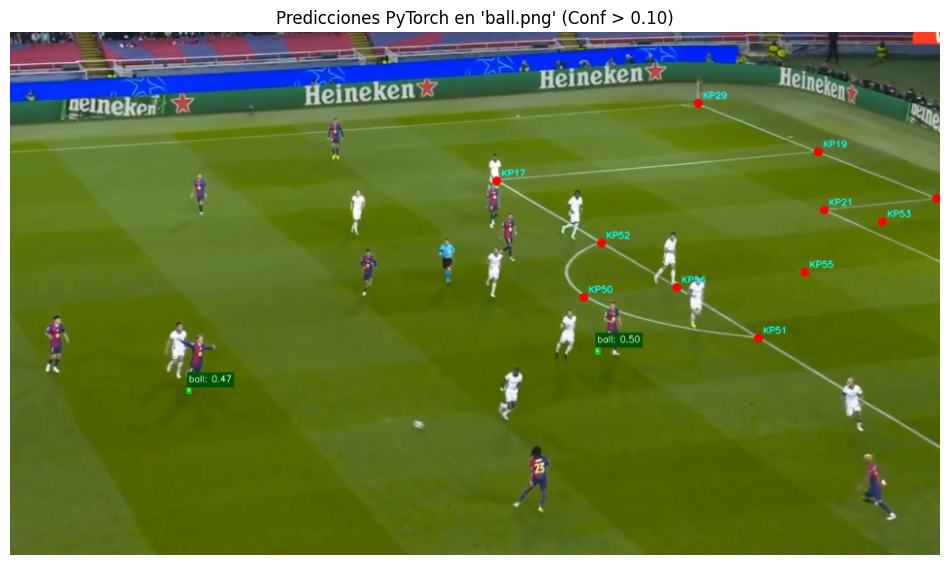


--- Celda de Inferencia PyTorch Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA DE INFERENCIA (Usando Modelo .pth de Google Drive - Corregida v5)
# --------------------------------------------------------------------
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Dict, Any, Optional, List, Tuple
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time

# Verificar si las definiciones de la celda anterior están disponibles
if 'HRNetHeatmapModel' not in globals() or 'MODEL_PARAMS_INFER' not in globals():
    print("ERROR: Las definiciones del modelo o la configuración no están cargadas.")
    print("Por favor, ejecuta la 'CELDA DEFINICIONES' primero en esta sesión del kernel.")
    raise NameError("Definiciones del modelo no encontradas.")

# --- 1. Definir Rutas de Google Drive (si no están ya) ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
        print(f"ERROR CRÍTICO: Directorio {GDRIVE_CHECKPOINT_DIR} no existe.")
        raise FileNotFoundError(f"Directorio de checkpoints en Drive no encontrado: {GDRIVE_CHECKPOINT_DIR}")
    print(f"GDRIVE_CHECKPOINT_DIR establecido a: {GDRIVE_CHECKPOINT_DIR}")

# --- 2. Cargar el Mejor Modelo Entrenado (.pth) ---
print("\n--- Cargando Mejor Modelo PyTorch Entrenado ---")
checkpoint_dir_infer = GDRIVE_CHECKPOINT_DIR
hrnet_variant_infer = MODEL_PARAMS_INFER.get('hrnet_variant', 'w18')

best_model_filename_infer = f"hrnet_{hrnet_variant_infer}_best_model_drive.pth"
model_path_to_load = os.path.join(checkpoint_dir_infer, best_model_filename_infer)

epoch_checkpoints_infer_list = []
if os.path.exists(checkpoint_dir_infer):
    epoch_checkpoints_infer_list = [f for f in os.listdir(checkpoint_dir_infer) if f.startswith(f"hrnet_{hrnet_variant_infer}_epoch_") and f.endswith(".pth")]

if epoch_checkpoints_infer_list:
    try:
        epoch_checkpoints_infer_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_infer, epoch_checkpoints_infer_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            model_path_to_load = latest_epoch_chkpt_path_candidate
            print(f"Se usará el último checkpoint de época para inferencia: {model_path_to_load}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_path_to_load}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_path_to_load}")

loaded_model_infer = None
if os.path.exists(model_path_to_load):
    device_infer = torch.device(TRAIN_PARAMS_INFER["device"])
    print(f"Cargando modelo PyTorch desde: {model_path_to_load} a {device_infer}")

    checkpoint = torch.load(model_path_to_load, map_location=device_infer)
    hrnet_variant_from_checkpoint = checkpoint.get('hrnet_variant', hrnet_variant_infer)
    print(f"Variante de HRNet del checkpoint: {hrnet_variant_from_checkpoint}")

    hrnet_config_to_use_infer = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint}"]

    loaded_model_infer = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use_infer,
        num_output_channels=MODEL_PARAMS_INFER["num_output_channels_head"]
    ).to(device_infer)

    loaded_model_infer.load_state_dict(checkpoint['model_state_dict'])
    loaded_model_infer.eval()
    print("Modelo PyTorch cargado y en modo evaluación.")
else:
    print(f"ERROR: Archivo de modelo .pth no encontrado en {model_path_to_load}.")

# --- 3. Función de Preprocesamiento ---
def get_inference_transforms_simple(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])
print("get_inference_transforms_simple definida.")


# --- 4. Cargar, Preprocesar Imagen Nueva, Inferir y Visualizar ---
if loaded_model_infer:
    image_to_predict_path = "/content/ball.png"
    print(f"\n--- Procesando imagen con PyTorch: {image_to_predict_path} ---")

    if not os.path.exists(image_to_predict_path):
        print(f"ERROR: La imagen {image_to_predict_path} no existe.")
    else:
        img_bgr = cv2.imread(image_to_predict_path)
        if img_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {image_to_predict_path}.")
        else:
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            display_img_pytorch = img_bgr.copy()

            input_h = DATA_PARAMS_INFER["image_input_height"]
            input_w = DATA_PARAMS_INFER["image_input_width"]

            inference_transforms = get_inference_transforms_simple(input_h, input_w)
            transformed = inference_transforms(image=img_rgb)
            img_tensor = transformed["image"].unsqueeze(0).to(device_infer)

            display_img_resized_pytorch = cv2.resize(display_img_pytorch, (input_w, input_h), interpolation=cv2.INTER_LINEAR)

            print("Realizando inferencia con PyTorch...")
            start_time_pytorch_frame = time.time()
            with torch.no_grad():
                pred_log_probs_list = loaded_model_infer(img_tensor)
                pred_log_probs = pred_log_probs_list[0]
            end_time_pytorch_frame = time.time()

            pred_probs = torch.exp(pred_log_probs)
            print(f"Tiempo de inferencia PyTorch (1 frame): {(end_time_pytorch_frame - start_time_pytorch_frame)*1000:.2f} ms")
            print(f"Forma de las probabilidades predichas (PyTorch): {pred_probs.shape}")

            hrnet_config_loaded_infer = MODEL_PARAMS_INFER.get(f"hrnet_config_{hrnet_variant_from_checkpoint}", MODEL_PARAMS_INFER["hrnet_config_w18"])
            hrnet_native_s = 4
            up_cfg_infer = hrnet_config_loaded_infer.get("upscale",1)
            final_s_infer = hrnet_native_s // up_cfg_infer

            CONF_THR_VIS = 0.1 # Puedes ajustar este umbral de confianza
            num_kps_drawn = 0

            for kp_idx in range(NUM_KEYPOINTS): # NUM_KEYPOINTS debe estar definido
                hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_infer);py_img=int(py_hmap*final_s_infer)

                    # Dibujar círculo
                    color = (0,0,255) # Rojo para predicciones
                    cv2.circle(display_img_resized_pytorch,(px_img,py_img),4,color,-1,cv2.LINE_AA)

                    # ----> AÑADIR NOMBRE/ID DEL KEYPOINT <----
                    kp_name = KEYPOINT_INDEX_TO_NAME.get(kp_idx, f"ID:{kp_idx}") # Usar nombre o ID si no hay nombre
                    text_pos = (px_img + 5, py_img - 5) # Posición del texto ligeramente desplazada
                    cv2.putText(display_img_resized_pytorch, kp_name, text_pos,
                                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 0), 1, cv2.LINE_AA) # Texto en cyan
                    num_kps_drawn+=1

            print(f"Se dibujaron {num_kps_drawn} keypoints con confianza > {CONF_THR_VIS} usando PyTorch.")

            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(display_img_resized_pytorch, cv2.COLOR_BGR2RGB))
            plt.title(f"Predicciones PyTorch en '{os.path.basename(image_to_predict_path)}' (Conf > {CONF_THR_VIS:.2f})")
            plt.axis('off')
            plt.show()
else:
    print("El modelo PyTorch no se cargó. No se puede realizar la inferencia.")

print("\n--- Celda de Inferencia PyTorch Finalizada ---")

In [ ]:
# --------------------------------------------------------------------
# CELDA DEFINICIONES: Clases del Modelo y Configuración Esencial (Corregida v7)
# --------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from typing import List, Tuple, Dict, Any
import importlib # Para recargar

# --- Definiciones del Modelo HRNet (Backbone y Cabeza) ---
# (El código de BasicBlock, Bottleneck, HighResolutionModule, HighResolutionNet, HRNetHeatmapModel
#  y las CONFIGS es el MISMO que en la "CELDA DEFINICIONES (Corregida v6)" que te funcionó para el SyntaxError)
#  Asegúrate de pegar aquí la versión COMPLETA y LEGIBLE de esas definiciones.
#  Solo voy a mostrar la parte de HighResolutionModule para enfocar la verificación.

BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__(); self.conv1=conv3x3(inplanes,planes,stride); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.conv2=conv3x3(planes,planes); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.downsample=downsample; self.stride=stride
    def forward(self, x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.bn2(self.conv2(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck,self).__init__(); self.conv1=nn.Conv2d(inplanes,planes,1,bias=False); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv2=nn.Conv2d(planes,planes,3,stride,1,bias=False); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv3=nn.Conv2d(planes,planes*self.expansion,1,bias=False); self.bn3=BatchNorm2d(planes*self.expansion,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.downsample=downsample; self.stride=stride
    def forward(self,x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.relu(self.bn2(self.conv2(o))); o=self.bn3(self.conv3(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class HighResolutionModule(nn.Module):
    # ESTA ES LA FIRMA QUE DEBE ESTAR ACTIVA:
    def __init__(self, num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input,
                 num_channels_list_config, multi_scale_output=True):
        super().__init__();self.num_inchannels_after_branches=list(num_inchannels_list_input);self.num_branches=num_branches;self.multi_scale_output=multi_scale_output;self.blocks_type_str=blocks_type_str;self.branches=self._make_branches(num_branches,num_blocks_list,num_channels_list_config);self.fuse_layers=self._make_fuse_layers();self.relu=nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls=self._get_block_type(); downsample=None; in_channels_this_branch=self.num_inchannels_after_branches[branch_index]
        if stride!=1 or in_channels_this_branch!=num_channels_for_branch_config*block_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(in_channels_this_branch,num_channels_for_branch_config*block_cls.expansion,1,stride,bias=False),BatchNorm2d(num_channels_for_branch_config*block_cls.expansion,momentum=BN_MOMENTUM))
        layers=[block_cls(in_channels_this_branch,num_channels_for_branch_config,stride,downsample)]; self.num_inchannels_after_branches[branch_index]=num_channels_for_branch_config*block_cls.expansion
        for _ in range(1,num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index],num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches==1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j): ocf=nocfb[i]if kd==i-j-1 else icf; relu_fuse=nn.ReLU(inplace=True)if kd!=i-j-1 else nn.Identity(); c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_fuse)); icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i])for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y=y+(F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False)if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos

class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.layer1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.transition1=self._mtl(psco,nic_s2_branches);self.stage2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.transition2=self._mtl(psco,nic_s3_branches);self.stage3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.transition3=self._mtl(psco,nic_s4_branches);self.stage4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,multi_scale_output=True)
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,multi_scale_output=True): # Nombre del argumento es multi_scale_output
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            actual_multi_scale_output_for_hr_module = multi_scale_output if i==nm-1 else True
            # ASEGÚRATE QUE ESTA LLAMADA SEA ASÍ:
            hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,multi_scale_output=actual_multi_scale_output_for_hr_module));
            cmic=hms[-1].get_num_inchannels()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.layer1(x)
        xls2i=[];[xls2i.append(self.transition1[i](x) if self.transition1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.stage2(xls2i)
        xls3i=[];[xls3i.append(self.transition2[i](yls2o[i if i<len(yls2o) else -1]) if self.transition2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.stage3(xls3i)
        xls4i=[];[xls4i.append(self.transition3[i](yls3o[i if i<len(yls3o) else -1]) if self.transition3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.stage4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
        if p and os.path.exists(p): print(f"Cargando pesos preentrenados backbone: {p}"); #self.load_state_dict(torch.load(p, map_location='cpu'), strict=False)

class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)

MODEL_PARAMS_INFER = {
    "hrnet_variant": "w18", "num_output_channels_head": 57 + 1,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
DATA_PARAMS_INFER = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
TRAIN_PARAMS_INFER = {"device": "cuda" if torch.cuda.is_available() else "cpu"}
KEYPOINT_INDEX_TO_NAME = {i: f"KP{i}" for i in range(DATA_PARAMS_INFER["num_keypoints"])}
NUM_KEYPOINTS = DATA_PARAMS_INFER["num_keypoints"]

print("Definiciones de modelo y configuración cargadas en la celda.")

# --- VERIFICACIÓN DE HighResolutionModule ---
print("\n--- Verificando argumentos de HighResolutionModule ---")
# Forzar recarga de HighResolutionModule si está en sys.modules
# (Aunque si está definida arriba, esta celda la usará)
# No es necesario si definimos todo en la misma celda.
# if 'HighResolutionModule' in globals():
#    print(f"Argumentos de HighResolutionModule.__init__: {HighResolutionModule.__init__.__code__.co_varnames}")
# else:
#    print("HighResolutionModule no está en globals() aún.")
# Esta verificación se hará implícitamente al instanciar HRNetHeatmapModel

Definiciones de modelo y configuración cargadas en la celda.

--- Verificando argumentos de HighResolutionModule ---



--- Cargando Mejor Modelo PyTorch Entrenado ---
Se usará el último checkpoint de época para inferencia: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth
Cargando modelo PyTorch desde: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth a cuda
Variante de HRNet del checkpoint: w18
Modelo PyTorch cargado y en modo evaluación.
get_inference_transforms_simple definida.

--- Procesando imagen con PyTorch: /content/ball.png ---
Realizando inferencia con PyTorch...
Tiempo de inferencia PyTorch (1 frame): 46.53 ms
Forma de las probabilidades predichas (PyTorch): torch.Size([1, 58, 270, 480])
Se dibujaron 11 keypoints con confianza > 0.1 usando PyTorch.


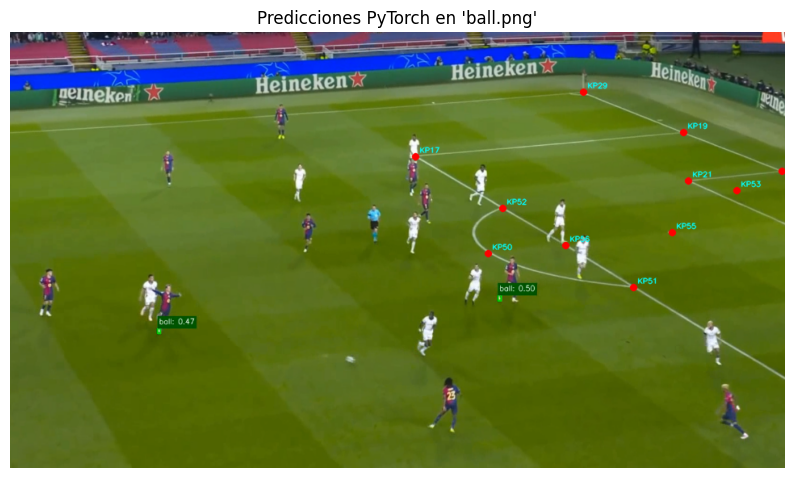


--- Celda de Inferencia PyTorch Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA DE INFERENCIA (Continuación de la Celda Definiciones - Corregida v6)
# --------------------------------------------------------------------
# (Esta parte es la misma que la Celda de Inferencia Simplificada anterior)
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import Dict, Any, Optional, List, Tuple
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time

# Verificar si las definiciones de la celda anterior están disponibles
if 'HRNetHeatmapModel' not in globals() or 'MODEL_PARAMS_INFER' not in globals():
    print("ERROR: Las definiciones del modelo o la configuración no están cargadas.")
    print("Por favor, ejecuta la 'CELDA DEFINICIONES' primero en esta sesión del kernel.")
    raise NameError("Definiciones del modelo no encontradas.")

# --- 1. Definir Rutas de Google Drive (si no están ya) ---
if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    if not os.path.exists(GDRIVE_CHECKPOINT_DIR):
        print(f"ERROR CRÍTICO: Directorio {GDRIVE_CHECKPOINT_DIR} no existe.")
        raise FileNotFoundError(f"Directorio de checkpoints en Drive no encontrado: {GDRIVE_CHECKPOINT_DIR}")
    print(f"GDRIVE_CHECKPOINT_DIR establecido a: {GDRIVE_CHECKPOINT_DIR}")

# --- 2. Cargar el Mejor Modelo Entrenado (.pth) ---
print("\n--- Cargando Mejor Modelo PyTorch Entrenado ---")
checkpoint_dir_infer = GDRIVE_CHECKPOINT_DIR
hrnet_variant_infer = MODEL_PARAMS_INFER.get('hrnet_variant', 'w18')

best_model_filename_infer = f"hrnet_{hrnet_variant_infer}_best_model_drive.pth"
model_path_to_load = os.path.join(checkpoint_dir_infer, best_model_filename_infer)

epoch_checkpoints_infer_list = []
if os.path.exists(checkpoint_dir_infer):
    epoch_checkpoints_infer_list = [f for f in os.listdir(checkpoint_dir_infer) if f.startswith(f"hrnet_{hrnet_variant_infer}_epoch_") and f.endswith(".pth")]

if epoch_checkpoints_infer_list:
    try:
        epoch_checkpoints_infer_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate = os.path.join(checkpoint_dir_infer, epoch_checkpoints_infer_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate):
            model_path_to_load = latest_epoch_chkpt_path_candidate
            print(f"Se usará el último checkpoint de época para inferencia: {model_path_to_load}")
    except ValueError:
        print(f"No se pudo parsear nombres de checkpoint de época, usando 'best_model' por defecto: {model_path_to_load}")
else:
    print(f"No se encontraron checkpoints de época, usando 'best_model' por defecto: {model_path_to_load}")

loaded_model_infer = None
if os.path.exists(model_path_to_load):
    device_infer = torch.device(TRAIN_PARAMS_INFER["device"])
    print(f"Cargando modelo PyTorch desde: {model_path_to_load} a {device_infer}")

    checkpoint = torch.load(model_path_to_load, map_location=device_infer)
    hrnet_variant_from_checkpoint = checkpoint.get('hrnet_variant', hrnet_variant_infer)
    print(f"Variante de HRNet del checkpoint: {hrnet_variant_from_checkpoint}")

    hrnet_config_to_use_infer = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint}"]

    loaded_model_infer = HRNetHeatmapModel(
        hrnet_yaml_config=hrnet_config_to_use_infer,
        num_output_channels=MODEL_PARAMS_INFER["num_output_channels_head"]
    ).to(device_infer)

    loaded_model_infer.load_state_dict(checkpoint['model_state_dict'])
    loaded_model_infer.eval()
    print("Modelo PyTorch cargado y en modo evaluación.")
else:
    print(f"ERROR: Archivo de modelo .pth no encontrado en {model_path_to_load}.")

# --- 3. Función de Preprocesamiento ---
def get_inference_transforms_simple(img_height, img_width) -> A.Compose:
    return A.Compose([
        A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])
print("get_inference_transforms_simple definida.")


# --- 4. Cargar, Preprocesar Imagen Nueva, Inferir y Visualizar ---
if loaded_model_infer:
    image_to_predict_path = "/content/ball.png"
    print(f"\n--- Procesando imagen con PyTorch: {image_to_predict_path} ---")

    if not os.path.exists(image_to_predict_path):
        print(f"ERROR: La imagen {image_to_predict_path} no existe.")
    else:
        img_bgr = cv2.imread(image_to_predict_path)
        if img_bgr is None:
            print(f"ERROR: No se pudo cargar la imagen {image_to_predict_path}.")
        else:
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            display_img_pytorch = img_bgr.copy()

            input_h = DATA_PARAMS_INFER["image_input_height"]
            input_w = DATA_PARAMS_INFER["image_input_width"]

            inference_transforms = get_inference_transforms_simple(input_h, input_w)
            transformed = inference_transforms(image=img_rgb)
            img_tensor = transformed["image"].unsqueeze(0).to(device_infer)

            display_img_resized_pytorch = cv2.resize(display_img_pytorch, (input_w, input_h), interpolation=cv2.INTER_LINEAR)

            print("Realizando inferencia con PyTorch...")
            start_time_pytorch_frame = time.time()
            with torch.no_grad():
                pred_log_probs_list = loaded_model_infer(img_tensor)
                pred_log_probs = pred_log_probs_list[0]
            end_time_pytorch_frame = time.time()

            pred_probs = torch.exp(pred_log_probs)
            print(f"Tiempo de inferencia PyTorch (1 frame): {(end_time_pytorch_frame - start_time_pytorch_frame)*1000:.2f} ms")
            print(f"Forma de las probabilidades predichas (PyTorch): {pred_probs.shape}")

            hrnet_config_loaded_infer = MODEL_PARAMS_INFER.get(f"hrnet_config_{hrnet_variant_from_checkpoint}", MODEL_PARAMS_INFER["hrnet_config_w18"])
            hrnet_native_s = 4
            up_cfg_infer = hrnet_config_loaded_infer.get("upscale",1)
            final_s_infer = hrnet_native_s // up_cfg_infer

            CONF_THR_VIS = 0.1
            num_kps_drawn = 0

            for kp_idx in range(NUM_KEYPOINTS):
                hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                if max_v.item()>CONF_THR_VIS:
                    py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                    px_img=int(px_hmap*final_s_infer);py_img=int(py_hmap*final_s_infer)
                    color = (0,0,255)
                    cv2.circle(display_img_resized_pytorch,(px_img,py_img),4,color,-1,cv2.LINE_AA)
                    kp_name = KEYPOINT_INDEX_TO_NAME.get(kp_idx, f"ID:{kp_idx}")
                    text_pos = (px_img + 5, py_img - 5)
                    cv2.putText(display_img_resized_pytorch, kp_name, text_pos,
                                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 0), 1, cv2.LINE_AA)
                    num_kps_drawn+=1

            print(f"Se dibujaron {num_kps_drawn} keypoints con confianza > {CONF_THR_VIS} usando PyTorch.")

            plt.figure(figsize=(10,7)); plt.imshow(cv2.cvtColor(display_img_resized_pytorch,cv2.COLOR_BGR2RGB)); plt.title(f"Predicciones PyTorch en '{os.path.basename(image_to_predict_path)}'"); plt.axis('off'); plt.show()
else:
    print("El modelo PyTorch no se cargó. No se puede realizar la inferencia.")

print("\n--- Celda de Inferencia PyTorch Finalizada ---")

In [ ]:
# --------------------------------------------------------------------
# CELDA FINAL: Procesamiento de Video Completo con Modelo Cargado
# --------------------------------------------------------------------
import os
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt # Para mostrar la imagen final si es necesario (no para video)
from typing import List, Tuple, Dict, Any, Optional
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time
from tqdm import tqdm
from google.colab import drive

# --- 0. Montar Google Drive ---
try:
    if not os.path.exists("/content/drive/MyDrive"):
        print("Montando Google Drive...")
        drive.mount('/content/drive', force_remount=True)
    else:
        print("Google Drive ya parece estar montado.")
    GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    GDRIVE_OUTPUT_VIDEO_DIR = os.path.join(GDRIVE_PROJECT_PATH, "video_outputs")
    os.makedirs(GDRIVE_CHECKPOINT_DIR, exist_ok=True) # Asegurar que existen
    os.makedirs(GDRIVE_OUTPUT_VIDEO_DIR, exist_ok=True)
    print(f"Directorio de checkpoints en Drive: {GDRIVE_CHECKPOINT_DIR}")
    print(f"Directorio de salida de videos en Drive: {GDRIVE_OUTPUT_VIDEO_DIR}")
except Exception as e_drive:
    print(f"Error montando Google Drive: {e_drive}"); raise

# --- 1. Definiciones del Modelo HRNet (Backbone y Cabeza) ---
# (Este es el contenido validado de la CELDA DEFINICIONES (Corregida v6))
BN_MOMENTUM = 0.1; BatchNorm2d = nn.BatchNorm2d; relu_inplace = True
def conv3x3(i,o,s=1): return nn.Conv2d(i,o,kernel_size=3,stride=s,padding=1,bias=False)
class BasicBlock(nn.Module):
    expansion=1
    def __init__(self,i,p,s=1,d=None): super().__init__(); self.conv1=conv3x3(i,p,s); self.bn1=BatchNorm2d(p,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.conv2=conv3x3(p,p); self.bn2=BatchNorm2d(p,momentum=BN_MOMENTUM); self.downsample=d; self.stride=s
    def forward(self,x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.bn2(self.conv2(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)
class Bottleneck(nn.Module):
    expansion=4
    def __init__(self,i,p,s=1,d=None): super().__init__(); self.conv1=nn.Conv2d(i,p,1,bias=False); self.bn1=BatchNorm2d(p,momentum=BN_MOMENTUM); self.conv2=nn.Conv2d(p,p,3,s,1,bias=False); self.bn2=BatchNorm2d(p,momentum=BN_MOMENTUM); self.conv3=nn.Conv2d(p,p*self.expansion,1,bias=False); self.bn3=BatchNorm2d(p*self.expansion,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.downsample=d; self.stride=s
    def forward(self,x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.relu(self.bn2(self.conv2(o))); o=self.bn3(self.conv3(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)
class HighResolutionModule(nn.Module):
    def __init__(self,num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input, num_channels_list_config, multi_scale_output=True):
        super().__init__();self.num_inchannels_after_branches=list(num_inchannels_list_input);self.num_branches=num_branches;self.multi_scale_output=multi_scale_output;self.blocks_type_str=blocks_type_str;self.branches=self._make_branches(num_branches,num_blocks_list,num_channels_list_config);self.fuse_layers=self._make_fuse_layers();self.relu=nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls=self._get_block_type(); downsample=None; in_channels_this_branch=self.num_inchannels_after_branches[branch_index]
        if stride!=1 or in_channels_this_branch!=num_channels_for_branch_config*block_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(in_channels_this_branch,num_channels_for_branch_config*block_cls.expansion,1,stride,bias=False),BatchNorm2d(num_channels_for_branch_config*block_cls.expansion,momentum=BN_MOMENTUM))
        layers=[block_cls(in_channels_this_branch,num_channels_for_branch_config,stride,downsample)]; self.num_inchannels_after_branches[branch_index]=num_channels_for_branch_config*block_cls.expansion
        for _ in range(1,num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index],num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches==1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j): ocf=nocfb[i]if kd==i-j-1 else icf; relu_fuse=nn.ReLU(inplace=True)if kd!=i-j-1 else nn.Identity(); c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_fuse)); icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i])for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y=y+(F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False)if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos
class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.layer1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.transition1=self._mtl(psco,nic_s2_branches);self.stage2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.transition2=self._mtl(psco,nic_s3_branches);self.stage3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.transition3=self._mtl(psco,nic_s4_branches);self.stage4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,multi_scale_output=True)
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,multi_scale_output=True):
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            actual_multi_scale_output_for_hr_module = multi_scale_output if i==nm-1 else True
            hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,multi_scale_output=actual_multi_scale_output_for_hr_module));
            cmic=hms[-1].get_num_inchannels()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.layer1(x)
        xls2i=[];[xls2i.append(self.transition1[i](x) if self.transition1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.stage2(xls2i)
        xls3i=[];[xls3i.append(self.transition2[i](yls2o[i if i<len(yls2o) else -1]) if self.transition2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.stage3(xls3i)
        xls4i=[];[xls4i.append(self.transition3[i](yls3o[i if i<len(yls3o) else -1]) if self.transition3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.stage4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
        if p and os.path.exists(p): print(f"Cargando pesos preentrenados backbone: {p}"); #self.load_state_dict(torch.load(p, map_location='cpu'), strict=False)

class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)

# --- 2. Configuración Esencial (Embebida) ---
MODEL_PARAMS_INFER = {
    "hrnet_variant": "w18", "num_output_channels_head": 57 + 1,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
DATA_PARAMS_INFER = {"image_input_width": 960, "image_input_height": 540, "num_keypoints": 57}
TRAIN_PARAMS_INFER = {"device": "cuda" if torch.cuda.is_available() else "cpu"} # Necesario para el device
KEYPOINT_INDEX_TO_NAME = {0:'L_GOAL_TL_POST',1:'L_GOAL_TR_POST',2:'L_GOAL_BL_POST',3:'L_GOAL_BR_POST',4:'L_GOAL_AREA_BR_CORNER',5:'L_GOAL_AREA_TR_CORNER',6:'L_GOAL_AREA_BL_CORNER',7:'L_GOAL_AREA_TL_CORNER',8:'L_PENALTY_AREA_BR_CORNER',9:'L_PENALTY_AREA_TR_CORNER',10:'L_PENALTY_AREA_BL_CORNER',11:'L_PENALTY_AREA_TL_CORNER',12:'BL_PITCH_CORNER',13:'TL_PITCH_CORNER',14:'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION',15:'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION',16:'R_PENALTY_AREA_BL_CORNER',17:'R_PENALTY_AREA_TL_CORNER',18:'R_PENALTY_AREA_BR_CORNER',19:'R_PENALTY_AREA_TR_CORNER',20:'R_GOAL_AREA_BL_CORNER',21:'R_GOAL_AREA_TL_CORNER',22:'R_GOAL_AREA_BR_CORNER',23:'R_GOAL_AREA_TR_CORNER',24:'R_GOAL_TR_POST',25:'R_GOAL_TL_POST',26:'R_GOAL_BL_POST',27:'R_GOAL_BR_POST',28:'BR_PITCH_CORNER',29:'TR_PITCH_CORNER',30:'CENTER_CIRCLE_TANGENT_TR',31:'CENTER_CIRCLE_TANGENT_TL',32:'CENTER_CIRCLE_TANGENT_BR',33:'CENTER_CIRCLE_TANGENT_BL',34:'CENTER_CIRCLE_TR',35:'CENTER_CIRCLE_TL',36:'CENTER_CIRCLE_BR',37:'CENTER_CIRCLE_BL',38:'CENTER_CIRCLE_R',39:'CENTER_CIRCLE_L',40:'T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',41:'B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',42:'CENTER_MARK',43:'LEFT_CIRCLE_R',44:'BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',45:'TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',46:'LEFT_CIRCLE_TANGENT_T',47:'LEFT_CIRCLE_TANGENT_B',48:'L_PENALTY_MARK',49:'L_MIDDLE_PENALTY',50:'RIGHT_CIRCLE_L',51:'BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',52:'TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',53:'RIGHT_CIRCLE_TANGENT_T',54:'RIGHT_CIRCLE_TANGENT_B',55:'R_PENALTY_MARK',56:'R_MIDDLE_PENALTY'}
NUM_KEYPOINTS = DATA_PARAMS_INFER["num_keypoints"]
print("Definiciones de modelo y configuración cargadas en la celda.")

# --- Inicio de la Lógica de Procesamiento de Video ---
print("\n--- Cargando Modelo PyTorch Entrenado para Video ---")
checkpoint_dir_video = GDRIVE_CHECKPOINT_DIR
hrnet_variant_video = MODEL_PARAMS_INFER.get('hrnet_variant', 'w18')
best_model_filename_video = f"hrnet_{hrnet_variant_video}_best_model_drive.pth"
model_path_to_load_video = os.path.join(checkpoint_dir_video, best_model_filename_video)
epoch_checkpoints_video_list = []
if os.path.exists(checkpoint_dir_video):
    epoch_checkpoints_video_list = [f for f in os.listdir(checkpoint_dir_video) if f.startswith(f"hrnet_{hrnet_variant_video}_epoch_") and f.endswith(".pth")]
if epoch_checkpoints_video_list:
    try:
        epoch_checkpoints_video_list.sort(key=lambda f_name: int(f_name.split('_epoch_')[-1].split('.pth')[0]))
        latest_epoch_chkpt_path_candidate_video = os.path.join(checkpoint_dir_video, epoch_checkpoints_video_list[-1])
        if os.path.exists(latest_epoch_chkpt_path_candidate_video): model_path_to_load_video = latest_epoch_chkpt_path_candidate_video
    except ValueError: pass
print(f"Intentando cargar modelo para video desde: {model_path_to_load_video}")

loaded_model_video = None
if os.path.exists(model_path_to_load_video):
    device_video = torch.device(TRAIN_PARAMS_INFER["device"])
    checkpoint_video = torch.load(model_path_to_load_video, map_location=device_video)
    hrnet_variant_from_checkpoint_video = checkpoint_video.get('hrnet_variant', hrnet_variant_video)
    print(f"Variante de HRNet del checkpoint (video): {hrnet_variant_from_checkpoint_video}")
    hrnet_config_to_use_video = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint_video}"]
    loaded_model_video = HRNetHeatmapModel(hrnet_yaml_config=hrnet_config_to_use_video, num_output_channels=MODEL_PARAMS_INFER["num_output_channels_head"]).to(device_video)
    loaded_model_video.load_state_dict(checkpoint_video['model_state_dict'])
    loaded_model_video.eval()
    print("Modelo PyTorch para video cargado y en modo evaluación.")
else: print(f"ERROR: Archivo de modelo .pth no encontrado en {model_path_to_load_video}.")

def get_inference_transforms_simple(img_height, img_width) -> A.Compose: # Definición local para la celda
    return A.Compose([ A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR), A.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]), ToTensorV2(),])

if loaded_model_video:
    video_input_path_main = "/content/GolYamal.mp4"
    video_output_filename_main = f"GolYamal_processed_{hrnet_variant_from_checkpoint_video}_epoch{checkpoint_video.get('epoch','NA')}.mp4"
    video_output_path_main = os.path.join(GDRIVE_OUTPUT_VIDEO_DIR, video_output_filename_main)
    if not os.path.exists(video_input_path_main): print(f"ERROR: Video {video_input_path_main} no existe.")
    else:
        cap = cv2.VideoCapture(video_input_path_main)
        if not cap.isOpened(): print(f"ERROR: No se pudo abrir video {video_input_path_main}")
        else:
            fw=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)); fh=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)); original_fps=cap.get(cv2.CAP_PROP_FPS); total_frames=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            print(f"Video entrada: {video_input_path_main} ({fw}x{fh} @{original_fps:.2f} FPS, {total_frames} frames)")
            out_w=DATA_PARAMS_INFER["image_input_width"]; out_h=DATA_PARAMS_INFER["image_input_height"]
            out_video=cv2.VideoWriter(video_output_path_main,cv2.VideoWriter_fourcc(*'mp4v'),original_fps,(out_w,out_h))
            print(f"Video salida: {video_output_path_main} ({out_w}x{out_h})")
            frame_transforms_vid = get_inference_transforms_simple(out_h, out_w)
            print("\n--- Procesando Video ---"); total_inf_time=0; proc_frames_count=0

            # Config para stride de salida
            hrnet_cfg_loaded_vid = MODEL_PARAMS_INFER[f"hrnet_config_{hrnet_variant_from_checkpoint_video}"]
            hr_native_s=4; up_cfg_vid=hrnet_cfg_loaded_vid.get("upscale",1); final_s_vid=hr_native_s//up_cfg_vid
            CONF_THR_VIS_VID=0.1

            for _ in tqdm(range(total_frames), desc="Procesando video frames"):
                ret, frame_bgr = cap.read()
                if not ret: break
                frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
                display_frame_bgr = cv2.resize(frame_bgr, (out_w, out_h), interpolation=cv2.INTER_LINEAR)
                transformed = frame_transforms_vid(image=frame_rgb)
                img_tensor = transformed["image"].unsqueeze(0).to(device_video)

                start_time_f=time.time()
                with torch.no_grad(): pred_log_probs_list=loaded_model_video(img_tensor); pred_log_probs=pred_log_probs_list[0]
                total_inf_time+=(time.time()-start_time_f); proc_frames_count+=1
                pred_probs=torch.exp(pred_log_probs)

                for kp_idx in range(NUM_KEYPOINTS):
                    hmap_kp=pred_probs[0,kp_idx,:,:];max_v,max_idx_f=torch.max(hmap_kp.contiguous().view(-1),dim=0)
                    if max_v.item()>CONF_THR_VIS_VID:
                        py_hmap=(max_idx_f//hmap_kp.shape[1]).item();px_hmap=(max_idx_f%hmap_kp.shape[1]).item()
                        px_img=int(px_hmap*final_s_vid);py_img=int(py_hmap*final_s_vid)
                        cv2.circle(display_frame_bgr,(px_img,py_img),3,(0,0,255),-1,cv2.LINE_AA)
                        kp_name_disp=KEYPOINT_INDEX_TO_NAME.get(kp_idx,str(kp_idx))
                        cv2.putText(display_frame_bgr,f"{kp_idx}",(px_img+4,py_img-4),cv2.FONT_HERSHEY_SIMPLEX,0.3,(255,255,0),1,cv2.LINE_AA)
                out_video.write(display_frame_bgr)
            cap.release();out_video.release();print("\n--- Procesamiento de Video Finalizado ---")
            print(f"Video procesado guardado en: {video_output_path_main}")
            if proc_frames_count>0:avg_inf_time=total_inf_time/proc_frames_count;fps_inf=1/avg_inf_time;print(f"Frames: {proc_frames_count}, Tiempo total inf: {total_inf_time:.2f}s, Promedio/frame: {avg_inf_time*1000:.2f} ms, FPS (solo modelo): {fps_inf:.2f}")
else: print("Modelo PyTorch no se cargó. No se puede procesar video.")
print("\n--- Celda de Procesamiento de Video Finalizada ---")

Google Drive ya parece estar montado.
Directorio de checkpoints en Drive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints
Directorio de salida de videos en Drive: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/video_outputs
Definiciones de modelo y configuración cargadas en la celda.

--- Cargando Modelo PyTorch Entrenado para Video ---
Intentando cargar modelo para video desde: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/model_checkpoints/hrnet_w18_epoch_30.pth
Variante de HRNet del checkpoint (video): w18
Modelo PyTorch para video cargado y en modo evaluación.
Video entrada: /content/GolYamal.mp4 (1920x1080 @30.00 FPS, 745 frames)
Video salida: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/video_outputs/GolYamal_processed_w18_epoch30.mp4 (960x540)

--- Procesando Video ---


Procesando video frames: 100%|██████████| 745/745 [00:54<00:00, 13.69it/s]


--- Procesamiento de Video Finalizado ---
Video procesado guardado en: /content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints/video_outputs/GolYamal_processed_w18_epoch30.mp4
Frames: 745, Tiempo total inf: 33.49s, Promedio/frame: 44.95 ms, FPS (solo modelo): 22.25

--- Celda de Procesamiento de Video Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA A: Crear el Archivo Python Único 'futbol_predictor.py'
# --------------------------------------------------------------------
import os

# Directorio temporal para preparar los archivos para Hugging Face
# (Asumimos que BASE_PROJECT_DIR está definido desde celdas anteriores o lo definimos aquí)
if 'BASE_PROJECT_DIR' not in globals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
os.makedirs(BASE_PROJECT_DIR, exist_ok=True)

HF_UPLOAD_DIR_FINAL = os.path.join(BASE_PROJECT_DIR, "hf_upload_final")
os.makedirs(HF_UPLOAD_DIR_FINAL, exist_ok=True)
print(f"Directorio de preparación para subida a HF: {HF_UPLOAD_DIR_FINAL}")

# --- Contenido para futbol_predictor.py ---
futbol_predictor_content = """
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from typing import List, Tuple, Dict, Any, Optional
import os # Para os.path.exists

# --- 1. Definiciones del Modelo HRNet (Backbone y Cabeza) ---
# (Este es el código del modelo que ya validamos y funcionó)
BN_MOMENTUM = 0.1
BatchNorm2d = nn.BatchNorm2d
relu_inplace = True

def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__(); self.conv1=conv3x3(inplanes,planes,stride); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.conv2=conv3x3(planes,planes); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.downsample=downsample; self.stride=stride
    def forward(self, x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.bn2(self.conv2(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck,self).__init__(); self.conv1=nn.Conv2d(inplanes,planes,1,bias=False); self.bn1=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv2=nn.Conv2d(planes,planes,3,stride,1,bias=False); self.bn2=BatchNorm2d(planes,momentum=BN_MOMENTUM); self.conv3=nn.Conv2d(planes,planes*self.expansion,1,bias=False); self.bn3=BatchNorm2d(planes*self.expansion,momentum=BN_MOMENTUM); self.relu=nn.ReLU(inplace=relu_inplace); self.downsample=downsample; self.stride=stride
    def forward(self,x): r=x; o=self.relu(self.bn1(self.conv1(x))); o=self.relu(self.bn2(self.conv2(o))); o=self.bn3(self.conv3(o)); o=o+(self.downsample(r) if self.downsample else r); return self.relu(o)

class HighResolutionModule(nn.Module):
    def __init__(self,num_branches, blocks_type_str, num_blocks_list, num_inchannels_list_input, num_channels_list_config, multi_scale_output=True):
        super().__init__();self.num_inchannels_after_branches=list(num_inchannels_list_input);self.num_branches=num_branches;self.multi_scale_output=multi_scale_output;self.blocks_type_str=blocks_type_str;self.branches=self._make_branches(num_branches,num_blocks_list,num_channels_list_config);self.fuse_layers=self._make_fuse_layers();self.relu=nn.ReLU(inplace=relu_inplace)
    def _get_block_type(self): return BasicBlock if self.blocks_type_str == 'BASIC' else Bottleneck
    def _make_one_branch(self, branch_index, num_blocks_for_branch, num_channels_for_branch_config, stride=1):
        block_cls=self._get_block_type(); downsample=None; in_channels_this_branch=self.num_inchannels_after_branches[branch_index]
        if stride!=1 or in_channels_this_branch!=num_channels_for_branch_config*block_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(in_channels_this_branch,num_channels_for_branch_config*block_cls.expansion,1,stride,bias=False),BatchNorm2d(num_channels_for_branch_config*block_cls.expansion,momentum=BN_MOMENTUM))
        layers=[block_cls(in_channels_this_branch,num_channels_for_branch_config,stride,downsample)]; self.num_inchannels_after_branches[branch_index]=num_channels_for_branch_config*block_cls.expansion
        for _ in range(1,num_blocks_for_branch): layers.append(block_cls(self.num_inchannels_after_branches[branch_index],num_channels_for_branch_config))
        return nn.Sequential(*layers)
    def _make_branches(self,nb,nbl,nclc): brs=[];[brs.append(self._make_one_branch(i,nbl[i],nclc[i])) for i in range(nb)]; return nn.ModuleList(brs)
    def _make_fuse_layers(self):
        if self.num_branches==1: return None
        fls=[]; nocfb=self.num_inchannels_after_branches
        for i in range(self.num_branches if self.multi_scale_output else 1):
            flfoi=[];
            for j in range(self.num_branches):
                if j>i: flfoi.append(nn.Sequential(nn.Conv2d(nocfb[j],nocfb[i],1,1,0,bias=False),BatchNorm2d(nocfb[i],momentum=BN_MOMENTUM)))
                elif j==i: flfoi.append(None)
                else:
                    c3s=[]; icf=nocfb[j]
                    for kd in range(i-j): ocf=nocfb[i]if kd==i-j-1 else icf; relu_fuse=nn.ReLU(inplace=True)if kd!=i-j-1 else nn.Identity(); c3s.append(nn.Sequential(nn.Conv2d(icf,ocf,3,2,1,bias=False),BatchNorm2d(ocf,momentum=BN_MOMENTUM),relu_fuse)); icf=ocf
                    flfoi.append(nn.Sequential(*c3s))
            fls.append(nn.ModuleList(flfoi))
        return nn.ModuleList(fls)
    def get_num_inchannels(self): return self.num_inchannels_after_branches
    def forward(self,x:List[torch.Tensor])->List[torch.Tensor]:
        if self.num_branches==1: return[self.branches[0](x[0])]
        xbos=[self.branches[i](x[i])for i in range(self.num_branches)]; xfos=[]
        for i in range(len(self.fuse_layers)):
            y=xbos[i]
            for j in range(self.num_branches):
                if i==j: continue
                y=y+(F.interpolate(self.fuse_layers[i][j](xbos[j]),size=[xbos[i].shape[2],xbos[i].shape[3]],mode='bilinear',align_corners=False)if j>i else self.fuse_layers[i][j](xbos[j]))
            xfos.append(self.relu(y))
        return xfos

class HighResolutionNet(nn.Module):
    def __init__(self,hrnet_cfg:Dict[str,Any]):
        super().__init__();self.cfg=hrnet_cfg;self.conv1=nn.Conv2d(3,self.cfg['stem_width'],3,2,1,bias=False);self.bn1=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.conv2=nn.Conv2d(self.cfg['stem_width'],self.cfg['stem_width'],3,2,1,bias=False);self.bn2=BatchNorm2d(self.cfg['stem_width'],momentum=BN_MOMENTUM);self.relu=nn.ReLU(inplace=relu_inplace)
        s1c=self.cfg['stage1'];ncs1c_cfg=s1c['num_channels'][0];bs1t_cls=BasicBlock if s1c['block_type']=='BASIC' else Bottleneck;nbs1=s1c['num_blocks'][0];self.layer1=self._ml(bs1t_cls,self.cfg['stem_width'],ncs1c_cfg,nbs1);psco=[bs1t_cls.expansion*ncs1c_cfg]
        s2c=self.cfg['stage2'];ncs2c_cfg=s2c['num_channels'];bs2t_cls=BasicBlock if s2c['block_type']=='BASIC' else Bottleneck;nic_s2_branches=[c*bs2t_cls.expansion for c in ncs2c_cfg];self.transition1=self._mtl(psco,nic_s2_branches);self.stage2,psco=self._ms(s2c,nic_s2_branches,bs2t_cls)
        s3c=self.cfg['stage3'];ncs3c_cfg=s3c['num_channels'];bs3t_cls=BasicBlock if s3c['block_type']=='BASIC' else Bottleneck;nic_s3_branches=[c*bs3t_cls.expansion for c in ncs3c_cfg];self.transition2=self._mtl(psco,nic_s3_branches);self.stage3,psco=self._ms(s3c,nic_s3_branches,bs3t_cls)
        s4c=self.cfg['stage4'];ncs4c_cfg=s4c['num_channels'];bs4t_cls=BasicBlock if s4c['block_type']=='BASIC' else Bottleneck;nic_s4_branches=[c*bs4t_cls.expansion for c in ncs4c_cfg];self.transition3=self._mtl(psco,nic_s4_branches);self.stage4,self.psfs=self._ms(s4c,nic_s4_branches,bs4t_cls,multi_scale_output=True)
        self.uf=self.cfg.get('upscale',1);self.swfc=self.cfg['stem_width'];self.lic=int(np.sum(self.psfs));
        if self.uf>1: self.lic+=self.swfc
    def _ml(self,bt_cls,ip,pc_cfg,nbil,s=1):
        downsample=None
        if s!=1 or ip!=pc_cfg*bt_cls.expansion:
            downsample=nn.Sequential(nn.Conv2d(ip,pc_cfg*bt_cls.expansion,1,s,bias=False),BatchNorm2d(pc_cfg*bt_cls.expansion,momentum=BN_MOMENTUM))
        ls=[bt_cls(ip,pc_cfg,s,downsample)];inpb=pc_cfg*bt_cls.expansion;[ls.append(bt_cls(inpb,pc_cfg)) for _ in range(1,nbil)];return nn.Sequential(*ls)
    def _mtl(self,noc_pre_stage,nic_cur_stage_b):
        nbc,nbp=len(nic_cur_stage_b),len(noc_pre_stage);tls=[]
        for i in range(nbc):
            if i<nbp:tls.append(nn.Sequential(nn.Conv2d(noc_pre_stage[i],nic_cur_stage_b[i],3,1,1,bias=False),BatchNorm2d(nic_cur_stage_b[i],momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)) if nic_cur_stage_b[i]!=noc_pre_stage[i] else None)
            else:
                cbs=[]; icisb=noc_pre_stage[-1]; num_ds = i-(nbp-1)
                for _jd in range(num_ds):
                    toc=nic_cur_stage_b[i] if _jd==num_ds-1 else icisb
                    cbs.append(nn.Sequential(nn.Conv2d(icisb,toc,3,2,1,bias=False),BatchNorm2d(toc,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace)));icisb=toc
                tls.append(nn.Sequential(*cbs))
        return nn.ModuleList(tls)
    def _ms(self,lcd,nic_for_modules,block_type_class,multi_scale_output=True):
        nm,nb=lcd['num_modules'],lcd['num_branches'];nbl=lcd['num_blocks'];nclc_cfg=lcd['num_channels'];bts_str=lcd['block_type']
        hms=[];cmic=list(nic_for_modules)
        for i in range(nm):
            actual_multi_scale_output_for_hr_module = multi_scale_output if i==nm-1 else True
            hms.append(HighResolutionModule(nb,bts_str,nbl,list(cmic),nclc_cfg,multi_scale_output=actual_multi_scale_output_for_hr_module));
            cmic=hms[-1].get_num_inchannels()
        return nn.Sequential(*hms),cmic
    def forward(self,x:torch.Tensor)->Tuple[List[torch.Tensor],torch.Tensor]:
        x_s0 = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x_s0)))
        x = self.layer1(x)
        xls2i=[];[xls2i.append(self.transition1[i](x) if self.transition1[i] else x) for i in range(self.cfg['stage2']['num_branches'])]
        yls2o=self.stage2(xls2i)
        xls3i=[];[xls3i.append(self.transition2[i](yls2o[i if i<len(yls2o) else -1]) if self.transition2[i] else (yls2o[i if i<len(yls2o) else -1])) for i in range(self.cfg['stage3']['num_branches'])]
        yls3o=self.stage3(xls3i)
        xls4i=[];[xls4i.append(self.transition3[i](yls3o[i if i<len(yls3o) else -1]) if self.transition3[i] else (yls3o[i if i<len(yls3o) else -1])) for i in range(self.cfg['stage4']['num_branches'])]
        xs4bo=self.stage4(xls4i)
        th=int(xs4bo[0].size(2)*self.uf);tw=int(xs4bo[0].size(3)*self.uf);ffl=[]
        if self.uf>1 :ffl.append(F.interpolate(x_s0,size=(th,tw),mode='bilinear',align_corners=False))
        for xb in xs4bo: ffl.append(F.interpolate(xb,size=(th,tw),mode='bilinear',align_corners=False) if (xb.size(2)!=th or xb.size(3)!=tw) else xb)
        return xs4bo,torch.cat(ffl,1)
    def init_weights(self,p=''): # p es pretrained_path
        for m in self.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu')
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)
        if p and os.path.exists(p): print(f"Cargando pesos preentrenados backbone: {p}"); #self.load_state_dict(torch.load(p, map_location='cpu'), strict=False)

class HRNetHeatmapModel(nn.Module):
    def __init__(self,hrnet_yaml_config:Dict[str,Any],num_output_channels:int):
        super().__init__();self.backbone=HighResolutionNet(hrnet_yaml_config)
        ic=hrnet_yaml_config.get('internal_final_conv',0);fk=hrnet_yaml_config.get('final_conv_kernel',1)
        lic_from_backbone = self.backbone.lic
        if ic==0:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,lic_from_backbone,1,1,0),BatchNorm2d(lic_from_backbone,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(lic_from_backbone,num_output_channels,fk,1,1 if fk==3 else 0))
        else:self.prediction_head=nn.Sequential(nn.Conv2d(lic_from_backbone,ic,1,1,0),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,ic,3,1,1),BatchNorm2d(ic,momentum=BN_MOMENTUM),nn.ReLU(inplace=relu_inplace),nn.Conv2d(ic,num_output_channels,fk,1,1 if fk==3 else 0))
        self.log_softmax=nn.LogSoftmax(dim=1)
    def forward(self,x:torch.Tensor)->List[torch.Tensor]: _,ff=self.backbone(x);h=self.prediction_head(ff);return[self.log_softmax(h)]
    def init_weights(self,p=''):
        self.backbone.init_weights(p)
        for m in self.prediction_head.modules():
            if isinstance(m,nn.Conv2d):nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu'); nn.init.constant_(m.bias,0) if m.bias is not None else None
            elif isinstance(m,BatchNorm2d):nn.init.constant_(m.weight,1);nn.init.constant_(m.bias,0)

# --- 2. Configuración Esencial (Embebida en este archivo) ---
MODEL_CONFIG = {
    "hrnet_variant": "w18",
    "num_output_channels_head": 57 + 1,
    "hrnet_config_w18": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [18, 36]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [18, 36, 72]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [18, 36, 72, 144]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,},
    "hrnet_config_w48": {"stem_width": 64, "stage1": {"num_modules": 1, "num_branches": 1, "block_type": "BOTTLENECK", "num_blocks": [4], "num_channels": [64]}, "stage2": {"num_modules": 1, "num_branches": 2, "block_type": "BASIC", "num_blocks": [4, 4], "num_channels": [48, 96]}, "stage3": {"num_modules": 4, "num_branches": 3, "block_type": "BASIC", "num_blocks": [4, 4, 4], "num_channels": [48, 96, 192]}, "stage4": {"num_modules": 3, "num_branches": 4, "block_type": "BASIC", "num_blocks": [4, 4, 4, 4], "num_channels": [48, 96, 192, 384]}, "upscale": 2, "internal_final_conv": 0, "final_conv_kernel": 1,}}
IMAGE_PROCESSING_CONFIG = {
    "image_input_width": 960,
    "image_input_height": 540,
    "num_keypoints": 57
}
KEYPOINT_INDEX_TO_NAME = {0:'L_GOAL_TL_POST',1:'L_GOAL_TR_POST',2:'L_GOAL_BL_POST',3:'L_GOAL_BR_POST',4:'L_GOAL_AREA_BR_CORNER',5:'L_GOAL_AREA_TR_CORNER',6:'L_GOAL_AREA_BL_CORNER',7:'L_GOAL_AREA_TL_CORNER',8:'L_PENALTY_AREA_BR_CORNER',9:'L_PENALTY_AREA_TR_CORNER',10:'L_PENALTY_AREA_BL_CORNER',11:'L_PENALTY_AREA_TL_CORNER',12:'BL_PITCH_CORNER',13:'TL_PITCH_CORNER',14:'B_TOUCH_AND_HALFWAY_LINES_INTERSECTION',15:'T_TOUCH_AND_HALFWAY_LINES_INTERSECTION',16:'R_PENALTY_AREA_BL_CORNER',17:'R_PENALTY_AREA_TL_CORNER',18:'R_PENALTY_AREA_BR_CORNER',19:'R_PENALTY_AREA_TR_CORNER',20:'R_GOAL_AREA_BL_CORNER',21:'R_GOAL_AREA_TL_CORNER',22:'R_GOAL_AREA_BR_CORNER',23:'R_GOAL_AREA_TR_CORNER',24:'R_GOAL_TR_POST',25:'R_GOAL_TL_POST',26:'R_GOAL_BL_POST',27:'R_GOAL_BR_POST',28:'BR_PITCH_CORNER',29:'TR_PITCH_CORNER',30:'CENTER_CIRCLE_TANGENT_TR',31:'CENTER_CIRCLE_TANGENT_TL',32:'CENTER_CIRCLE_TANGENT_BR',33:'CENTER_CIRCLE_TANGENT_BL',34:'CENTER_CIRCLE_TR',35:'CENTER_CIRCLE_TL',36:'CENTER_CIRCLE_BR',37:'CENTER_CIRCLE_BL',38:'CENTER_CIRCLE_R',39:'CENTER_CIRCLE_L',40:'T_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',41:'B_HALFWAY_LINE_AND_CENTER_CIRCLE_INTERSECTION',42:'CENTER_MARK',43:'LEFT_CIRCLE_R',44:'BL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',45:'TL_16M_LINE_AND_PENALTY_ARC_INTERSECTION',46:'LEFT_CIRCLE_TANGENT_T',47:'LEFT_CIRCLE_TANGENT_B',48:'L_PENALTY_MARK',49:'L_MIDDLE_PENALTY',50:'RIGHT_CIRCLE_L',51:'BR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',52:'TR_16M_LINE_AND_PENALTY_ARC_INTERSECTION',53:'RIGHT_CIRCLE_TANGENT_T',54:'RIGHT_CIRCLE_TANGENT_B',55:'R_PENALTY_MARK',56:'R_MIDDLE_PENALTY'}
NUM_KEYPOINTS = IMAGE_PROCESSING_CONFIG["num_keypoints"]


# --- 3. Clase Predictor ---
class FutbolKeypointPredictor:
    def __init__(self, model_path: str, device: Optional[str] = None, config_variant: Optional[str] = None):
        if device: self.device = torch.device(device)
        else: self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Predictor usando dispositivo: {self.device}")

        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Archivo de modelo no encontrado en: {model_path}")

        checkpoint = torch.load(model_path, map_location='cpu')

        # Determinar la variante de HRNet: 1. del checkpoint, 2. del argumento, 3. default de MODEL_CONFIG
        self.hrnet_variant = checkpoint.get('hrnet_variant', config_variant if config_variant else MODEL_CONFIG['hrnet_variant'])
        print(f"Cargando modelo HRNet-{self.hrnet_variant} desde checkpoint.")

        self.hrnet_architecture_details = MODEL_CONFIG[f"hrnet_config_{self.hrnet_variant}"]
        num_outputs = MODEL_CONFIG["num_output_channels_head"]

        self.model = HRNetHeatmapModel(
            hrnet_yaml_config=self.hrnet_architecture_details,
            num_output_channels=num_outputs)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.model = self.model.to(self.device)
        self.model.eval()
        print("Modelo cargado y en modo evaluación.")

        self.input_h = IMAGE_PROCESSING_CONFIG["image_input_height"]
        self.input_w = IMAGE_PROCESSING_CONFIG["image_input_width"]
        self.transforms = self._get_inference_transforms(self.input_h, self.input_w)

        hr_native_s = 4
        up_cfg = self.hrnet_architecture_details.get("upscale",1)
        self.final_model_output_stride = hr_native_s // up_cfg

    def _get_inference_transforms(self, img_height, img_width) -> A.Compose:
        return A.Compose([
            A.Resize(height=img_height, width=img_width, interpolation=cv2.INTER_LINEAR),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2(),])

    def _preprocess(self, image_path_or_bgr_array: Any) -> Tuple[torch.Tensor, np.ndarray, Tuple[int, int]]:
        if isinstance(image_path_or_bgr_array, str):
            if not os.path.exists(image_path_or_bgr_array): raise FileNotFoundError(f"Img no en: {image_path_or_bgr_array}")
            img_bgr = cv2.imread(image_path_or_bgr_array)
            if img_bgr is None: raise ValueError(f"No se pudo cargar img: {image_path_or_bgr_array}")
        elif isinstance(image_path_or_bgr_array, np.ndarray): img_bgr = image_path_or_bgr_array
        else: raise TypeError("Input debe ser ruta o NumPy array BGR.")
        orig_h, orig_w = img_bgr.shape[:2]
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        transformed = self.transforms(image=img_rgb); img_tensor = transformed["image"].unsqueeze(0).to(self.device)
        return img_tensor, img_bgr, (orig_h, orig_w)

    def predict_heatmaps(self, image_path_or_bgr_array: Any) -> torch.Tensor:
        img_tensor, _, _ = self._preprocess(image_path_or_bgr_array)
        with torch.no_grad(): pred_log_probs_list = self.model(img_tensor)
        return pred_log_probs_list[0]

    def extract_keypoints_from_heatmaps(self, pred_log_probs: torch.Tensor,
                                        confidence_threshold: float = 0.1,
                                        original_width: Optional[int] = None, # Para reescalar a tamaño original
                                        original_height: Optional[int] = None
                                        ) -> List[Dict[str, Any]]:
        pred_probs = torch.exp(pred_log_probs); kps_data = []
        num_actual_kps = pred_probs.shape[1] - 1
        heatmap_h, heatmap_w = pred_probs.shape[2], pred_probs.shape[3]

        for kp_idx in range(num_actual_kps):
            heatmap_kp = pred_probs[0, kp_idx, :, :]
            max_conf, max_idx_flat = torch.max(heatmap_kp.contiguous().view(-1), dim=0)

            if max_conf.item() >= confidence_threshold:
                pred_y_hmap = (max_idx_flat // heatmap_w).item() # Coords en el heatmap
                pred_x_hmap = (max_idx_flat % heatmap_w).item()

                pred_x_input_dims = pred_x_hmap * self.final_model_output_stride # Coords en la imagen de entrada al modelo (960x540)
                pred_y_input_dims = pred_y_hmap * self.final_model_output_stride

                # Opcionalmente reescalar a dimensiones de imagen original si se proporcionan
                final_x, final_y = pred_x_input_dims, pred_y_input_dims
                if original_width is not None and original_height is not None:
                    scale_x = original_width / self.input_w
                    scale_y = original_height / self.input_h
                    final_x = pred_x_input_dims * scale_x
                    final_y = pred_y_input_dims * scale_y

                kps_data.append({"id":kp_idx, "name":SIMPLE_KEYPOINT_NAMES.get(kp_idx,f"KP{kp_idx}"),
                                 "x":float(final_x), "y":float(final_y), "confidence":max_conf.item()})
        return kps_data

    def predict_on_image(self, image_path_or_bgr_array: Any, confidence_threshold: float = 0.1,
                         draw_on_original_size: bool = True) -> Tuple[np.ndarray, List[Dict[str, Any]]]:
        img_tensor, orig_bgr_img, (orig_h, orig_w) = self._preprocess(image_path_or_bgr_array)

        pred_log_probs = self.predict_heatmaps(img_tensor) # Pasar el tensor ya preprocesado

        # Decidir si reescalar keypoints a tamaño original o al tamaño de entrada del modelo
        target_w_for_kps = orig_w if draw_on_original_size else self.input_w
        target_h_for_kps = orig_h if draw_on_original_size else self.input_h

        keypoints = self.extract_keypoints_from_heatmaps(pred_log_probs, confidence_threshold,
                                                         original_width=target_w_for_kps,
                                                         original_height=target_h_for_kps)

        output_display_image = orig_bgr_img.copy() if draw_on_original_size else cv2.resize(orig_bgr_img, (self.input_w, self.input_h))

        for kp in keypoints:
            cv2.circle(output_display_image, (int(kp["x"]), int(kp["y"])), 4, (0,0,255), -1, cv2.LINE_AA)
            cv2.putText(output_display_image, f"{kp['id']}", (int(kp["x"])+5, int(kp["y"])-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,255,0), 1, cv2.LINE_AA)
        return output_display_image, keypoints

print("Clase FutbolKeypointPredictor y dependencias del modelo definidas.")

"""
predictor_py_path = os.path.join(HF_UPLOAD_DIR_FINAL, "futbol_predictor.py")
with open(predictor_py_path, "w") as f:
    f.write(futbol_predictor_content)
print(f"Archivo '{predictor_py_path}' creado.")

# Crear un __init__.py en HF_UPLOAD_DIR_FINAL para que se pueda hacer `from futbol_predictor import ...`
# si se descarga la carpeta completa. No es estrictamente necesario si solo se sube el .py.
# with open(os.path.join(HF_UPLOAD_DIR_FINAL, "__init__.py"), "w") as f:
# f.write("")

print("\n--- Celda A (Crear futbol_predictor.py) Finalizada ---")

Directorio de preparación para subida a HF: /content/futbol_keypoints_colab/hf_upload_final
Archivo '/content/futbol_keypoints_colab/hf_upload_final/futbol_predictor.py' creado.

--- Celda A (Crear futbol_predictor.py) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA B: Preparar Archivos Restantes (config.json, README.md, modelo.pth) (Corregida v4)
# --------------------------------------------------------------------
import os
import json
import shutil

# --- Definir Rutas (deberían estar definidas si Celda A se ejecutó en esta sesión) ---
if 'BASE_PROJECT_DIR' not in globals():
    BASE_PROJECT_DIR = "/content/futbol_keypoints_colab"
if 'HF_UPLOAD_DIR_FINAL' not in globals():
    HF_UPLOAD_DIR_FINAL = os.path.join(BASE_PROJECT_DIR, "hf_upload_final")
    os.makedirs(HF_UPLOAD_DIR_FINAL, exist_ok=True)

if 'GDRIVE_CHECKPOINT_DIR' not in globals():
    if 'GDRIVE_PROJECT_PATH' not in globals():
        GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/Colab_Notebooks/FutbolKeypoints"
    GDRIVE_CHECKPOINT_DIR = os.path.join(GDRIVE_PROJECT_PATH, "model_checkpoints")
    print(f"ADVERTENCIA: GDRIVE_CHECKPOINT_DIR no estaba definido, se estableció a: {GDRIVE_CHECKPOINT_DIR}")


# --- 1. Crear config.json (Metadatos para Hugging Face Hub) ---
HRNET_VARIANT_FOR_UPLOAD = "w18"

hf_config_metadata = {
    "_comment": f"Modelo HRNet-{HRNET_VARIANT_FOR_UPLOAD} para detección de 57 keypoints de fútbol.",
    "model_type": "hrnet", "hrnet_variant": HRNET_VARIANT_FOR_UPLOAD,
    "num_keypoints": 57, "input_size": [960, 540],
    "framework": "pytorch", "task": "keypoint-detection",
    "dataset": "SoccerNet-Calibration-2023"
}
config_json_path_hf = os.path.join(HF_UPLOAD_DIR_FINAL, "config.json")
with open(config_json_path_hf, "w") as f: json.dump(hf_config_metadata, f, indent=4)
print(f"Archivo 'config.json' para metadatos creado en: {config_json_path_hf}")


# --- 2. Crear README.md (Model Card) ---
# Vamos a construir el string línea por línea para evitar problemas con f-string multilínea
readme_lines = [
    "---",
    "license: apache-2.0",
    "language: es",
    "tags:",
    "- pytorch",
    "- computer-vision",
    "- keypoint-detection",
    "- football",
    "- soccer",
    "- soccernet",
    "- hrnet",
    "pipeline_tag: object-detection",
    "widget:",
    "- src: https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/football-pitch-example.jpg",
    "  example_title: Ejemplo Campo de Fútbol",
    "---",
    "",
    f"# HRNet para Detección de Keypoints en Fútbol ({HRNET_VARIANT_FOR_UPLOAD.upper()})",
    "",
    f"Este repositorio contiene un modelo HRNet ({HRNET_VARIANT_FOR_UPLOAD}) entrenado para detectar 57 keypoints",
    "del campo de fútbol en imágenes, basado en el dataset SoccerNet Calibration.",
    "",
    "## Detalles del Modelo",
    "",
    f"- **Arquitectura Base:** HRNet ({HRNET_VARIANT_FOR_UPLOAD})",
    f"- **Tarea:** Detección de {hf_config_metadata['num_keypoints']} keypoints.",
    f"- **Salida del Modelo:** El método `predict_on_image` de la clase `FutbolKeypointPredictor` (en `futbol_predictor.py`) devuelve una imagen con los keypoints dibujados y una lista de diccionarios, cada uno con 'id', 'name', 'x', 'y', 'confidence' para cada keypoint detectado. Las coordenadas x,y están en la escala de la imagen de entrada original (si `draw_on_original_size=True`) o en la escala de entrada del modelo ({hf_config_metadata['input_size'][0]}x{hf_config_metadata['input_size'][1]}) si es False.",
    "- **Dataset de Entrenamiento:** SoccerNet Calibration 2023.",
    "- **Framework:** PyTorch",
    "",
    "## Cómo Usar",
    "",
    "1.  Descarga `futbol_predictor.py` y `pytorch_model.pth` de este repositorio.",
    "2.  Asegúrate de tener las dependencias instaladas:",
    "    `pip install torch torchvision numpy opencv-python-headless albumentations matplotlib`",
    "",
    "```python",
    "# Ejemplo de uso:",
    "# import cv2",
    "# import matplotlib.pyplot as plt",
    "# # Asumiendo que futbol_predictor.py está en tu PYTHONPATH o mismo directorio",
    "# # Si solo descargas el .py:",
    "# # import futbol_predictor ",
    "# # predictor = futbol_predictor.FutbolKeypointPredictor(...)",
    "",
    "# # Ejemplo si el .py está en el mismo directorio (descomentar para probar localmente):",
    "# # from futbol_predictor import FutbolKeypointPredictor ",
    "",
    "# # # 1. Definir la ruta a los pesos descargados del modelo",
    "# # model_weights_path = \"pytorch_model.pth\" ",
    "",
    "# # # 2. Definir la ruta a tu imagen",
    "# # image_path = \"ruta/a/tu/imagen.jpg\" ",
    "",
    "# # # 3. Inicializar el predictor",
    f"# # predictor = FutbolKeypointPredictor(model_path=model_weights_path, config_variant=\"{HRNET_VARIANT_FOR_UPLOAD}\") ",
    "",
    "# # # 4. Cargar la imagen (OpenCV la carga en BGR)",
    "# # img_bgr_original = cv2.imread(image_path)",
    "",
    "# # if img_bgr_original is None:",
    "# #     print(f\"No se pudo cargar la imagen: {{image_path}}\")",
    "# # else:",
    "# #     # 5. Realizar predicción y obtener imagen con keypoints dibujados",
    "# #     img_with_predictions, keypoints_data = predictor.predict_on_image(",
    "# #         img_bgr_original, ",
    "# #         confidence_threshold=0.1,",
    "# #         draw_on_original_size=True ",
    "# #     )",
    "    ",
    "# #     print(f\"Keypoints detectados: {{len([kp for kp in keypoints_data if kp['confidence'] > 0.1])}}\")",
    "",
    "# #     # 6. Mostrar con Matplotlib (convierte BGR a RGB)",
    "# #     plt.figure(figsize=(10, 7))",
    "# #     plt.imshow(cv2.cvtColor(img_with_predictions, cv2.COLOR_BGR2RGB))",
    "# #     plt.title(\"Predicciones de Keypoints\")",
    "# #     plt.axis('off')",
    "# #     plt.show()",
    "```",
    "",
    "## Archivos en este Repositorio",
    "",
    "*   `pytorch_model.pth`: Los pesos del modelo PyTorch entrenado.",
    "*   `config.json`: Metadatos básicos del modelo para Hugging Face Hub.",
    "*   `futbol_predictor.py`: Script Python con la definición del modelo y la clase `FutbolKeypointPredictor` para inferencia fácil.",
    "*   `README.md`: Esta Model Card.",
    "",
    "## Limitaciones",
    f"Modelo entrenado con HRNet-{HRNET_VARIANT_FOR_UPLOAD}.",
    "La extracción de keypoints actual usa un simple argmax sobre los heatmaps."
]
readme_content_hf = "\\n".join(readme_lines) # Unir las líneas con saltos de línea

readme_path_hf = os.path.join(HF_UPLOAD_DIR_FINAL, "README.md")
with open(readme_path_hf, "w") as f:
    f.write(readme_content_hf)
print(f"Archivo 'README.md' (Model Card) creado en: {readme_path_hf}")


# --- 3. Copiar el Checkpoint del Modelo (.pth) a HF_UPLOAD_DIR_FINAL ---
# (Misma lógica de copia que antes)
source_checkpoint_filename_hf = f"hrnet_{HRNET_VARIANT_FOR_UPLOAD}_best_model_drive.pth"
if not GDRIVE_CHECKPOINT_DIR or not os.path.exists(GDRIVE_CHECKPOINT_DIR):
    print(f"ERROR CRÍTICO: Directorio de checkpoints en Drive '{GDRIVE_CHECKPOINT_DIR}' no existe o no es accesible.")
else:
    source_checkpoint_path_hf = os.path.join(GDRIVE_CHECKPOINT_DIR, source_checkpoint_filename_hf)
    destination_checkpoint_path_hf = os.path.join(HF_UPLOAD_DIR_FINAL, "pytorch_model.pth")
    if os.path.exists(source_checkpoint_path_hf):
        shutil.copyfile(source_checkpoint_path_hf, destination_checkpoint_path_hf)
        print(f"Checkpoint '{source_checkpoint_filename_hf}' copiado a '{destination_checkpoint_path_hf}'")
    else:
        print(f"ERROR: Checkpoint '{source_checkpoint_path_hf}' no encontrado en Google Drive.")
        if os.path.exists(GDRIVE_CHECKPOINT_DIR): print("Archivos en Drive:", os.listdir(GDRIVE_CHECKPOINT_DIR))

print(f"\nArchivos listos para subir en {HF_UPLOAD_DIR_FINAL}. Contenido:")
if os.path.exists(HF_UPLOAD_DIR_FINAL):
    for item in sorted(os.listdir(HF_UPLOAD_DIR_FINAL)): print(f" - {item}")
else: print(f"El directorio {HF_UPLOAD_DIR_FINAL} no fue creado.")

print("\n--- Celda B (Preparar Archivos para HF) Finalizada ---")


Archivo 'config.json' para metadatos creado en: /content/futbol_keypoints_colab/hf_upload_final/config.json
Archivo 'README.md' (Model Card) creado en: /content/futbol_keypoints_colab/hf_upload_final/README.md
Checkpoint 'hrnet_w18_best_model_drive.pth' copiado a '/content/futbol_keypoints_colab/hf_upload_final/pytorch_model.pth'

Archivos listos para subir en /content/futbol_keypoints_colab/hf_upload_final. Contenido:
 - README.md
 - config.json
 - futbol_predictor.py
 - pytorch_model.pth

--- Celda B (Preparar Archivos para HF) Finalizada ---


In [ ]:
# --------------------------------------------------------------------
# CELDA C: Instalar huggingface_hub y Login
# --------------------------------------------------------------------
!pip install huggingface_hub -q

import os

print("\n--- Login a Hugging Face Hub ---")

# Intentar obtener el token desde los secrets de Colab si está disponible como variable de entorno
# El nombre del secret en Colab es "Huggingface", Colab lo expone como variable con ese nombre.
hf_token_from_secret = os.environ.get('Huggingface') # Los secrets de Colab se exponen con su nombre

if hf_token_from_secret:
    print("Token de Hugging Face encontrado en los secrets de Colab.")
    print("Intentando login con el token del secret...")
    # El comando cli login puede tomar el token como argumento o de la variable HF_TOKEN
    # Para pasarlo directamente:
    # !huggingface-cli login --token $Huggingface
    # O simplemente ejecutar login y ver si lo toma del entorno
    # (Colab suele exponer los secrets como variables de entorno con el mismo nombre que el secret)
    # Si el secret se llama 'Huggingface', la variable es 'Huggingface'

    # Método más robusto: pasar el token directamente a la HfApi o usarlo con login
    # Para huggingface-cli login, a menudo espera la variable HF_TOKEN o entrada interactiva.
    # Si el secret se llama 'Huggingface' y está activo, Colab lo define como variable de entorno.
    # Vamos a probar el login interactivo primero, puede que lo detecte si HF_TOKEN está seteado por Colab a partir del secret.
    # Si no, te lo pedirá.

    # Opción 1: Dejar que CLI intente encontrarlo o pedirlo
    # !huggingface-cli login

    # Opción 2: Forzar el uso del token del secret si está disponible
    # Esto crea un archivo de token temporalmente, que es lo que hace `huggingface-cli login`
    from huggingface_hub import login
    try:
        login(token=hf_token_from_secret, add_to_git_credential=True)
        print("Login a Hugging Face Hub exitoso usando el token del secret.")
    except Exception as e_login:
        print(f"Fallo el login programático con el token del secret: {e_login}")
        print("Intentando login interactivo como fallback...")
        !huggingface-cli login # Fallback a interactivo

else:
    print("Token de Hugging Face NO encontrado en los secrets de Colab como variable 'Huggingface'.")
    print("Procediendo con login interactivo (se te pedirá un token).")
    print("Puedes obtenerlo de: https://huggingface.co/settings/tokens")
    print("Asegúrate de que el token tenga permisos de 'write'.")
    !huggingface-cli login

print("\n--- Verificación de Login (opcional) ---")
!huggingface-cli whoami


--- Login a Hugging Face Hub ---
Token de Hugging Face NO encontrado en los secrets de Colab como variable 'Huggingface'.
Procediendo con login interactivo (se te pedirá un token).
Puedes obtenerlo de: https://huggingface.co/settings/tokens
Asegúrate de que el token tenga permisos de 'write'.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if yo

In [ ]:
# --------------------------------------------------------------------
# CELDA D: Crear Repositorio Privado y Subir Archivos
# --------------------------------------------------------------------
from huggingface_hub import HfApi, create_repo, upload_folder
import os

# Asegurar que HF_UPLOAD_DIR_FINAL está definido (debería estarlo desde Celda B)
if 'HF_UPLOAD_DIR_FINAL' not in globals():
    BASE_PROJECT_DIR_HF_D = "/content/futbol_keypoints_colab"
    HF_UPLOAD_DIR_FINAL = os.path.join(BASE_PROJECT_DIR_HF_D, "hf_upload_final")
    if not os.path.exists(HF_UPLOAD_DIR_FINAL):
        print(f"ERROR: El directorio '{HF_UPLOAD_DIR_FINAL}' no fue encontrado.")
        print("Por favor, ejecuta la Celda A (crear futbol_predictor.py) y la Celda B (preparar archivos) primero.")
        raise FileNotFoundError("Directorio de preparación para HF no encontrado.")
print(f"Directorio con archivos a subir: {HF_UPLOAD_DIR_FINAL}")


# --- 1. Definir ID del Repositorio ---
YOUR_HF_USERNAME = "julianzu9612"  # <<<--- ¡VERIFICA QUE ESTE SEA TU USUARIO CORRECTO!
MODEL_NAME_ON_HUB = "hrnet-futbol-keypoints-predictor" # Puedes cambiar este nombre si lo deseas
REPO_ID = f"{YOUR_HF_USERNAME}/{MODEL_NAME_ON_HUB}"

# --- 2. Crear el Repositorio (privado) ---
print(f"\nIntentando crear/acceder al repositorio privado: {REPO_ID}")
try:
    repo_url = create_repo(
        repo_id=REPO_ID,
        private=True,       # Crear como repositorio privado
        repo_type="model",
        exist_ok=True       # No fallar si el repositorio ya existe
    )
    print(f"Repositorio '{REPO_ID}' listo en Hugging Face Hub.")
    print(f"Puedes verlo en: {repo_url}")
except Exception as e:
    print(f"Error creando/accediendo al repositorio '{REPO_ID}': {e}")
    print("Asegúrate de haber iniciado sesión correctamente (Celda C) y que el nombre del repo es válido.")
    raise SystemExit("Fallo al crear/acceder al repositorio en Hugging Face Hub.")

# --- 3. Subir el Contenido de HF_UPLOAD_DIR_FINAL ---
if not os.path.exists(HF_UPLOAD_DIR_FINAL) or not os.listdir(HF_UPLOAD_DIR_FINAL):
    print(f"ERROR: El directorio '{HF_UPLOAD_DIR_FINAL}' está vacío o no existe.")
    print("Asegúrate de que la Celda A y la Celda B se hayan ejecutado correctamente y creado los archivos.")
else:
    print(f"\nSubiendo archivos desde '{HF_UPLOAD_DIR_FINAL}' al repositorio '{REPO_ID}'...")
    try:
        api = HfApi()
        # El método upload_folder sube el contenido de la carpeta especificada a la raíz del repo_id
        # o a una subcarpeta si se especifica path_in_repo.
        # Para subir los archivos directamente a la raíz del repo:
        api.upload_folder(
            folder_path=HF_UPLOAD_DIR_FINAL,
            repo_id=REPO_ID,
            repo_type="model",
            commit_message="Subida inicial del modelo HRNet para detección de keypoints de fútbol con script predictor v1."
            # allow_patterns=["*.py", "*.pth", "*.json", "*.md"] # No es estrictamente necesario con upload_folder
        )
        print("\n¡Archivos subidos exitosamente al Hugging Face Hub!")
        print(f"Visita tu modelo PRIVADO en: {repo_url}")
        print("Recuerda que es un repositorio PRIVADO. Solo tú (y quienes invites) podrán acceder.")
    except Exception as e:
        print(f"Error durante la subida de archivos: {e}")
        import traceback
        traceback.print_exc()

print("\n--- Celda D (Crear Repositorio y Subir Archivos) Finalizada ---")

Directorio con archivos a subir: /content/futbol_keypoints_colab/hf_upload_final

Intentando crear/acceder al repositorio privado: julianzu9612/hrnet-futbol-keypoints-predictor


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repositorio 'julianzu9612/hrnet-futbol-keypoints-predictor' listo en Hugging Face Hub.
Puedes verlo en: https://huggingface.co/julianzu9612/hrnet-futbol-keypoints-predictor

Subiendo archivos desde '/content/futbol_keypoints_colab/hf_upload_final' al repositorio 'julianzu9612/hrnet-futbol-keypoints-predictor'...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/hf_api.py:9627: UserWarning: Warnings while validating metadata in README.md:
- empty or missing yaml metadata in repo card
  warnings.warn(f"Warnings while validating metadata in README.md:\n{message}")


pytorch_model.pth:   0%|          | 0.00/118M [00:00<?, ?B/s]


¡Archivos subidos exitosamente al Hugging Face Hub!
Visita tu modelo PRIVADO en: https://huggingface.co/julianzu9612/hrnet-futbol-keypoints-predictor
Recuerda que es un repositorio PRIVADO. Solo tú (y quienes invites) podrán acceder.

--- Celda D (Crear Repositorio y Subir Archivos) Finalizada ---
